In [1]:
# General tools
import pandas as pd
import numpy as np
import os, math
from collections import Counter

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
morancolor=sns.color_palette(['#6a2202', '#bc7201', '#e5ab09', '#22180d', '#0f1a26','#241c24', '#745656', '#c7b44f', '#977f48', '#392c23'])
plt.style.use("fivethirtyeight")
sns.set_palette(morancolor)

plt.rcParams['font.family']='serif'
plt.rcParams['figure.dpi'] =100 # high resolution

# Manage warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("WeatherForecast.csv")
df.drop_duplicates(inplace=True)
df.dropna(how='all',inplace=True)
df.shape

(1461, 6)

In [3]:
df.sample(10)

date  precipitation  temp_max  temp_min  wind weather
1161  2015-03-07            0.0      16.7       3.9   2.7     fog
875   2014-05-25            5.6      15.0      10.6   1.4    rain
1315  2015-08-08            0.0      25.0      15.6   3.6     fog
784   2014-02-23            6.1       7.2       3.9   2.6    rain
1414  2015-11-15           22.4       8.9       2.2   4.1    rain
652   2013-10-14            0.0      15.6       3.9   1.6     sun
1101  2015-01-06            0.0      12.2       6.1   1.3     fog
815   2014-03-26            3.6      11.1       5.6   2.4    rain
906   2014-06-25            0.0      26.1      13.9   2.4     sun
530   2013-06-14            0.0      20.0      12.2   3.7     sun

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 79.9+ KB


In [5]:
df.date=pd.to_datetime(df.date)

In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.describe(include='O')

weather
count     1461
unique       5
top       rain
freq       641

In [8]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

In [9]:
# let's save our original feature list
orgset=df.columns.tolist()[:-1]
orgset

['date', 'precipitation', 'temp_max', 'temp_min', 'wind']

In [10]:
df['month']=pd.DatetimeIndex(df.date).month
df['year']=pd.DatetimeIndex(df.date).year
df['day']=pd.DatetimeIndex(df.date).day
df['temp_avg']=(df.temp_max-df.temp_min)/2

In [11]:
def despine():
    sns.despine(top=1,bottom=1,right=1,left=1)
    
def title(title,fontsize=13):
    plt.title(title,fontweight='bold',fontsize=fontsize)

In [12]:
def countall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,annotsize=10):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.countplot(df[col])
        for p in ax.patches:
            ax.annotate(f"{p.get_height()/df[col].shape[0]*100:.2f}%",xy=[p.get_x(),p.get_height()],fontsize=annotsize)
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')

In [13]:
from scipy.stats import skew
def kdeall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,meanskew=True,kdecut=0,legendsize=10,xlabelsize=13,loc='best'):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if meanskew==True:
            sns.kdeplot(df.dropna(subset=[col])[col],cut=kdecut,label=f'Skewness: {skew(df.dropna(subset=[col])[col]):.2f}',lw=3)
            plt.axvline(df.dropna(subset=[col])[col].mean(),label='mean',color='#22180d',lw=1.5)
            plt.axvline(df.dropna(subset=[col])[col].median(),label='median',ls='--',color='#22180d',lw=1.5)
            plt.legend(fontsize=legendsize,loc=loc)
        else: sns.kdeplot(df.dropna(subset=[col])[col],cut=kdecut,lw=3)
        sns.rugplot(df.dropna(subset=[col])[col])
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold',fontsize=xlabelsize)

In [14]:
def boxall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,target=None,choose=1,xlabelsize=14,xticksize=12,yticksize=12):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if target==None: sns.boxplot(df[col])
        else: 
            if choose==1: sns.boxplot(df[target],df[col])
            else: sns.boxplot(df[col],df[target])
        despine()
        plt.ylabel('')
        plt.yticks(fontsize=yticksize)
        plt.xticks(fontsize=xticksize)
        plt.xlabel(col,fontweight='bold',fontsize=xlabelsize)

In [15]:
def pointall(df,lst,target,h=4,w=10,cut=3,hspace=.5,wspace=.25,annotsize=10,choose=1):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if choose==1: sns.pointplot(x=df[target],y=df[col],lw=3)
        else: sns.pointplot(x=df[col],y=df[target],lw=3)
        despine()
        plt.ylabel('')
        plt.xlabel('')
        plt.title(col,fontweight='bold')

In [16]:
def kde2(df,lst,target,h=4,w=10,cut=3,hspace=.5,wspace=.25,legendsize=10,legendlabelsize=12):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        g=sns.kdeplot(df[col],hue=df[target],cut=0,lw=3)
        plt.setp(g.get_legend().get_texts(), fontsize=legendsize) # for legend text
        plt.setp(g.get_legend().get_title(), fontsize=legendlabelsize, fontweight='bold') # for legend title
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')

In [17]:
df.nunique().sort_values(ascending=False)

date             1461
temp_avg          184
precipitation     111
wind               79
temp_max           67
temp_min           55
day                31
month              12
weather             5
year                4
dtype: int64

ValueError: could not convert string to float: 'drizzle'

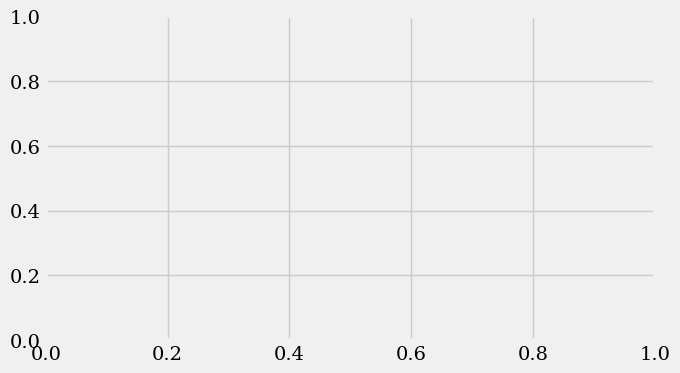

In [18]:
# countall(df,["weather"],cut=1,w=7,h=4)

In [19]:
df.nunique().sort_values(ascending=False)

date             1461
temp_avg          184
precipitation     111
wind               79
temp_max           67
temp_min           55
day                31
month              12
weather             5
year                4
dtype: int64

In [20]:
feature=df.drop(columns=['date','weather','year','month','day']).columns.tolist()
feature

['precipitation', 'temp_max', 'temp_min', 'wind', 'temp_avg']

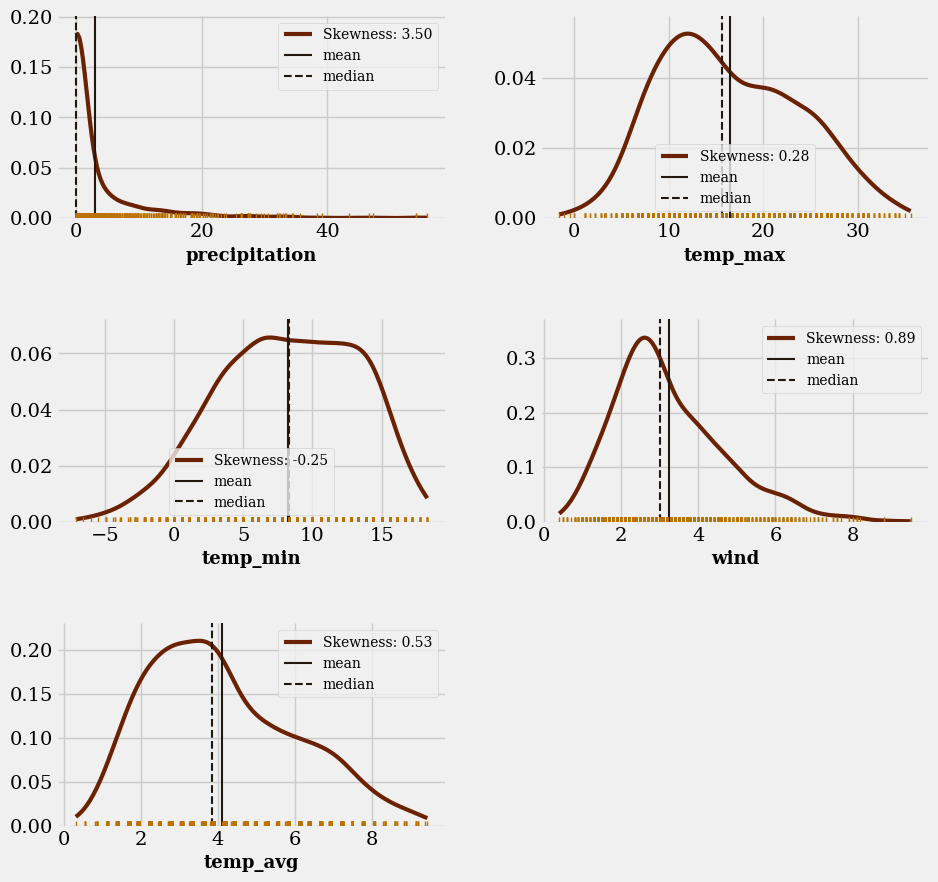

In [21]:
kdeall(df,feature,cut=2,h=10)

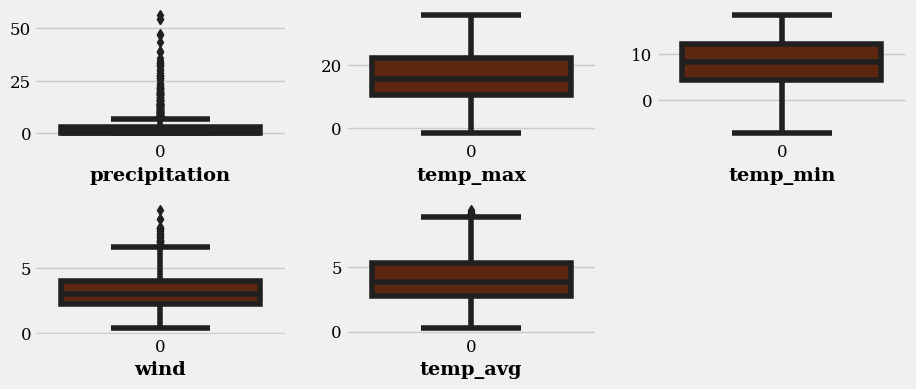

In [22]:
boxall(df,feature)

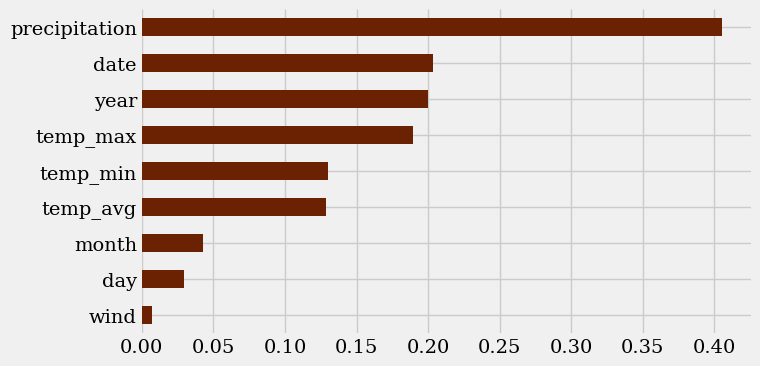

In [23]:
df.apply(lambda x: pd.factorize(x)[0]).corr().weather.abs().sort_values(ascending=False)[1:][::-1].plot(kind='barh',figsize=(7,4))
despine()

In [24]:
fullset=df.drop(columns=['weather','date']).columns.tolist()
fullset

['precipitation',
 'temp_max',
 'temp_min',
 'wind',
 'month',
 'year',
 'day',
 'temp_avg']

TypeError: pointplot() got an unexpected keyword argument 'lw'

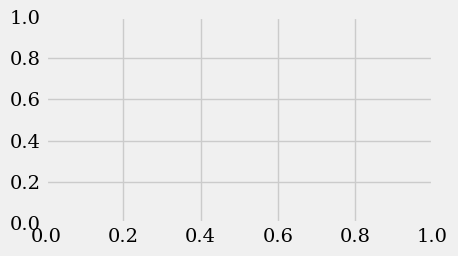

In [25]:
# pointall(df,fullset,target='weather',cut=2,h=14)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

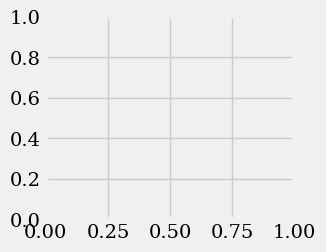

In [26]:
# boxall(df,fullset,target='weather',h=10,w=10)

<Axes: >

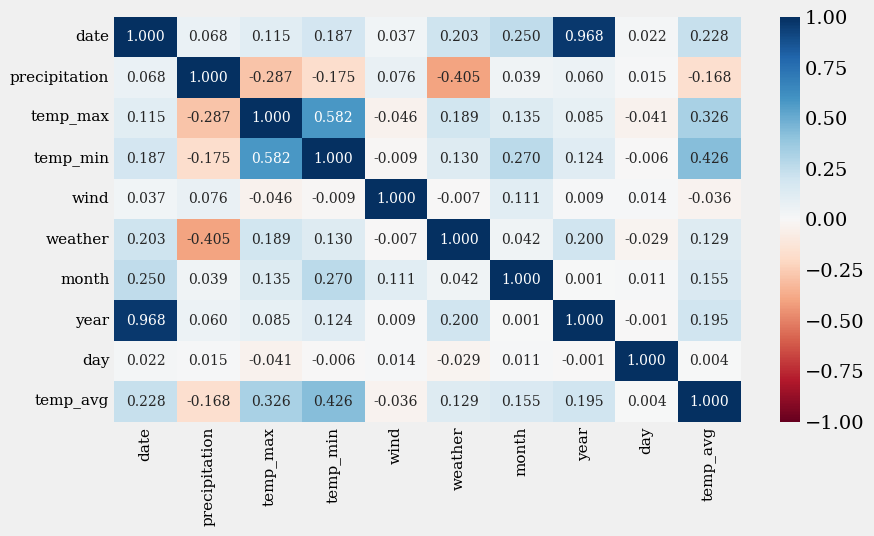

In [27]:
f=plt.figure(figsize=(9,5))
sub=df.apply(lambda x: pd.factorize(x)[0]).corr()
# mask = np.triu(np.ones_like(sub))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.heatmap(sub,cmap='RdBu',vmax=1,vmin=-1,annot=True,fmt='.3f',annot_kws={"size":10})

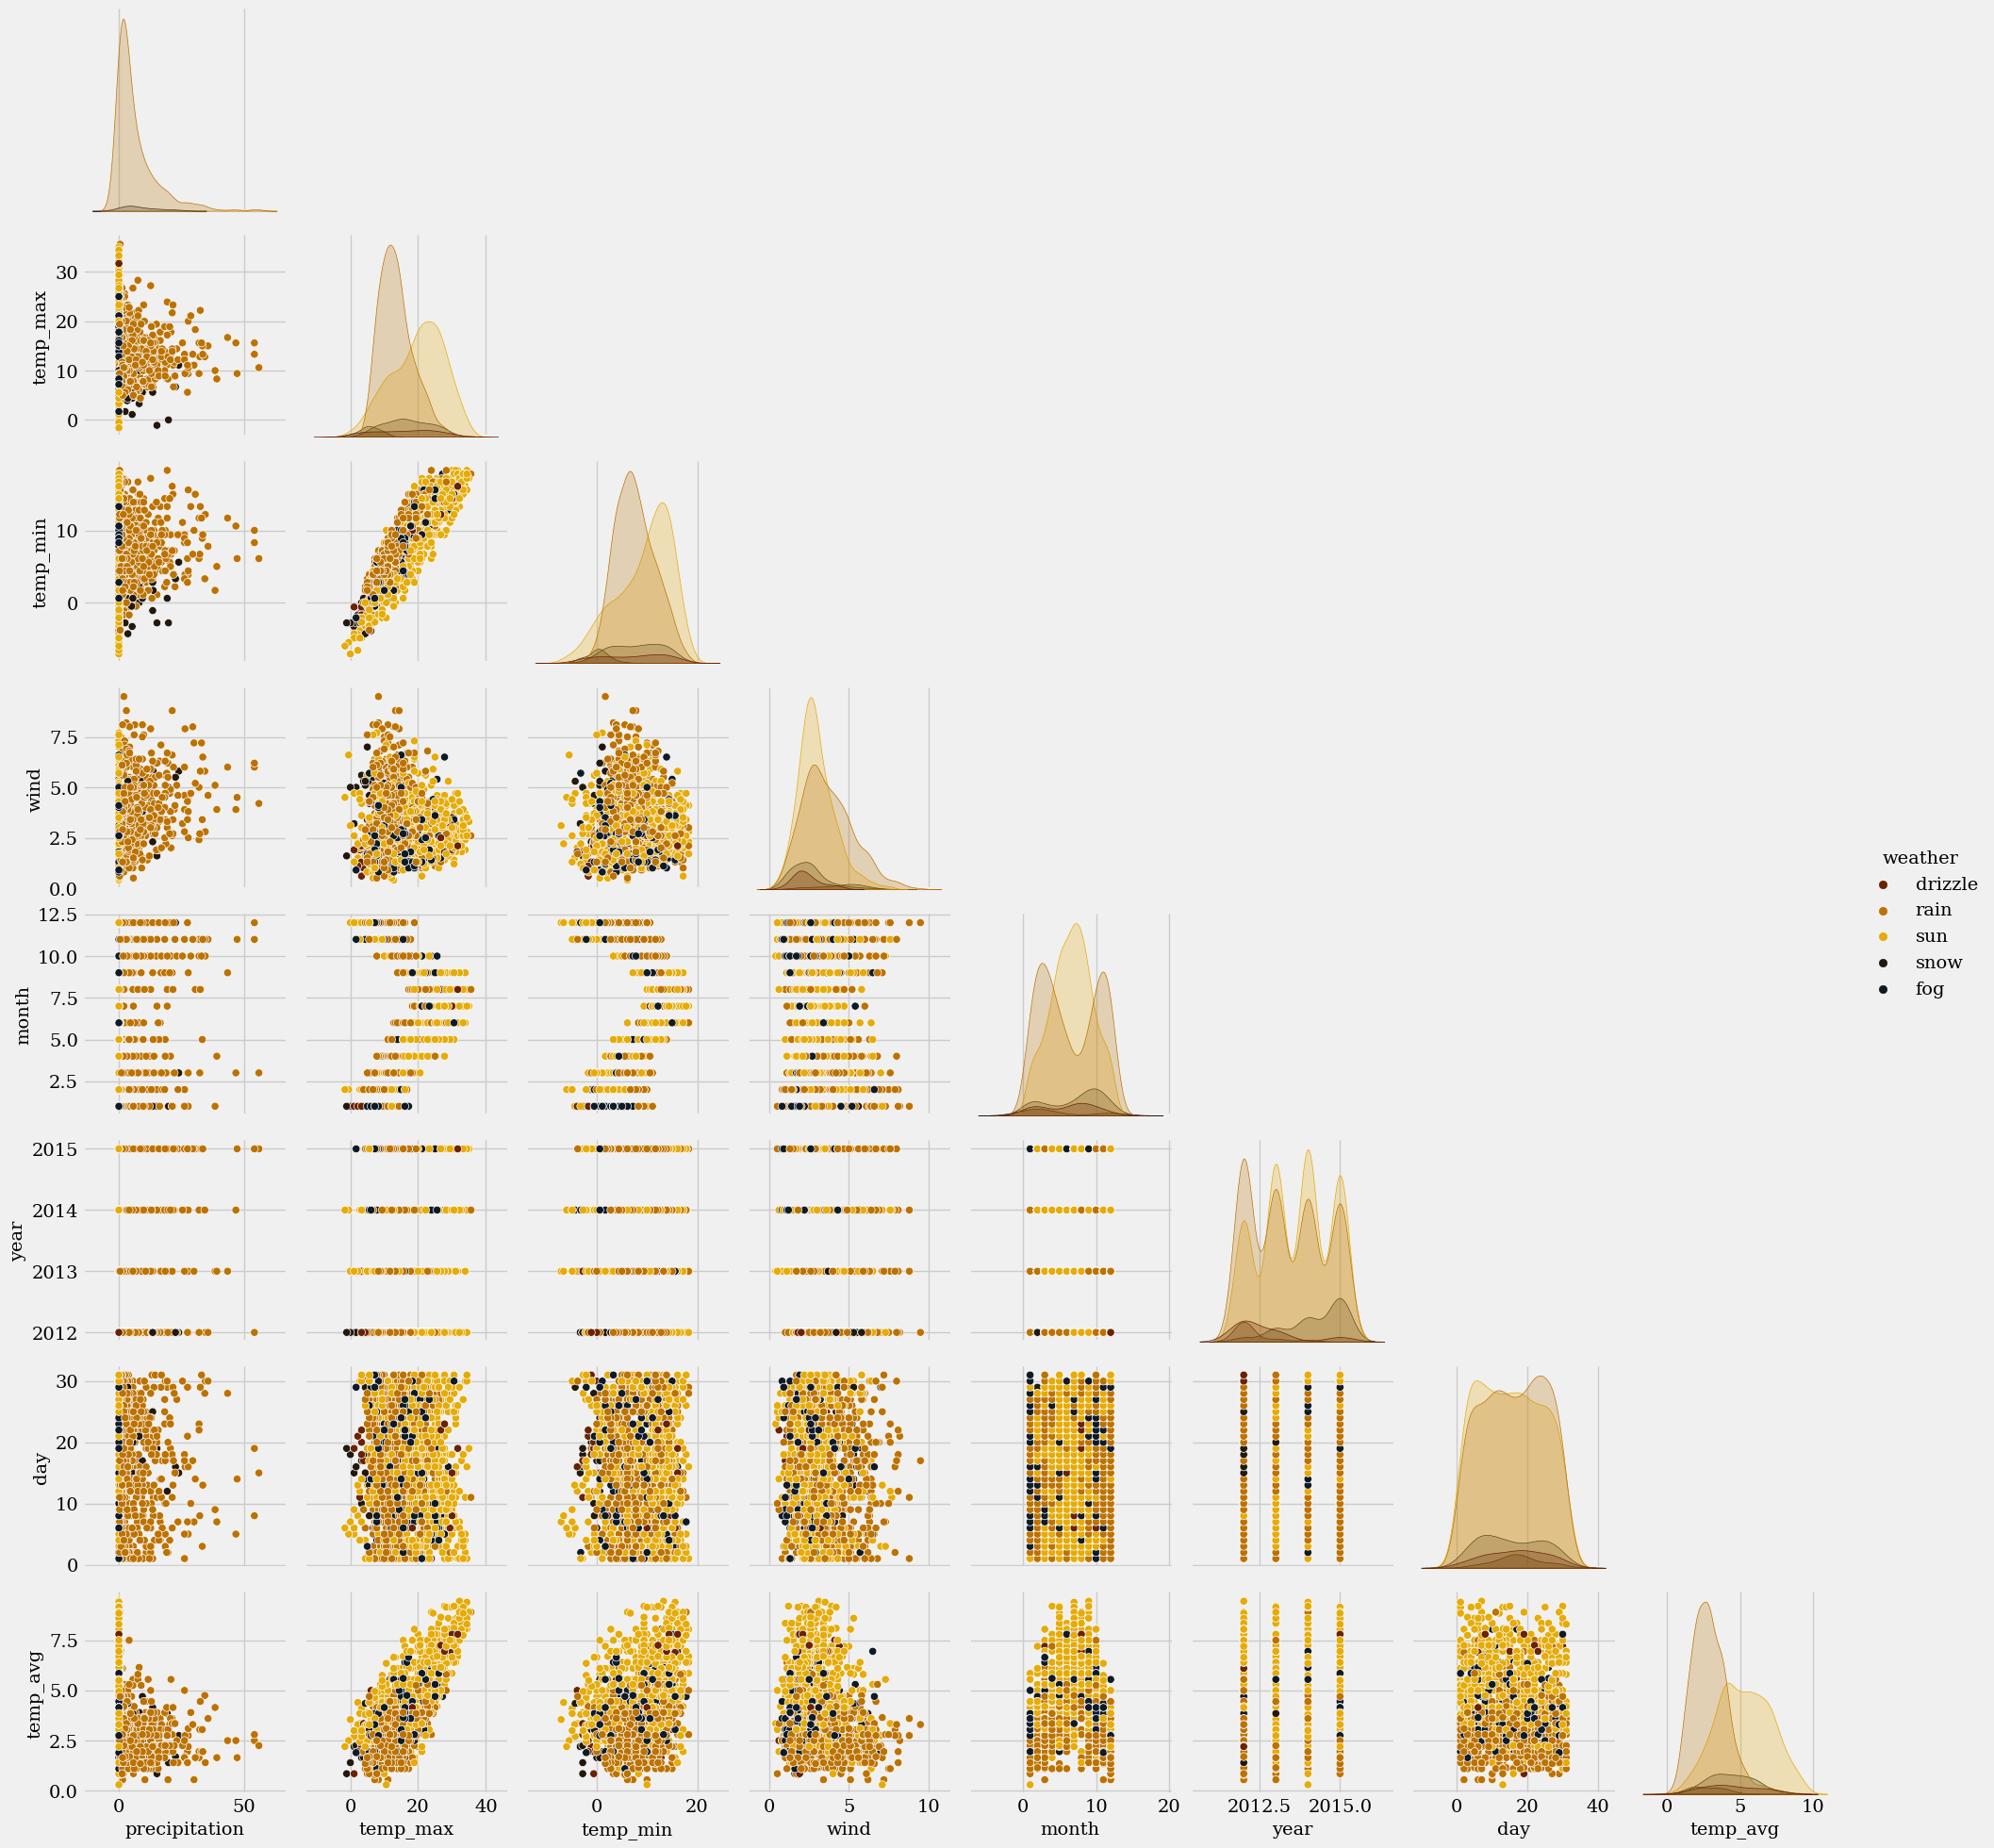

In [28]:
sns.pairplot(df,hue="weather",corner=True)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

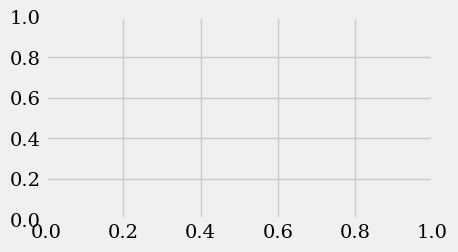

In [29]:
# kde2(df,["precipitation","temp_avg","temp_max","temp_min","wind"],target="weather",h=10,cut=2)
# plt.suptitle('Distribution of our independent features',fontsize=17,fontweight='bold')
# despine()

TypeError: pointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

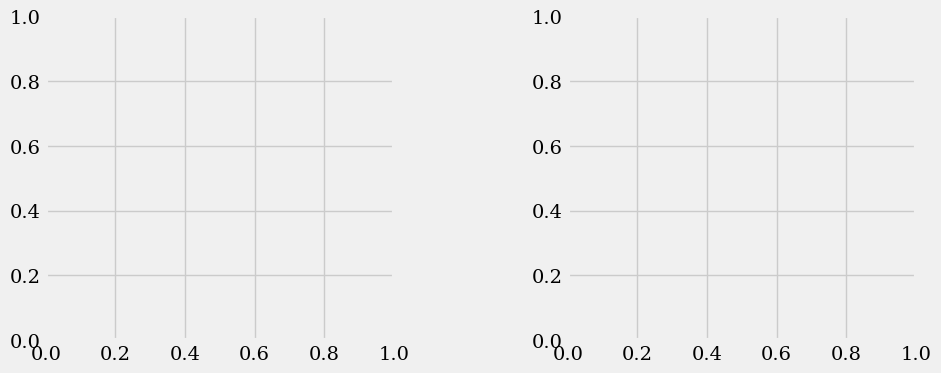

In [30]:
# f,ax=plt.subplots(1,2,figsize=(10,4))
# plt.subplots_adjust(wspace=.5)
# sns.pointplot(df.month,df.temp_max,ax=ax[0])
# sns.pointplot(df.month,df.temp_min,color="#bc7201",ax=ax[0])
# ax[0].set_ylabel('temp')

# sns.pointplot(df.year,df.temp_max)
# sns.pointplot(df.year,df.temp_min,color="#bc7201")
# plt.ylabel('temp')
# plt.suptitle('Temp_max, temp_min and month/ year',fontsize=15,fontweight='bold')
# despine()

In [31]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.weather=lb.fit_transform(df.weather)

In [32]:
# let's make a copy of our dataset
df2=df.copy()

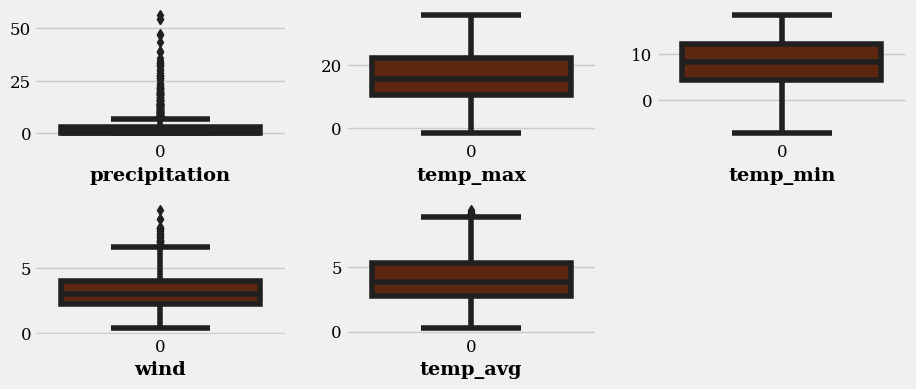

In [33]:
boxall(df,feature)

In [34]:
def outliers(x,df=df,fence=1.5):
    q1,q3=np.percentile(df[x],25), np.percentile(df[x],75)
    iqr=q3-q1
    print(f"{x}: {len(df[(df[x]<q1-fence*iqr)|(df[x]>q3+1.5*iqr)])} outliers")
    return df[(df[x]<q1-fence*iqr)|(df[x]>q3+1.5*iqr)].index.tolist()

In [35]:
df.precipitation=df.precipitation**(1/3)

In [36]:
outind=list(set([j for i in ["precipitation","wind","temp_avg"] for j in outliers(i)]))
print(f"\nOur dataset shape: {df.shape}")
print(f"We are going to drop {len(outind)} outliers")
df.drop(index=outind,inplace=True)
print(f"After dropping outliers: {df.shape}")

precipitation: 5 outliers
wind: 34 outliers
temp_avg: 10 outliers

Our dataset shape: (1461, 10)
We are going to drop 49 outliers
After dropping outliers: (1412, 10)


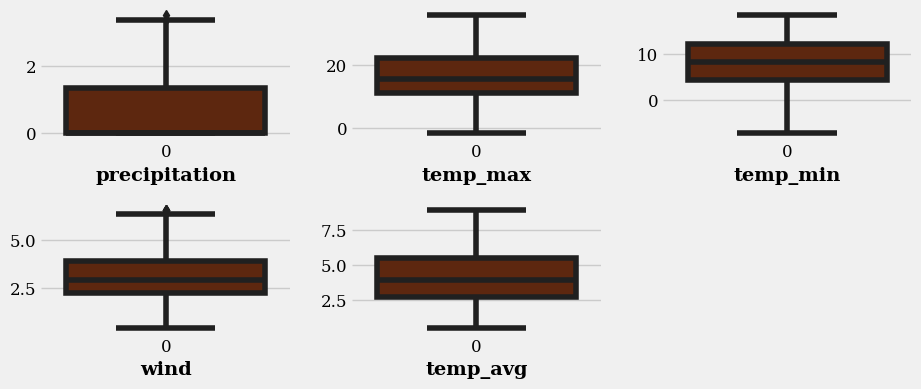

In [37]:
boxall(df,feature)

Text(0.5, 0.98, 'Before scaling')

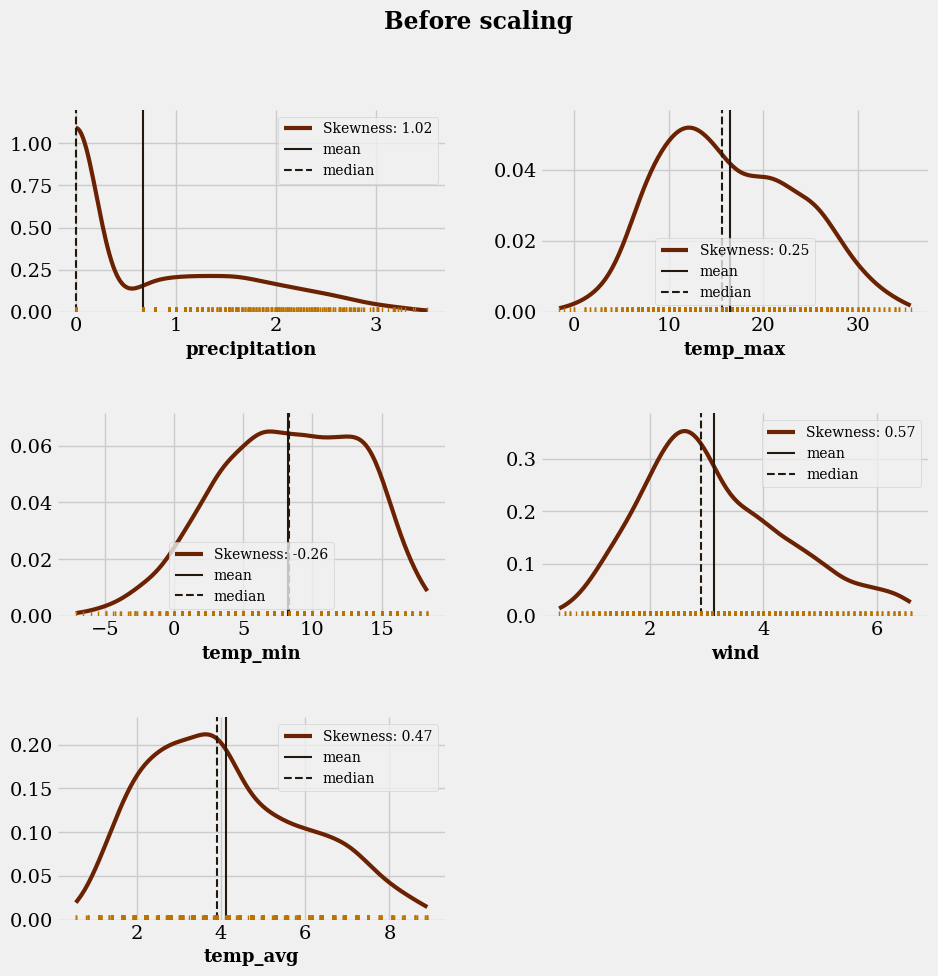

In [38]:
# before scaling
kdeall(df,feature,cut=2,h=10)
plt.suptitle('Before scaling',fontweight='bold')

In [39]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
stdfeature=["temp_max","temp_min","temp_avg","wind"]
df[stdfeature]=scl.fit_transform(df[stdfeature])

In [40]:
from sklearn.preprocessing import normalize
df.precipitation=normalize(df.precipitation.values.reshape(1,-1)).reshape(-1,1)

Text(0.5, 0.98, 'After scaling')

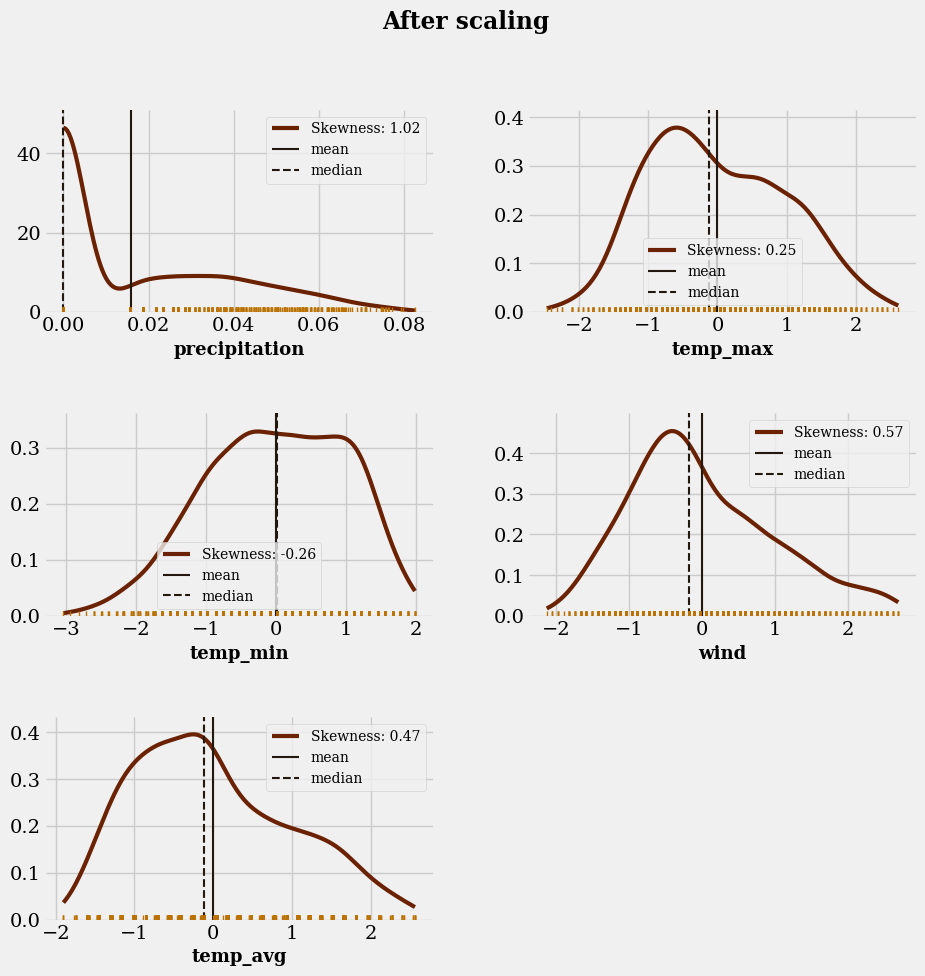

In [41]:
# After scaling
kdeall(df,feature,cut=2,h=10)
plt.suptitle('After scaling',fontweight='bold')

In [42]:
df=df.drop("date",axis=1)
X=df.drop("weather",axis=1)
y=df.weather
X.shape,y.shape

((1412, 8), (1412,))

In [43]:
from sklearn.decomposition import PCA
def reduct_pca(X):
    pca=PCA(n_components=df.shape[1]-1,random_state=0)
    Xpca=pca.fit_transform(X)
    f=plt.figure(figsize=(10,3))
    plt.bar(range(1,df.shape[1]),pca.explained_variance_ratio_,label='individual explained variance')
    plt.step(range(1,df.shape[1]), np.cumsum(pca.explained_variance_ratio_),where='mid',label='cumulative explained variance')
    plt.xticks(range(1,df.shape[1]))
    plt.xlabel('# of principal components')
    plt.ylabel('explained variance ratio',fontsize=13)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=13)
    despine()
    return Xpca

(1412, 5)

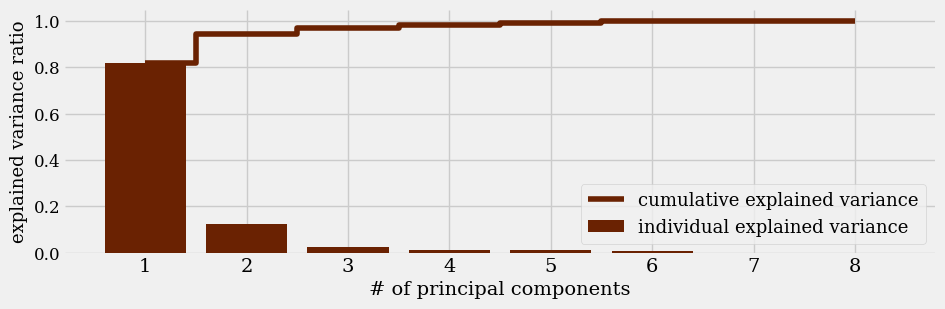

In [44]:
Xpca=pd.DataFrame(reduct_pca(X)[:,:5])
Xpca.shape

In [45]:
import statsmodels.api as sm
def select_by_pvalue(target,df,fence=.05,w=7,h=5,textw=.5,texth=.2):
    mod=sm.OLS(df[target],df.drop(target,axis=1))
    fii=mod.fit()
    sub=fii.summary2().tables[1]["P>|t|"].sort_values()
    sub.plot(kind='barh',figsize=(w,h))
    pvalue_set=sub[sub<=fence].index.tolist()
    plt.axvline(x=fence,c='black')
    plt.figtext(textw, texth, 'dropped',fontsize=15, fontweight='bold')
    return pvalue_set

['year', 'precipitation', 'temp_avg', 'temp_max', 'wind']

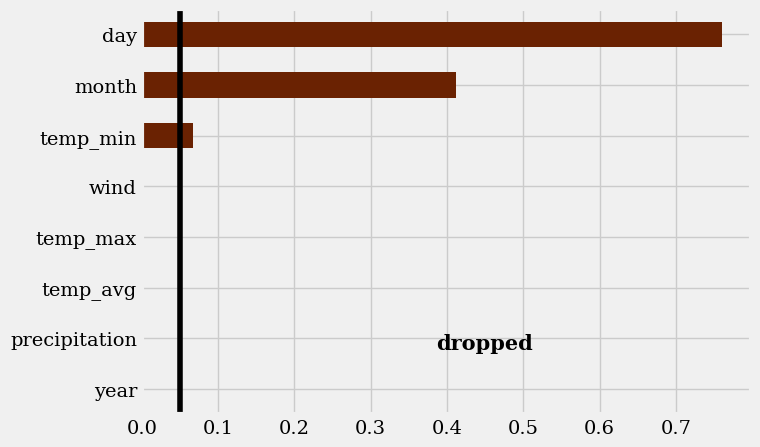

In [46]:
setpval=select_by_pvalue("weather",df)
setpval

In [47]:
from sklearn.model_selection import StratifiedKFold
def check(clf,X,y=y,n_splits=10):
    kf=StratifiedKFold(n_splits=n_splits,random_state=0,shuffle=True)
    k_tracc,k_teacc=[],[]
    for (tr,te) in kf.split(X,y):
        clf.fit(X.iloc[tr],y.iloc[tr])
        k_tracc.append(clf.score(X.iloc[tr],y.iloc[tr]))
        k_teacc.append(clf.score(X.iloc[te],y.iloc[te]))
    print(f"Train score: {np.mean(k_tracc)}")
    print(f"Test score: {np.mean(k_teacc)}")
    return clf

In [48]:
def selectmoran(modellst,X,y=y,n_splits=10,random_state=0):
    kf=StratifiedKFold(n_splits=n_splits,random_state=random_state,shuffle=True)
    namelst,imp,tr_acc,te_acc=[],[],[],[]
    for clf in modellst:
        namelst.append(type(clf).__name__)
        k_tracc, k_teacc, k_f1, k_imp=[],[],[],[]
        for (tr,te) in kf.split(X,y): # train, test index
            clf.fit(X.iloc[tr],y.iloc[tr])
            k_tracc.append(clf.score(X.iloc[tr],y.iloc[tr]))
            k_teacc.append(clf.score(X.iloc[te],y.iloc[te]))
            if hasattr(clf,"feature_importances_"): k_imp.append(clf.feature_importances_)
        tr_acc.append(np.mean(k_tracc))
        te_acc.append(np.mean(k_teacc))
        if len(k_imp)==0: imp.append(False)
        else: imp.append(np.mean(k_imp,axis=0))
    score=pd.DataFrame({'Model':namelst,'Train_accuracy':tr_acc,'Test_accuracy':te_acc}).sort_values('Test_accuracy',ascending=False)
    return score,imp

In [49]:
def plotscoring(score,title,w=7,h=5,alpha=.97,axvline=.8,yticksize=12):
    f,ax=plt.subplots(figsize=(w,h))
    print(f"Mean accuracy for all models: {np.mean(score.Test_accuracy)}\n")
    print(score)
    sns.barplot(x=score.Test_accuracy,y=score.Model,alpha=alpha,color='#bc7201')
    sns.barplot(x=-score.Train_accuracy,y=score.Model,alpha=alpha,color='#6a2202')
    ax.set_xlim(-1,1)
    plt.axvline(x=0,color='black')
    plt.xlabel('Train/ Test accuracy')
    plt.ylabel('')
    plt.title(f"Accuracy score for {title}",fontweight='bold')
    plt.axvline(x=axvline,ls=':')
    plt.yticks(fontsize=yticksize)
    despine()

In [50]:
def plotting_importances(score,imp,X,w=8,h=3,rotation=90,xsize=10):
    for (a,b) in zip(score.Model,imp):
        if b is not False:
            ind=np.argsort(b)[::-1]
            cols=X.columns
            plt.figure(figsize=(w,h))
            plt.title(f"Feature importances via {a}",fontweight='bold',fontsize=13)
            plt.bar(range(X.shape[1]),b[ind])
            plt.xticks(range(X.shape[1]),cols[ind],rotation=rotation,fontsize=xsize)
            plt.xlim([-1,X.shape[1]])
            plt.tight_layout()

In [51]:
from sklearn.model_selection import GridSearchCV

def grid(clf,params,X,y=y):
    grid=GridSearchCV(clf,params)
    grid.fit(X,y)
    print(f"Best score: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    return grid.best_estimator_

In [52]:
def plot_meanscore(meanscore_set):
    print(meanscore_set)
    f=plt.figure(figsize=(8,3))
    meanscore_set.Test_accuracy[::-1].plot(kind='barh',color='#0f1a26',alpha=.95)
    (-1*meanscore_set.Train_accuracy[::-1]).plot(kind='barh',alpha=.95)
    plt.xlim([-1,1])
    plt.axvline(x=0,c='black')
    despine()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier 
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

modellst=[LogisticRegression(random_state=0,solver='saga'), 
          RandomForestClassifier(random_state=0), GradientBoostingClassifier(random_state=0),BaggingClassifier(random_state=0),
          AdaBoostClassifier(random_state=0), CatBoostClassifier(random_state=0), XGBClassifier(random_state=0),
          LGBMClassifier(random_state=0), SVC(random_state=0)]

In [56]:
score_all,imp_all=selectmoran(modellst,X,y)

Learning rate set to 0.080097
0:	learn: 1.4366584	total: 143ms	remaining: 2m 22s
1:	learn: 1.3008248	total: 147ms	remaining: 1m 13s
2:	learn: 1.1919705	total: 151ms	remaining: 50s
3:	learn: 1.1079869	total: 155ms	remaining: 38.6s
4:	learn: 1.0398290	total: 160ms	remaining: 31.8s
5:	learn: 0.9705265	total: 165ms	remaining: 27.3s
6:	learn: 0.9150479	total: 170ms	remaining: 24.1s
7:	learn: 0.8665849	total: 174ms	remaining: 21.6s
8:	learn: 0.8227376	total: 178ms	remaining: 19.6s
9:	learn: 0.7876772	total: 181ms	remaining: 17.9s
10:	learn: 0.7543192	total: 182ms	remaining: 16.4s
11:	learn: 0.7242652	total: 186ms	remaining: 15.3s
12:	learn: 0.6977550	total: 189ms	remaining: 14.4s
13:	learn: 0.6733344	total: 192ms	remaining: 13.5s
14:	learn: 0.6557883	total: 195ms	remaining: 12.8s
15:	learn: 0.6337614	total: 198ms	remaining: 12.2s
16:	learn: 0.6164449	total: 202ms	remaining: 11.7s
17:	learn: 0.6002261	total: 204ms	remaining: 11.1s
18:	learn: 0.5872533	total: 206ms	remaining: 10.7s
19:	learn: 

166:	learn: 0.2494346	total: 581ms	remaining: 2.9s
167:	learn: 0.2488557	total: 583ms	remaining: 2.88s
168:	learn: 0.2483027	total: 584ms	remaining: 2.87s
169:	learn: 0.2477435	total: 587ms	remaining: 2.86s
170:	learn: 0.2468242	total: 589ms	remaining: 2.85s
171:	learn: 0.2463141	total: 591ms	remaining: 2.84s
172:	learn: 0.2457117	total: 593ms	remaining: 2.83s
173:	learn: 0.2443253	total: 596ms	remaining: 2.83s
174:	learn: 0.2435982	total: 598ms	remaining: 2.82s
175:	learn: 0.2427325	total: 602ms	remaining: 2.82s
176:	learn: 0.2419909	total: 604ms	remaining: 2.81s
177:	learn: 0.2410796	total: 606ms	remaining: 2.8s
178:	learn: 0.2406078	total: 608ms	remaining: 2.79s
179:	learn: 0.2398902	total: 610ms	remaining: 2.78s
180:	learn: 0.2391953	total: 612ms	remaining: 2.77s
181:	learn: 0.2385368	total: 615ms	remaining: 2.76s
182:	learn: 0.2377148	total: 617ms	remaining: 2.76s
183:	learn: 0.2372691	total: 619ms	remaining: 2.75s
184:	learn: 0.2369047	total: 621ms	remaining: 2.74s
185:	learn: 0.

390:	learn: 0.1350122	total: 1.18s	remaining: 1.83s
391:	learn: 0.1345857	total: 1.18s	remaining: 1.83s
392:	learn: 0.1339631	total: 1.18s	remaining: 1.83s
393:	learn: 0.1338722	total: 1.19s	remaining: 1.82s
394:	learn: 0.1336270	total: 1.19s	remaining: 1.82s
395:	learn: 0.1334573	total: 1.19s	remaining: 1.81s
396:	learn: 0.1332242	total: 1.19s	remaining: 1.81s
397:	learn: 0.1328979	total: 1.19s	remaining: 1.8s
398:	learn: 0.1326379	total: 1.2s	remaining: 1.8s
399:	learn: 0.1323366	total: 1.2s	remaining: 1.8s
400:	learn: 0.1318687	total: 1.2s	remaining: 1.79s
401:	learn: 0.1313215	total: 1.2s	remaining: 1.79s
402:	learn: 0.1309013	total: 1.2s	remaining: 1.78s
403:	learn: 0.1305140	total: 1.21s	remaining: 1.78s
404:	learn: 0.1303795	total: 1.21s	remaining: 1.77s
405:	learn: 0.1301174	total: 1.21s	remaining: 1.77s
406:	learn: 0.1298402	total: 1.21s	remaining: 1.77s
407:	learn: 0.1296378	total: 1.21s	remaining: 1.76s
408:	learn: 0.1292282	total: 1.22s	remaining: 1.76s
409:	learn: 0.128911

565:	learn: 0.0935402	total: 1.56s	remaining: 1.2s
566:	learn: 0.0934081	total: 1.57s	remaining: 1.2s
567:	learn: 0.0932298	total: 1.57s	remaining: 1.19s
568:	learn: 0.0929937	total: 1.57s	remaining: 1.19s
569:	learn: 0.0927638	total: 1.57s	remaining: 1.19s
570:	learn: 0.0926099	total: 1.57s	remaining: 1.18s
571:	learn: 0.0923676	total: 1.58s	remaining: 1.18s
572:	learn: 0.0921995	total: 1.58s	remaining: 1.18s
573:	learn: 0.0919890	total: 1.58s	remaining: 1.17s
574:	learn: 0.0918388	total: 1.58s	remaining: 1.17s
575:	learn: 0.0917376	total: 1.59s	remaining: 1.17s
576:	learn: 0.0916138	total: 1.59s	remaining: 1.16s
577:	learn: 0.0914463	total: 1.59s	remaining: 1.16s
578:	learn: 0.0912839	total: 1.59s	remaining: 1.16s
579:	learn: 0.0911120	total: 1.59s	remaining: 1.15s
580:	learn: 0.0910105	total: 1.59s	remaining: 1.15s
581:	learn: 0.0909125	total: 1.6s	remaining: 1.15s
582:	learn: 0.0906894	total: 1.6s	remaining: 1.14s
583:	learn: 0.0905189	total: 1.6s	remaining: 1.14s
584:	learn: 0.090

754:	learn: 0.0679218	total: 1.96s	remaining: 635ms
755:	learn: 0.0678413	total: 1.96s	remaining: 632ms
756:	learn: 0.0677049	total: 1.96s	remaining: 629ms
757:	learn: 0.0676410	total: 1.96s	remaining: 627ms
758:	learn: 0.0675616	total: 1.97s	remaining: 624ms
759:	learn: 0.0675092	total: 1.97s	remaining: 621ms
760:	learn: 0.0674074	total: 1.97s	remaining: 619ms
761:	learn: 0.0673357	total: 1.97s	remaining: 616ms
762:	learn: 0.0672402	total: 1.97s	remaining: 613ms
763:	learn: 0.0670825	total: 1.98s	remaining: 610ms
764:	learn: 0.0669606	total: 1.98s	remaining: 608ms
765:	learn: 0.0668690	total: 1.98s	remaining: 605ms
766:	learn: 0.0667823	total: 1.98s	remaining: 602ms
767:	learn: 0.0666553	total: 1.98s	remaining: 599ms
768:	learn: 0.0665463	total: 1.99s	remaining: 597ms
769:	learn: 0.0664986	total: 1.99s	remaining: 594ms
770:	learn: 0.0664083	total: 1.99s	remaining: 591ms
771:	learn: 0.0663405	total: 1.99s	remaining: 588ms
772:	learn: 0.0662320	total: 1.99s	remaining: 586ms
773:	learn: 

938:	learn: 0.0525960	total: 2.35s	remaining: 153ms
939:	learn: 0.0525444	total: 2.36s	remaining: 150ms
940:	learn: 0.0524741	total: 2.36s	remaining: 148ms
941:	learn: 0.0523998	total: 2.36s	remaining: 145ms
942:	learn: 0.0522790	total: 2.36s	remaining: 143ms
943:	learn: 0.0522004	total: 2.37s	remaining: 140ms
944:	learn: 0.0521649	total: 2.37s	remaining: 138ms
945:	learn: 0.0521167	total: 2.37s	remaining: 135ms
946:	learn: 0.0520485	total: 2.37s	remaining: 133ms
947:	learn: 0.0519796	total: 2.37s	remaining: 130ms
948:	learn: 0.0518946	total: 2.38s	remaining: 128ms
949:	learn: 0.0517964	total: 2.38s	remaining: 125ms
950:	learn: 0.0517086	total: 2.38s	remaining: 123ms
951:	learn: 0.0515930	total: 2.38s	remaining: 120ms
952:	learn: 0.0515192	total: 2.38s	remaining: 118ms
953:	learn: 0.0514497	total: 2.39s	remaining: 115ms
954:	learn: 0.0514104	total: 2.39s	remaining: 113ms
955:	learn: 0.0513563	total: 2.39s	remaining: 110ms
956:	learn: 0.0513071	total: 2.39s	remaining: 108ms
957:	learn: 

169:	learn: 0.2425994	total: 426ms	remaining: 2.08s
170:	learn: 0.2418690	total: 429ms	remaining: 2.08s
171:	learn: 0.2407498	total: 431ms	remaining: 2.07s
172:	learn: 0.2400678	total: 433ms	remaining: 2.07s
173:	learn: 0.2395329	total: 435ms	remaining: 2.06s
174:	learn: 0.2387404	total: 437ms	remaining: 2.06s
175:	learn: 0.2376969	total: 440ms	remaining: 2.06s
176:	learn: 0.2368136	total: 441ms	remaining: 2.05s
177:	learn: 0.2361799	total: 443ms	remaining: 2.05s
178:	learn: 0.2352270	total: 445ms	remaining: 2.04s
179:	learn: 0.2347384	total: 447ms	remaining: 2.04s
180:	learn: 0.2337431	total: 449ms	remaining: 2.03s
181:	learn: 0.2331703	total: 451ms	remaining: 2.03s
182:	learn: 0.2322377	total: 453ms	remaining: 2.02s
183:	learn: 0.2314163	total: 455ms	remaining: 2.02s
184:	learn: 0.2307372	total: 457ms	remaining: 2.02s
185:	learn: 0.2301620	total: 460ms	remaining: 2.01s
186:	learn: 0.2295183	total: 462ms	remaining: 2.01s
187:	learn: 0.2286408	total: 464ms	remaining: 2s
188:	learn: 0.2

351:	learn: 0.1494078	total: 816ms	remaining: 1.5s
352:	learn: 0.1491989	total: 818ms	remaining: 1.5s
353:	learn: 0.1488934	total: 820ms	remaining: 1.5s
354:	learn: 0.1486824	total: 822ms	remaining: 1.49s
355:	learn: 0.1484744	total: 824ms	remaining: 1.49s
356:	learn: 0.1482989	total: 826ms	remaining: 1.49s
357:	learn: 0.1479626	total: 828ms	remaining: 1.48s
358:	learn: 0.1476895	total: 830ms	remaining: 1.48s
359:	learn: 0.1472999	total: 831ms	remaining: 1.48s
360:	learn: 0.1470797	total: 833ms	remaining: 1.47s
361:	learn: 0.1467855	total: 835ms	remaining: 1.47s
362:	learn: 0.1465061	total: 837ms	remaining: 1.47s
363:	learn: 0.1461955	total: 839ms	remaining: 1.47s
364:	learn: 0.1456299	total: 841ms	remaining: 1.46s
365:	learn: 0.1452955	total: 842ms	remaining: 1.46s
366:	learn: 0.1450720	total: 844ms	remaining: 1.46s
367:	learn: 0.1447604	total: 846ms	remaining: 1.45s
368:	learn: 0.1443947	total: 848ms	remaining: 1.45s
369:	learn: 0.1439958	total: 850ms	remaining: 1.45s
370:	learn: 0.1

572:	learn: 0.0948893	total: 1.41s	remaining: 1.05s
573:	learn: 0.0946332	total: 1.41s	remaining: 1.04s
574:	learn: 0.0944815	total: 1.41s	remaining: 1.04s
575:	learn: 0.0943588	total: 1.41s	remaining: 1.04s
576:	learn: 0.0941652	total: 1.41s	remaining: 1.04s
577:	learn: 0.0940307	total: 1.42s	remaining: 1.03s
578:	learn: 0.0939673	total: 1.42s	remaining: 1.03s
579:	learn: 0.0937807	total: 1.42s	remaining: 1.03s
580:	learn: 0.0935745	total: 1.42s	remaining: 1.03s
581:	learn: 0.0933593	total: 1.43s	remaining: 1.02s
582:	learn: 0.0931792	total: 1.43s	remaining: 1.02s
583:	learn: 0.0930574	total: 1.43s	remaining: 1.02s
584:	learn: 0.0928803	total: 1.43s	remaining: 1.01s
585:	learn: 0.0927128	total: 1.43s	remaining: 1.01s
586:	learn: 0.0926189	total: 1.44s	remaining: 1.01s
587:	learn: 0.0923736	total: 1.44s	remaining: 1.01s
588:	learn: 0.0923355	total: 1.44s	remaining: 1s
589:	learn: 0.0920673	total: 1.44s	remaining: 1s
590:	learn: 0.0918663	total: 1.44s	remaining: 999ms
591:	learn: 0.0917

752:	learn: 0.0709434	total: 1.79s	remaining: 588ms
753:	learn: 0.0708762	total: 1.8s	remaining: 586ms
754:	learn: 0.0707357	total: 1.8s	remaining: 584ms
755:	learn: 0.0705962	total: 1.8s	remaining: 581ms
756:	learn: 0.0704898	total: 1.8s	remaining: 579ms
757:	learn: 0.0703680	total: 1.8s	remaining: 576ms
758:	learn: 0.0701757	total: 1.81s	remaining: 574ms
759:	learn: 0.0700693	total: 1.81s	remaining: 571ms
760:	learn: 0.0699617	total: 1.81s	remaining: 569ms
761:	learn: 0.0698527	total: 1.81s	remaining: 566ms
762:	learn: 0.0697329	total: 1.81s	remaining: 564ms
763:	learn: 0.0696279	total: 1.82s	remaining: 561ms
764:	learn: 0.0694608	total: 1.82s	remaining: 559ms
765:	learn: 0.0693988	total: 1.82s	remaining: 556ms
766:	learn: 0.0692769	total: 1.82s	remaining: 554ms
767:	learn: 0.0690982	total: 1.82s	remaining: 551ms
768:	learn: 0.0689502	total: 1.83s	remaining: 549ms
769:	learn: 0.0688757	total: 1.83s	remaining: 546ms
770:	learn: 0.0688321	total: 1.83s	remaining: 544ms
771:	learn: 0.068

951:	learn: 0.0529917	total: 2.19s	remaining: 110ms
952:	learn: 0.0529168	total: 2.19s	remaining: 108ms
953:	learn: 0.0528493	total: 2.19s	remaining: 106ms
954:	learn: 0.0527695	total: 2.19s	remaining: 103ms
955:	learn: 0.0527400	total: 2.2s	remaining: 101ms
956:	learn: 0.0526634	total: 2.2s	remaining: 98.8ms
957:	learn: 0.0526213	total: 2.2s	remaining: 96.5ms
958:	learn: 0.0525364	total: 2.2s	remaining: 94.2ms
959:	learn: 0.0524606	total: 2.21s	remaining: 91.9ms
960:	learn: 0.0523690	total: 2.21s	remaining: 89.6ms
961:	learn: 0.0523121	total: 2.21s	remaining: 87.3ms
962:	learn: 0.0522480	total: 2.21s	remaining: 85ms
963:	learn: 0.0521953	total: 2.21s	remaining: 82.7ms
964:	learn: 0.0521493	total: 2.22s	remaining: 80.4ms
965:	learn: 0.0521052	total: 2.22s	remaining: 78.1ms
966:	learn: 0.0520269	total: 2.22s	remaining: 75.8ms
967:	learn: 0.0519483	total: 2.22s	remaining: 73.5ms
968:	learn: 0.0518706	total: 2.23s	remaining: 71.3ms
969:	learn: 0.0518020	total: 2.23s	remaining: 69ms
970:	l

169:	learn: 0.2531983	total: 434ms	remaining: 2.12s
170:	learn: 0.2522700	total: 436ms	remaining: 2.11s
171:	learn: 0.2513540	total: 438ms	remaining: 2.11s
172:	learn: 0.2506340	total: 440ms	remaining: 2.1s
173:	learn: 0.2497788	total: 441ms	remaining: 2.1s
174:	learn: 0.2489129	total: 444ms	remaining: 2.09s
175:	learn: 0.2483993	total: 445ms	remaining: 2.08s
176:	learn: 0.2475061	total: 447ms	remaining: 2.08s
177:	learn: 0.2468303	total: 449ms	remaining: 2.07s
178:	learn: 0.2461992	total: 451ms	remaining: 2.07s
179:	learn: 0.2454796	total: 453ms	remaining: 2.06s
180:	learn: 0.2445881	total: 455ms	remaining: 2.06s
181:	learn: 0.2442777	total: 457ms	remaining: 2.05s
182:	learn: 0.2437204	total: 458ms	remaining: 2.05s
183:	learn: 0.2425593	total: 460ms	remaining: 2.04s
184:	learn: 0.2418885	total: 462ms	remaining: 2.04s
185:	learn: 0.2410014	total: 464ms	remaining: 2.03s
186:	learn: 0.2405010	total: 466ms	remaining: 2.03s
187:	learn: 0.2398462	total: 468ms	remaining: 2.02s
188:	learn: 0.

405:	learn: 0.1360406	total: 1.01s	remaining: 1.49s
406:	learn: 0.1358014	total: 1.02s	remaining: 1.48s
407:	learn: 0.1355858	total: 1.02s	remaining: 1.48s
408:	learn: 0.1352504	total: 1.02s	remaining: 1.48s
409:	learn: 0.1348796	total: 1.03s	remaining: 1.48s
410:	learn: 0.1347042	total: 1.03s	remaining: 1.47s
411:	learn: 0.1345075	total: 1.03s	remaining: 1.47s
412:	learn: 0.1342251	total: 1.03s	remaining: 1.47s
413:	learn: 0.1338894	total: 1.04s	remaining: 1.47s
414:	learn: 0.1336143	total: 1.04s	remaining: 1.46s
415:	learn: 0.1332806	total: 1.04s	remaining: 1.46s
416:	learn: 0.1329987	total: 1.04s	remaining: 1.46s
417:	learn: 0.1327328	total: 1.04s	remaining: 1.46s
418:	learn: 0.1324587	total: 1.05s	remaining: 1.45s
419:	learn: 0.1323363	total: 1.05s	remaining: 1.45s
420:	learn: 0.1320565	total: 1.05s	remaining: 1.45s
421:	learn: 0.1316194	total: 1.05s	remaining: 1.45s
422:	learn: 0.1313906	total: 1.06s	remaining: 1.44s
423:	learn: 0.1309621	total: 1.06s	remaining: 1.44s
424:	learn: 

580:	learn: 0.0970859	total: 1.4s	remaining: 1.01s
581:	learn: 0.0969133	total: 1.41s	remaining: 1.01s
582:	learn: 0.0967534	total: 1.41s	remaining: 1.01s
583:	learn: 0.0966616	total: 1.41s	remaining: 1.01s
584:	learn: 0.0965415	total: 1.42s	remaining: 1s
585:	learn: 0.0963364	total: 1.42s	remaining: 1s
586:	learn: 0.0961720	total: 1.42s	remaining: 1s
587:	learn: 0.0959943	total: 1.43s	remaining: 1s
588:	learn: 0.0958892	total: 1.43s	remaining: 999ms
589:	learn: 0.0958295	total: 1.43s	remaining: 997ms
590:	learn: 0.0956163	total: 1.44s	remaining: 994ms
591:	learn: 0.0955304	total: 1.44s	remaining: 992ms
592:	learn: 0.0954043	total: 1.44s	remaining: 991ms
593:	learn: 0.0952295	total: 1.45s	remaining: 988ms
594:	learn: 0.0949943	total: 1.45s	remaining: 986ms
595:	learn: 0.0948736	total: 1.45s	remaining: 984ms
596:	learn: 0.0946794	total: 1.46s	remaining: 983ms
597:	learn: 0.0945441	total: 1.46s	remaining: 980ms
598:	learn: 0.0943143	total: 1.46s	remaining: 979ms
599:	learn: 0.0942073	tot

792:	learn: 0.0682317	total: 2s	remaining: 523ms
793:	learn: 0.0681885	total: 2s	remaining: 520ms
794:	learn: 0.0680714	total: 2.01s	remaining: 517ms
795:	learn: 0.0680495	total: 2.01s	remaining: 515ms
796:	learn: 0.0679442	total: 2.01s	remaining: 512ms
797:	learn: 0.0678496	total: 2.01s	remaining: 510ms
798:	learn: 0.0677346	total: 2.02s	remaining: 507ms
799:	learn: 0.0676682	total: 2.02s	remaining: 504ms
800:	learn: 0.0675484	total: 2.02s	remaining: 502ms
801:	learn: 0.0674701	total: 2.02s	remaining: 499ms
802:	learn: 0.0674157	total: 2.02s	remaining: 496ms
803:	learn: 0.0672789	total: 2.02s	remaining: 494ms
804:	learn: 0.0671093	total: 2.03s	remaining: 491ms
805:	learn: 0.0669995	total: 2.03s	remaining: 489ms
806:	learn: 0.0668578	total: 2.03s	remaining: 486ms
807:	learn: 0.0667343	total: 2.03s	remaining: 483ms
808:	learn: 0.0666361	total: 2.04s	remaining: 481ms
809:	learn: 0.0664802	total: 2.04s	remaining: 478ms
810:	learn: 0.0663530	total: 2.04s	remaining: 476ms
811:	learn: 0.0662

972:	learn: 0.0534763	total: 2.39s	remaining: 66.3ms
973:	learn: 0.0533866	total: 2.4s	remaining: 63.9ms
974:	learn: 0.0533285	total: 2.4s	remaining: 61.5ms
975:	learn: 0.0532913	total: 2.4s	remaining: 59ms
976:	learn: 0.0531673	total: 2.4s	remaining: 56.6ms
977:	learn: 0.0531251	total: 2.4s	remaining: 54.1ms
978:	learn: 0.0530650	total: 2.41s	remaining: 51.6ms
979:	learn: 0.0529901	total: 2.41s	remaining: 49.2ms
980:	learn: 0.0529534	total: 2.41s	remaining: 46.7ms
981:	learn: 0.0528523	total: 2.41s	remaining: 44.2ms
982:	learn: 0.0528032	total: 2.41s	remaining: 41.8ms
983:	learn: 0.0527426	total: 2.42s	remaining: 39.3ms
984:	learn: 0.0526647	total: 2.42s	remaining: 36.8ms
985:	learn: 0.0525865	total: 2.42s	remaining: 34.4ms
986:	learn: 0.0525469	total: 2.42s	remaining: 31.9ms
987:	learn: 0.0525001	total: 2.42s	remaining: 29.4ms
988:	learn: 0.0524536	total: 2.42s	remaining: 27ms
989:	learn: 0.0523597	total: 2.43s	remaining: 24.5ms
990:	learn: 0.0522549	total: 2.43s	remaining: 22.1ms
99

174:	learn: 0.2402682	total: 497ms	remaining: 2.34s
175:	learn: 0.2399388	total: 500ms	remaining: 2.34s
176:	learn: 0.2396280	total: 502ms	remaining: 2.33s
177:	learn: 0.2384770	total: 504ms	remaining: 2.33s
178:	learn: 0.2380094	total: 506ms	remaining: 2.32s
179:	learn: 0.2367217	total: 508ms	remaining: 2.32s
180:	learn: 0.2356459	total: 510ms	remaining: 2.31s
181:	learn: 0.2350968	total: 512ms	remaining: 2.3s
182:	learn: 0.2342613	total: 515ms	remaining: 2.3s
183:	learn: 0.2336506	total: 517ms	remaining: 2.29s
184:	learn: 0.2330474	total: 519ms	remaining: 2.29s
185:	learn: 0.2321284	total: 521ms	remaining: 2.28s
186:	learn: 0.2314968	total: 523ms	remaining: 2.27s
187:	learn: 0.2310597	total: 526ms	remaining: 2.27s
188:	learn: 0.2301141	total: 527ms	remaining: 2.26s
189:	learn: 0.2292494	total: 530ms	remaining: 2.26s
190:	learn: 0.2289413	total: 532ms	remaining: 2.25s
191:	learn: 0.2283224	total: 534ms	remaining: 2.25s
192:	learn: 0.2276936	total: 536ms	remaining: 2.24s
193:	learn: 0.

346:	learn: 0.1508394	total: 886ms	remaining: 1.67s
347:	learn: 0.1505413	total: 890ms	remaining: 1.67s
348:	learn: 0.1501590	total: 894ms	remaining: 1.67s
349:	learn: 0.1496972	total: 897ms	remaining: 1.67s
350:	learn: 0.1493729	total: 899ms	remaining: 1.66s
351:	learn: 0.1489760	total: 902ms	remaining: 1.66s
352:	learn: 0.1486992	total: 905ms	remaining: 1.66s
353:	learn: 0.1483139	total: 908ms	remaining: 1.66s
354:	learn: 0.1480181	total: 911ms	remaining: 1.66s
355:	learn: 0.1475924	total: 916ms	remaining: 1.66s
356:	learn: 0.1471158	total: 918ms	remaining: 1.65s
357:	learn: 0.1469167	total: 921ms	remaining: 1.65s
358:	learn: 0.1466254	total: 923ms	remaining: 1.65s
359:	learn: 0.1463083	total: 926ms	remaining: 1.65s
360:	learn: 0.1460464	total: 930ms	remaining: 1.65s
361:	learn: 0.1456950	total: 933ms	remaining: 1.64s
362:	learn: 0.1452985	total: 938ms	remaining: 1.65s
363:	learn: 0.1449489	total: 943ms	remaining: 1.65s
364:	learn: 0.1446620	total: 946ms	remaining: 1.65s
365:	learn: 

591:	learn: 0.0905781	total: 1.47s	remaining: 1.01s
592:	learn: 0.0903233	total: 1.47s	remaining: 1.01s
593:	learn: 0.0900624	total: 1.47s	remaining: 1.01s
594:	learn: 0.0899572	total: 1.47s	remaining: 1s
595:	learn: 0.0897455	total: 1.48s	remaining: 1s
596:	learn: 0.0894930	total: 1.48s	remaining: 999ms
597:	learn: 0.0893456	total: 1.48s	remaining: 996ms
598:	learn: 0.0892102	total: 1.48s	remaining: 993ms
599:	learn: 0.0891125	total: 1.49s	remaining: 990ms
600:	learn: 0.0889910	total: 1.49s	remaining: 988ms
601:	learn: 0.0889228	total: 1.49s	remaining: 985ms
602:	learn: 0.0888340	total: 1.49s	remaining: 982ms
603:	learn: 0.0886960	total: 1.49s	remaining: 979ms
604:	learn: 0.0885545	total: 1.5s	remaining: 977ms
605:	learn: 0.0884696	total: 1.5s	remaining: 974ms
606:	learn: 0.0883206	total: 1.5s	remaining: 971ms
607:	learn: 0.0880945	total: 1.5s	remaining: 969ms
608:	learn: 0.0879212	total: 1.5s	remaining: 966ms
609:	learn: 0.0877620	total: 1.51s	remaining: 963ms
610:	learn: 0.0876090	t

771:	learn: 0.0685120	total: 1.85s	remaining: 548ms
772:	learn: 0.0684138	total: 1.86s	remaining: 545ms
773:	learn: 0.0683363	total: 1.86s	remaining: 543ms
774:	learn: 0.0682290	total: 1.86s	remaining: 540ms
775:	learn: 0.0681380	total: 1.86s	remaining: 538ms
776:	learn: 0.0680171	total: 1.86s	remaining: 535ms
777:	learn: 0.0678737	total: 1.87s	remaining: 533ms
778:	learn: 0.0677847	total: 1.87s	remaining: 530ms
779:	learn: 0.0676812	total: 1.87s	remaining: 528ms
780:	learn: 0.0676189	total: 1.87s	remaining: 525ms
781:	learn: 0.0675820	total: 1.88s	remaining: 523ms
782:	learn: 0.0674717	total: 1.88s	remaining: 520ms
783:	learn: 0.0673522	total: 1.88s	remaining: 518ms
784:	learn: 0.0672692	total: 1.88s	remaining: 515ms
785:	learn: 0.0671651	total: 1.88s	remaining: 513ms
786:	learn: 0.0670580	total: 1.89s	remaining: 510ms
787:	learn: 0.0668802	total: 1.89s	remaining: 508ms
788:	learn: 0.0667984	total: 1.89s	remaining: 505ms
789:	learn: 0.0667195	total: 1.89s	remaining: 503ms
790:	learn: 

954:	learn: 0.0534665	total: 2.24s	remaining: 105ms
955:	learn: 0.0534094	total: 2.24s	remaining: 103ms
956:	learn: 0.0533230	total: 2.24s	remaining: 101ms
957:	learn: 0.0532387	total: 2.25s	remaining: 98.4ms
958:	learn: 0.0531562	total: 2.25s	remaining: 96.1ms
959:	learn: 0.0530705	total: 2.25s	remaining: 93.8ms
960:	learn: 0.0530341	total: 2.25s	remaining: 91.4ms
961:	learn: 0.0529736	total: 2.25s	remaining: 89ms
962:	learn: 0.0529353	total: 2.26s	remaining: 86.7ms
963:	learn: 0.0528751	total: 2.26s	remaining: 84.3ms
964:	learn: 0.0528056	total: 2.26s	remaining: 82ms
965:	learn: 0.0527318	total: 2.26s	remaining: 79.7ms
966:	learn: 0.0526147	total: 2.27s	remaining: 77.3ms
967:	learn: 0.0525263	total: 2.27s	remaining: 75ms
968:	learn: 0.0524684	total: 2.27s	remaining: 72.6ms
969:	learn: 0.0524128	total: 2.27s	remaining: 70.3ms
970:	learn: 0.0523345	total: 2.27s	remaining: 67.9ms
971:	learn: 0.0522636	total: 2.27s	remaining: 65.6ms
972:	learn: 0.0521749	total: 2.28s	remaining: 63.2ms
97

191:	learn: 0.2188245	total: 432ms	remaining: 1.82s
192:	learn: 0.2183450	total: 435ms	remaining: 1.82s
193:	learn: 0.2174628	total: 437ms	remaining: 1.82s
194:	learn: 0.2168539	total: 439ms	remaining: 1.81s
195:	learn: 0.2164727	total: 442ms	remaining: 1.81s
196:	learn: 0.2156704	total: 444ms	remaining: 1.81s
197:	learn: 0.2147989	total: 446ms	remaining: 1.81s
198:	learn: 0.2139696	total: 449ms	remaining: 1.81s
199:	learn: 0.2127026	total: 451ms	remaining: 1.8s
200:	learn: 0.2121654	total: 453ms	remaining: 1.8s
201:	learn: 0.2114842	total: 456ms	remaining: 1.8s
202:	learn: 0.2108113	total: 458ms	remaining: 1.8s
203:	learn: 0.2103270	total: 460ms	remaining: 1.79s
204:	learn: 0.2097063	total: 462ms	remaining: 1.79s
205:	learn: 0.2092087	total: 464ms	remaining: 1.79s
206:	learn: 0.2085276	total: 466ms	remaining: 1.79s
207:	learn: 0.2078224	total: 468ms	remaining: 1.78s
208:	learn: 0.2074626	total: 471ms	remaining: 1.78s
209:	learn: 0.2064502	total: 473ms	remaining: 1.78s
210:	learn: 0.20

366:	learn: 0.1361442	total: 821ms	remaining: 1.42s
367:	learn: 0.1358977	total: 824ms	remaining: 1.41s
368:	learn: 0.1355836	total: 826ms	remaining: 1.41s
369:	learn: 0.1351891	total: 829ms	remaining: 1.41s
370:	learn: 0.1345943	total: 832ms	remaining: 1.41s
371:	learn: 0.1342675	total: 834ms	remaining: 1.41s
372:	learn: 0.1340496	total: 837ms	remaining: 1.41s
373:	learn: 0.1339191	total: 840ms	remaining: 1.41s
374:	learn: 0.1336727	total: 843ms	remaining: 1.4s
375:	learn: 0.1335932	total: 845ms	remaining: 1.4s
376:	learn: 0.1333030	total: 848ms	remaining: 1.4s
377:	learn: 0.1329900	total: 850ms	remaining: 1.4s
378:	learn: 0.1327563	total: 852ms	remaining: 1.4s
379:	learn: 0.1322723	total: 855ms	remaining: 1.39s
380:	learn: 0.1319059	total: 857ms	remaining: 1.39s
381:	learn: 0.1316107	total: 859ms	remaining: 1.39s
382:	learn: 0.1311511	total: 862ms	remaining: 1.39s
383:	learn: 0.1308262	total: 864ms	remaining: 1.39s
384:	learn: 0.1304212	total: 866ms	remaining: 1.38s
385:	learn: 0.130

609:	learn: 0.0820011	total: 1.41s	remaining: 900ms
610:	learn: 0.0819049	total: 1.41s	remaining: 898ms
611:	learn: 0.0817964	total: 1.41s	remaining: 896ms
612:	learn: 0.0816358	total: 1.41s	remaining: 893ms
613:	learn: 0.0815717	total: 1.42s	remaining: 891ms
614:	learn: 0.0814510	total: 1.42s	remaining: 888ms
615:	learn: 0.0812399	total: 1.42s	remaining: 886ms
616:	learn: 0.0811027	total: 1.42s	remaining: 884ms
617:	learn: 0.0809169	total: 1.43s	remaining: 881ms
618:	learn: 0.0807453	total: 1.43s	remaining: 879ms
619:	learn: 0.0806546	total: 1.43s	remaining: 876ms
620:	learn: 0.0804474	total: 1.43s	remaining: 873ms
621:	learn: 0.0802864	total: 1.43s	remaining: 871ms
622:	learn: 0.0801318	total: 1.44s	remaining: 869ms
623:	learn: 0.0799090	total: 1.44s	remaining: 866ms
624:	learn: 0.0797409	total: 1.44s	remaining: 864ms
625:	learn: 0.0796030	total: 1.44s	remaining: 861ms
626:	learn: 0.0794362	total: 1.44s	remaining: 859ms
627:	learn: 0.0793275	total: 1.45s	remaining: 856ms
628:	learn: 

791:	learn: 0.0610743	total: 1.79s	remaining: 472ms
792:	learn: 0.0609990	total: 1.8s	remaining: 469ms
793:	learn: 0.0609251	total: 1.8s	remaining: 467ms
794:	learn: 0.0607771	total: 1.8s	remaining: 465ms
795:	learn: 0.0607054	total: 1.8s	remaining: 463ms
796:	learn: 0.0606390	total: 1.81s	remaining: 460ms
797:	learn: 0.0605669	total: 1.81s	remaining: 458ms
798:	learn: 0.0604847	total: 1.81s	remaining: 456ms
799:	learn: 0.0603608	total: 1.81s	remaining: 454ms
800:	learn: 0.0602711	total: 1.82s	remaining: 451ms
801:	learn: 0.0601857	total: 1.82s	remaining: 449ms
802:	learn: 0.0601133	total: 1.82s	remaining: 447ms
803:	learn: 0.0599681	total: 1.82s	remaining: 444ms
804:	learn: 0.0598939	total: 1.82s	remaining: 442ms
805:	learn: 0.0597556	total: 1.83s	remaining: 440ms
806:	learn: 0.0596652	total: 1.83s	remaining: 438ms
807:	learn: 0.0595937	total: 1.83s	remaining: 435ms
808:	learn: 0.0594993	total: 1.83s	remaining: 433ms
809:	learn: 0.0594419	total: 1.84s	remaining: 431ms
810:	learn: 0.05

4:	learn: 1.0380746	total: 15.9ms	remaining: 3.16s
5:	learn: 0.9717500	total: 19.1ms	remaining: 3.16s
6:	learn: 0.9139888	total: 22ms	remaining: 3.12s
7:	learn: 0.8668886	total: 24.8ms	remaining: 3.07s
8:	learn: 0.8241260	total: 27.2ms	remaining: 3s
9:	learn: 0.7877061	total: 29.4ms	remaining: 2.91s
10:	learn: 0.7555750	total: 32.5ms	remaining: 2.92s
11:	learn: 0.7278109	total: 34.8ms	remaining: 2.86s
12:	learn: 0.7002883	total: 37.2ms	remaining: 2.82s
13:	learn: 0.6796862	total: 39.9ms	remaining: 2.81s
14:	learn: 0.6566924	total: 42.5ms	remaining: 2.79s
15:	learn: 0.6353152	total: 44.4ms	remaining: 2.73s
16:	learn: 0.6175776	total: 47.1ms	remaining: 2.72s
17:	learn: 0.6026870	total: 49.7ms	remaining: 2.71s
18:	learn: 0.5875082	total: 51.6ms	remaining: 2.67s
19:	learn: 0.5739028	total: 53.8ms	remaining: 2.63s
20:	learn: 0.5614932	total: 56.4ms	remaining: 2.63s
21:	learn: 0.5498673	total: 58.4ms	remaining: 2.6s
22:	learn: 0.5390485	total: 60.9ms	remaining: 2.59s
23:	learn: 0.5280361	tot

164:	learn: 0.2476940	total: 410ms	remaining: 2.07s
165:	learn: 0.2469474	total: 412ms	remaining: 2.07s
166:	learn: 0.2457808	total: 415ms	remaining: 2.07s
167:	learn: 0.2449718	total: 418ms	remaining: 2.07s
168:	learn: 0.2443087	total: 421ms	remaining: 2.07s
169:	learn: 0.2436982	total: 423ms	remaining: 2.06s
170:	learn: 0.2430291	total: 426ms	remaining: 2.07s
171:	learn: 0.2418919	total: 429ms	remaining: 2.06s
172:	learn: 0.2414562	total: 431ms	remaining: 2.06s
173:	learn: 0.2406437	total: 433ms	remaining: 2.06s
174:	learn: 0.2395804	total: 436ms	remaining: 2.06s
175:	learn: 0.2390041	total: 438ms	remaining: 2.05s
176:	learn: 0.2382530	total: 441ms	remaining: 2.05s
177:	learn: 0.2375530	total: 444ms	remaining: 2.05s
178:	learn: 0.2366116	total: 446ms	remaining: 2.04s
179:	learn: 0.2358488	total: 448ms	remaining: 2.04s
180:	learn: 0.2349816	total: 451ms	remaining: 2.04s
181:	learn: 0.2345237	total: 453ms	remaining: 2.04s
182:	learn: 0.2335097	total: 456ms	remaining: 2.04s
183:	learn: 

398:	learn: 0.1325712	total: 984ms	remaining: 1.48s
399:	learn: 0.1323494	total: 986ms	remaining: 1.48s
400:	learn: 0.1321130	total: 988ms	remaining: 1.48s
401:	learn: 0.1316331	total: 990ms	remaining: 1.47s
402:	learn: 0.1312243	total: 992ms	remaining: 1.47s
403:	learn: 0.1309553	total: 994ms	remaining: 1.47s
404:	learn: 0.1305467	total: 998ms	remaining: 1.47s
405:	learn: 0.1302989	total: 1000ms	remaining: 1.46s
406:	learn: 0.1298658	total: 1s	remaining: 1.46s
407:	learn: 0.1295634	total: 1s	remaining: 1.46s
408:	learn: 0.1291682	total: 1.01s	remaining: 1.45s
409:	learn: 0.1289053	total: 1.01s	remaining: 1.45s
410:	learn: 0.1285675	total: 1.01s	remaining: 1.45s
411:	learn: 0.1284449	total: 1.01s	remaining: 1.44s
412:	learn: 0.1281736	total: 1.01s	remaining: 1.44s
413:	learn: 0.1276968	total: 1.02s	remaining: 1.44s
414:	learn: 0.1272970	total: 1.02s	remaining: 1.44s
415:	learn: 0.1271198	total: 1.02s	remaining: 1.44s
416:	learn: 0.1267995	total: 1.02s	remaining: 1.43s
417:	learn: 0.126

578:	learn: 0.0913784	total: 1.38s	remaining: 1s
579:	learn: 0.0912343	total: 1.38s	remaining: 1s
580:	learn: 0.0910625	total: 1.39s	remaining: 999ms
581:	learn: 0.0908707	total: 1.39s	remaining: 997ms
582:	learn: 0.0907650	total: 1.39s	remaining: 994ms
583:	learn: 0.0906149	total: 1.39s	remaining: 992ms
584:	learn: 0.0905143	total: 1.39s	remaining: 989ms
585:	learn: 0.0903333	total: 1.4s	remaining: 987ms
586:	learn: 0.0901933	total: 1.4s	remaining: 984ms
587:	learn: 0.0900649	total: 1.4s	remaining: 982ms
588:	learn: 0.0898738	total: 1.4s	remaining: 979ms
589:	learn: 0.0896895	total: 1.41s	remaining: 977ms
590:	learn: 0.0895616	total: 1.41s	remaining: 974ms
591:	learn: 0.0893104	total: 1.41s	remaining: 971ms
592:	learn: 0.0890700	total: 1.41s	remaining: 969ms
593:	learn: 0.0888730	total: 1.41s	remaining: 966ms
594:	learn: 0.0887042	total: 1.42s	remaining: 964ms
595:	learn: 0.0886164	total: 1.42s	remaining: 961ms
596:	learn: 0.0883998	total: 1.42s	remaining: 959ms
597:	learn: 0.0882824	

756:	learn: 0.0678299	total: 1.76s	remaining: 566ms
757:	learn: 0.0677649	total: 1.77s	remaining: 564ms
758:	learn: 0.0677005	total: 1.77s	remaining: 562ms
759:	learn: 0.0675962	total: 1.77s	remaining: 559ms
760:	learn: 0.0673669	total: 1.77s	remaining: 557ms
761:	learn: 0.0672337	total: 1.77s	remaining: 554ms
762:	learn: 0.0671297	total: 1.78s	remaining: 552ms
763:	learn: 0.0670458	total: 1.78s	remaining: 550ms
764:	learn: 0.0669381	total: 1.78s	remaining: 547ms
765:	learn: 0.0667717	total: 1.78s	remaining: 545ms
766:	learn: 0.0666604	total: 1.78s	remaining: 542ms
767:	learn: 0.0665696	total: 1.79s	remaining: 540ms
768:	learn: 0.0664614	total: 1.79s	remaining: 538ms
769:	learn: 0.0663519	total: 1.79s	remaining: 535ms
770:	learn: 0.0662603	total: 1.79s	remaining: 533ms
771:	learn: 0.0661913	total: 1.79s	remaining: 530ms
772:	learn: 0.0661193	total: 1.8s	remaining: 528ms
773:	learn: 0.0660340	total: 1.8s	remaining: 525ms
774:	learn: 0.0659312	total: 1.8s	remaining: 523ms
775:	learn: 0.0

942:	learn: 0.0525081	total: 2.15s	remaining: 130ms
943:	learn: 0.0524217	total: 2.15s	remaining: 128ms
944:	learn: 0.0523302	total: 2.16s	remaining: 126ms
945:	learn: 0.0522430	total: 2.16s	remaining: 123ms
946:	learn: 0.0521434	total: 2.16s	remaining: 121ms
947:	learn: 0.0520603	total: 2.17s	remaining: 119ms
948:	learn: 0.0519651	total: 2.17s	remaining: 116ms
949:	learn: 0.0518898	total: 2.17s	remaining: 114ms
950:	learn: 0.0517987	total: 2.17s	remaining: 112ms
951:	learn: 0.0516998	total: 2.17s	remaining: 110ms
952:	learn: 0.0516051	total: 2.18s	remaining: 107ms
953:	learn: 0.0515505	total: 2.18s	remaining: 105ms
954:	learn: 0.0515038	total: 2.18s	remaining: 103ms
955:	learn: 0.0514487	total: 2.18s	remaining: 100ms
956:	learn: 0.0514047	total: 2.18s	remaining: 98.1ms
957:	learn: 0.0513546	total: 2.19s	remaining: 95.9ms
958:	learn: 0.0512929	total: 2.19s	remaining: 93.6ms
959:	learn: 0.0512407	total: 2.19s	remaining: 91.3ms
960:	learn: 0.0511906	total: 2.19s	remaining: 89ms
961:	lear

182:	learn: 0.2310521	total: 417ms	remaining: 1.86s
183:	learn: 0.2301834	total: 419ms	remaining: 1.86s
184:	learn: 0.2291948	total: 422ms	remaining: 1.86s
185:	learn: 0.2284449	total: 424ms	remaining: 1.86s
186:	learn: 0.2280978	total: 427ms	remaining: 1.85s
187:	learn: 0.2273687	total: 429ms	remaining: 1.85s
188:	learn: 0.2263901	total: 432ms	remaining: 1.85s
189:	learn: 0.2258558	total: 434ms	remaining: 1.85s
190:	learn: 0.2249973	total: 436ms	remaining: 1.84s
191:	learn: 0.2240047	total: 437ms	remaining: 1.84s
192:	learn: 0.2224591	total: 440ms	remaining: 1.84s
193:	learn: 0.2217954	total: 442ms	remaining: 1.84s
194:	learn: 0.2212301	total: 444ms	remaining: 1.83s
195:	learn: 0.2205382	total: 446ms	remaining: 1.83s
196:	learn: 0.2198584	total: 448ms	remaining: 1.83s
197:	learn: 0.2194348	total: 450ms	remaining: 1.82s
198:	learn: 0.2188132	total: 452ms	remaining: 1.82s
199:	learn: 0.2183026	total: 454ms	remaining: 1.82s
200:	learn: 0.2175933	total: 456ms	remaining: 1.81s
201:	learn: 

360:	learn: 0.1447496	total: 804ms	remaining: 1.42s
361:	learn: 0.1443634	total: 807ms	remaining: 1.42s
362:	learn: 0.1440917	total: 809ms	remaining: 1.42s
363:	learn: 0.1439639	total: 812ms	remaining: 1.42s
364:	learn: 0.1436489	total: 814ms	remaining: 1.42s
365:	learn: 0.1430727	total: 817ms	remaining: 1.41s
366:	learn: 0.1426465	total: 819ms	remaining: 1.41s
367:	learn: 0.1421685	total: 822ms	remaining: 1.41s
368:	learn: 0.1418914	total: 823ms	remaining: 1.41s
369:	learn: 0.1414105	total: 826ms	remaining: 1.41s
370:	learn: 0.1408848	total: 829ms	remaining: 1.4s
371:	learn: 0.1404845	total: 831ms	remaining: 1.4s
372:	learn: 0.1401080	total: 833ms	remaining: 1.4s
373:	learn: 0.1397544	total: 835ms	remaining: 1.4s
374:	learn: 0.1392857	total: 838ms	remaining: 1.4s
375:	learn: 0.1388723	total: 840ms	remaining: 1.39s
376:	learn: 0.1385692	total: 842ms	remaining: 1.39s
377:	learn: 0.1383542	total: 845ms	remaining: 1.39s
378:	learn: 0.1379204	total: 847ms	remaining: 1.39s
379:	learn: 0.137

533:	learn: 0.1006951	total: 1.19s	remaining: 1.04s
534:	learn: 0.1004540	total: 1.19s	remaining: 1.04s
535:	learn: 0.1003298	total: 1.19s	remaining: 1.03s
536:	learn: 0.1000924	total: 1.2s	remaining: 1.03s
537:	learn: 0.1000193	total: 1.2s	remaining: 1.03s
538:	learn: 0.0997677	total: 1.2s	remaining: 1.03s
539:	learn: 0.0995958	total: 1.2s	remaining: 1.02s
540:	learn: 0.0994832	total: 1.21s	remaining: 1.02s
541:	learn: 0.0993262	total: 1.21s	remaining: 1.02s
542:	learn: 0.0991637	total: 1.21s	remaining: 1.02s
543:	learn: 0.0988800	total: 1.22s	remaining: 1.02s
544:	learn: 0.0987188	total: 1.22s	remaining: 1.02s
545:	learn: 0.0985580	total: 1.22s	remaining: 1.01s
546:	learn: 0.0984412	total: 1.22s	remaining: 1.01s
547:	learn: 0.0981423	total: 1.22s	remaining: 1.01s
548:	learn: 0.0978989	total: 1.23s	remaining: 1.01s
549:	learn: 0.0976905	total: 1.23s	remaining: 1s
550:	learn: 0.0975469	total: 1.23s	remaining: 1s
551:	learn: 0.0974309	total: 1.23s	remaining: 1s
552:	learn: 0.0973259	tot

704:	learn: 0.0758781	total: 1.57s	remaining: 658ms
705:	learn: 0.0758490	total: 1.57s	remaining: 656ms
706:	learn: 0.0757780	total: 1.58s	remaining: 654ms
707:	learn: 0.0756069	total: 1.58s	remaining: 652ms
708:	learn: 0.0754884	total: 1.58s	remaining: 650ms
709:	learn: 0.0754018	total: 1.59s	remaining: 648ms
710:	learn: 0.0752225	total: 1.59s	remaining: 646ms
711:	learn: 0.0750959	total: 1.59s	remaining: 644ms
712:	learn: 0.0749417	total: 1.59s	remaining: 641ms
713:	learn: 0.0748269	total: 1.6s	remaining: 640ms
714:	learn: 0.0747250	total: 1.6s	remaining: 637ms
715:	learn: 0.0745612	total: 1.6s	remaining: 635ms
716:	learn: 0.0743650	total: 1.6s	remaining: 633ms
717:	learn: 0.0742422	total: 1.6s	remaining: 630ms
718:	learn: 0.0741324	total: 1.61s	remaining: 628ms
719:	learn: 0.0740656	total: 1.61s	remaining: 626ms
720:	learn: 0.0738800	total: 1.61s	remaining: 624ms
721:	learn: 0.0737837	total: 1.61s	remaining: 621ms
722:	learn: 0.0736395	total: 1.61s	remaining: 619ms
723:	learn: 0.073

873:	learn: 0.0585501	total: 1.97s	remaining: 285ms
874:	learn: 0.0584814	total: 1.98s	remaining: 282ms
875:	learn: 0.0584037	total: 1.98s	remaining: 280ms
876:	learn: 0.0583144	total: 1.98s	remaining: 278ms
877:	learn: 0.0582540	total: 1.98s	remaining: 276ms
878:	learn: 0.0581692	total: 1.99s	remaining: 273ms
879:	learn: 0.0581178	total: 1.99s	remaining: 271ms
880:	learn: 0.0580353	total: 1.99s	remaining: 269ms
881:	learn: 0.0579298	total: 1.99s	remaining: 266ms
882:	learn: 0.0577563	total: 1.99s	remaining: 264ms
883:	learn: 0.0577072	total: 2s	remaining: 262ms
884:	learn: 0.0576303	total: 2s	remaining: 260ms
885:	learn: 0.0575544	total: 2s	remaining: 257ms
886:	learn: 0.0575027	total: 2s	remaining: 255ms
887:	learn: 0.0574085	total: 2s	remaining: 253ms
888:	learn: 0.0573226	total: 2.01s	remaining: 251ms
889:	learn: 0.0571967	total: 2.01s	remaining: 248ms
890:	learn: 0.0571317	total: 2.01s	remaining: 246ms
891:	learn: 0.0570259	total: 2.01s	remaining: 244ms
892:	learn: 0.0569745	total

71:	learn: 0.3550342	total: 276ms	remaining: 3.56s
72:	learn: 0.3527595	total: 280ms	remaining: 3.56s
73:	learn: 0.3515465	total: 283ms	remaining: 3.54s
74:	learn: 0.3502520	total: 285ms	remaining: 3.52s
75:	learn: 0.3487239	total: 288ms	remaining: 3.5s
76:	learn: 0.3477971	total: 290ms	remaining: 3.48s
77:	learn: 0.3464062	total: 292ms	remaining: 3.46s
78:	learn: 0.3450474	total: 295ms	remaining: 3.44s
79:	learn: 0.3429880	total: 297ms	remaining: 3.42s
80:	learn: 0.3407824	total: 300ms	remaining: 3.4s
81:	learn: 0.3391389	total: 302ms	remaining: 3.38s
82:	learn: 0.3370194	total: 305ms	remaining: 3.37s
83:	learn: 0.3352654	total: 307ms	remaining: 3.35s
84:	learn: 0.3341709	total: 309ms	remaining: 3.33s
85:	learn: 0.3334818	total: 312ms	remaining: 3.31s
86:	learn: 0.3319034	total: 314ms	remaining: 3.29s
87:	learn: 0.3308722	total: 316ms	remaining: 3.27s
88:	learn: 0.3300708	total: 318ms	remaining: 3.26s
89:	learn: 0.3286636	total: 320ms	remaining: 3.24s
90:	learn: 0.3274141	total: 322ms

241:	learn: 0.1975406	total: 661ms	remaining: 2.07s
242:	learn: 0.1968372	total: 663ms	remaining: 2.06s
243:	learn: 0.1965268	total: 665ms	remaining: 2.06s
244:	learn: 0.1959091	total: 668ms	remaining: 2.06s
245:	learn: 0.1956243	total: 670ms	remaining: 2.05s
246:	learn: 0.1952052	total: 672ms	remaining: 2.05s
247:	learn: 0.1942193	total: 674ms	remaining: 2.04s
248:	learn: 0.1935519	total: 677ms	remaining: 2.04s
249:	learn: 0.1932476	total: 679ms	remaining: 2.04s
250:	learn: 0.1925275	total: 682ms	remaining: 2.03s
251:	learn: 0.1920917	total: 684ms	remaining: 2.03s
252:	learn: 0.1917980	total: 686ms	remaining: 2.02s
253:	learn: 0.1912148	total: 688ms	remaining: 2.02s
254:	learn: 0.1909387	total: 691ms	remaining: 2.02s
255:	learn: 0.1906259	total: 692ms	remaining: 2.01s
256:	learn: 0.1900895	total: 695ms	remaining: 2.01s
257:	learn: 0.1893940	total: 697ms	remaining: 2s
258:	learn: 0.1892484	total: 699ms	remaining: 2s
259:	learn: 0.1890188	total: 701ms	remaining: 1.99s
260:	learn: 0.1886

432:	learn: 0.1237531	total: 1.05s	remaining: 1.37s
433:	learn: 0.1235458	total: 1.05s	remaining: 1.37s
434:	learn: 0.1233430	total: 1.05s	remaining: 1.37s
435:	learn: 0.1230624	total: 1.05s	remaining: 1.36s
436:	learn: 0.1228254	total: 1.06s	remaining: 1.36s
437:	learn: 0.1225314	total: 1.06s	remaining: 1.36s
438:	learn: 0.1224191	total: 1.06s	remaining: 1.36s
439:	learn: 0.1223165	total: 1.06s	remaining: 1.35s
440:	learn: 0.1220739	total: 1.07s	remaining: 1.35s
441:	learn: 0.1217658	total: 1.07s	remaining: 1.35s
442:	learn: 0.1214220	total: 1.07s	remaining: 1.35s
443:	learn: 0.1213442	total: 1.07s	remaining: 1.34s
444:	learn: 0.1211733	total: 1.07s	remaining: 1.34s
445:	learn: 0.1210156	total: 1.08s	remaining: 1.34s
446:	learn: 0.1206805	total: 1.08s	remaining: 1.34s
447:	learn: 0.1204170	total: 1.08s	remaining: 1.33s
448:	learn: 0.1202514	total: 1.08s	remaining: 1.33s
449:	learn: 0.1198194	total: 1.09s	remaining: 1.33s
450:	learn: 0.1193323	total: 1.09s	remaining: 1.32s
451:	learn: 

616:	learn: 0.0875446	total: 1.45s	remaining: 897ms
617:	learn: 0.0874686	total: 1.45s	remaining: 895ms
618:	learn: 0.0873957	total: 1.45s	remaining: 893ms
619:	learn: 0.0871693	total: 1.45s	remaining: 891ms
620:	learn: 0.0869452	total: 1.46s	remaining: 888ms
621:	learn: 0.0868861	total: 1.46s	remaining: 886ms
622:	learn: 0.0867561	total: 1.46s	remaining: 884ms
623:	learn: 0.0866025	total: 1.46s	remaining: 881ms
624:	learn: 0.0864516	total: 1.46s	remaining: 879ms
625:	learn: 0.0862473	total: 1.47s	remaining: 876ms
626:	learn: 0.0860506	total: 1.47s	remaining: 874ms
627:	learn: 0.0858065	total: 1.47s	remaining: 872ms
628:	learn: 0.0857462	total: 1.47s	remaining: 869ms
629:	learn: 0.0855937	total: 1.48s	remaining: 867ms
630:	learn: 0.0855411	total: 1.48s	remaining: 864ms
631:	learn: 0.0853439	total: 1.48s	remaining: 862ms
632:	learn: 0.0851898	total: 1.48s	remaining: 860ms
633:	learn: 0.0851423	total: 1.48s	remaining: 857ms
634:	learn: 0.0850655	total: 1.49s	remaining: 855ms
635:	learn: 

793:	learn: 0.0659551	total: 1.84s	remaining: 478ms
794:	learn: 0.0658476	total: 1.84s	remaining: 475ms
795:	learn: 0.0657537	total: 1.84s	remaining: 473ms
796:	learn: 0.0656288	total: 1.85s	remaining: 471ms
797:	learn: 0.0655248	total: 1.85s	remaining: 468ms
798:	learn: 0.0654086	total: 1.86s	remaining: 467ms
799:	learn: 0.0652879	total: 1.86s	remaining: 465ms
800:	learn: 0.0651735	total: 1.86s	remaining: 463ms
801:	learn: 0.0650981	total: 1.87s	remaining: 461ms
802:	learn: 0.0650153	total: 1.87s	remaining: 459ms
803:	learn: 0.0649481	total: 1.87s	remaining: 457ms
804:	learn: 0.0648373	total: 1.88s	remaining: 454ms
805:	learn: 0.0647090	total: 1.88s	remaining: 452ms
806:	learn: 0.0645787	total: 1.88s	remaining: 450ms
807:	learn: 0.0644312	total: 1.89s	remaining: 449ms
808:	learn: 0.0643256	total: 1.89s	remaining: 446ms
809:	learn: 0.0641853	total: 1.89s	remaining: 444ms
810:	learn: 0.0641149	total: 1.9s	remaining: 442ms
811:	learn: 0.0640311	total: 1.9s	remaining: 440ms
812:	learn: 0.

961:	learn: 0.0519299	total: 2.23s	remaining: 88ms
962:	learn: 0.0518714	total: 2.23s	remaining: 85.7ms
963:	learn: 0.0517920	total: 2.23s	remaining: 83.4ms
964:	learn: 0.0517405	total: 2.23s	remaining: 81.1ms
965:	learn: 0.0516655	total: 2.24s	remaining: 78.7ms
966:	learn: 0.0515823	total: 2.24s	remaining: 76.4ms
967:	learn: 0.0515227	total: 2.24s	remaining: 74.1ms
968:	learn: 0.0514625	total: 2.24s	remaining: 71.8ms
969:	learn: 0.0513852	total: 2.25s	remaining: 69.5ms
970:	learn: 0.0513507	total: 2.25s	remaining: 67.1ms
971:	learn: 0.0512884	total: 2.25s	remaining: 64.8ms
972:	learn: 0.0512196	total: 2.25s	remaining: 62.5ms
973:	learn: 0.0511500	total: 2.25s	remaining: 60.2ms
974:	learn: 0.0510595	total: 2.26s	remaining: 57.9ms
975:	learn: 0.0509727	total: 2.26s	remaining: 55.6ms
976:	learn: 0.0509155	total: 2.26s	remaining: 53.2ms
977:	learn: 0.0508523	total: 2.26s	remaining: 50.9ms
978:	learn: 0.0507919	total: 2.27s	remaining: 48.6ms
979:	learn: 0.0506906	total: 2.27s	remaining: 46

198:	learn: 0.2214312	total: 459ms	remaining: 1.85s
199:	learn: 0.2210624	total: 462ms	remaining: 1.85s
200:	learn: 0.2204919	total: 464ms	remaining: 1.84s
201:	learn: 0.2197543	total: 466ms	remaining: 1.84s
202:	learn: 0.2190012	total: 468ms	remaining: 1.84s
203:	learn: 0.2181968	total: 470ms	remaining: 1.83s
204:	learn: 0.2175749	total: 473ms	remaining: 1.83s
205:	learn: 0.2166224	total: 476ms	remaining: 1.83s
206:	learn: 0.2159089	total: 477ms	remaining: 1.83s
207:	learn: 0.2156115	total: 479ms	remaining: 1.82s
208:	learn: 0.2149819	total: 482ms	remaining: 1.82s
209:	learn: 0.2144000	total: 484ms	remaining: 1.82s
210:	learn: 0.2137051	total: 486ms	remaining: 1.82s
211:	learn: 0.2134037	total: 488ms	remaining: 1.81s
212:	learn: 0.2130433	total: 490ms	remaining: 1.81s
213:	learn: 0.2125308	total: 492ms	remaining: 1.81s
214:	learn: 0.2117478	total: 494ms	remaining: 1.8s
215:	learn: 0.2111054	total: 496ms	remaining: 1.8s
216:	learn: 0.2106470	total: 499ms	remaining: 1.8s
217:	learn: 0.2

390:	learn: 0.1336742	total: 849ms	remaining: 1.32s
391:	learn: 0.1333824	total: 852ms	remaining: 1.32s
392:	learn: 0.1331635	total: 854ms	remaining: 1.32s
393:	learn: 0.1328360	total: 857ms	remaining: 1.32s
394:	learn: 0.1325497	total: 859ms	remaining: 1.31s
395:	learn: 0.1323114	total: 862ms	remaining: 1.31s
396:	learn: 0.1318824	total: 865ms	remaining: 1.31s
397:	learn: 0.1315740	total: 867ms	remaining: 1.31s
398:	learn: 0.1313144	total: 870ms	remaining: 1.31s
399:	learn: 0.1310754	total: 873ms	remaining: 1.31s
400:	learn: 0.1307588	total: 875ms	remaining: 1.31s
401:	learn: 0.1304095	total: 877ms	remaining: 1.3s
402:	learn: 0.1300482	total: 880ms	remaining: 1.3s
403:	learn: 0.1298616	total: 882ms	remaining: 1.3s
404:	learn: 0.1293756	total: 885ms	remaining: 1.3s
405:	learn: 0.1289084	total: 887ms	remaining: 1.3s
406:	learn: 0.1287133	total: 890ms	remaining: 1.3s
407:	learn: 0.1283081	total: 892ms	remaining: 1.29s
408:	learn: 0.1279074	total: 895ms	remaining: 1.29s
409:	learn: 0.1275

567:	learn: 0.0927895	total: 1.25s	remaining: 948ms
568:	learn: 0.0926370	total: 1.25s	remaining: 946ms
569:	learn: 0.0924618	total: 1.25s	remaining: 944ms
570:	learn: 0.0923366	total: 1.25s	remaining: 942ms
571:	learn: 0.0922028	total: 1.26s	remaining: 940ms
572:	learn: 0.0921283	total: 1.26s	remaining: 938ms
573:	learn: 0.0919450	total: 1.26s	remaining: 936ms
574:	learn: 0.0917706	total: 1.26s	remaining: 934ms
575:	learn: 0.0916055	total: 1.27s	remaining: 932ms
576:	learn: 0.0914148	total: 1.27s	remaining: 930ms
577:	learn: 0.0912734	total: 1.27s	remaining: 928ms
578:	learn: 0.0911450	total: 1.27s	remaining: 926ms
579:	learn: 0.0910484	total: 1.27s	remaining: 923ms
580:	learn: 0.0908907	total: 1.28s	remaining: 921ms
581:	learn: 0.0907151	total: 1.28s	remaining: 919ms
582:	learn: 0.0905954	total: 1.28s	remaining: 917ms
583:	learn: 0.0904257	total: 1.28s	remaining: 915ms
584:	learn: 0.0903305	total: 1.29s	remaining: 913ms
585:	learn: 0.0902047	total: 1.29s	remaining: 911ms
586:	learn: 

749:	learn: 0.0683885	total: 1.63s	remaining: 545ms
750:	learn: 0.0682762	total: 1.64s	remaining: 543ms
751:	learn: 0.0681792	total: 1.64s	remaining: 540ms
752:	learn: 0.0680391	total: 1.64s	remaining: 538ms
753:	learn: 0.0678879	total: 1.64s	remaining: 536ms
754:	learn: 0.0677651	total: 1.65s	remaining: 534ms
755:	learn: 0.0675721	total: 1.65s	remaining: 532ms
756:	learn: 0.0674402	total: 1.65s	remaining: 530ms
757:	learn: 0.0673520	total: 1.65s	remaining: 527ms
758:	learn: 0.0672941	total: 1.65s	remaining: 525ms
759:	learn: 0.0671950	total: 1.66s	remaining: 523ms
760:	learn: 0.0670484	total: 1.66s	remaining: 521ms
761:	learn: 0.0669302	total: 1.66s	remaining: 518ms
762:	learn: 0.0667194	total: 1.66s	remaining: 516ms
763:	learn: 0.0666098	total: 1.66s	remaining: 514ms
764:	learn: 0.0665507	total: 1.67s	remaining: 512ms
765:	learn: 0.0664801	total: 1.67s	remaining: 510ms
766:	learn: 0.0663731	total: 1.67s	remaining: 507ms
767:	learn: 0.0662129	total: 1.67s	remaining: 505ms
768:	learn: 

918:	learn: 0.0531076	total: 2.01s	remaining: 177ms
919:	learn: 0.0530142	total: 2.02s	remaining: 175ms
920:	learn: 0.0529796	total: 2.02s	remaining: 173ms
921:	learn: 0.0528562	total: 2.02s	remaining: 171ms
922:	learn: 0.0527836	total: 2.02s	remaining: 169ms
923:	learn: 0.0527276	total: 2.02s	remaining: 167ms
924:	learn: 0.0526399	total: 2.03s	remaining: 164ms
925:	learn: 0.0525677	total: 2.03s	remaining: 162ms
926:	learn: 0.0525283	total: 2.03s	remaining: 160ms
927:	learn: 0.0524900	total: 2.03s	remaining: 158ms
928:	learn: 0.0524301	total: 2.03s	remaining: 156ms
929:	learn: 0.0523768	total: 2.04s	remaining: 153ms
930:	learn: 0.0523235	total: 2.04s	remaining: 151ms
931:	learn: 0.0522163	total: 2.04s	remaining: 149ms
932:	learn: 0.0521654	total: 2.04s	remaining: 147ms
933:	learn: 0.0520946	total: 2.04s	remaining: 145ms
934:	learn: 0.0520075	total: 2.05s	remaining: 142ms
935:	learn: 0.0519169	total: 2.05s	remaining: 140ms
936:	learn: 0.0518357	total: 2.05s	remaining: 138ms
937:	learn: 

87:	learn: 0.3277121	total: 194ms	remaining: 2.01s
88:	learn: 0.3261583	total: 196ms	remaining: 2.01s
89:	learn: 0.3249117	total: 198ms	remaining: 2s
90:	learn: 0.3233360	total: 200ms	remaining: 2s
91:	learn: 0.3215592	total: 203ms	remaining: 2s
92:	learn: 0.3197302	total: 206ms	remaining: 2s
93:	learn: 0.3182903	total: 208ms	remaining: 2s
94:	learn: 0.3166714	total: 210ms	remaining: 2s
95:	learn: 0.3152632	total: 212ms	remaining: 1.99s
96:	learn: 0.3142096	total: 214ms	remaining: 1.99s
97:	learn: 0.3132064	total: 216ms	remaining: 1.99s
98:	learn: 0.3121611	total: 218ms	remaining: 1.98s
99:	learn: 0.3112880	total: 220ms	remaining: 1.98s
100:	learn: 0.3100044	total: 222ms	remaining: 1.97s
101:	learn: 0.3085698	total: 224ms	remaining: 1.97s
102:	learn: 0.3078337	total: 226ms	remaining: 1.97s
103:	learn: 0.3067098	total: 228ms	remaining: 1.96s
104:	learn: 0.3054041	total: 230ms	remaining: 1.96s
105:	learn: 0.3043497	total: 232ms	remaining: 1.96s
106:	learn: 0.3034429	total: 234ms	remainin

270:	learn: 0.1823322	total: 582ms	remaining: 1.56s
271:	learn: 0.1817912	total: 584ms	remaining: 1.56s
272:	learn: 0.1810870	total: 588ms	remaining: 1.56s
273:	learn: 0.1805350	total: 590ms	remaining: 1.56s
274:	learn: 0.1799121	total: 594ms	remaining: 1.56s
275:	learn: 0.1792890	total: 596ms	remaining: 1.56s
276:	learn: 0.1789096	total: 598ms	remaining: 1.56s
277:	learn: 0.1784634	total: 602ms	remaining: 1.56s
278:	learn: 0.1777937	total: 605ms	remaining: 1.56s
279:	learn: 0.1773221	total: 607ms	remaining: 1.56s
280:	learn: 0.1766328	total: 610ms	remaining: 1.56s
281:	learn: 0.1761963	total: 613ms	remaining: 1.56s
282:	learn: 0.1759451	total: 615ms	remaining: 1.56s
283:	learn: 0.1753801	total: 617ms	remaining: 1.56s
284:	learn: 0.1748380	total: 620ms	remaining: 1.55s
285:	learn: 0.1743255	total: 622ms	remaining: 1.55s
286:	learn: 0.1740738	total: 626ms	remaining: 1.55s
287:	learn: 0.1737260	total: 628ms	remaining: 1.55s
288:	learn: 0.1734595	total: 630ms	remaining: 1.55s
289:	learn: 

436:	learn: 0.1240802	total: 962ms	remaining: 1.24s
437:	learn: 0.1238253	total: 964ms	remaining: 1.24s
438:	learn: 0.1235990	total: 967ms	remaining: 1.24s
439:	learn: 0.1231414	total: 969ms	remaining: 1.23s
440:	learn: 0.1229343	total: 971ms	remaining: 1.23s
441:	learn: 0.1226362	total: 973ms	remaining: 1.23s
442:	learn: 0.1224359	total: 975ms	remaining: 1.23s
443:	learn: 0.1222169	total: 977ms	remaining: 1.22s
444:	learn: 0.1217942	total: 979ms	remaining: 1.22s
445:	learn: 0.1214698	total: 981ms	remaining: 1.22s
446:	learn: 0.1211532	total: 983ms	remaining: 1.22s
447:	learn: 0.1208163	total: 985ms	remaining: 1.21s
448:	learn: 0.1205769	total: 987ms	remaining: 1.21s
449:	learn: 0.1202779	total: 989ms	remaining: 1.21s
450:	learn: 0.1199293	total: 991ms	remaining: 1.21s
451:	learn: 0.1196572	total: 992ms	remaining: 1.2s
452:	learn: 0.1194173	total: 995ms	remaining: 1.2s
453:	learn: 0.1192352	total: 996ms	remaining: 1.2s
454:	learn: 0.1190674	total: 998ms	remaining: 1.2s
455:	learn: 0.11

639:	learn: 0.0845213	total: 1.35s	remaining: 762ms
640:	learn: 0.0843531	total: 1.36s	remaining: 760ms
641:	learn: 0.0841908	total: 1.36s	remaining: 758ms
642:	learn: 0.0840912	total: 1.36s	remaining: 755ms
643:	learn: 0.0839351	total: 1.36s	remaining: 754ms
644:	learn: 0.0838725	total: 1.37s	remaining: 752ms
645:	learn: 0.0837445	total: 1.37s	remaining: 750ms
646:	learn: 0.0835442	total: 1.37s	remaining: 748ms
647:	learn: 0.0834199	total: 1.37s	remaining: 746ms
648:	learn: 0.0832986	total: 1.38s	remaining: 744ms
649:	learn: 0.0831936	total: 1.38s	remaining: 742ms
650:	learn: 0.0829973	total: 1.38s	remaining: 740ms
651:	learn: 0.0828385	total: 1.38s	remaining: 738ms
652:	learn: 0.0827109	total: 1.39s	remaining: 736ms
653:	learn: 0.0825522	total: 1.39s	remaining: 734ms
654:	learn: 0.0823586	total: 1.39s	remaining: 732ms
655:	learn: 0.0821573	total: 1.39s	remaining: 730ms
656:	learn: 0.0819256	total: 1.4s	remaining: 729ms
657:	learn: 0.0818094	total: 1.4s	remaining: 727ms
658:	learn: 0.

812:	learn: 0.0649217	total: 1.75s	remaining: 403ms
813:	learn: 0.0648744	total: 1.76s	remaining: 401ms
814:	learn: 0.0647443	total: 1.76s	remaining: 399ms
815:	learn: 0.0646627	total: 1.76s	remaining: 397ms
816:	learn: 0.0645602	total: 1.76s	remaining: 395ms
817:	learn: 0.0645056	total: 1.77s	remaining: 393ms
818:	learn: 0.0644170	total: 1.77s	remaining: 391ms
819:	learn: 0.0643297	total: 1.77s	remaining: 389ms
820:	learn: 0.0642502	total: 1.77s	remaining: 387ms
821:	learn: 0.0641558	total: 1.78s	remaining: 385ms
822:	learn: 0.0640214	total: 1.78s	remaining: 383ms
823:	learn: 0.0639444	total: 1.78s	remaining: 381ms
824:	learn: 0.0638604	total: 1.78s	remaining: 379ms
825:	learn: 0.0638208	total: 1.79s	remaining: 377ms
826:	learn: 0.0637708	total: 1.79s	remaining: 375ms
827:	learn: 0.0636138	total: 1.79s	remaining: 373ms
828:	learn: 0.0635399	total: 1.79s	remaining: 370ms
829:	learn: 0.0634312	total: 1.8s	remaining: 369ms
830:	learn: 0.0633116	total: 1.8s	remaining: 366ms
831:	learn: 0.

Mean accuracy for all models: 0.7446547686433812

                        Model  Train_accuracy  Test_accuracy
1      RandomForestClassifier        1.000000       0.861203
5          CatBoostClassifier        1.000000       0.854100
7              LGBMClassifier        1.000000       0.845605
2  GradientBoostingClassifier        0.953416       0.844886
6               XGBClassifier        1.000000       0.842064
3           BaggingClassifier        0.988511       0.839956
4          AdaBoostClassifier        0.626766       0.617621
0          LogisticRegression        0.556266       0.553821
8                         SVC        0.442635       0.442638


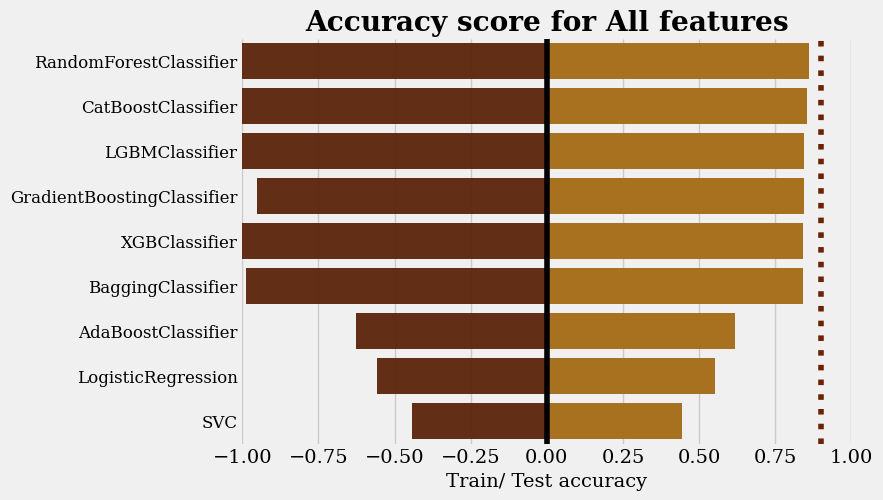

In [57]:
plotscoring(score_all,'All features',axvline=.9)

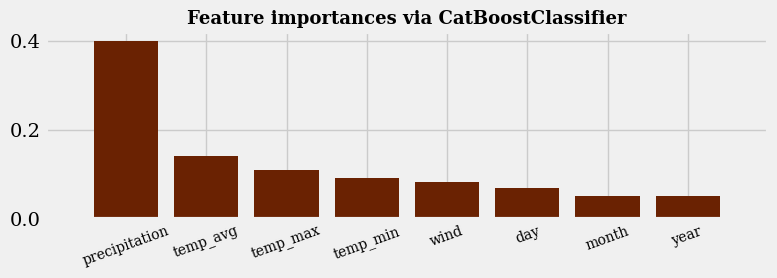

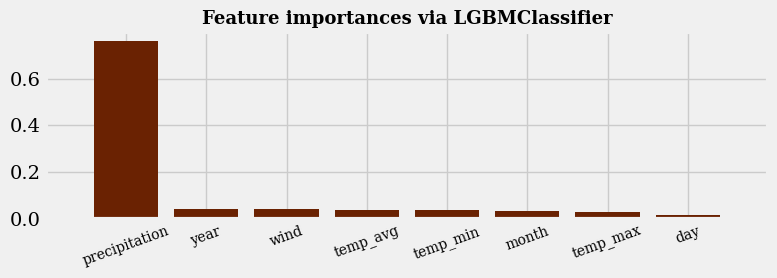

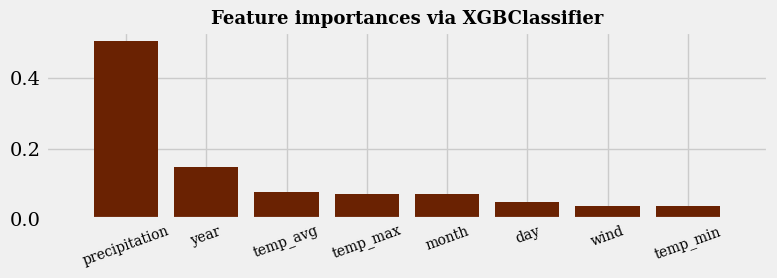

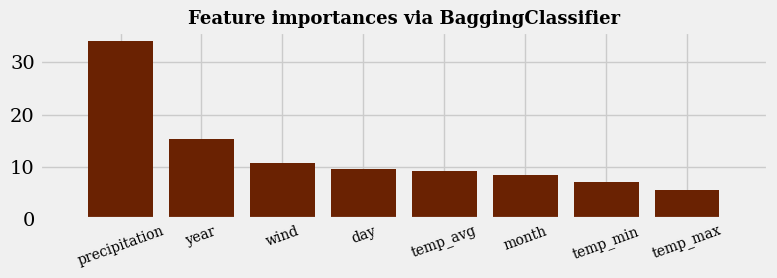

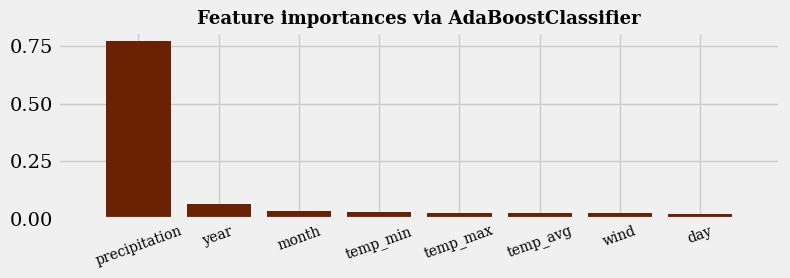

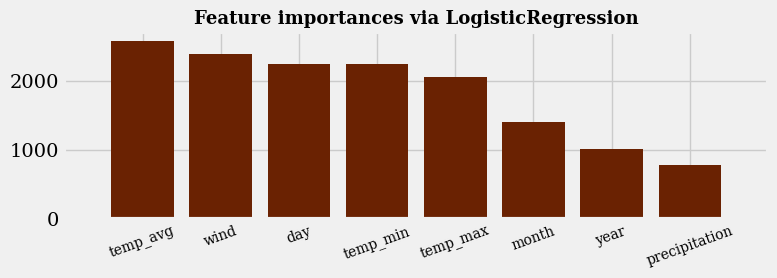

In [58]:
plotting_importances(score_all,imp_all,X,rotation=20)

In [59]:
orgset.remove('date')
orgset

['precipitation', 'temp_max', 'temp_min', 'wind']

In [60]:
score_orgset,imp_orgset=selectmoran(modellst,X[orgset])

Learning rate set to 0.080097
0:	learn: 1.4199234	total: 2.5ms	remaining: 2.5s
1:	learn: 1.2901242	total: 5.23ms	remaining: 2.61s
2:	learn: 1.1802126	total: 7.95ms	remaining: 2.64s
3:	learn: 1.0911435	total: 9.7ms	remaining: 2.41s
4:	learn: 1.0173389	total: 13.3ms	remaining: 2.65s
5:	learn: 0.9566449	total: 16.3ms	remaining: 2.69s
6:	learn: 0.9050240	total: 19.1ms	remaining: 2.71s
7:	learn: 0.8615381	total: 23.4ms	remaining: 2.9s
8:	learn: 0.8222182	total: 26.7ms	remaining: 2.94s
9:	learn: 0.7885139	total: 29.1ms	remaining: 2.88s
10:	learn: 0.7605369	total: 31.6ms	remaining: 2.84s
11:	learn: 0.7364635	total: 34.1ms	remaining: 2.81s
12:	learn: 0.7119006	total: 38ms	remaining: 2.88s
13:	learn: 0.6929744	total: 41.6ms	remaining: 2.93s
14:	learn: 0.6738162	total: 45.4ms	remaining: 2.98s
15:	learn: 0.6563110	total: 50.1ms	remaining: 3.08s
16:	learn: 0.6391199	total: 53.9ms	remaining: 3.12s
17:	learn: 0.6254425	total: 58.9ms	remaining: 3.21s
18:	learn: 0.6120178	total: 61ms	remaining: 3.15s


245:	learn: 0.3324211	total: 582ms	remaining: 1.78s
246:	learn: 0.3318035	total: 585ms	remaining: 1.78s
247:	learn: 0.3312074	total: 587ms	remaining: 1.78s
248:	learn: 0.3308598	total: 590ms	remaining: 1.78s
249:	learn: 0.3301651	total: 592ms	remaining: 1.77s
250:	learn: 0.3299749	total: 594ms	remaining: 1.77s
251:	learn: 0.3295276	total: 596ms	remaining: 1.77s
252:	learn: 0.3288704	total: 598ms	remaining: 1.77s
253:	learn: 0.3284287	total: 600ms	remaining: 1.76s
254:	learn: 0.3282376	total: 603ms	remaining: 1.76s
255:	learn: 0.3279420	total: 606ms	remaining: 1.76s
256:	learn: 0.3275935	total: 608ms	remaining: 1.76s
257:	learn: 0.3270784	total: 610ms	remaining: 1.75s
258:	learn: 0.3262734	total: 613ms	remaining: 1.75s
259:	learn: 0.3258250	total: 615ms	remaining: 1.75s
260:	learn: 0.3255258	total: 617ms	remaining: 1.75s
261:	learn: 0.3248704	total: 620ms	remaining: 1.75s
262:	learn: 0.3245213	total: 623ms	remaining: 1.74s
263:	learn: 0.3241944	total: 624ms	remaining: 1.74s
264:	learn: 

414:	learn: 0.2734017	total: 966ms	remaining: 1.36s
415:	learn: 0.2730003	total: 968ms	remaining: 1.36s
416:	learn: 0.2726020	total: 971ms	remaining: 1.36s
417:	learn: 0.2722611	total: 973ms	remaining: 1.35s
418:	learn: 0.2719319	total: 975ms	remaining: 1.35s
419:	learn: 0.2715098	total: 977ms	remaining: 1.35s
420:	learn: 0.2711421	total: 980ms	remaining: 1.35s
421:	learn: 0.2709476	total: 983ms	remaining: 1.35s
422:	learn: 0.2707298	total: 985ms	remaining: 1.34s
423:	learn: 0.2703322	total: 987ms	remaining: 1.34s
424:	learn: 0.2699245	total: 991ms	remaining: 1.34s
425:	learn: 0.2696393	total: 993ms	remaining: 1.34s
426:	learn: 0.2694559	total: 995ms	remaining: 1.33s
427:	learn: 0.2692747	total: 998ms	remaining: 1.33s
428:	learn: 0.2690282	total: 1s	remaining: 1.33s
429:	learn: 0.2686933	total: 1s	remaining: 1.33s
430:	learn: 0.2682384	total: 1s	remaining: 1.33s
431:	learn: 0.2679117	total: 1.01s	remaining: 1.32s
432:	learn: 0.2676704	total: 1.01s	remaining: 1.32s
433:	learn: 0.2672724

593:	learn: 0.2300447	total: 1.36s	remaining: 931ms
594:	learn: 0.2298196	total: 1.36s	remaining: 929ms
595:	learn: 0.2295759	total: 1.37s	remaining: 926ms
596:	learn: 0.2292451	total: 1.37s	remaining: 924ms
597:	learn: 0.2290398	total: 1.37s	remaining: 921ms
598:	learn: 0.2287967	total: 1.37s	remaining: 919ms
599:	learn: 0.2286593	total: 1.37s	remaining: 916ms
600:	learn: 0.2285324	total: 1.38s	remaining: 914ms
601:	learn: 0.2282921	total: 1.38s	remaining: 911ms
602:	learn: 0.2282043	total: 1.38s	remaining: 909ms
603:	learn: 0.2280412	total: 1.38s	remaining: 906ms
604:	learn: 0.2279093	total: 1.38s	remaining: 904ms
605:	learn: 0.2276378	total: 1.39s	remaining: 902ms
606:	learn: 0.2274372	total: 1.39s	remaining: 899ms
607:	learn: 0.2271701	total: 1.39s	remaining: 897ms
608:	learn: 0.2269883	total: 1.39s	remaining: 894ms
609:	learn: 0.2267598	total: 1.39s	remaining: 892ms
610:	learn: 0.2265757	total: 1.4s	remaining: 889ms
611:	learn: 0.2264012	total: 1.4s	remaining: 887ms
612:	learn: 0.

779:	learn: 0.1964510	total: 1.75s	remaining: 493ms
780:	learn: 0.1963716	total: 1.75s	remaining: 491ms
781:	learn: 0.1961902	total: 1.75s	remaining: 489ms
782:	learn: 0.1960789	total: 1.75s	remaining: 486ms
783:	learn: 0.1958814	total: 1.76s	remaining: 484ms
784:	learn: 0.1957219	total: 1.76s	remaining: 482ms
785:	learn: 0.1955888	total: 1.76s	remaining: 479ms
786:	learn: 0.1954746	total: 1.76s	remaining: 477ms
787:	learn: 0.1953385	total: 1.76s	remaining: 475ms
788:	learn: 0.1951138	total: 1.77s	remaining: 473ms
789:	learn: 0.1947966	total: 1.77s	remaining: 470ms
790:	learn: 0.1947639	total: 1.77s	remaining: 468ms
791:	learn: 0.1946770	total: 1.77s	remaining: 466ms
792:	learn: 0.1943801	total: 1.77s	remaining: 463ms
793:	learn: 0.1941978	total: 1.78s	remaining: 461ms
794:	learn: 0.1940823	total: 1.78s	remaining: 459ms
795:	learn: 0.1939454	total: 1.78s	remaining: 457ms
796:	learn: 0.1937484	total: 1.78s	remaining: 454ms
797:	learn: 0.1935132	total: 1.79s	remaining: 452ms
798:	learn: 

949:	learn: 0.1707189	total: 2.13s	remaining: 112ms
950:	learn: 0.1705304	total: 2.14s	remaining: 110ms
951:	learn: 0.1704298	total: 2.14s	remaining: 108ms
952:	learn: 0.1702901	total: 2.14s	remaining: 106ms
953:	learn: 0.1701296	total: 2.14s	remaining: 103ms
954:	learn: 0.1700095	total: 2.15s	remaining: 101ms
955:	learn: 0.1698496	total: 2.15s	remaining: 98.9ms
956:	learn: 0.1697530	total: 2.15s	remaining: 96.6ms
957:	learn: 0.1696955	total: 2.15s	remaining: 94.4ms
958:	learn: 0.1695495	total: 2.15s	remaining: 92.2ms
959:	learn: 0.1694939	total: 2.16s	remaining: 89.9ms
960:	learn: 0.1692623	total: 2.16s	remaining: 87.7ms
961:	learn: 0.1691050	total: 2.16s	remaining: 85.4ms
962:	learn: 0.1689832	total: 2.16s	remaining: 83.2ms
963:	learn: 0.1688557	total: 2.17s	remaining: 80.9ms
964:	learn: 0.1687787	total: 2.17s	remaining: 78.7ms
965:	learn: 0.1686339	total: 2.17s	remaining: 76.4ms
966:	learn: 0.1685106	total: 2.17s	remaining: 74.2ms
967:	learn: 0.1683761	total: 2.17s	remaining: 71.9ms

150:	learn: 0.3853435	total: 414ms	remaining: 2.33s
151:	learn: 0.3848597	total: 417ms	remaining: 2.32s
152:	learn: 0.3841839	total: 419ms	remaining: 2.32s
153:	learn: 0.3836142	total: 420ms	remaining: 2.31s
154:	learn: 0.3828502	total: 423ms	remaining: 2.31s
155:	learn: 0.3825985	total: 427ms	remaining: 2.31s
156:	learn: 0.3819635	total: 432ms	remaining: 2.32s
157:	learn: 0.3813593	total: 435ms	remaining: 2.32s
158:	learn: 0.3806170	total: 438ms	remaining: 2.32s
159:	learn: 0.3802214	total: 442ms	remaining: 2.32s
160:	learn: 0.3798623	total: 445ms	remaining: 2.32s
161:	learn: 0.3793043	total: 447ms	remaining: 2.31s
162:	learn: 0.3785024	total: 450ms	remaining: 2.31s
163:	learn: 0.3779074	total: 452ms	remaining: 2.31s
164:	learn: 0.3773490	total: 455ms	remaining: 2.3s
165:	learn: 0.3765522	total: 458ms	remaining: 2.3s
166:	learn: 0.3762087	total: 460ms	remaining: 2.3s
167:	learn: 0.3758316	total: 463ms	remaining: 2.29s
168:	learn: 0.3752457	total: 466ms	remaining: 2.29s
169:	learn: 0.3

383:	learn: 0.2861586	total: 1000ms	remaining: 1.6s
384:	learn: 0.2858224	total: 1s	remaining: 1.6s
385:	learn: 0.2856809	total: 1s	remaining: 1.6s
386:	learn: 0.2853147	total: 1.01s	remaining: 1.59s
387:	learn: 0.2850719	total: 1.01s	remaining: 1.59s
388:	learn: 0.2847035	total: 1.01s	remaining: 1.59s
389:	learn: 0.2844368	total: 1.01s	remaining: 1.59s
390:	learn: 0.2840183	total: 1.02s	remaining: 1.59s
391:	learn: 0.2834887	total: 1.02s	remaining: 1.58s
392:	learn: 0.2830358	total: 1.02s	remaining: 1.58s
393:	learn: 0.2828725	total: 1.02s	remaining: 1.58s
394:	learn: 0.2826552	total: 1.03s	remaining: 1.57s
395:	learn: 0.2822787	total: 1.03s	remaining: 1.57s
396:	learn: 0.2819666	total: 1.03s	remaining: 1.56s
397:	learn: 0.2816278	total: 1.03s	remaining: 1.56s
398:	learn: 0.2813677	total: 1.03s	remaining: 1.56s
399:	learn: 0.2812576	total: 1.04s	remaining: 1.55s
400:	learn: 0.2808319	total: 1.04s	remaining: 1.55s
401:	learn: 0.2804559	total: 1.04s	remaining: 1.55s
402:	learn: 0.280015

551:	learn: 0.2399864	total: 1.4s	remaining: 1.13s
552:	learn: 0.2397881	total: 1.4s	remaining: 1.13s
553:	learn: 0.2394348	total: 1.41s	remaining: 1.13s
554:	learn: 0.2392200	total: 1.41s	remaining: 1.13s
555:	learn: 0.2390267	total: 1.41s	remaining: 1.13s
556:	learn: 0.2387628	total: 1.42s	remaining: 1.13s
557:	learn: 0.2386026	total: 1.42s	remaining: 1.13s
558:	learn: 0.2384035	total: 1.43s	remaining: 1.13s
559:	learn: 0.2380453	total: 1.43s	remaining: 1.12s
560:	learn: 0.2379449	total: 1.43s	remaining: 1.12s
561:	learn: 0.2378200	total: 1.44s	remaining: 1.12s
562:	learn: 0.2377207	total: 1.44s	remaining: 1.12s
563:	learn: 0.2373982	total: 1.44s	remaining: 1.11s
564:	learn: 0.2370798	total: 1.44s	remaining: 1.11s
565:	learn: 0.2368797	total: 1.45s	remaining: 1.11s
566:	learn: 0.2367400	total: 1.45s	remaining: 1.11s
567:	learn: 0.2366737	total: 1.45s	remaining: 1.1s
568:	learn: 0.2364359	total: 1.46s	remaining: 1.1s
569:	learn: 0.2362372	total: 1.46s	remaining: 1.1s
570:	learn: 0.235

715:	learn: 0.2065326	total: 1.79s	remaining: 710ms
716:	learn: 0.2064173	total: 1.79s	remaining: 707ms
717:	learn: 0.2061946	total: 1.79s	remaining: 704ms
718:	learn: 0.2060770	total: 1.8s	remaining: 702ms
719:	learn: 0.2059640	total: 1.8s	remaining: 699ms
720:	learn: 0.2059015	total: 1.8s	remaining: 697ms
721:	learn: 0.2057782	total: 1.8s	remaining: 694ms
722:	learn: 0.2055432	total: 1.8s	remaining: 692ms
723:	learn: 0.2054037	total: 1.81s	remaining: 689ms
724:	learn: 0.2052919	total: 1.81s	remaining: 687ms
725:	learn: 0.2050801	total: 1.81s	remaining: 684ms
726:	learn: 0.2048707	total: 1.81s	remaining: 681ms
727:	learn: 0.2047303	total: 1.82s	remaining: 679ms
728:	learn: 0.2045097	total: 1.82s	remaining: 676ms
729:	learn: 0.2043089	total: 1.82s	remaining: 674ms
730:	learn: 0.2040189	total: 1.82s	remaining: 671ms
731:	learn: 0.2038578	total: 1.83s	remaining: 669ms
732:	learn: 0.2036176	total: 1.83s	remaining: 666ms
733:	learn: 0.2034300	total: 1.83s	remaining: 663ms
734:	learn: 0.203

900:	learn: 0.1782541	total: 2.18s	remaining: 240ms
901:	learn: 0.1781181	total: 2.18s	remaining: 237ms
902:	learn: 0.1779645	total: 2.19s	remaining: 235ms
903:	learn: 0.1778574	total: 2.19s	remaining: 232ms
904:	learn: 0.1776700	total: 2.19s	remaining: 230ms
905:	learn: 0.1775593	total: 2.19s	remaining: 227ms
906:	learn: 0.1774613	total: 2.19s	remaining: 225ms
907:	learn: 0.1772963	total: 2.2s	remaining: 223ms
908:	learn: 0.1771720	total: 2.2s	remaining: 220ms
909:	learn: 0.1770700	total: 2.2s	remaining: 218ms
910:	learn: 0.1768666	total: 2.21s	remaining: 216ms
911:	learn: 0.1767652	total: 2.21s	remaining: 213ms
912:	learn: 0.1765817	total: 2.21s	remaining: 211ms
913:	learn: 0.1764163	total: 2.21s	remaining: 208ms
914:	learn: 0.1762373	total: 2.21s	remaining: 206ms
915:	learn: 0.1760667	total: 2.22s	remaining: 203ms
916:	learn: 0.1759579	total: 2.22s	remaining: 201ms
917:	learn: 0.1758283	total: 2.22s	remaining: 198ms
918:	learn: 0.1757282	total: 2.22s	remaining: 196ms
919:	learn: 0.1

62:	learn: 0.4610192	total: 138ms	remaining: 2.06s
63:	learn: 0.4601723	total: 141ms	remaining: 2.06s
64:	learn: 0.4587745	total: 143ms	remaining: 2.06s
65:	learn: 0.4579685	total: 145ms	remaining: 2.05s
66:	learn: 0.4566031	total: 148ms	remaining: 2.06s
67:	learn: 0.4551101	total: 151ms	remaining: 2.06s
68:	learn: 0.4535639	total: 153ms	remaining: 2.06s
69:	learn: 0.4527071	total: 155ms	remaining: 2.06s
70:	learn: 0.4515774	total: 157ms	remaining: 2.05s
71:	learn: 0.4510125	total: 159ms	remaining: 2.05s
72:	learn: 0.4504195	total: 161ms	remaining: 2.05s
73:	learn: 0.4496085	total: 164ms	remaining: 2.05s
74:	learn: 0.4487556	total: 166ms	remaining: 2.04s
75:	learn: 0.4480646	total: 168ms	remaining: 2.04s
76:	learn: 0.4474708	total: 170ms	remaining: 2.04s
77:	learn: 0.4470034	total: 173ms	remaining: 2.04s
78:	learn: 0.4464881	total: 175ms	remaining: 2.04s
79:	learn: 0.4457004	total: 177ms	remaining: 2.04s
80:	learn: 0.4449247	total: 179ms	remaining: 2.03s
81:	learn: 0.4439015	total: 182

228:	learn: 0.3539910	total: 524ms	remaining: 1.76s
229:	learn: 0.3537696	total: 526ms	remaining: 1.76s
230:	learn: 0.3533210	total: 528ms	remaining: 1.76s
231:	learn: 0.3526827	total: 530ms	remaining: 1.75s
232:	learn: 0.3523851	total: 532ms	remaining: 1.75s
233:	learn: 0.3518731	total: 534ms	remaining: 1.75s
234:	learn: 0.3513525	total: 536ms	remaining: 1.75s
235:	learn: 0.3508537	total: 538ms	remaining: 1.74s
236:	learn: 0.3502979	total: 540ms	remaining: 1.74s
237:	learn: 0.3498789	total: 542ms	remaining: 1.74s
238:	learn: 0.3492142	total: 544ms	remaining: 1.73s
239:	learn: 0.3484151	total: 546ms	remaining: 1.73s
240:	learn: 0.3478270	total: 549ms	remaining: 1.73s
241:	learn: 0.3474775	total: 551ms	remaining: 1.73s
242:	learn: 0.3471847	total: 553ms	remaining: 1.72s
243:	learn: 0.3466915	total: 555ms	remaining: 1.72s
244:	learn: 0.3463529	total: 557ms	remaining: 1.72s
245:	learn: 0.3460929	total: 559ms	remaining: 1.71s
246:	learn: 0.3457004	total: 561ms	remaining: 1.71s
247:	learn: 

422:	learn: 0.2794795	total: 909ms	remaining: 1.24s
423:	learn: 0.2790847	total: 911ms	remaining: 1.24s
424:	learn: 0.2787170	total: 913ms	remaining: 1.24s
425:	learn: 0.2784932	total: 915ms	remaining: 1.23s
426:	learn: 0.2779470	total: 917ms	remaining: 1.23s
427:	learn: 0.2774402	total: 919ms	remaining: 1.23s
428:	learn: 0.2771771	total: 921ms	remaining: 1.23s
429:	learn: 0.2769976	total: 923ms	remaining: 1.22s
430:	learn: 0.2767804	total: 925ms	remaining: 1.22s
431:	learn: 0.2764133	total: 927ms	remaining: 1.22s
432:	learn: 0.2761509	total: 929ms	remaining: 1.22s
433:	learn: 0.2759134	total: 931ms	remaining: 1.21s
434:	learn: 0.2754882	total: 933ms	remaining: 1.21s
435:	learn: 0.2751003	total: 935ms	remaining: 1.21s
436:	learn: 0.2749484	total: 937ms	remaining: 1.21s
437:	learn: 0.2746012	total: 939ms	remaining: 1.2s
438:	learn: 0.2744035	total: 941ms	remaining: 1.2s
439:	learn: 0.2742956	total: 943ms	remaining: 1.2s
440:	learn: 0.2740968	total: 945ms	remaining: 1.2s
441:	learn: 0.27

615:	learn: 0.2315584	total: 1.29s	remaining: 807ms
616:	learn: 0.2314000	total: 1.3s	remaining: 805ms
617:	learn: 0.2311537	total: 1.3s	remaining: 802ms
618:	learn: 0.2309574	total: 1.3s	remaining: 800ms
619:	learn: 0.2306658	total: 1.3s	remaining: 798ms
620:	learn: 0.2305456	total: 1.3s	remaining: 796ms
621:	learn: 0.2304457	total: 1.31s	remaining: 794ms
622:	learn: 0.2301600	total: 1.31s	remaining: 792ms
623:	learn: 0.2299772	total: 1.31s	remaining: 789ms
624:	learn: 0.2298335	total: 1.31s	remaining: 787ms
625:	learn: 0.2296630	total: 1.31s	remaining: 785ms
626:	learn: 0.2293519	total: 1.32s	remaining: 783ms
627:	learn: 0.2291453	total: 1.32s	remaining: 781ms
628:	learn: 0.2290092	total: 1.32s	remaining: 778ms
629:	learn: 0.2288961	total: 1.32s	remaining: 776ms
630:	learn: 0.2286763	total: 1.32s	remaining: 774ms
631:	learn: 0.2285348	total: 1.32s	remaining: 772ms
632:	learn: 0.2282674	total: 1.33s	remaining: 770ms
633:	learn: 0.2281643	total: 1.33s	remaining: 768ms
634:	learn: 0.228

821:	learn: 0.1941833	total: 1.68s	remaining: 364ms
822:	learn: 0.1940198	total: 1.68s	remaining: 362ms
823:	learn: 0.1938246	total: 1.68s	remaining: 360ms
824:	learn: 0.1937221	total: 1.69s	remaining: 358ms
825:	learn: 0.1934658	total: 1.69s	remaining: 356ms
826:	learn: 0.1934091	total: 1.69s	remaining: 353ms
827:	learn: 0.1932366	total: 1.69s	remaining: 351ms
828:	learn: 0.1931269	total: 1.69s	remaining: 349ms
829:	learn: 0.1929527	total: 1.69s	remaining: 347ms
830:	learn: 0.1928274	total: 1.7s	remaining: 345ms
831:	learn: 0.1925622	total: 1.7s	remaining: 343ms
832:	learn: 0.1923460	total: 1.7s	remaining: 341ms
833:	learn: 0.1922512	total: 1.7s	remaining: 339ms
834:	learn: 0.1920543	total: 1.7s	remaining: 337ms
835:	learn: 0.1919035	total: 1.71s	remaining: 335ms
836:	learn: 0.1917863	total: 1.71s	remaining: 333ms
837:	learn: 0.1917126	total: 1.71s	remaining: 330ms
838:	learn: 0.1915155	total: 1.71s	remaining: 328ms
839:	learn: 0.1913603	total: 1.71s	remaining: 326ms
840:	learn: 0.191

Learning rate set to 0.0801
0:	learn: 1.4159819	total: 4.2ms	remaining: 4.19s
1:	learn: 1.2877755	total: 9.16ms	remaining: 4.57s
2:	learn: 1.1808735	total: 14.2ms	remaining: 4.73s
3:	learn: 1.0940533	total: 17.4ms	remaining: 4.34s
4:	learn: 1.0210915	total: 21.2ms	remaining: 4.21s
5:	learn: 0.9609920	total: 26.1ms	remaining: 4.32s
6:	learn: 0.9098084	total: 30.8ms	remaining: 4.37s
7:	learn: 0.8665734	total: 33.8ms	remaining: 4.19s
8:	learn: 0.8310996	total: 37.4ms	remaining: 4.12s
9:	learn: 0.7968411	total: 41.3ms	remaining: 4.08s
10:	learn: 0.7689685	total: 44.4ms	remaining: 3.99s
11:	learn: 0.7439575	total: 48.1ms	remaining: 3.96s
12:	learn: 0.7191911	total: 51.9ms	remaining: 3.94s
13:	learn: 0.6977899	total: 56ms	remaining: 3.94s
14:	learn: 0.6789946	total: 58.5ms	remaining: 3.84s
15:	learn: 0.6625630	total: 60.9ms	remaining: 3.75s
16:	learn: 0.6452109	total: 63.3ms	remaining: 3.66s
17:	learn: 0.6303014	total: 66.3ms	remaining: 3.62s
18:	learn: 0.6168583	total: 68.9ms	remaining: 3.5

170:	learn: 0.3719525	total: 387ms	remaining: 1.88s
171:	learn: 0.3713416	total: 389ms	remaining: 1.87s
172:	learn: 0.3709413	total: 391ms	remaining: 1.87s
173:	learn: 0.3705719	total: 393ms	remaining: 1.87s
174:	learn: 0.3703154	total: 395ms	remaining: 1.86s
175:	learn: 0.3693918	total: 397ms	remaining: 1.86s
176:	learn: 0.3686437	total: 399ms	remaining: 1.85s
177:	learn: 0.3683914	total: 401ms	remaining: 1.85s
178:	learn: 0.3674083	total: 403ms	remaining: 1.85s
179:	learn: 0.3666880	total: 404ms	remaining: 1.84s
180:	learn: 0.3657908	total: 406ms	remaining: 1.84s
181:	learn: 0.3652050	total: 408ms	remaining: 1.83s
182:	learn: 0.3646688	total: 410ms	remaining: 1.83s
183:	learn: 0.3641463	total: 412ms	remaining: 1.82s
184:	learn: 0.3636351	total: 413ms	remaining: 1.82s
185:	learn: 0.3630899	total: 415ms	remaining: 1.82s
186:	learn: 0.3624926	total: 417ms	remaining: 1.81s
187:	learn: 0.3617745	total: 419ms	remaining: 1.81s
188:	learn: 0.3613337	total: 421ms	remaining: 1.81s
189:	learn: 

370:	learn: 0.2885696	total: 779ms	remaining: 1.32s
371:	learn: 0.2884009	total: 781ms	remaining: 1.32s
372:	learn: 0.2881669	total: 783ms	remaining: 1.32s
373:	learn: 0.2877065	total: 786ms	remaining: 1.31s
374:	learn: 0.2873676	total: 788ms	remaining: 1.31s
375:	learn: 0.2872165	total: 790ms	remaining: 1.31s
376:	learn: 0.2870415	total: 792ms	remaining: 1.31s
377:	learn: 0.2867622	total: 794ms	remaining: 1.31s
378:	learn: 0.2864278	total: 796ms	remaining: 1.3s
379:	learn: 0.2861658	total: 798ms	remaining: 1.3s
380:	learn: 0.2859740	total: 800ms	remaining: 1.3s
381:	learn: 0.2854242	total: 802ms	remaining: 1.3s
382:	learn: 0.2849837	total: 804ms	remaining: 1.29s
383:	learn: 0.2845906	total: 806ms	remaining: 1.29s
384:	learn: 0.2842757	total: 808ms	remaining: 1.29s
385:	learn: 0.2840762	total: 810ms	remaining: 1.29s
386:	learn: 0.2837199	total: 812ms	remaining: 1.29s
387:	learn: 0.2833087	total: 814ms	remaining: 1.28s
388:	learn: 0.2827840	total: 816ms	remaining: 1.28s
389:	learn: 0.28

545:	learn: 0.2419460	total: 1.17s	remaining: 971ms
546:	learn: 0.2417835	total: 1.17s	remaining: 969ms
547:	learn: 0.2414471	total: 1.17s	remaining: 967ms
548:	learn: 0.2411787	total: 1.17s	remaining: 965ms
549:	learn: 0.2409762	total: 1.18s	remaining: 963ms
550:	learn: 0.2406632	total: 1.18s	remaining: 960ms
551:	learn: 0.2405068	total: 1.18s	remaining: 958ms
552:	learn: 0.2403399	total: 1.18s	remaining: 956ms
553:	learn: 0.2398975	total: 1.18s	remaining: 954ms
554:	learn: 0.2396740	total: 1.19s	remaining: 952ms
555:	learn: 0.2394552	total: 1.19s	remaining: 950ms
556:	learn: 0.2390683	total: 1.19s	remaining: 947ms
557:	learn: 0.2386797	total: 1.19s	remaining: 945ms
558:	learn: 0.2384664	total: 1.2s	remaining: 943ms
559:	learn: 0.2383580	total: 1.2s	remaining: 940ms
560:	learn: 0.2381553	total: 1.2s	remaining: 938ms
561:	learn: 0.2379137	total: 1.2s	remaining: 936ms
562:	learn: 0.2377081	total: 1.2s	remaining: 934ms
563:	learn: 0.2375102	total: 1.2s	remaining: 931ms
564:	learn: 0.2372

746:	learn: 0.2008421	total: 1.76s	remaining: 597ms
747:	learn: 0.2007321	total: 1.76s	remaining: 594ms
748:	learn: 0.2006207	total: 1.77s	remaining: 592ms
749:	learn: 0.2005150	total: 1.77s	remaining: 590ms
750:	learn: 0.2003540	total: 1.77s	remaining: 587ms
751:	learn: 0.2002574	total: 1.77s	remaining: 585ms
752:	learn: 0.2001281	total: 1.78s	remaining: 583ms
753:	learn: 0.2000442	total: 1.78s	remaining: 580ms
754:	learn: 0.1997749	total: 1.78s	remaining: 578ms
755:	learn: 0.1996628	total: 1.78s	remaining: 576ms
756:	learn: 0.1994061	total: 1.79s	remaining: 573ms
757:	learn: 0.1991952	total: 1.79s	remaining: 571ms
758:	learn: 0.1991365	total: 1.79s	remaining: 569ms
759:	learn: 0.1989980	total: 1.79s	remaining: 566ms
760:	learn: 0.1987553	total: 1.79s	remaining: 564ms
761:	learn: 0.1985869	total: 1.8s	remaining: 561ms
762:	learn: 0.1983852	total: 1.8s	remaining: 559ms
763:	learn: 0.1983022	total: 1.8s	remaining: 557ms
764:	learn: 0.1980829	total: 1.8s	remaining: 554ms
765:	learn: 0.19

934:	learn: 0.1733312	total: 2.15s	remaining: 149ms
935:	learn: 0.1731630	total: 2.15s	remaining: 147ms
936:	learn: 0.1730229	total: 2.15s	remaining: 145ms
937:	learn: 0.1728721	total: 2.15s	remaining: 142ms
938:	learn: 0.1727777	total: 2.16s	remaining: 140ms
939:	learn: 0.1726619	total: 2.16s	remaining: 138ms
940:	learn: 0.1723456	total: 2.16s	remaining: 136ms
941:	learn: 0.1721651	total: 2.16s	remaining: 133ms
942:	learn: 0.1720159	total: 2.17s	remaining: 131ms
943:	learn: 0.1719310	total: 2.17s	remaining: 129ms
944:	learn: 0.1717712	total: 2.17s	remaining: 126ms
945:	learn: 0.1715737	total: 2.17s	remaining: 124ms
946:	learn: 0.1714179	total: 2.17s	remaining: 122ms
947:	learn: 0.1713474	total: 2.17s	remaining: 119ms
948:	learn: 0.1712866	total: 2.18s	remaining: 117ms
949:	learn: 0.1711940	total: 2.18s	remaining: 115ms
950:	learn: 0.1711099	total: 2.18s	remaining: 112ms
951:	learn: 0.1709324	total: 2.18s	remaining: 110ms
952:	learn: 0.1707836	total: 2.18s	remaining: 108ms
953:	learn: 

150:	learn: 0.3744507	total: 414ms	remaining: 2.33s
151:	learn: 0.3736381	total: 416ms	remaining: 2.32s
152:	learn: 0.3728558	total: 418ms	remaining: 2.31s
153:	learn: 0.3720911	total: 421ms	remaining: 2.31s
154:	learn: 0.3717941	total: 423ms	remaining: 2.3s
155:	learn: 0.3714432	total: 425ms	remaining: 2.3s
156:	learn: 0.3709373	total: 427ms	remaining: 2.29s
157:	learn: 0.3703478	total: 429ms	remaining: 2.29s
158:	learn: 0.3694627	total: 431ms	remaining: 2.28s
159:	learn: 0.3688995	total: 433ms	remaining: 2.27s
160:	learn: 0.3678966	total: 435ms	remaining: 2.27s
161:	learn: 0.3673542	total: 437ms	remaining: 2.26s
162:	learn: 0.3671503	total: 439ms	remaining: 2.26s
163:	learn: 0.3664726	total: 441ms	remaining: 2.25s
164:	learn: 0.3658557	total: 444ms	remaining: 2.25s
165:	learn: 0.3654656	total: 446ms	remaining: 2.24s
166:	learn: 0.3647488	total: 448ms	remaining: 2.23s
167:	learn: 0.3644034	total: 450ms	remaining: 2.23s
168:	learn: 0.3636690	total: 452ms	remaining: 2.22s
169:	learn: 0.

319:	learn: 0.2988688	total: 799ms	remaining: 1.7s
320:	learn: 0.2985843	total: 801ms	remaining: 1.69s
321:	learn: 0.2983508	total: 803ms	remaining: 1.69s
322:	learn: 0.2979913	total: 805ms	remaining: 1.69s
323:	learn: 0.2974567	total: 806ms	remaining: 1.68s
324:	learn: 0.2970088	total: 808ms	remaining: 1.68s
325:	learn: 0.2965651	total: 810ms	remaining: 1.68s
326:	learn: 0.2963537	total: 812ms	remaining: 1.67s
327:	learn: 0.2959745	total: 814ms	remaining: 1.67s
328:	learn: 0.2955787	total: 816ms	remaining: 1.66s
329:	learn: 0.2951510	total: 818ms	remaining: 1.66s
330:	learn: 0.2949015	total: 819ms	remaining: 1.66s
331:	learn: 0.2946098	total: 821ms	remaining: 1.65s
332:	learn: 0.2943336	total: 823ms	remaining: 1.65s
333:	learn: 0.2939899	total: 825ms	remaining: 1.64s
334:	learn: 0.2935698	total: 827ms	remaining: 1.64s
335:	learn: 0.2933889	total: 828ms	remaining: 1.64s
336:	learn: 0.2930795	total: 830ms	remaining: 1.63s
337:	learn: 0.2927140	total: 832ms	remaining: 1.63s
338:	learn: 0

523:	learn: 0.2378499	total: 1.2s	remaining: 1.09s
524:	learn: 0.2376635	total: 1.2s	remaining: 1.09s
525:	learn: 0.2373832	total: 1.21s	remaining: 1.09s
526:	learn: 0.2371301	total: 1.21s	remaining: 1.08s
527:	learn: 0.2368754	total: 1.21s	remaining: 1.08s
528:	learn: 0.2367443	total: 1.21s	remaining: 1.08s
529:	learn: 0.2365824	total: 1.21s	remaining: 1.08s
530:	learn: 0.2362284	total: 1.22s	remaining: 1.07s
531:	learn: 0.2356296	total: 1.22s	remaining: 1.07s
532:	learn: 0.2354588	total: 1.22s	remaining: 1.07s
533:	learn: 0.2352098	total: 1.22s	remaining: 1.07s
534:	learn: 0.2350672	total: 1.22s	remaining: 1.06s
535:	learn: 0.2348915	total: 1.23s	remaining: 1.06s
536:	learn: 0.2347301	total: 1.23s	remaining: 1.06s
537:	learn: 0.2346026	total: 1.23s	remaining: 1.06s
538:	learn: 0.2343712	total: 1.23s	remaining: 1.05s
539:	learn: 0.2341073	total: 1.23s	remaining: 1.05s
540:	learn: 0.2337687	total: 1.24s	remaining: 1.05s
541:	learn: 0.2334698	total: 1.24s	remaining: 1.05s
542:	learn: 0.

709:	learn: 0.2002609	total: 1.58s	remaining: 647ms
710:	learn: 0.2000359	total: 1.59s	remaining: 645ms
711:	learn: 0.1998068	total: 1.59s	remaining: 643ms
712:	learn: 0.1997152	total: 1.59s	remaining: 640ms
713:	learn: 0.1996072	total: 1.59s	remaining: 638ms
714:	learn: 0.1993938	total: 1.59s	remaining: 636ms
715:	learn: 0.1992710	total: 1.6s	remaining: 634ms
716:	learn: 0.1990426	total: 1.6s	remaining: 631ms
717:	learn: 0.1988289	total: 1.6s	remaining: 629ms
718:	learn: 0.1986614	total: 1.6s	remaining: 627ms
719:	learn: 0.1985720	total: 1.6s	remaining: 624ms
720:	learn: 0.1984421	total: 1.61s	remaining: 622ms
721:	learn: 0.1982093	total: 1.61s	remaining: 620ms
722:	learn: 0.1978997	total: 1.61s	remaining: 618ms
723:	learn: 0.1977672	total: 1.61s	remaining: 615ms
724:	learn: 0.1975383	total: 1.61s	remaining: 613ms
725:	learn: 0.1972987	total: 1.62s	remaining: 611ms
726:	learn: 0.1971396	total: 1.62s	remaining: 608ms
727:	learn: 0.1969860	total: 1.62s	remaining: 606ms
728:	learn: 0.196

910:	learn: 0.1694502	total: 1.98s	remaining: 194ms
911:	learn: 0.1693273	total: 1.99s	remaining: 192ms
912:	learn: 0.1691846	total: 1.99s	remaining: 189ms
913:	learn: 0.1689705	total: 1.99s	remaining: 187ms
914:	learn: 0.1688763	total: 1.99s	remaining: 185ms
915:	learn: 0.1688273	total: 1.99s	remaining: 183ms
916:	learn: 0.1687694	total: 2s	remaining: 181ms
917:	learn: 0.1686232	total: 2s	remaining: 179ms
918:	learn: 0.1685855	total: 2s	remaining: 176ms
919:	learn: 0.1683761	total: 2s	remaining: 174ms
920:	learn: 0.1683176	total: 2s	remaining: 172ms
921:	learn: 0.1682284	total: 2.01s	remaining: 170ms
922:	learn: 0.1680858	total: 2.01s	remaining: 168ms
923:	learn: 0.1678867	total: 2.01s	remaining: 165ms
924:	learn: 0.1677666	total: 2.01s	remaining: 163ms
925:	learn: 0.1677109	total: 2.01s	remaining: 161ms
926:	learn: 0.1676115	total: 2.02s	remaining: 159ms
927:	learn: 0.1674648	total: 2.02s	remaining: 157ms
928:	learn: 0.1672778	total: 2.02s	remaining: 154ms
929:	learn: 0.1670718	total

93:	learn: 0.4243832	total: 191ms	remaining: 1.84s
94:	learn: 0.4239240	total: 193ms	remaining: 1.84s
95:	learn: 0.4227421	total: 195ms	remaining: 1.84s
96:	learn: 0.4216756	total: 198ms	remaining: 1.84s
97:	learn: 0.4201577	total: 200ms	remaining: 1.84s
98:	learn: 0.4195878	total: 202ms	remaining: 1.83s
99:	learn: 0.4185700	total: 204ms	remaining: 1.83s
100:	learn: 0.4177641	total: 206ms	remaining: 1.83s
101:	learn: 0.4167799	total: 208ms	remaining: 1.83s
102:	learn: 0.4163239	total: 210ms	remaining: 1.83s
103:	learn: 0.4154003	total: 212ms	remaining: 1.83s
104:	learn: 0.4144506	total: 214ms	remaining: 1.82s
105:	learn: 0.4140464	total: 216ms	remaining: 1.82s
106:	learn: 0.4131333	total: 218ms	remaining: 1.82s
107:	learn: 0.4128749	total: 220ms	remaining: 1.82s
108:	learn: 0.4121340	total: 222ms	remaining: 1.82s
109:	learn: 0.4113268	total: 224ms	remaining: 1.81s
110:	learn: 0.4107196	total: 226ms	remaining: 1.81s
111:	learn: 0.4096028	total: 228ms	remaining: 1.81s
112:	learn: 0.40857

293:	learn: 0.3134775	total: 589ms	remaining: 1.41s
294:	learn: 0.3132024	total: 591ms	remaining: 1.41s
295:	learn: 0.3128586	total: 593ms	remaining: 1.41s
296:	learn: 0.3124668	total: 595ms	remaining: 1.41s
297:	learn: 0.3122282	total: 597ms	remaining: 1.41s
298:	learn: 0.3116118	total: 598ms	remaining: 1.4s
299:	learn: 0.3111730	total: 600ms	remaining: 1.4s
300:	learn: 0.3108856	total: 602ms	remaining: 1.4s
301:	learn: 0.3104547	total: 605ms	remaining: 1.4s
302:	learn: 0.3101062	total: 607ms	remaining: 1.4s
303:	learn: 0.3097933	total: 609ms	remaining: 1.39s
304:	learn: 0.3094869	total: 611ms	remaining: 1.39s
305:	learn: 0.3090324	total: 614ms	remaining: 1.39s
306:	learn: 0.3087267	total: 616ms	remaining: 1.39s
307:	learn: 0.3083267	total: 618ms	remaining: 1.39s
308:	learn: 0.3078299	total: 620ms	remaining: 1.39s
309:	learn: 0.3074899	total: 622ms	remaining: 1.38s
310:	learn: 0.3069886	total: 624ms	remaining: 1.38s
311:	learn: 0.3066054	total: 626ms	remaining: 1.38s
312:	learn: 0.306

484:	learn: 0.2536691	total: 979ms	remaining: 1.04s
485:	learn: 0.2533287	total: 981ms	remaining: 1.04s
486:	learn: 0.2528734	total: 984ms	remaining: 1.04s
487:	learn: 0.2527673	total: 986ms	remaining: 1.03s
488:	learn: 0.2524511	total: 988ms	remaining: 1.03s
489:	learn: 0.2522789	total: 990ms	remaining: 1.03s
490:	learn: 0.2519694	total: 994ms	remaining: 1.03s
491:	learn: 0.2517137	total: 996ms	remaining: 1.03s
492:	learn: 0.2515170	total: 999ms	remaining: 1.03s
493:	learn: 0.2511382	total: 1s	remaining: 1.02s
494:	learn: 0.2507833	total: 1s	remaining: 1.02s
495:	learn: 0.2506983	total: 1s	remaining: 1.02s
496:	learn: 0.2503055	total: 1.01s	remaining: 1.02s
497:	learn: 0.2500928	total: 1.01s	remaining: 1.02s
498:	learn: 0.2498916	total: 1.01s	remaining: 1.02s
499:	learn: 0.2495418	total: 1.02s	remaining: 1.02s
500:	learn: 0.2492870	total: 1.02s	remaining: 1.01s
501:	learn: 0.2491812	total: 1.02s	remaining: 1.01s
502:	learn: 0.2489533	total: 1.02s	remaining: 1.01s
503:	learn: 0.2486582

650:	learn: 0.2160125	total: 1.36s	remaining: 730ms
651:	learn: 0.2158252	total: 1.36s	remaining: 728ms
652:	learn: 0.2157232	total: 1.37s	remaining: 726ms
653:	learn: 0.2155466	total: 1.37s	remaining: 724ms
654:	learn: 0.2152408	total: 1.37s	remaining: 722ms
655:	learn: 0.2149419	total: 1.37s	remaining: 720ms
656:	learn: 0.2146017	total: 1.38s	remaining: 718ms
657:	learn: 0.2144276	total: 1.38s	remaining: 716ms
658:	learn: 0.2142599	total: 1.38s	remaining: 714ms
659:	learn: 0.2139676	total: 1.38s	remaining: 712ms
660:	learn: 0.2137609	total: 1.38s	remaining: 710ms
661:	learn: 0.2135811	total: 1.39s	remaining: 707ms
662:	learn: 0.2133053	total: 1.39s	remaining: 705ms
663:	learn: 0.2131423	total: 1.39s	remaining: 703ms
664:	learn: 0.2130020	total: 1.39s	remaining: 701ms
665:	learn: 0.2128267	total: 1.39s	remaining: 699ms
666:	learn: 0.2126566	total: 1.4s	remaining: 697ms
667:	learn: 0.2124381	total: 1.4s	remaining: 695ms
668:	learn: 0.2122685	total: 1.4s	remaining: 692ms
669:	learn: 0.2

849:	learn: 0.1815982	total: 1.76s	remaining: 311ms
850:	learn: 0.1815070	total: 1.76s	remaining: 309ms
851:	learn: 0.1814252	total: 1.77s	remaining: 307ms
852:	learn: 0.1813432	total: 1.77s	remaining: 305ms
853:	learn: 0.1812144	total: 1.77s	remaining: 304ms
854:	learn: 0.1810567	total: 1.78s	remaining: 302ms
855:	learn: 0.1809355	total: 1.78s	remaining: 300ms
856:	learn: 0.1807338	total: 1.79s	remaining: 298ms
857:	learn: 0.1806839	total: 1.79s	remaining: 296ms
858:	learn: 0.1805320	total: 1.79s	remaining: 294ms
859:	learn: 0.1803373	total: 1.8s	remaining: 292ms
860:	learn: 0.1801849	total: 1.8s	remaining: 290ms
861:	learn: 0.1800303	total: 1.8s	remaining: 289ms
862:	learn: 0.1798404	total: 1.8s	remaining: 287ms
863:	learn: 0.1797766	total: 1.81s	remaining: 285ms
864:	learn: 0.1796171	total: 1.81s	remaining: 282ms
865:	learn: 0.1794631	total: 1.81s	remaining: 280ms
866:	learn: 0.1793916	total: 1.81s	remaining: 278ms
867:	learn: 0.1792853	total: 1.82s	remaining: 276ms
868:	learn: 0.17

96:	learn: 0.4233699	total: 207ms	remaining: 1.93s
97:	learn: 0.4228199	total: 209ms	remaining: 1.92s
98:	learn: 0.4219162	total: 211ms	remaining: 1.92s
99:	learn: 0.4212121	total: 213ms	remaining: 1.91s
100:	learn: 0.4200534	total: 214ms	remaining: 1.91s
101:	learn: 0.4192237	total: 216ms	remaining: 1.9s
102:	learn: 0.4186554	total: 218ms	remaining: 1.9s
103:	learn: 0.4179420	total: 220ms	remaining: 1.9s
104:	learn: 0.4168292	total: 222ms	remaining: 1.89s
105:	learn: 0.4165472	total: 224ms	remaining: 1.89s
106:	learn: 0.4158334	total: 226ms	remaining: 1.89s
107:	learn: 0.4148867	total: 228ms	remaining: 1.88s
108:	learn: 0.4138244	total: 230ms	remaining: 1.88s
109:	learn: 0.4131985	total: 232ms	remaining: 1.88s
110:	learn: 0.4122147	total: 234ms	remaining: 1.87s
111:	learn: 0.4116862	total: 235ms	remaining: 1.86s
112:	learn: 0.4106476	total: 237ms	remaining: 1.86s
113:	learn: 0.4098640	total: 239ms	remaining: 1.86s
114:	learn: 0.4091090	total: 241ms	remaining: 1.85s
115:	learn: 0.40810

285:	learn: 0.3204494	total: 602ms	remaining: 1.5s
286:	learn: 0.3201350	total: 604ms	remaining: 1.5s
287:	learn: 0.3198253	total: 606ms	remaining: 1.5s
288:	learn: 0.3196446	total: 607ms	remaining: 1.49s
289:	learn: 0.3193734	total: 609ms	remaining: 1.49s
290:	learn: 0.3189391	total: 611ms	remaining: 1.49s
291:	learn: 0.3183871	total: 614ms	remaining: 1.49s
292:	learn: 0.3182022	total: 616ms	remaining: 1.49s
293:	learn: 0.3176154	total: 618ms	remaining: 1.48s
294:	learn: 0.3173912	total: 620ms	remaining: 1.48s
295:	learn: 0.3169827	total: 622ms	remaining: 1.48s
296:	learn: 0.3164927	total: 624ms	remaining: 1.48s
297:	learn: 0.3163187	total: 626ms	remaining: 1.47s
298:	learn: 0.3159762	total: 628ms	remaining: 1.47s
299:	learn: 0.3157400	total: 630ms	remaining: 1.47s
300:	learn: 0.3152788	total: 632ms	remaining: 1.47s
301:	learn: 0.3148023	total: 634ms	remaining: 1.46s
302:	learn: 0.3143788	total: 636ms	remaining: 1.46s
303:	learn: 0.3137286	total: 638ms	remaining: 1.46s
304:	learn: 0.3

465:	learn: 0.2649597	total: 991ms	remaining: 1.14s
466:	learn: 0.2647789	total: 993ms	remaining: 1.13s
467:	learn: 0.2646000	total: 996ms	remaining: 1.13s
468:	learn: 0.2640292	total: 998ms	remaining: 1.13s
469:	learn: 0.2636916	total: 1000ms	remaining: 1.13s
470:	learn: 0.2633311	total: 1s	remaining: 1.13s
471:	learn: 0.2630693	total: 1s	remaining: 1.12s
472:	learn: 0.2627372	total: 1.01s	remaining: 1.12s
473:	learn: 0.2625003	total: 1.01s	remaining: 1.12s
474:	learn: 0.2622494	total: 1.01s	remaining: 1.12s
475:	learn: 0.2619859	total: 1.01s	remaining: 1.11s
476:	learn: 0.2617812	total: 1.01s	remaining: 1.11s
477:	learn: 0.2616207	total: 1.02s	remaining: 1.11s
478:	learn: 0.2612412	total: 1.02s	remaining: 1.11s
479:	learn: 0.2610348	total: 1.02s	remaining: 1.1s
480:	learn: 0.2608918	total: 1.02s	remaining: 1.1s
481:	learn: 0.2605091	total: 1.02s	remaining: 1.1s
482:	learn: 0.2603428	total: 1.03s	remaining: 1.1s
483:	learn: 0.2600361	total: 1.03s	remaining: 1.1s
484:	learn: 0.2595662	

656:	learn: 0.2205505	total: 1.38s	remaining: 721ms
657:	learn: 0.2202710	total: 1.38s	remaining: 719ms
658:	learn: 0.2200803	total: 1.39s	remaining: 717ms
659:	learn: 0.2199498	total: 1.39s	remaining: 715ms
660:	learn: 0.2198352	total: 1.39s	remaining: 713ms
661:	learn: 0.2196738	total: 1.39s	remaining: 711ms
662:	learn: 0.2195917	total: 1.39s	remaining: 709ms
663:	learn: 0.2194455	total: 1.4s	remaining: 707ms
664:	learn: 0.2193352	total: 1.4s	remaining: 705ms
665:	learn: 0.2191607	total: 1.4s	remaining: 703ms
666:	learn: 0.2190447	total: 1.4s	remaining: 701ms
667:	learn: 0.2188035	total: 1.41s	remaining: 700ms
668:	learn: 0.2186469	total: 1.41s	remaining: 697ms
669:	learn: 0.2184926	total: 1.41s	remaining: 695ms
670:	learn: 0.2184125	total: 1.42s	remaining: 694ms
671:	learn: 0.2180704	total: 1.42s	remaining: 692ms
672:	learn: 0.2178030	total: 1.42s	remaining: 690ms
673:	learn: 0.2175771	total: 1.42s	remaining: 688ms
674:	learn: 0.2174270	total: 1.42s	remaining: 686ms
675:	learn: 0.21

851:	learn: 0.1873152	total: 1.76s	remaining: 307ms
852:	learn: 0.1870626	total: 1.77s	remaining: 305ms
853:	learn: 0.1869663	total: 1.77s	remaining: 302ms
854:	learn: 0.1868257	total: 1.77s	remaining: 300ms
855:	learn: 0.1866288	total: 1.77s	remaining: 298ms
856:	learn: 0.1865492	total: 1.77s	remaining: 296ms
857:	learn: 0.1863269	total: 1.78s	remaining: 294ms
858:	learn: 0.1861249	total: 1.78s	remaining: 292ms
859:	learn: 0.1859724	total: 1.78s	remaining: 290ms
860:	learn: 0.1858740	total: 1.78s	remaining: 288ms
861:	learn: 0.1858435	total: 1.78s	remaining: 286ms
862:	learn: 0.1857412	total: 1.79s	remaining: 284ms
863:	learn: 0.1856186	total: 1.79s	remaining: 281ms
864:	learn: 0.1855153	total: 1.79s	remaining: 279ms
865:	learn: 0.1853500	total: 1.79s	remaining: 277ms
866:	learn: 0.1851947	total: 1.79s	remaining: 275ms
867:	learn: 0.1850160	total: 1.79s	remaining: 273ms
868:	learn: 0.1848769	total: 1.8s	remaining: 271ms
869:	learn: 0.1846504	total: 1.8s	remaining: 269ms
870:	learn: 0.

14:	learn: 0.6785525	total: 52ms	remaining: 3.42s
15:	learn: 0.6612464	total: 54.1ms	remaining: 3.33s
16:	learn: 0.6448604	total: 56ms	remaining: 3.24s
17:	learn: 0.6307099	total: 57.9ms	remaining: 3.16s
18:	learn: 0.6175147	total: 59.8ms	remaining: 3.08s
19:	learn: 0.6056871	total: 62.2ms	remaining: 3.05s
20:	learn: 0.5957631	total: 65.3ms	remaining: 3.04s
21:	learn: 0.5883622	total: 67.4ms	remaining: 2.99s
22:	learn: 0.5803129	total: 69.1ms	remaining: 2.93s
23:	learn: 0.5722469	total: 71.3ms	remaining: 2.9s
24:	learn: 0.5643873	total: 73.6ms	remaining: 2.87s
25:	learn: 0.5564245	total: 75.7ms	remaining: 2.83s
26:	learn: 0.5499091	total: 77.5ms	remaining: 2.79s
27:	learn: 0.5435769	total: 79.2ms	remaining: 2.75s
28:	learn: 0.5373789	total: 81ms	remaining: 2.71s
29:	learn: 0.5329870	total: 82.9ms	remaining: 2.68s
30:	learn: 0.5289235	total: 84.6ms	remaining: 2.65s
31:	learn: 0.5236321	total: 86.5ms	remaining: 2.62s
32:	learn: 0.5205978	total: 88.4ms	remaining: 2.59s
33:	learn: 0.515977

216:	learn: 0.3507380	total: 460ms	remaining: 1.66s
217:	learn: 0.3502333	total: 462ms	remaining: 1.66s
218:	learn: 0.3495975	total: 464ms	remaining: 1.65s
219:	learn: 0.3492455	total: 466ms	remaining: 1.65s
220:	learn: 0.3488983	total: 468ms	remaining: 1.65s
221:	learn: 0.3486619	total: 471ms	remaining: 1.65s
222:	learn: 0.3482236	total: 472ms	remaining: 1.65s
223:	learn: 0.3478963	total: 474ms	remaining: 1.64s
224:	learn: 0.3473061	total: 476ms	remaining: 1.64s
225:	learn: 0.3468531	total: 479ms	remaining: 1.64s
226:	learn: 0.3463248	total: 480ms	remaining: 1.64s
227:	learn: 0.3454114	total: 483ms	remaining: 1.63s
228:	learn: 0.3447517	total: 485ms	remaining: 1.63s
229:	learn: 0.3441565	total: 487ms	remaining: 1.63s
230:	learn: 0.3433840	total: 489ms	remaining: 1.63s
231:	learn: 0.3429484	total: 491ms	remaining: 1.62s
232:	learn: 0.3424554	total: 493ms	remaining: 1.62s
233:	learn: 0.3421521	total: 495ms	remaining: 1.62s
234:	learn: 0.3414308	total: 497ms	remaining: 1.62s
235:	learn: 

398:	learn: 0.2779158	total: 861ms	remaining: 1.3s
399:	learn: 0.2775506	total: 863ms	remaining: 1.29s
400:	learn: 0.2773760	total: 865ms	remaining: 1.29s
401:	learn: 0.2770772	total: 867ms	remaining: 1.29s
402:	learn: 0.2766485	total: 869ms	remaining: 1.29s
403:	learn: 0.2762995	total: 872ms	remaining: 1.29s
404:	learn: 0.2758407	total: 874ms	remaining: 1.28s
405:	learn: 0.2753035	total: 876ms	remaining: 1.28s
406:	learn: 0.2750949	total: 878ms	remaining: 1.28s
407:	learn: 0.2748752	total: 880ms	remaining: 1.28s
408:	learn: 0.2746391	total: 882ms	remaining: 1.27s
409:	learn: 0.2744900	total: 884ms	remaining: 1.27s
410:	learn: 0.2741052	total: 887ms	remaining: 1.27s
411:	learn: 0.2738130	total: 889ms	remaining: 1.27s
412:	learn: 0.2734056	total: 891ms	remaining: 1.27s
413:	learn: 0.2731037	total: 893ms	remaining: 1.26s
414:	learn: 0.2726723	total: 895ms	remaining: 1.26s
415:	learn: 0.2724966	total: 897ms	remaining: 1.26s
416:	learn: 0.2721773	total: 899ms	remaining: 1.26s
417:	learn: 0

559:	learn: 0.2349398	total: 1.25s	remaining: 984ms
560:	learn: 0.2347435	total: 1.25s	remaining: 982ms
561:	learn: 0.2344886	total: 1.26s	remaining: 980ms
562:	learn: 0.2343724	total: 1.26s	remaining: 978ms
563:	learn: 0.2340973	total: 1.26s	remaining: 975ms
564:	learn: 0.2339481	total: 1.26s	remaining: 973ms
565:	learn: 0.2337838	total: 1.26s	remaining: 970ms
566:	learn: 0.2335332	total: 1.27s	remaining: 968ms
567:	learn: 0.2333672	total: 1.27s	remaining: 965ms
568:	learn: 0.2331635	total: 1.27s	remaining: 962ms
569:	learn: 0.2329094	total: 1.27s	remaining: 960ms
570:	learn: 0.2327574	total: 1.27s	remaining: 957ms
571:	learn: 0.2325261	total: 1.27s	remaining: 955ms
572:	learn: 0.2323994	total: 1.28s	remaining: 952ms
573:	learn: 0.2320520	total: 1.28s	remaining: 949ms
574:	learn: 0.2318038	total: 1.28s	remaining: 947ms
575:	learn: 0.2316393	total: 1.28s	remaining: 944ms
576:	learn: 0.2312456	total: 1.29s	remaining: 943ms
577:	learn: 0.2307376	total: 1.29s	remaining: 941ms
578:	learn: 

749:	learn: 0.1960569	total: 1.64s	remaining: 546ms
750:	learn: 0.1958651	total: 1.64s	remaining: 544ms
751:	learn: 0.1957028	total: 1.64s	remaining: 541ms
752:	learn: 0.1956346	total: 1.64s	remaining: 539ms
753:	learn: 0.1955102	total: 1.65s	remaining: 537ms
754:	learn: 0.1953563	total: 1.65s	remaining: 535ms
755:	learn: 0.1952240	total: 1.65s	remaining: 532ms
756:	learn: 0.1950238	total: 1.65s	remaining: 530ms
757:	learn: 0.1948800	total: 1.65s	remaining: 528ms
758:	learn: 0.1947741	total: 1.66s	remaining: 526ms
759:	learn: 0.1946088	total: 1.66s	remaining: 524ms
760:	learn: 0.1943162	total: 1.66s	remaining: 521ms
761:	learn: 0.1942165	total: 1.66s	remaining: 519ms
762:	learn: 0.1940976	total: 1.66s	remaining: 517ms
763:	learn: 0.1938647	total: 1.67s	remaining: 515ms
764:	learn: 0.1937302	total: 1.67s	remaining: 513ms
765:	learn: 0.1935781	total: 1.67s	remaining: 511ms
766:	learn: 0.1934625	total: 1.67s	remaining: 508ms
767:	learn: 0.1933289	total: 1.68s	remaining: 506ms
768:	learn: 

928:	learn: 0.1691005	total: 2.02s	remaining: 155ms
929:	learn: 0.1689860	total: 2.02s	remaining: 152ms
930:	learn: 0.1688360	total: 2.03s	remaining: 150ms
931:	learn: 0.1686509	total: 2.03s	remaining: 148ms
932:	learn: 0.1685383	total: 2.03s	remaining: 146ms
933:	learn: 0.1684040	total: 2.03s	remaining: 144ms
934:	learn: 0.1682735	total: 2.04s	remaining: 142ms
935:	learn: 0.1681754	total: 2.04s	remaining: 139ms
936:	learn: 0.1680835	total: 2.04s	remaining: 137ms
937:	learn: 0.1680000	total: 2.04s	remaining: 135ms
938:	learn: 0.1678008	total: 2.04s	remaining: 133ms
939:	learn: 0.1677330	total: 2.04s	remaining: 131ms
940:	learn: 0.1676664	total: 2.05s	remaining: 128ms
941:	learn: 0.1675222	total: 2.05s	remaining: 126ms
942:	learn: 0.1674238	total: 2.05s	remaining: 124ms
943:	learn: 0.1673507	total: 2.05s	remaining: 122ms
944:	learn: 0.1672322	total: 2.06s	remaining: 120ms
945:	learn: 0.1671221	total: 2.06s	remaining: 117ms
946:	learn: 0.1669453	total: 2.06s	remaining: 115ms
947:	learn: 

162:	learn: 0.3717815	total: 393ms	remaining: 2.02s
163:	learn: 0.3711688	total: 395ms	remaining: 2.01s
164:	learn: 0.3708122	total: 397ms	remaining: 2.01s
165:	learn: 0.3702298	total: 399ms	remaining: 2s
166:	learn: 0.3698837	total: 401ms	remaining: 2s
167:	learn: 0.3689916	total: 403ms	remaining: 2s
168:	learn: 0.3679799	total: 405ms	remaining: 1.99s
169:	learn: 0.3674905	total: 408ms	remaining: 1.99s
170:	learn: 0.3667426	total: 409ms	remaining: 1.99s
171:	learn: 0.3661867	total: 411ms	remaining: 1.98s
172:	learn: 0.3657426	total: 413ms	remaining: 1.98s
173:	learn: 0.3652034	total: 415ms	remaining: 1.97s
174:	learn: 0.3648708	total: 417ms	remaining: 1.97s
175:	learn: 0.3644334	total: 419ms	remaining: 1.96s
176:	learn: 0.3636549	total: 422ms	remaining: 1.96s
177:	learn: 0.3631662	total: 423ms	remaining: 1.96s
178:	learn: 0.3628316	total: 425ms	remaining: 1.95s
179:	learn: 0.3620822	total: 427ms	remaining: 1.95s
180:	learn: 0.3613564	total: 429ms	remaining: 1.94s
181:	learn: 0.3607709

343:	learn: 0.2912624	total: 796ms	remaining: 1.52s
344:	learn: 0.2910591	total: 800ms	remaining: 1.52s
345:	learn: 0.2908412	total: 802ms	remaining: 1.52s
346:	learn: 0.2904077	total: 804ms	remaining: 1.51s
347:	learn: 0.2901921	total: 807ms	remaining: 1.51s
348:	learn: 0.2899384	total: 810ms	remaining: 1.51s
349:	learn: 0.2896480	total: 813ms	remaining: 1.51s
350:	learn: 0.2892915	total: 815ms	remaining: 1.51s
351:	learn: 0.2887705	total: 817ms	remaining: 1.5s
352:	learn: 0.2884799	total: 819ms	remaining: 1.5s
353:	learn: 0.2880915	total: 821ms	remaining: 1.5s
354:	learn: 0.2878624	total: 824ms	remaining: 1.5s
355:	learn: 0.2876909	total: 826ms	remaining: 1.49s
356:	learn: 0.2874813	total: 828ms	remaining: 1.49s
357:	learn: 0.2872000	total: 830ms	remaining: 1.49s
358:	learn: 0.2869827	total: 832ms	remaining: 1.49s
359:	learn: 0.2867464	total: 835ms	remaining: 1.48s
360:	learn: 0.2863569	total: 837ms	remaining: 1.48s
361:	learn: 0.2861707	total: 838ms	remaining: 1.48s
362:	learn: 0.28

516:	learn: 0.2431902	total: 1.18s	remaining: 1.1s
517:	learn: 0.2428200	total: 1.18s	remaining: 1.1s
518:	learn: 0.2425300	total: 1.18s	remaining: 1.09s
519:	learn: 0.2423615	total: 1.18s	remaining: 1.09s
520:	learn: 0.2420790	total: 1.19s	remaining: 1.09s
521:	learn: 0.2417777	total: 1.19s	remaining: 1.09s
522:	learn: 0.2414471	total: 1.19s	remaining: 1.09s
523:	learn: 0.2411339	total: 1.19s	remaining: 1.08s
524:	learn: 0.2409295	total: 1.2s	remaining: 1.08s
525:	learn: 0.2406435	total: 1.2s	remaining: 1.08s
526:	learn: 0.2404612	total: 1.2s	remaining: 1.08s
527:	learn: 0.2403082	total: 1.2s	remaining: 1.07s
528:	learn: 0.2400775	total: 1.21s	remaining: 1.07s
529:	learn: 0.2398587	total: 1.21s	remaining: 1.07s
530:	learn: 0.2396495	total: 1.21s	remaining: 1.07s
531:	learn: 0.2392491	total: 1.21s	remaining: 1.07s
532:	learn: 0.2391170	total: 1.21s	remaining: 1.06s
533:	learn: 0.2389221	total: 1.22s	remaining: 1.06s
534:	learn: 0.2387293	total: 1.22s	remaining: 1.06s
535:	learn: 0.2386

689:	learn: 0.2051323	total: 1.56s	remaining: 701ms
690:	learn: 0.2049470	total: 1.56s	remaining: 698ms
691:	learn: 0.2047648	total: 1.56s	remaining: 696ms
692:	learn: 0.2045748	total: 1.57s	remaining: 694ms
693:	learn: 0.2044048	total: 1.57s	remaining: 691ms
694:	learn: 0.2042147	total: 1.57s	remaining: 689ms
695:	learn: 0.2041164	total: 1.57s	remaining: 687ms
696:	learn: 0.2040123	total: 1.57s	remaining: 684ms
697:	learn: 0.2038584	total: 1.57s	remaining: 682ms
698:	learn: 0.2037290	total: 1.58s	remaining: 679ms
699:	learn: 0.2036424	total: 1.58s	remaining: 677ms
700:	learn: 0.2035114	total: 1.58s	remaining: 675ms
701:	learn: 0.2033419	total: 1.58s	remaining: 672ms
702:	learn: 0.2032149	total: 1.58s	remaining: 670ms
703:	learn: 0.2029707	total: 1.59s	remaining: 668ms
704:	learn: 0.2028429	total: 1.59s	remaining: 666ms
705:	learn: 0.2024730	total: 1.59s	remaining: 663ms
706:	learn: 0.2023248	total: 1.59s	remaining: 661ms
707:	learn: 0.2020979	total: 1.6s	remaining: 659ms
708:	learn: 0

852:	learn: 0.1779285	total: 1.95s	remaining: 336ms
853:	learn: 0.1777540	total: 1.95s	remaining: 334ms
854:	learn: 0.1776561	total: 1.96s	remaining: 332ms
855:	learn: 0.1775718	total: 1.96s	remaining: 330ms
856:	learn: 0.1775290	total: 1.97s	remaining: 328ms
857:	learn: 0.1774110	total: 1.97s	remaining: 326ms
858:	learn: 0.1772823	total: 1.97s	remaining: 324ms
859:	learn: 0.1770553	total: 1.98s	remaining: 322ms
860:	learn: 0.1769118	total: 1.98s	remaining: 320ms
861:	learn: 0.1767486	total: 1.98s	remaining: 318ms
862:	learn: 0.1765884	total: 1.99s	remaining: 316ms
863:	learn: 0.1765211	total: 1.99s	remaining: 314ms
864:	learn: 0.1763924	total: 1.99s	remaining: 311ms
865:	learn: 0.1762579	total: 2s	remaining: 309ms
866:	learn: 0.1760744	total: 2s	remaining: 307ms
867:	learn: 0.1759854	total: 2s	remaining: 305ms
868:	learn: 0.1758330	total: 2.01s	remaining: 302ms
869:	learn: 0.1757274	total: 2.01s	remaining: 300ms
870:	learn: 0.1756042	total: 2.01s	remaining: 298ms
871:	learn: 0.1754606

92:	learn: 0.4325261	total: 194ms	remaining: 1.89s
93:	learn: 0.4321240	total: 196ms	remaining: 1.89s
94:	learn: 0.4311538	total: 198ms	remaining: 1.88s
95:	learn: 0.4300352	total: 200ms	remaining: 1.88s
96:	learn: 0.4294146	total: 201ms	remaining: 1.88s
97:	learn: 0.4286592	total: 203ms	remaining: 1.87s
98:	learn: 0.4275724	total: 205ms	remaining: 1.87s
99:	learn: 0.4266545	total: 207ms	remaining: 1.86s
100:	learn: 0.4257809	total: 209ms	remaining: 1.86s
101:	learn: 0.4247596	total: 212ms	remaining: 1.87s
102:	learn: 0.4239696	total: 215ms	remaining: 1.87s
103:	learn: 0.4229400	total: 216ms	remaining: 1.86s
104:	learn: 0.4220603	total: 218ms	remaining: 1.86s
105:	learn: 0.4214204	total: 220ms	remaining: 1.86s
106:	learn: 0.4203649	total: 222ms	remaining: 1.85s
107:	learn: 0.4192419	total: 224ms	remaining: 1.85s
108:	learn: 0.4176673	total: 225ms	remaining: 1.84s
109:	learn: 0.4168676	total: 227ms	remaining: 1.84s
110:	learn: 0.4159606	total: 229ms	remaining: 1.83s
111:	learn: 0.414666

337:	learn: 0.3074969	total: 779ms	remaining: 1.53s
338:	learn: 0.3072314	total: 782ms	remaining: 1.52s
339:	learn: 0.3067715	total: 784ms	remaining: 1.52s
340:	learn: 0.3065332	total: 785ms	remaining: 1.52s
341:	learn: 0.3061103	total: 788ms	remaining: 1.51s
342:	learn: 0.3058615	total: 790ms	remaining: 1.51s
343:	learn: 0.3057292	total: 792ms	remaining: 1.51s
344:	learn: 0.3053197	total: 794ms	remaining: 1.51s
345:	learn: 0.3051528	total: 796ms	remaining: 1.5s
346:	learn: 0.3044870	total: 798ms	remaining: 1.5s
347:	learn: 0.3040436	total: 800ms	remaining: 1.5s
348:	learn: 0.3035092	total: 802ms	remaining: 1.5s
349:	learn: 0.3029591	total: 804ms	remaining: 1.49s
350:	learn: 0.3026773	total: 806ms	remaining: 1.49s
351:	learn: 0.3024678	total: 808ms	remaining: 1.49s
352:	learn: 0.3021787	total: 810ms	remaining: 1.48s
353:	learn: 0.3017470	total: 812ms	remaining: 1.48s
354:	learn: 0.3013724	total: 814ms	remaining: 1.48s
355:	learn: 0.3011258	total: 816ms	remaining: 1.48s
356:	learn: 0.30

523:	learn: 0.2540852	total: 1.16s	remaining: 1.06s
524:	learn: 0.2538012	total: 1.17s	remaining: 1.05s
525:	learn: 0.2535970	total: 1.17s	remaining: 1.05s
526:	learn: 0.2533991	total: 1.17s	remaining: 1.05s
527:	learn: 0.2531871	total: 1.17s	remaining: 1.05s
528:	learn: 0.2529151	total: 1.17s	remaining: 1.04s
529:	learn: 0.2527046	total: 1.18s	remaining: 1.04s
530:	learn: 0.2525257	total: 1.18s	remaining: 1.04s
531:	learn: 0.2523708	total: 1.18s	remaining: 1.04s
532:	learn: 0.2520679	total: 1.18s	remaining: 1.03s
533:	learn: 0.2518460	total: 1.18s	remaining: 1.03s
534:	learn: 0.2516306	total: 1.19s	remaining: 1.03s
535:	learn: 0.2514723	total: 1.19s	remaining: 1.03s
536:	learn: 0.2513055	total: 1.19s	remaining: 1.02s
537:	learn: 0.2510288	total: 1.19s	remaining: 1.02s
538:	learn: 0.2506013	total: 1.19s	remaining: 1.02s
539:	learn: 0.2504274	total: 1.2s	remaining: 1.02s
540:	learn: 0.2501975	total: 1.2s	remaining: 1.02s
541:	learn: 0.2499462	total: 1.2s	remaining: 1.01s
542:	learn: 0.2

726:	learn: 0.2117123	total: 1.56s	remaining: 586ms
727:	learn: 0.2115418	total: 1.56s	remaining: 584ms
728:	learn: 0.2114627	total: 1.56s	remaining: 581ms
729:	learn: 0.2111526	total: 1.56s	remaining: 579ms
730:	learn: 0.2109508	total: 1.57s	remaining: 577ms
731:	learn: 0.2108142	total: 1.57s	remaining: 575ms
732:	learn: 0.2107047	total: 1.57s	remaining: 573ms
733:	learn: 0.2105739	total: 1.57s	remaining: 570ms
734:	learn: 0.2103817	total: 1.57s	remaining: 568ms
735:	learn: 0.2101343	total: 1.58s	remaining: 566ms
736:	learn: 0.2099944	total: 1.58s	remaining: 564ms
737:	learn: 0.2097937	total: 1.58s	remaining: 561ms
738:	learn: 0.2096310	total: 1.58s	remaining: 559ms
739:	learn: 0.2095257	total: 1.58s	remaining: 557ms
740:	learn: 0.2093377	total: 1.59s	remaining: 555ms
741:	learn: 0.2092181	total: 1.59s	remaining: 553ms
742:	learn: 0.2090827	total: 1.59s	remaining: 551ms
743:	learn: 0.2089472	total: 1.59s	remaining: 548ms
744:	learn: 0.2087119	total: 1.59s	remaining: 546ms
745:	learn: 

899:	learn: 0.1844487	total: 1.94s	remaining: 215ms
900:	learn: 0.1843171	total: 1.94s	remaining: 213ms
901:	learn: 0.1842582	total: 1.94s	remaining: 211ms
902:	learn: 0.1840651	total: 1.95s	remaining: 209ms
903:	learn: 0.1839801	total: 1.95s	remaining: 207ms
904:	learn: 0.1837381	total: 1.95s	remaining: 205ms
905:	learn: 0.1835019	total: 1.95s	remaining: 203ms
906:	learn: 0.1833746	total: 1.96s	remaining: 200ms
907:	learn: 0.1832434	total: 1.96s	remaining: 198ms
908:	learn: 0.1830692	total: 1.96s	remaining: 196ms
909:	learn: 0.1829006	total: 1.96s	remaining: 194ms
910:	learn: 0.1828375	total: 1.96s	remaining: 192ms
911:	learn: 0.1826940	total: 1.97s	remaining: 190ms
912:	learn: 0.1824857	total: 1.97s	remaining: 188ms
913:	learn: 0.1822658	total: 1.97s	remaining: 185ms
914:	learn: 0.1821807	total: 1.97s	remaining: 183ms
915:	learn: 0.1821015	total: 1.97s	remaining: 181ms
916:	learn: 0.1820084	total: 1.98s	remaining: 179ms
917:	learn: 0.1818307	total: 1.98s	remaining: 177ms
918:	learn: 

Mean accuracy for all models: 0.7873211689363921

                        Model  Train_accuracy  Test_accuracy
2  GradientBoostingClassifier        0.903053       0.834972
5          CatBoostClassifier        0.953258       0.829313
1      RandomForestClassifier        0.997403       0.824373
6               XGBClassifier        0.992682       0.807347
7              LGBMClassifier        0.997088       0.805948
3           BaggingClassifier        0.982924       0.805199
4          AdaBoostClassifier        0.780823       0.768649
0          LogisticRegression        0.707350       0.707532
8                         SVC        0.715061       0.702557


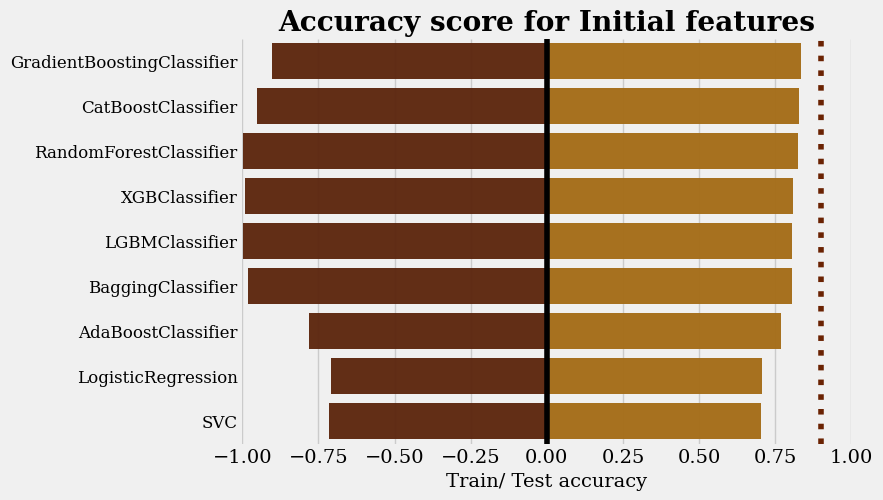

In [61]:
plotscoring(score_orgset,'Initial features',axvline=.9)

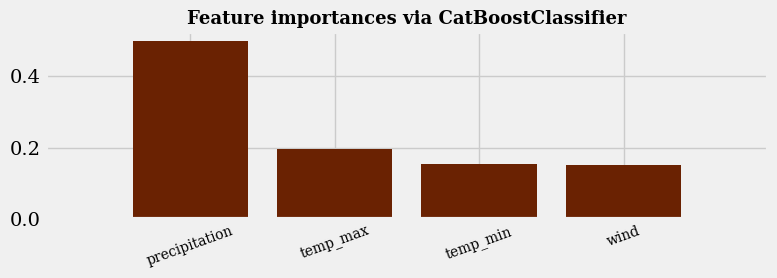

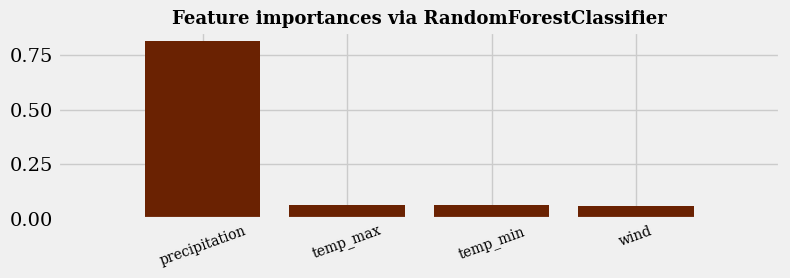

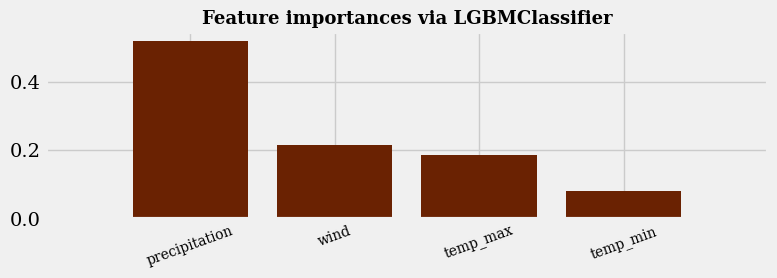

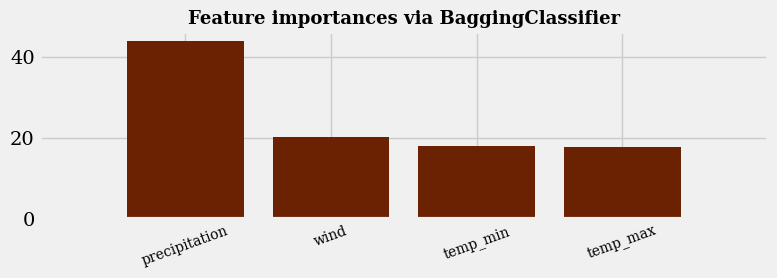

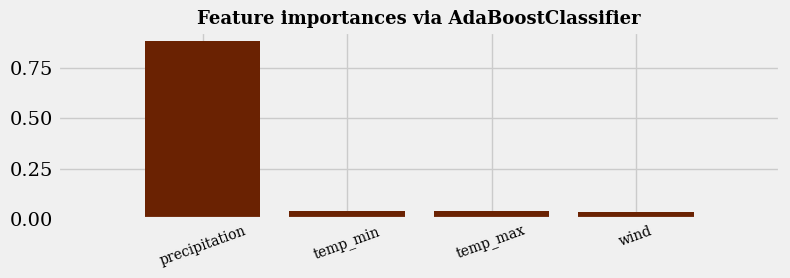

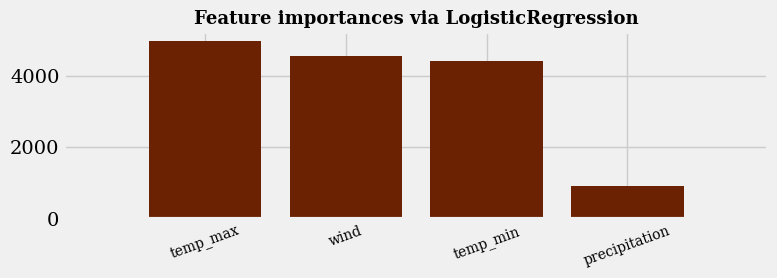

In [62]:
plotting_importances(score_orgset,imp_orgset,X[orgset],rotation=20)

In [63]:
score_pca,imp_pca=selectmoran(modellst,Xpca)

Learning rate set to 0.080097
0:	learn: 1.5091523	total: 4.5ms	remaining: 4.49s
1:	learn: 1.4259141	total: 9.31ms	remaining: 4.65s
2:	learn: 1.3617728	total: 14.3ms	remaining: 4.74s
3:	learn: 1.3038367	total: 18.6ms	remaining: 4.63s
4:	learn: 1.2548695	total: 24.1ms	remaining: 4.8s
5:	learn: 1.2103295	total: 29.2ms	remaining: 4.83s
6:	learn: 1.1742573	total: 33.5ms	remaining: 4.76s
7:	learn: 1.1404052	total: 38ms	remaining: 4.71s
8:	learn: 1.1112931	total: 43ms	remaining: 4.73s
9:	learn: 1.0836764	total: 48.7ms	remaining: 4.83s
10:	learn: 1.0623765	total: 53.9ms	remaining: 4.85s
11:	learn: 1.0409552	total: 58.4ms	remaining: 4.8s
12:	learn: 1.0211805	total: 63.9ms	remaining: 4.85s
13:	learn: 1.0047714	total: 68.9ms	remaining: 4.85s
14:	learn: 0.9888441	total: 74ms	remaining: 4.86s
15:	learn: 0.9747463	total: 78.3ms	remaining: 4.82s
16:	learn: 0.9610947	total: 82.9ms	remaining: 4.79s
17:	learn: 0.9458479	total: 88ms	remaining: 4.8s
18:	learn: 0.9332349	total: 92.3ms	remaining: 4.76s
19:	

160:	learn: 0.5707217	total: 813ms	remaining: 4.23s
161:	learn: 0.5700317	total: 818ms	remaining: 4.23s
162:	learn: 0.5691458	total: 822ms	remaining: 4.22s
163:	learn: 0.5680961	total: 827ms	remaining: 4.21s
164:	learn: 0.5671100	total: 832ms	remaining: 4.21s
165:	learn: 0.5657826	total: 837ms	remaining: 4.2s
166:	learn: 0.5651436	total: 841ms	remaining: 4.19s
167:	learn: 0.5638470	total: 844ms	remaining: 4.18s
168:	learn: 0.5624594	total: 848ms	remaining: 4.17s
169:	learn: 0.5613207	total: 853ms	remaining: 4.16s
170:	learn: 0.5602300	total: 857ms	remaining: 4.15s
171:	learn: 0.5597715	total: 861ms	remaining: 4.14s
172:	learn: 0.5586917	total: 865ms	remaining: 4.13s
173:	learn: 0.5575917	total: 868ms	remaining: 4.12s
174:	learn: 0.5560776	total: 872ms	remaining: 4.11s
175:	learn: 0.5548495	total: 876ms	remaining: 4.1s
176:	learn: 0.5536875	total: 880ms	remaining: 4.09s
177:	learn: 0.5526674	total: 884ms	remaining: 4.08s
178:	learn: 0.5518919	total: 888ms	remaining: 4.07s
179:	learn: 0.

345:	learn: 0.4148621	total: 1.63s	remaining: 3.08s
346:	learn: 0.4142125	total: 1.64s	remaining: 3.08s
347:	learn: 0.4135074	total: 1.64s	remaining: 3.08s
348:	learn: 0.4129941	total: 1.65s	remaining: 3.08s
349:	learn: 0.4120390	total: 1.66s	remaining: 3.08s
350:	learn: 0.4109294	total: 1.67s	remaining: 3.08s
351:	learn: 0.4105640	total: 1.67s	remaining: 3.08s
352:	learn: 0.4099966	total: 1.68s	remaining: 3.08s
353:	learn: 0.4091919	total: 1.68s	remaining: 3.07s
354:	learn: 0.4085999	total: 1.69s	remaining: 3.06s
355:	learn: 0.4078049	total: 1.69s	remaining: 3.06s
356:	learn: 0.4072848	total: 1.69s	remaining: 3.05s
357:	learn: 0.4067032	total: 1.7s	remaining: 3.04s
358:	learn: 0.4063582	total: 1.7s	remaining: 3.04s
359:	learn: 0.4058591	total: 1.71s	remaining: 3.03s
360:	learn: 0.4056271	total: 1.71s	remaining: 3.02s
361:	learn: 0.4051229	total: 1.71s	remaining: 3.02s
362:	learn: 0.4042858	total: 1.72s	remaining: 3.01s
363:	learn: 0.4038372	total: 1.72s	remaining: 3s
364:	learn: 0.402

544:	learn: 0.3114886	total: 2.43s	remaining: 2.03s
545:	learn: 0.3110883	total: 2.44s	remaining: 2.03s
546:	learn: 0.3107596	total: 2.44s	remaining: 2.02s
547:	learn: 0.3104094	total: 2.44s	remaining: 2.02s
548:	learn: 0.3100818	total: 2.45s	remaining: 2.01s
549:	learn: 0.3097703	total: 2.45s	remaining: 2.01s
550:	learn: 0.3091642	total: 2.46s	remaining: 2s
551:	learn: 0.3087213	total: 2.46s	remaining: 2s
552:	learn: 0.3083923	total: 2.46s	remaining: 1.99s
553:	learn: 0.3080338	total: 2.47s	remaining: 1.99s
554:	learn: 0.3075719	total: 2.47s	remaining: 1.98s
555:	learn: 0.3071937	total: 2.47s	remaining: 1.98s
556:	learn: 0.3068391	total: 2.48s	remaining: 1.97s
557:	learn: 0.3065744	total: 2.48s	remaining: 1.97s
558:	learn: 0.3058781	total: 2.48s	remaining: 1.96s
559:	learn: 0.3054428	total: 2.49s	remaining: 1.96s
560:	learn: 0.3050842	total: 2.49s	remaining: 1.95s
561:	learn: 0.3045672	total: 2.5s	remaining: 1.95s
562:	learn: 0.3041722	total: 2.5s	remaining: 1.94s
563:	learn: 0.303831

747:	learn: 0.2442239	total: 3.24s	remaining: 1.09s
748:	learn: 0.2436138	total: 3.25s	remaining: 1.09s
749:	learn: 0.2434342	total: 3.25s	remaining: 1.08s
750:	learn: 0.2429044	total: 3.26s	remaining: 1.08s
751:	learn: 0.2425344	total: 3.26s	remaining: 1.07s
752:	learn: 0.2422348	total: 3.26s	remaining: 1.07s
753:	learn: 0.2417857	total: 3.27s	remaining: 1.07s
754:	learn: 0.2413240	total: 3.27s	remaining: 1.06s
755:	learn: 0.2409596	total: 3.28s	remaining: 1.06s
756:	learn: 0.2407529	total: 3.28s	remaining: 1.05s
757:	learn: 0.2406193	total: 3.29s	remaining: 1.05s
758:	learn: 0.2404086	total: 3.29s	remaining: 1.04s
759:	learn: 0.2400669	total: 3.29s	remaining: 1.04s
760:	learn: 0.2397235	total: 3.3s	remaining: 1.03s
761:	learn: 0.2394691	total: 3.3s	remaining: 1.03s
762:	learn: 0.2393293	total: 3.31s	remaining: 1.03s
763:	learn: 0.2389926	total: 3.31s	remaining: 1.02s
764:	learn: 0.2387627	total: 3.31s	remaining: 1.02s
765:	learn: 0.2385229	total: 3.32s	remaining: 1.01s
766:	learn: 0.

935:	learn: 0.1986018	total: 4.04s	remaining: 276ms
936:	learn: 0.1983812	total: 4.04s	remaining: 272ms
937:	learn: 0.1981174	total: 4.04s	remaining: 267ms
938:	learn: 0.1979170	total: 4.05s	remaining: 263ms
939:	learn: 0.1976535	total: 4.05s	remaining: 259ms
940:	learn: 0.1974158	total: 4.06s	remaining: 255ms
941:	learn: 0.1972095	total: 4.06s	remaining: 250ms
942:	learn: 0.1970683	total: 4.07s	remaining: 246ms
943:	learn: 0.1968885	total: 4.07s	remaining: 242ms
944:	learn: 0.1967041	total: 4.08s	remaining: 237ms
945:	learn: 0.1963785	total: 4.08s	remaining: 233ms
946:	learn: 0.1962535	total: 4.08s	remaining: 229ms
947:	learn: 0.1959770	total: 4.09s	remaining: 224ms
948:	learn: 0.1958101	total: 4.09s	remaining: 220ms
949:	learn: 0.1955916	total: 4.1s	remaining: 216ms
950:	learn: 0.1954582	total: 4.1s	remaining: 211ms
951:	learn: 0.1952442	total: 4.11s	remaining: 207ms
952:	learn: 0.1949224	total: 4.11s	remaining: 203ms
953:	learn: 0.1947410	total: 4.11s	remaining: 198ms
954:	learn: 0.

124:	learn: 0.6260161	total: 509ms	remaining: 3.56s
125:	learn: 0.6249122	total: 513ms	remaining: 3.56s
126:	learn: 0.6231433	total: 517ms	remaining: 3.55s
127:	learn: 0.6218741	total: 521ms	remaining: 3.55s
128:	learn: 0.6198142	total: 525ms	remaining: 3.54s
129:	learn: 0.6180165	total: 528ms	remaining: 3.53s
130:	learn: 0.6162124	total: 532ms	remaining: 3.53s
131:	learn: 0.6146384	total: 536ms	remaining: 3.52s
132:	learn: 0.6130804	total: 540ms	remaining: 3.52s
133:	learn: 0.6112165	total: 544ms	remaining: 3.51s
134:	learn: 0.6098046	total: 547ms	remaining: 3.51s
135:	learn: 0.6083383	total: 551ms	remaining: 3.5s
136:	learn: 0.6071784	total: 555ms	remaining: 3.5s
137:	learn: 0.6056955	total: 559ms	remaining: 3.49s
138:	learn: 0.6048000	total: 563ms	remaining: 3.48s
139:	learn: 0.6037946	total: 566ms	remaining: 3.48s
140:	learn: 0.6023403	total: 570ms	remaining: 3.47s
141:	learn: 0.6010621	total: 573ms	remaining: 3.46s
142:	learn: 0.5991739	total: 577ms	remaining: 3.46s
143:	learn: 0.

328:	learn: 0.4291874	total: 1.33s	remaining: 2.71s
329:	learn: 0.4284596	total: 1.33s	remaining: 2.71s
330:	learn: 0.4277064	total: 1.34s	remaining: 2.7s
331:	learn: 0.4271797	total: 1.34s	remaining: 2.7s
332:	learn: 0.4259883	total: 1.35s	remaining: 2.7s
333:	learn: 0.4252722	total: 1.35s	remaining: 2.7s
334:	learn: 0.4244758	total: 1.36s	remaining: 2.7s
335:	learn: 0.4237725	total: 1.36s	remaining: 2.69s
336:	learn: 0.4229189	total: 1.37s	remaining: 2.69s
337:	learn: 0.4223145	total: 1.37s	remaining: 2.69s
338:	learn: 0.4215856	total: 1.38s	remaining: 2.69s
339:	learn: 0.4210306	total: 1.38s	remaining: 2.68s
340:	learn: 0.4204082	total: 1.39s	remaining: 2.68s
341:	learn: 0.4197153	total: 1.39s	remaining: 2.68s
342:	learn: 0.4190944	total: 1.4s	remaining: 2.67s
343:	learn: 0.4179590	total: 1.4s	remaining: 2.67s
344:	learn: 0.4171892	total: 1.4s	remaining: 2.67s
345:	learn: 0.4166577	total: 1.41s	remaining: 2.66s
346:	learn: 0.4161495	total: 1.41s	remaining: 2.66s
347:	learn: 0.415589

524:	learn: 0.3221129	total: 2.15s	remaining: 1.94s
525:	learn: 0.3217399	total: 2.15s	remaining: 1.94s
526:	learn: 0.3213205	total: 2.15s	remaining: 1.93s
527:	learn: 0.3210246	total: 2.16s	remaining: 1.93s
528:	learn: 0.3206897	total: 2.16s	remaining: 1.92s
529:	learn: 0.3202822	total: 2.16s	remaining: 1.92s
530:	learn: 0.3198792	total: 2.17s	remaining: 1.91s
531:	learn: 0.3196585	total: 2.17s	remaining: 1.91s
532:	learn: 0.3192867	total: 2.18s	remaining: 1.91s
533:	learn: 0.3190316	total: 2.18s	remaining: 1.9s
534:	learn: 0.3186452	total: 2.18s	remaining: 1.9s
535:	learn: 0.3183056	total: 2.19s	remaining: 1.89s
536:	learn: 0.3178950	total: 2.19s	remaining: 1.89s
537:	learn: 0.3176596	total: 2.19s	remaining: 1.88s
538:	learn: 0.3171331	total: 2.2s	remaining: 1.88s
539:	learn: 0.3165884	total: 2.2s	remaining: 1.87s
540:	learn: 0.3163427	total: 2.21s	remaining: 1.87s
541:	learn: 0.3157587	total: 2.21s	remaining: 1.87s
542:	learn: 0.3151256	total: 2.21s	remaining: 1.86s
543:	learn: 0.31

683:	learn: 0.2642201	total: 2.77s	remaining: 1.28s
684:	learn: 0.2639909	total: 2.77s	remaining: 1.27s
685:	learn: 0.2635997	total: 2.78s	remaining: 1.27s
686:	learn: 0.2632087	total: 2.78s	remaining: 1.27s
687:	learn: 0.2630584	total: 2.78s	remaining: 1.26s
688:	learn: 0.2626887	total: 2.79s	remaining: 1.26s
689:	learn: 0.2622286	total: 2.79s	remaining: 1.25s
690:	learn: 0.2619237	total: 2.8s	remaining: 1.25s
691:	learn: 0.2617091	total: 2.8s	remaining: 1.25s
692:	learn: 0.2615355	total: 2.8s	remaining: 1.24s
693:	learn: 0.2611518	total: 2.81s	remaining: 1.24s
694:	learn: 0.2609022	total: 2.81s	remaining: 1.23s
695:	learn: 0.2605444	total: 2.82s	remaining: 1.23s
696:	learn: 0.2601364	total: 2.82s	remaining: 1.23s
697:	learn: 0.2598971	total: 2.83s	remaining: 1.22s
698:	learn: 0.2595851	total: 2.83s	remaining: 1.22s
699:	learn: 0.2591530	total: 2.83s	remaining: 1.21s
700:	learn: 0.2589601	total: 2.84s	remaining: 1.21s
701:	learn: 0.2587327	total: 2.84s	remaining: 1.21s
702:	learn: 0.2

886:	learn: 0.2110157	total: 3.58s	remaining: 457ms
887:	learn: 0.2108851	total: 3.59s	remaining: 453ms
888:	learn: 0.2106568	total: 3.6s	remaining: 449ms
889:	learn: 0.2104095	total: 3.6s	remaining: 445ms
890:	learn: 0.2101905	total: 3.6s	remaining: 441ms
891:	learn: 0.2099262	total: 3.61s	remaining: 437ms
892:	learn: 0.2096942	total: 3.61s	remaining: 433ms
893:	learn: 0.2094112	total: 3.62s	remaining: 429ms
894:	learn: 0.2091099	total: 3.62s	remaining: 425ms
895:	learn: 0.2088289	total: 3.62s	remaining: 421ms
896:	learn: 0.2086086	total: 3.63s	remaining: 417ms
897:	learn: 0.2083689	total: 3.63s	remaining: 412ms
898:	learn: 0.2081940	total: 3.63s	remaining: 408ms
899:	learn: 0.2080172	total: 3.64s	remaining: 404ms
900:	learn: 0.2077102	total: 3.64s	remaining: 400ms
901:	learn: 0.2074340	total: 3.65s	remaining: 396ms
902:	learn: 0.2072025	total: 3.65s	remaining: 392ms
903:	learn: 0.2070071	total: 3.65s	remaining: 388ms
904:	learn: 0.2067708	total: 3.66s	remaining: 384ms
905:	learn: 0.2

66:	learn: 0.7284289	total: 309ms	remaining: 4.31s
67:	learn: 0.7253405	total: 314ms	remaining: 4.3s
68:	learn: 0.7228392	total: 318ms	remaining: 4.29s
69:	learn: 0.7206861	total: 322ms	remaining: 4.27s
70:	learn: 0.7192337	total: 326ms	remaining: 4.26s
71:	learn: 0.7169908	total: 329ms	remaining: 4.25s
72:	learn: 0.7152073	total: 333ms	remaining: 4.23s
73:	learn: 0.7127529	total: 337ms	remaining: 4.22s
74:	learn: 0.7107056	total: 341ms	remaining: 4.2s
75:	learn: 0.7094223	total: 345ms	remaining: 4.2s
76:	learn: 0.7073166	total: 349ms	remaining: 4.18s
77:	learn: 0.7051414	total: 353ms	remaining: 4.17s
78:	learn: 0.7037796	total: 357ms	remaining: 4.16s
79:	learn: 0.7018265	total: 361ms	remaining: 4.15s
80:	learn: 0.6995104	total: 365ms	remaining: 4.14s
81:	learn: 0.6979279	total: 369ms	remaining: 4.13s
82:	learn: 0.6963598	total: 373ms	remaining: 4.12s
83:	learn: 0.6951009	total: 377ms	remaining: 4.11s
84:	learn: 0.6929540	total: 381ms	remaining: 4.11s
85:	learn: 0.6914771	total: 386ms	

263:	learn: 0.4805057	total: 1.1s	remaining: 3.06s
264:	learn: 0.4796511	total: 1.11s	remaining: 3.07s
265:	learn: 0.4787697	total: 1.11s	remaining: 3.06s
266:	learn: 0.4775635	total: 1.11s	remaining: 3.06s
267:	learn: 0.4767965	total: 1.12s	remaining: 3.06s
268:	learn: 0.4760785	total: 1.12s	remaining: 3.05s
269:	learn: 0.4753616	total: 1.13s	remaining: 3.05s
270:	learn: 0.4744505	total: 1.13s	remaining: 3.04s
271:	learn: 0.4736583	total: 1.14s	remaining: 3.04s
272:	learn: 0.4727751	total: 1.14s	remaining: 3.04s
273:	learn: 0.4715782	total: 1.15s	remaining: 3.04s
274:	learn: 0.4708605	total: 1.15s	remaining: 3.03s
275:	learn: 0.4702582	total: 1.15s	remaining: 3.03s
276:	learn: 0.4698122	total: 1.16s	remaining: 3.02s
277:	learn: 0.4693007	total: 1.16s	remaining: 3.02s
278:	learn: 0.4684038	total: 1.17s	remaining: 3.01s
279:	learn: 0.4676776	total: 1.17s	remaining: 3.01s
280:	learn: 0.4666687	total: 1.17s	remaining: 3s
281:	learn: 0.4662671	total: 1.18s	remaining: 3s
282:	learn: 0.46505

466:	learn: 0.3477991	total: 1.91s	remaining: 2.18s
467:	learn: 0.3473560	total: 1.92s	remaining: 2.18s
468:	learn: 0.3469072	total: 1.92s	remaining: 2.18s
469:	learn: 0.3465891	total: 1.93s	remaining: 2.17s
470:	learn: 0.3459488	total: 1.93s	remaining: 2.17s
471:	learn: 0.3454683	total: 1.94s	remaining: 2.17s
472:	learn: 0.3451630	total: 1.94s	remaining: 2.17s
473:	learn: 0.3446897	total: 1.95s	remaining: 2.16s
474:	learn: 0.3442176	total: 1.95s	remaining: 2.16s
475:	learn: 0.3437102	total: 1.96s	remaining: 2.16s
476:	learn: 0.3433569	total: 1.97s	remaining: 2.16s
477:	learn: 0.3427168	total: 1.97s	remaining: 2.15s
478:	learn: 0.3424971	total: 1.98s	remaining: 2.15s
479:	learn: 0.3421416	total: 1.98s	remaining: 2.15s
480:	learn: 0.3417637	total: 1.99s	remaining: 2.15s
481:	learn: 0.3413699	total: 1.99s	remaining: 2.14s
482:	learn: 0.3406136	total: 2s	remaining: 2.14s
483:	learn: 0.3401382	total: 2s	remaining: 2.14s
484:	learn: 0.3396387	total: 2.01s	remaining: 2.13s
485:	learn: 0.3391

637:	learn: 0.2789175	total: 2.76s	remaining: 1.56s
638:	learn: 0.2787070	total: 2.76s	remaining: 1.56s
639:	learn: 0.2784588	total: 2.76s	remaining: 1.55s
640:	learn: 0.2780488	total: 2.77s	remaining: 1.55s
641:	learn: 0.2778026	total: 2.77s	remaining: 1.54s
642:	learn: 0.2775282	total: 2.78s	remaining: 1.54s
643:	learn: 0.2771560	total: 2.78s	remaining: 1.54s
644:	learn: 0.2767332	total: 2.78s	remaining: 1.53s
645:	learn: 0.2763846	total: 2.79s	remaining: 1.53s
646:	learn: 0.2761058	total: 2.79s	remaining: 1.52s
647:	learn: 0.2756951	total: 2.8s	remaining: 1.52s
648:	learn: 0.2752818	total: 2.8s	remaining: 1.51s
649:	learn: 0.2750581	total: 2.8s	remaining: 1.51s
650:	learn: 0.2747810	total: 2.81s	remaining: 1.5s
651:	learn: 0.2744995	total: 2.81s	remaining: 1.5s
652:	learn: 0.2741726	total: 2.81s	remaining: 1.5s
653:	learn: 0.2736307	total: 2.82s	remaining: 1.49s
654:	learn: 0.2733159	total: 2.82s	remaining: 1.49s
655:	learn: 0.2729300	total: 2.83s	remaining: 1.48s
656:	learn: 0.2727

797:	learn: 0.2298287	total: 3.38s	remaining: 854ms
798:	learn: 0.2295806	total: 3.38s	remaining: 850ms
799:	learn: 0.2293594	total: 3.38s	remaining: 846ms
800:	learn: 0.2290957	total: 3.39s	remaining: 842ms
801:	learn: 0.2289353	total: 3.39s	remaining: 837ms
802:	learn: 0.2286167	total: 3.4s	remaining: 833ms
803:	learn: 0.2283333	total: 3.4s	remaining: 829ms
804:	learn: 0.2281764	total: 3.4s	remaining: 825ms
805:	learn: 0.2279042	total: 3.41s	remaining: 821ms
806:	learn: 0.2277050	total: 3.41s	remaining: 816ms
807:	learn: 0.2275894	total: 3.42s	remaining: 812ms
808:	learn: 0.2272675	total: 3.42s	remaining: 808ms
809:	learn: 0.2269844	total: 3.42s	remaining: 803ms
810:	learn: 0.2267359	total: 3.43s	remaining: 799ms
811:	learn: 0.2264544	total: 3.43s	remaining: 795ms
812:	learn: 0.2262901	total: 3.44s	remaining: 790ms
813:	learn: 0.2258882	total: 3.44s	remaining: 786ms
814:	learn: 0.2255883	total: 3.44s	remaining: 782ms
815:	learn: 0.2253570	total: 3.45s	remaining: 777ms
816:	learn: 0.2

957:	learn: 0.1948691	total: 3.99s	remaining: 175ms
958:	learn: 0.1947024	total: 3.99s	remaining: 171ms
959:	learn: 0.1944643	total: 4s	remaining: 167ms
960:	learn: 0.1942580	total: 4s	remaining: 162ms
961:	learn: 0.1941509	total: 4.01s	remaining: 158ms
962:	learn: 0.1940123	total: 4.01s	remaining: 154ms
963:	learn: 0.1938390	total: 4.02s	remaining: 150ms
964:	learn: 0.1937052	total: 4.02s	remaining: 146ms
965:	learn: 0.1934874	total: 4.03s	remaining: 142ms
966:	learn: 0.1933003	total: 4.03s	remaining: 138ms
967:	learn: 0.1930813	total: 4.03s	remaining: 133ms
968:	learn: 0.1928925	total: 4.04s	remaining: 129ms
969:	learn: 0.1926722	total: 4.04s	remaining: 125ms
970:	learn: 0.1924784	total: 4.05s	remaining: 121ms
971:	learn: 0.1922947	total: 4.05s	remaining: 117ms
972:	learn: 0.1920838	total: 4.06s	remaining: 113ms
973:	learn: 0.1918975	total: 4.06s	remaining: 108ms
974:	learn: 0.1917770	total: 4.07s	remaining: 104ms
975:	learn: 0.1915337	total: 4.07s	remaining: 100ms
976:	learn: 0.1913

141:	learn: 0.5869152	total: 605ms	remaining: 3.66s
142:	learn: 0.5861567	total: 611ms	remaining: 3.66s
143:	learn: 0.5853032	total: 615ms	remaining: 3.66s
144:	learn: 0.5841232	total: 620ms	remaining: 3.65s
145:	learn: 0.5825120	total: 624ms	remaining: 3.65s
146:	learn: 0.5808413	total: 628ms	remaining: 3.64s
147:	learn: 0.5797393	total: 631ms	remaining: 3.63s
148:	learn: 0.5791439	total: 635ms	remaining: 3.63s
149:	learn: 0.5776518	total: 639ms	remaining: 3.62s
150:	learn: 0.5759072	total: 643ms	remaining: 3.61s
151:	learn: 0.5741575	total: 647ms	remaining: 3.61s
152:	learn: 0.5726671	total: 650ms	remaining: 3.6s
153:	learn: 0.5713469	total: 654ms	remaining: 3.59s
154:	learn: 0.5699207	total: 658ms	remaining: 3.59s
155:	learn: 0.5682831	total: 662ms	remaining: 3.58s
156:	learn: 0.5676318	total: 666ms	remaining: 3.57s
157:	learn: 0.5656349	total: 669ms	remaining: 3.57s
158:	learn: 0.5647970	total: 674ms	remaining: 3.56s
159:	learn: 0.5636904	total: 677ms	remaining: 3.56s
160:	learn: 0

341:	learn: 0.4094460	total: 1.4s	remaining: 2.7s
342:	learn: 0.4088290	total: 1.41s	remaining: 2.7s
343:	learn: 0.4082701	total: 1.41s	remaining: 2.69s
344:	learn: 0.4075015	total: 1.42s	remaining: 2.69s
345:	learn: 0.4065847	total: 1.42s	remaining: 2.68s
346:	learn: 0.4062650	total: 1.42s	remaining: 2.68s
347:	learn: 0.4052023	total: 1.43s	remaining: 2.67s
348:	learn: 0.4046113	total: 1.43s	remaining: 2.67s
349:	learn: 0.4041801	total: 1.44s	remaining: 2.67s
350:	learn: 0.4040625	total: 1.44s	remaining: 2.66s
351:	learn: 0.4030690	total: 1.44s	remaining: 2.66s
352:	learn: 0.4024364	total: 1.45s	remaining: 2.65s
353:	learn: 0.4016937	total: 1.45s	remaining: 2.65s
354:	learn: 0.4010590	total: 1.46s	remaining: 2.65s
355:	learn: 0.4001289	total: 1.46s	remaining: 2.64s
356:	learn: 0.3989278	total: 1.46s	remaining: 2.64s
357:	learn: 0.3982429	total: 1.47s	remaining: 2.63s
358:	learn: 0.3977212	total: 1.47s	remaining: 2.63s
359:	learn: 0.3972794	total: 1.48s	remaining: 2.62s
360:	learn: 0.3

546:	learn: 0.3056788	total: 2.23s	remaining: 1.85s
547:	learn: 0.3052116	total: 2.24s	remaining: 1.85s
548:	learn: 0.3047402	total: 2.24s	remaining: 1.84s
549:	learn: 0.3044811	total: 2.25s	remaining: 1.84s
550:	learn: 0.3042046	total: 2.25s	remaining: 1.83s
551:	learn: 0.3036256	total: 2.26s	remaining: 1.83s
552:	learn: 0.3032493	total: 2.26s	remaining: 1.83s
553:	learn: 0.3028294	total: 2.27s	remaining: 1.82s
554:	learn: 0.3024051	total: 2.27s	remaining: 1.82s
555:	learn: 0.3020834	total: 2.27s	remaining: 1.82s
556:	learn: 0.3016928	total: 2.28s	remaining: 1.81s
557:	learn: 0.3012512	total: 2.28s	remaining: 1.81s
558:	learn: 0.3008667	total: 2.29s	remaining: 1.8s
559:	learn: 0.3005422	total: 2.29s	remaining: 1.8s
560:	learn: 0.3002141	total: 2.3s	remaining: 1.8s
561:	learn: 0.2999275	total: 2.3s	remaining: 1.79s
562:	learn: 0.2994072	total: 2.3s	remaining: 1.79s
563:	learn: 0.2988056	total: 2.31s	remaining: 1.78s
564:	learn: 0.2985236	total: 2.31s	remaining: 1.78s
565:	learn: 0.2981

735:	learn: 0.2420615	total: 3.03s	remaining: 1.09s
736:	learn: 0.2418250	total: 3.04s	remaining: 1.08s
737:	learn: 0.2414918	total: 3.04s	remaining: 1.08s
738:	learn: 0.2412496	total: 3.05s	remaining: 1.07s
739:	learn: 0.2410424	total: 3.05s	remaining: 1.07s
740:	learn: 0.2407506	total: 3.05s	remaining: 1.07s
741:	learn: 0.2405706	total: 3.06s	remaining: 1.06s
742:	learn: 0.2403155	total: 3.06s	remaining: 1.06s
743:	learn: 0.2400969	total: 3.06s	remaining: 1.05s
744:	learn: 0.2399289	total: 3.07s	remaining: 1.05s
745:	learn: 0.2397186	total: 3.07s	remaining: 1.05s
746:	learn: 0.2396260	total: 3.08s	remaining: 1.04s
747:	learn: 0.2394111	total: 3.08s	remaining: 1.04s
748:	learn: 0.2391008	total: 3.08s	remaining: 1.03s
749:	learn: 0.2389455	total: 3.09s	remaining: 1.03s
750:	learn: 0.2387393	total: 3.09s	remaining: 1.02s
751:	learn: 0.2385603	total: 3.1s	remaining: 1.02s
752:	learn: 0.2382552	total: 3.1s	remaining: 1.02s
753:	learn: 0.2379895	total: 3.1s	remaining: 1.01s
754:	learn: 0.2

904:	learn: 0.2015757	total: 3.84s	remaining: 403ms
905:	learn: 0.2013385	total: 3.84s	remaining: 399ms
906:	learn: 0.2011549	total: 3.85s	remaining: 394ms
907:	learn: 0.2009812	total: 3.85s	remaining: 390ms
908:	learn: 0.2008659	total: 3.85s	remaining: 386ms
909:	learn: 0.2006238	total: 3.86s	remaining: 381ms
910:	learn: 0.2004266	total: 3.86s	remaining: 377ms
911:	learn: 0.2002906	total: 3.86s	remaining: 373ms
912:	learn: 0.1999904	total: 3.87s	remaining: 369ms
913:	learn: 0.1997912	total: 3.87s	remaining: 364ms
914:	learn: 0.1996165	total: 3.88s	remaining: 360ms
915:	learn: 0.1991898	total: 3.88s	remaining: 356ms
916:	learn: 0.1990375	total: 3.88s	remaining: 352ms
917:	learn: 0.1988594	total: 3.89s	remaining: 347ms
918:	learn: 0.1985510	total: 3.89s	remaining: 343ms
919:	learn: 0.1983697	total: 3.9s	remaining: 339ms
920:	learn: 0.1982036	total: 3.9s	remaining: 334ms
921:	learn: 0.1980114	total: 3.9s	remaining: 330ms
922:	learn: 0.1977861	total: 3.91s	remaining: 326ms
923:	learn: 0.1

72:	learn: 0.6943713	total: 405ms	remaining: 5.14s
73:	learn: 0.6925544	total: 411ms	remaining: 5.14s
74:	learn: 0.6903733	total: 415ms	remaining: 5.12s
75:	learn: 0.6891017	total: 422ms	remaining: 5.13s
76:	learn: 0.6875398	total: 427ms	remaining: 5.12s
77:	learn: 0.6862577	total: 432ms	remaining: 5.11s
78:	learn: 0.6847060	total: 438ms	remaining: 5.11s
79:	learn: 0.6829460	total: 443ms	remaining: 5.09s
80:	learn: 0.6800408	total: 448ms	remaining: 5.09s
81:	learn: 0.6785219	total: 454ms	remaining: 5.08s
82:	learn: 0.6769947	total: 459ms	remaining: 5.07s
83:	learn: 0.6750802	total: 465ms	remaining: 5.08s
84:	learn: 0.6734974	total: 471ms	remaining: 5.07s
85:	learn: 0.6721807	total: 475ms	remaining: 5.05s
86:	learn: 0.6707106	total: 480ms	remaining: 5.04s
87:	learn: 0.6688414	total: 485ms	remaining: 5.02s
88:	learn: 0.6661831	total: 489ms	remaining: 5s
89:	learn: 0.6648738	total: 493ms	remaining: 4.99s
90:	learn: 0.6633428	total: 497ms	remaining: 4.96s
91:	learn: 0.6615917	total: 504ms	

259:	learn: 0.4686319	total: 1.2s	remaining: 3.4s
260:	learn: 0.4683076	total: 1.2s	remaining: 3.4s
261:	learn: 0.4676581	total: 1.2s	remaining: 3.39s
262:	learn: 0.4669838	total: 1.21s	remaining: 3.38s
263:	learn: 0.4663076	total: 1.21s	remaining: 3.38s
264:	learn: 0.4658191	total: 1.22s	remaining: 3.37s
265:	learn: 0.4650509	total: 1.22s	remaining: 3.37s
266:	learn: 0.4641492	total: 1.22s	remaining: 3.36s
267:	learn: 0.4636649	total: 1.23s	remaining: 3.35s
268:	learn: 0.4626783	total: 1.23s	remaining: 3.34s
269:	learn: 0.4618827	total: 1.23s	remaining: 3.34s
270:	learn: 0.4608600	total: 1.24s	remaining: 3.33s
271:	learn: 0.4600258	total: 1.24s	remaining: 3.32s
272:	learn: 0.4591640	total: 1.25s	remaining: 3.31s
273:	learn: 0.4579725	total: 1.25s	remaining: 3.31s
274:	learn: 0.4570225	total: 1.25s	remaining: 3.3s
275:	learn: 0.4564122	total: 1.26s	remaining: 3.29s
276:	learn: 0.4556549	total: 1.26s	remaining: 3.29s
277:	learn: 0.4549652	total: 1.26s	remaining: 3.28s
278:	learn: 0.4544

455:	learn: 0.3426870	total: 2.03s	remaining: 2.42s
456:	learn: 0.3422989	total: 2.03s	remaining: 2.42s
457:	learn: 0.3420625	total: 2.04s	remaining: 2.41s
458:	learn: 0.3414116	total: 2.04s	remaining: 2.4s
459:	learn: 0.3409512	total: 2.04s	remaining: 2.4s
460:	learn: 0.3402028	total: 2.05s	remaining: 2.39s
461:	learn: 0.3398703	total: 2.05s	remaining: 2.39s
462:	learn: 0.3394965	total: 2.06s	remaining: 2.38s
463:	learn: 0.3388804	total: 2.06s	remaining: 2.38s
464:	learn: 0.3383211	total: 2.06s	remaining: 2.37s
465:	learn: 0.3374602	total: 2.07s	remaining: 2.37s
466:	learn: 0.3370072	total: 2.07s	remaining: 2.36s
467:	learn: 0.3365078	total: 2.08s	remaining: 2.36s
468:	learn: 0.3361183	total: 2.08s	remaining: 2.35s
469:	learn: 0.3356029	total: 2.08s	remaining: 2.35s
470:	learn: 0.3352250	total: 2.09s	remaining: 2.34s
471:	learn: 0.3349119	total: 2.09s	remaining: 2.34s
472:	learn: 0.3347634	total: 2.09s	remaining: 2.33s
473:	learn: 0.3343505	total: 2.1s	remaining: 2.33s
474:	learn: 0.3

614:	learn: 0.2757549	total: 2.65s	remaining: 1.66s
615:	learn: 0.2751426	total: 2.65s	remaining: 1.65s
616:	learn: 0.2746029	total: 2.66s	remaining: 1.65s
617:	learn: 0.2741582	total: 2.66s	remaining: 1.64s
618:	learn: 0.2737936	total: 2.66s	remaining: 1.64s
619:	learn: 0.2733291	total: 2.67s	remaining: 1.64s
620:	learn: 0.2731169	total: 2.67s	remaining: 1.63s
621:	learn: 0.2728072	total: 2.68s	remaining: 1.63s
622:	learn: 0.2724586	total: 2.68s	remaining: 1.62s
623:	learn: 0.2720874	total: 2.68s	remaining: 1.62s
624:	learn: 0.2718064	total: 2.69s	remaining: 1.61s
625:	learn: 0.2715889	total: 2.69s	remaining: 1.61s
626:	learn: 0.2712850	total: 2.7s	remaining: 1.6s
627:	learn: 0.2707916	total: 2.7s	remaining: 1.6s
628:	learn: 0.2703746	total: 2.7s	remaining: 1.59s
629:	learn: 0.2701492	total: 2.71s	remaining: 1.59s
630:	learn: 0.2698847	total: 2.71s	remaining: 1.58s
631:	learn: 0.2695000	total: 2.71s	remaining: 1.58s
632:	learn: 0.2690935	total: 2.72s	remaining: 1.58s
633:	learn: 0.268

822:	learn: 0.2168943	total: 3.45s	remaining: 742ms
823:	learn: 0.2166837	total: 3.45s	remaining: 738ms
824:	learn: 0.2163439	total: 3.46s	remaining: 733ms
825:	learn: 0.2160650	total: 3.46s	remaining: 729ms
826:	learn: 0.2157721	total: 3.46s	remaining: 725ms
827:	learn: 0.2155393	total: 3.47s	remaining: 721ms
828:	learn: 0.2151057	total: 3.47s	remaining: 717ms
829:	learn: 0.2147350	total: 3.48s	remaining: 712ms
830:	learn: 0.2145188	total: 3.48s	remaining: 708ms
831:	learn: 0.2143251	total: 3.49s	remaining: 704ms
832:	learn: 0.2141418	total: 3.49s	remaining: 700ms
833:	learn: 0.2139949	total: 3.49s	remaining: 695ms
834:	learn: 0.2136963	total: 3.5s	remaining: 691ms
835:	learn: 0.2135562	total: 3.5s	remaining: 687ms
836:	learn: 0.2134287	total: 3.5s	remaining: 683ms
837:	learn: 0.2132600	total: 3.51s	remaining: 678ms
838:	learn: 0.2129841	total: 3.51s	remaining: 674ms
839:	learn: 0.2127993	total: 3.52s	remaining: 670ms
840:	learn: 0.2125273	total: 3.52s	remaining: 666ms
841:	learn: 0.2

Learning rate set to 0.0801
0:	learn: 1.5127033	total: 16.9ms	remaining: 16.9s
1:	learn: 1.4330744	total: 25.3ms	remaining: 12.6s
2:	learn: 1.3698586	total: 33ms	remaining: 11s
3:	learn: 1.3129541	total: 40.7ms	remaining: 10.1s
4:	learn: 1.2643299	total: 48.3ms	remaining: 9.62s
5:	learn: 1.2178207	total: 55.4ms	remaining: 9.18s
6:	learn: 1.1801384	total: 61.7ms	remaining: 8.76s
7:	learn: 1.1456567	total: 67.8ms	remaining: 8.4s
8:	learn: 1.1183335	total: 73.8ms	remaining: 8.13s
9:	learn: 1.0916098	total: 81.1ms	remaining: 8.03s
10:	learn: 1.0695709	total: 87.6ms	remaining: 7.88s
11:	learn: 1.0479225	total: 94.8ms	remaining: 7.8s
12:	learn: 1.0300109	total: 101ms	remaining: 7.67s
13:	learn: 1.0133807	total: 107ms	remaining: 7.54s
14:	learn: 0.9977424	total: 113ms	remaining: 7.42s
15:	learn: 0.9836266	total: 118ms	remaining: 7.23s
16:	learn: 0.9697008	total: 121ms	remaining: 7.02s
17:	learn: 0.9567044	total: 126ms	remaining: 6.88s
18:	learn: 0.9429639	total: 130ms	remaining: 6.72s
19:	lea

190:	learn: 0.5415989	total: 801ms	remaining: 3.39s
191:	learn: 0.5410415	total: 806ms	remaining: 3.39s
192:	learn: 0.5400957	total: 810ms	remaining: 3.38s
193:	learn: 0.5382350	total: 813ms	remaining: 3.38s
194:	learn: 0.5374727	total: 817ms	remaining: 3.37s
195:	learn: 0.5364672	total: 820ms	remaining: 3.36s
196:	learn: 0.5355987	total: 824ms	remaining: 3.36s
197:	learn: 0.5349871	total: 829ms	remaining: 3.36s
198:	learn: 0.5338143	total: 833ms	remaining: 3.35s
199:	learn: 0.5328152	total: 836ms	remaining: 3.35s
200:	learn: 0.5308043	total: 840ms	remaining: 3.34s
201:	learn: 0.5303095	total: 845ms	remaining: 3.34s
202:	learn: 0.5290347	total: 849ms	remaining: 3.33s
203:	learn: 0.5278600	total: 854ms	remaining: 3.33s
204:	learn: 0.5269961	total: 858ms	remaining: 3.33s
205:	learn: 0.5257360	total: 862ms	remaining: 3.32s
206:	learn: 0.5248477	total: 866ms	remaining: 3.32s
207:	learn: 0.5241120	total: 870ms	remaining: 3.31s
208:	learn: 0.5232617	total: 874ms	remaining: 3.31s
209:	learn: 

389:	learn: 0.3860416	total: 1.61s	remaining: 2.51s
390:	learn: 0.3853200	total: 1.61s	remaining: 2.51s
391:	learn: 0.3847234	total: 1.62s	remaining: 2.51s
392:	learn: 0.3839561	total: 1.62s	remaining: 2.5s
393:	learn: 0.3836384	total: 1.63s	remaining: 2.5s
394:	learn: 0.3831232	total: 1.63s	remaining: 2.5s
395:	learn: 0.3824975	total: 1.64s	remaining: 2.5s
396:	learn: 0.3818876	total: 1.64s	remaining: 2.49s
397:	learn: 0.3813227	total: 1.65s	remaining: 2.49s
398:	learn: 0.3805755	total: 1.65s	remaining: 2.49s
399:	learn: 0.3802063	total: 1.66s	remaining: 2.49s
400:	learn: 0.3794953	total: 1.67s	remaining: 2.49s
401:	learn: 0.3788869	total: 1.67s	remaining: 2.48s
402:	learn: 0.3779269	total: 1.68s	remaining: 2.48s
403:	learn: 0.3775443	total: 1.68s	remaining: 2.48s
404:	learn: 0.3765663	total: 1.69s	remaining: 2.49s
405:	learn: 0.3761544	total: 1.7s	remaining: 2.49s
406:	learn: 0.3754421	total: 1.71s	remaining: 2.49s
407:	learn: 0.3749616	total: 1.71s	remaining: 2.48s
408:	learn: 0.374

583:	learn: 0.2950810	total: 2.61s	remaining: 1.86s
584:	learn: 0.2947823	total: 2.62s	remaining: 1.86s
585:	learn: 0.2943187	total: 2.62s	remaining: 1.85s
586:	learn: 0.2941269	total: 2.63s	remaining: 1.85s
587:	learn: 0.2936677	total: 2.64s	remaining: 1.85s
588:	learn: 0.2934494	total: 2.64s	remaining: 1.84s
589:	learn: 0.2932726	total: 2.65s	remaining: 1.84s
590:	learn: 0.2929687	total: 2.66s	remaining: 1.84s
591:	learn: 0.2925942	total: 2.67s	remaining: 1.84s
592:	learn: 0.2924571	total: 2.67s	remaining: 1.83s
593:	learn: 0.2920833	total: 2.68s	remaining: 1.83s
594:	learn: 0.2916964	total: 2.69s	remaining: 1.83s
595:	learn: 0.2911961	total: 2.69s	remaining: 1.83s
596:	learn: 0.2909630	total: 2.7s	remaining: 1.82s
597:	learn: 0.2903597	total: 2.71s	remaining: 1.82s
598:	learn: 0.2901350	total: 2.71s	remaining: 1.82s
599:	learn: 0.2897910	total: 2.72s	remaining: 1.81s
600:	learn: 0.2894791	total: 2.73s	remaining: 1.81s
601:	learn: 0.2891001	total: 2.74s	remaining: 1.81s
602:	learn: 0

783:	learn: 0.2327562	total: 3.62s	remaining: 998ms
784:	learn: 0.2325099	total: 3.63s	remaining: 994ms
785:	learn: 0.2323656	total: 3.63s	remaining: 989ms
786:	learn: 0.2319970	total: 3.64s	remaining: 984ms
787:	learn: 0.2317423	total: 3.64s	remaining: 980ms
788:	learn: 0.2314985	total: 3.65s	remaining: 975ms
789:	learn: 0.2311225	total: 3.65s	remaining: 970ms
790:	learn: 0.2308850	total: 3.65s	remaining: 966ms
791:	learn: 0.2305297	total: 3.66s	remaining: 961ms
792:	learn: 0.2304329	total: 3.66s	remaining: 956ms
793:	learn: 0.2302231	total: 3.67s	remaining: 951ms
794:	learn: 0.2300068	total: 3.67s	remaining: 947ms
795:	learn: 0.2296027	total: 3.67s	remaining: 942ms
796:	learn: 0.2291166	total: 3.68s	remaining: 937ms
797:	learn: 0.2288537	total: 3.69s	remaining: 933ms
798:	learn: 0.2286426	total: 3.69s	remaining: 928ms
799:	learn: 0.2283507	total: 3.69s	remaining: 923ms
800:	learn: 0.2281029	total: 3.7s	remaining: 919ms
801:	learn: 0.2279057	total: 3.7s	remaining: 915ms
802:	learn: 0.

979:	learn: 0.1902466	total: 4.42s	remaining: 90.3ms
980:	learn: 0.1900503	total: 4.43s	remaining: 85.7ms
981:	learn: 0.1898847	total: 4.43s	remaining: 81.2ms
982:	learn: 0.1897232	total: 4.43s	remaining: 76.7ms
983:	learn: 0.1894870	total: 4.44s	remaining: 72.1ms
984:	learn: 0.1893760	total: 4.44s	remaining: 67.6ms
985:	learn: 0.1891061	total: 4.44s	remaining: 63.1ms
986:	learn: 0.1888354	total: 4.45s	remaining: 58.6ms
987:	learn: 0.1885789	total: 4.45s	remaining: 54.1ms
988:	learn: 0.1882939	total: 4.46s	remaining: 49.6ms
989:	learn: 0.1881418	total: 4.46s	remaining: 45ms
990:	learn: 0.1879259	total: 4.46s	remaining: 40.5ms
991:	learn: 0.1878197	total: 4.47s	remaining: 36ms
992:	learn: 0.1876646	total: 4.47s	remaining: 31.5ms
993:	learn: 0.1874890	total: 4.47s	remaining: 27ms
994:	learn: 0.1872564	total: 4.48s	remaining: 22.5ms
995:	learn: 0.1870158	total: 4.48s	remaining: 18ms
996:	learn: 0.1868376	total: 4.49s	remaining: 13.5ms
997:	learn: 0.1866354	total: 4.49s	remaining: 9ms
998:

180:	learn: 0.5437557	total: 888ms	remaining: 4.02s
181:	learn: 0.5427179	total: 897ms	remaining: 4.03s
182:	learn: 0.5415762	total: 903ms	remaining: 4.03s
183:	learn: 0.5411000	total: 910ms	remaining: 4.03s
184:	learn: 0.5395831	total: 917ms	remaining: 4.04s
185:	learn: 0.5387413	total: 924ms	remaining: 4.04s
186:	learn: 0.5381507	total: 931ms	remaining: 4.05s
187:	learn: 0.5373341	total: 938ms	remaining: 4.05s
188:	learn: 0.5363958	total: 945ms	remaining: 4.05s
189:	learn: 0.5353771	total: 950ms	remaining: 4.05s
190:	learn: 0.5349467	total: 957ms	remaining: 4.05s
191:	learn: 0.5341114	total: 962ms	remaining: 4.05s
192:	learn: 0.5328449	total: 966ms	remaining: 4.04s
193:	learn: 0.5314142	total: 971ms	remaining: 4.04s
194:	learn: 0.5297295	total: 976ms	remaining: 4.03s
195:	learn: 0.5288183	total: 981ms	remaining: 4.02s
196:	learn: 0.5277314	total: 987ms	remaining: 4.02s
197:	learn: 0.5258763	total: 993ms	remaining: 4.02s
198:	learn: 0.5249178	total: 1000ms	remaining: 4.02s
199:	learn:

348:	learn: 0.4044501	total: 1.71s	remaining: 3.19s
349:	learn: 0.4037009	total: 1.71s	remaining: 3.18s
350:	learn: 0.4031149	total: 1.72s	remaining: 3.18s
351:	learn: 0.4021159	total: 1.72s	remaining: 3.17s
352:	learn: 0.4017672	total: 1.73s	remaining: 3.16s
353:	learn: 0.4013172	total: 1.73s	remaining: 3.16s
354:	learn: 0.4007804	total: 1.73s	remaining: 3.15s
355:	learn: 0.3999662	total: 1.74s	remaining: 3.14s
356:	learn: 0.3991662	total: 1.74s	remaining: 3.14s
357:	learn: 0.3988886	total: 1.75s	remaining: 3.13s
358:	learn: 0.3978076	total: 1.75s	remaining: 3.13s
359:	learn: 0.3974089	total: 1.75s	remaining: 3.12s
360:	learn: 0.3968270	total: 1.76s	remaining: 3.11s
361:	learn: 0.3963223	total: 1.76s	remaining: 3.11s
362:	learn: 0.3960109	total: 1.77s	remaining: 3.1s
363:	learn: 0.3953688	total: 1.77s	remaining: 3.09s
364:	learn: 0.3948774	total: 1.77s	remaining: 3.09s
365:	learn: 0.3944570	total: 1.78s	remaining: 3.08s
366:	learn: 0.3939730	total: 1.78s	remaining: 3.07s
367:	learn: 0

554:	learn: 0.3020747	total: 2.74s	remaining: 2.19s
555:	learn: 0.3018619	total: 2.74s	remaining: 2.19s
556:	learn: 0.3014282	total: 2.75s	remaining: 2.18s
557:	learn: 0.3011718	total: 2.75s	remaining: 2.18s
558:	learn: 0.3009489	total: 2.75s	remaining: 2.17s
559:	learn: 0.3006931	total: 2.76s	remaining: 2.17s
560:	learn: 0.3003009	total: 2.76s	remaining: 2.16s
561:	learn: 0.2999855	total: 2.76s	remaining: 2.15s
562:	learn: 0.2995968	total: 2.77s	remaining: 2.15s
563:	learn: 0.2989093	total: 2.77s	remaining: 2.14s
564:	learn: 0.2986586	total: 2.77s	remaining: 2.14s
565:	learn: 0.2984405	total: 2.78s	remaining: 2.13s
566:	learn: 0.2981038	total: 2.78s	remaining: 2.13s
567:	learn: 0.2977383	total: 2.79s	remaining: 2.12s
568:	learn: 0.2973803	total: 2.79s	remaining: 2.11s
569:	learn: 0.2972260	total: 2.79s	remaining: 2.11s
570:	learn: 0.2967682	total: 2.8s	remaining: 2.1s
571:	learn: 0.2964859	total: 2.8s	remaining: 2.1s
572:	learn: 0.2961703	total: 2.8s	remaining: 2.09s
573:	learn: 0.295

757:	learn: 0.2370350	total: 3.73s	remaining: 1.19s
758:	learn: 0.2367847	total: 3.73s	remaining: 1.18s
759:	learn: 0.2365143	total: 3.73s	remaining: 1.18s
760:	learn: 0.2363984	total: 3.74s	remaining: 1.17s
761:	learn: 0.2362074	total: 3.74s	remaining: 1.17s
762:	learn: 0.2361056	total: 3.74s	remaining: 1.16s
763:	learn: 0.2358628	total: 3.75s	remaining: 1.16s
764:	learn: 0.2355760	total: 3.75s	remaining: 1.15s
765:	learn: 0.2353565	total: 3.76s	remaining: 1.15s
766:	learn: 0.2348952	total: 3.76s	remaining: 1.14s
767:	learn: 0.2346280	total: 3.76s	remaining: 1.14s
768:	learn: 0.2344440	total: 3.77s	remaining: 1.13s
769:	learn: 0.2342365	total: 3.77s	remaining: 1.13s
770:	learn: 0.2339224	total: 3.77s	remaining: 1.12s
771:	learn: 0.2337493	total: 3.78s	remaining: 1.11s
772:	learn: 0.2335337	total: 3.78s	remaining: 1.11s
773:	learn: 0.2333490	total: 3.79s	remaining: 1.1s
774:	learn: 0.2330366	total: 3.79s	remaining: 1.1s
775:	learn: 0.2327586	total: 3.79s	remaining: 1.09s
776:	learn: 0.

966:	learn: 0.1899102	total: 4.72s	remaining: 161ms
967:	learn: 0.1897347	total: 4.72s	remaining: 156ms
968:	learn: 0.1895119	total: 4.73s	remaining: 151ms
969:	learn: 0.1893671	total: 4.73s	remaining: 146ms
970:	learn: 0.1892602	total: 4.73s	remaining: 141ms
971:	learn: 0.1890949	total: 4.74s	remaining: 137ms
972:	learn: 0.1889217	total: 4.74s	remaining: 132ms
973:	learn: 0.1887515	total: 4.75s	remaining: 127ms
974:	learn: 0.1885040	total: 4.75s	remaining: 122ms
975:	learn: 0.1883479	total: 4.75s	remaining: 117ms
976:	learn: 0.1881699	total: 4.76s	remaining: 112ms
977:	learn: 0.1880731	total: 4.76s	remaining: 107ms
978:	learn: 0.1878616	total: 4.76s	remaining: 102ms
979:	learn: 0.1876919	total: 4.77s	remaining: 97.3ms
980:	learn: 0.1875378	total: 4.77s	remaining: 92.4ms
981:	learn: 0.1874063	total: 4.78s	remaining: 87.5ms
982:	learn: 0.1872585	total: 4.78s	remaining: 82.7ms
983:	learn: 0.1871482	total: 4.78s	remaining: 77.8ms
984:	learn: 0.1869320	total: 4.79s	remaining: 72.9ms
985:	l

176:	learn: 0.5584539	total: 844ms	remaining: 3.92s
177:	learn: 0.5573612	total: 849ms	remaining: 3.92s
178:	learn: 0.5563997	total: 854ms	remaining: 3.92s
179:	learn: 0.5554289	total: 857ms	remaining: 3.9s
180:	learn: 0.5545559	total: 862ms	remaining: 3.9s
181:	learn: 0.5530471	total: 866ms	remaining: 3.89s
182:	learn: 0.5521540	total: 870ms	remaining: 3.88s
183:	learn: 0.5512781	total: 873ms	remaining: 3.87s
184:	learn: 0.5504824	total: 878ms	remaining: 3.87s
185:	learn: 0.5494286	total: 882ms	remaining: 3.86s
186:	learn: 0.5482072	total: 886ms	remaining: 3.85s
187:	learn: 0.5469166	total: 890ms	remaining: 3.84s
188:	learn: 0.5455129	total: 894ms	remaining: 3.83s
189:	learn: 0.5449660	total: 898ms	remaining: 3.83s
190:	learn: 0.5442162	total: 901ms	remaining: 3.82s
191:	learn: 0.5433133	total: 905ms	remaining: 3.81s
192:	learn: 0.5422230	total: 909ms	remaining: 3.8s
193:	learn: 0.5411209	total: 913ms	remaining: 3.79s
194:	learn: 0.5398131	total: 917ms	remaining: 3.78s
195:	learn: 0.5

362:	learn: 0.4069889	total: 1.66s	remaining: 2.92s
363:	learn: 0.4065159	total: 1.67s	remaining: 2.91s
364:	learn: 0.4059211	total: 1.67s	remaining: 2.91s
365:	learn: 0.4055228	total: 1.68s	remaining: 2.9s
366:	learn: 0.4052987	total: 1.68s	remaining: 2.9s
367:	learn: 0.4046717	total: 1.68s	remaining: 2.89s
368:	learn: 0.4042286	total: 1.69s	remaining: 2.88s
369:	learn: 0.4034604	total: 1.69s	remaining: 2.88s
370:	learn: 0.4028195	total: 1.7s	remaining: 2.87s
371:	learn: 0.4022159	total: 1.7s	remaining: 2.87s
372:	learn: 0.4014159	total: 1.7s	remaining: 2.86s
373:	learn: 0.4008687	total: 1.71s	remaining: 2.86s
374:	learn: 0.4005625	total: 1.71s	remaining: 2.85s
375:	learn: 0.4002286	total: 1.71s	remaining: 2.85s
376:	learn: 0.3997637	total: 1.72s	remaining: 2.84s
377:	learn: 0.3989187	total: 1.72s	remaining: 2.83s
378:	learn: 0.3982407	total: 1.73s	remaining: 2.83s
379:	learn: 0.3974373	total: 1.73s	remaining: 2.82s
380:	learn: 0.3969911	total: 1.73s	remaining: 2.81s
381:	learn: 0.396

563:	learn: 0.3093719	total: 2.49s	remaining: 1.93s
564:	learn: 0.3089836	total: 2.5s	remaining: 1.92s
565:	learn: 0.3088489	total: 2.5s	remaining: 1.92s
566:	learn: 0.3085719	total: 2.51s	remaining: 1.91s
567:	learn: 0.3080978	total: 2.51s	remaining: 1.91s
568:	learn: 0.3078744	total: 2.52s	remaining: 1.91s
569:	learn: 0.3075072	total: 2.52s	remaining: 1.9s
570:	learn: 0.3068759	total: 2.52s	remaining: 1.9s
571:	learn: 0.3065533	total: 2.53s	remaining: 1.89s
572:	learn: 0.3062486	total: 2.53s	remaining: 1.89s
573:	learn: 0.3057237	total: 2.53s	remaining: 1.88s
574:	learn: 0.3053595	total: 2.54s	remaining: 1.88s
575:	learn: 0.3050956	total: 2.54s	remaining: 1.87s
576:	learn: 0.3046287	total: 2.55s	remaining: 1.87s
577:	learn: 0.3041385	total: 2.55s	remaining: 1.86s
578:	learn: 0.3037270	total: 2.55s	remaining: 1.86s
579:	learn: 0.3033656	total: 2.56s	remaining: 1.85s
580:	learn: 0.3031509	total: 2.56s	remaining: 1.85s
581:	learn: 0.3028434	total: 2.56s	remaining: 1.84s
582:	learn: 0.30

773:	learn: 0.2406090	total: 3.3s	remaining: 965ms
774:	learn: 0.2403088	total: 3.31s	remaining: 961ms
775:	learn: 0.2401332	total: 3.31s	remaining: 956ms
776:	learn: 0.2398362	total: 3.32s	remaining: 952ms
777:	learn: 0.2395675	total: 3.32s	remaining: 947ms
778:	learn: 0.2391875	total: 3.32s	remaining: 943ms
779:	learn: 0.2389951	total: 3.33s	remaining: 939ms
780:	learn: 0.2387108	total: 3.33s	remaining: 934ms
781:	learn: 0.2384802	total: 3.34s	remaining: 930ms
782:	learn: 0.2383143	total: 3.34s	remaining: 926ms
783:	learn: 0.2381709	total: 3.34s	remaining: 921ms
784:	learn: 0.2379236	total: 3.35s	remaining: 917ms
785:	learn: 0.2377391	total: 3.35s	remaining: 913ms
786:	learn: 0.2375331	total: 3.35s	remaining: 908ms
787:	learn: 0.2373857	total: 3.36s	remaining: 904ms
788:	learn: 0.2371509	total: 3.36s	remaining: 900ms
789:	learn: 0.2369496	total: 3.37s	remaining: 895ms
790:	learn: 0.2367030	total: 3.37s	remaining: 891ms
791:	learn: 0.2362900	total: 3.38s	remaining: 886ms
792:	learn: 0

981:	learn: 0.1933853	total: 4.11s	remaining: 75.3ms
982:	learn: 0.1932821	total: 4.11s	remaining: 71.1ms
983:	learn: 0.1930766	total: 4.11s	remaining: 66.9ms
984:	learn: 0.1928642	total: 4.12s	remaining: 62.7ms
985:	learn: 0.1927239	total: 4.12s	remaining: 58.5ms
986:	learn: 0.1926426	total: 4.13s	remaining: 54.3ms
987:	learn: 0.1924692	total: 4.13s	remaining: 50.2ms
988:	learn: 0.1923585	total: 4.13s	remaining: 46ms
989:	learn: 0.1920232	total: 4.14s	remaining: 41.8ms
990:	learn: 0.1918326	total: 4.14s	remaining: 37.6ms
991:	learn: 0.1916580	total: 4.14s	remaining: 33.4ms
992:	learn: 0.1914664	total: 4.15s	remaining: 29.2ms
993:	learn: 0.1912345	total: 4.15s	remaining: 25.1ms
994:	learn: 0.1910419	total: 4.16s	remaining: 20.9ms
995:	learn: 0.1908802	total: 4.16s	remaining: 16.7ms
996:	learn: 0.1908272	total: 4.16s	remaining: 12.5ms
997:	learn: 0.1905857	total: 4.17s	remaining: 8.35ms
998:	learn: 0.1903240	total: 4.17s	remaining: 4.18ms
999:	learn: 0.1901196	total: 4.18s	remaining: 0u

172:	learn: 0.5632780	total: 680ms	remaining: 3.25s
173:	learn: 0.5614510	total: 684ms	remaining: 3.25s
174:	learn: 0.5602496	total: 688ms	remaining: 3.24s
175:	learn: 0.5597900	total: 692ms	remaining: 3.24s
176:	learn: 0.5587213	total: 697ms	remaining: 3.24s
177:	learn: 0.5575705	total: 700ms	remaining: 3.23s
178:	learn: 0.5563911	total: 704ms	remaining: 3.23s
179:	learn: 0.5556735	total: 708ms	remaining: 3.23s
180:	learn: 0.5545230	total: 712ms	remaining: 3.22s
181:	learn: 0.5538038	total: 716ms	remaining: 3.22s
182:	learn: 0.5525478	total: 720ms	remaining: 3.21s
183:	learn: 0.5511275	total: 723ms	remaining: 3.21s
184:	learn: 0.5502407	total: 727ms	remaining: 3.2s
185:	learn: 0.5494991	total: 731ms	remaining: 3.2s
186:	learn: 0.5484370	total: 735ms	remaining: 3.19s
187:	learn: 0.5464140	total: 738ms	remaining: 3.19s
188:	learn: 0.5450960	total: 742ms	remaining: 3.19s
189:	learn: 0.5444124	total: 746ms	remaining: 3.18s
190:	learn: 0.5433805	total: 750ms	remaining: 3.17s
191:	learn: 0.

364:	learn: 0.4075088	total: 1.48s	remaining: 2.58s
365:	learn: 0.4068938	total: 1.49s	remaining: 2.58s
366:	learn: 0.4058297	total: 1.49s	remaining: 2.57s
367:	learn: 0.4051654	total: 1.5s	remaining: 2.57s
368:	learn: 0.4047985	total: 1.5s	remaining: 2.57s
369:	learn: 0.4040045	total: 1.51s	remaining: 2.57s
370:	learn: 0.4034688	total: 1.51s	remaining: 2.56s
371:	learn: 0.4025989	total: 1.52s	remaining: 2.56s
372:	learn: 0.4020142	total: 1.52s	remaining: 2.56s
373:	learn: 0.4017541	total: 1.53s	remaining: 2.56s
374:	learn: 0.4012150	total: 1.53s	remaining: 2.56s
375:	learn: 0.4007767	total: 1.54s	remaining: 2.56s
376:	learn: 0.3999865	total: 1.54s	remaining: 2.55s
377:	learn: 0.3991514	total: 1.55s	remaining: 2.55s
378:	learn: 0.3986604	total: 1.56s	remaining: 2.55s
379:	learn: 0.3983872	total: 1.56s	remaining: 2.55s
380:	learn: 0.3979756	total: 1.56s	remaining: 2.54s
381:	learn: 0.3977096	total: 1.57s	remaining: 2.54s
382:	learn: 0.3973228	total: 1.57s	remaining: 2.54s
383:	learn: 0.

541:	learn: 0.3182443	total: 2.31s	remaining: 1.96s
542:	learn: 0.3178977	total: 2.32s	remaining: 1.95s
543:	learn: 0.3173861	total: 2.33s	remaining: 1.95s
544:	learn: 0.3171743	total: 2.33s	remaining: 1.95s
545:	learn: 0.3168018	total: 2.33s	remaining: 1.94s
546:	learn: 0.3163417	total: 2.34s	remaining: 1.94s
547:	learn: 0.3158475	total: 2.34s	remaining: 1.93s
548:	learn: 0.3154850	total: 2.35s	remaining: 1.93s
549:	learn: 0.3149192	total: 2.35s	remaining: 1.92s
550:	learn: 0.3144422	total: 2.35s	remaining: 1.92s
551:	learn: 0.3139250	total: 2.36s	remaining: 1.91s
552:	learn: 0.3134754	total: 2.36s	remaining: 1.91s
553:	learn: 0.3132926	total: 2.37s	remaining: 1.91s
554:	learn: 0.3129674	total: 2.37s	remaining: 1.9s
555:	learn: 0.3123786	total: 2.38s	remaining: 1.9s
556:	learn: 0.3121131	total: 2.38s	remaining: 1.89s
557:	learn: 0.3117624	total: 2.38s	remaining: 1.89s
558:	learn: 0.3114118	total: 2.39s	remaining: 1.89s
559:	learn: 0.3111492	total: 2.39s	remaining: 1.88s
560:	learn: 0.

743:	learn: 0.2482194	total: 3.11s	remaining: 1.07s
744:	learn: 0.2480203	total: 3.12s	remaining: 1.07s
745:	learn: 0.2477455	total: 3.12s	remaining: 1.06s
746:	learn: 0.2475333	total: 3.13s	remaining: 1.06s
747:	learn: 0.2472960	total: 3.13s	remaining: 1.05s
748:	learn: 0.2469512	total: 3.13s	remaining: 1.05s
749:	learn: 0.2467271	total: 3.14s	remaining: 1.04s
750:	learn: 0.2464050	total: 3.14s	remaining: 1.04s
751:	learn: 0.2462325	total: 3.14s	remaining: 1.04s
752:	learn: 0.2459584	total: 3.15s	remaining: 1.03s
753:	learn: 0.2455472	total: 3.15s	remaining: 1.03s
754:	learn: 0.2453727	total: 3.15s	remaining: 1.02s
755:	learn: 0.2450092	total: 3.16s	remaining: 1.02s
756:	learn: 0.2447113	total: 3.16s	remaining: 1.01s
757:	learn: 0.2443249	total: 3.17s	remaining: 1.01s
758:	learn: 0.2439228	total: 3.17s	remaining: 1.01s
759:	learn: 0.2436936	total: 3.17s	remaining: 1s
760:	learn: 0.2433526	total: 3.18s	remaining: 998ms
761:	learn: 0.2430939	total: 3.18s	remaining: 994ms
762:	learn: 0.2

925:	learn: 0.2044813	total: 3.92s	remaining: 313ms
926:	learn: 0.2041457	total: 3.93s	remaining: 309ms
927:	learn: 0.2039419	total: 3.93s	remaining: 305ms
928:	learn: 0.2037069	total: 3.94s	remaining: 301ms
929:	learn: 0.2034646	total: 3.94s	remaining: 297ms
930:	learn: 0.2032522	total: 3.94s	remaining: 292ms
931:	learn: 0.2030434	total: 3.95s	remaining: 288ms
932:	learn: 0.2027140	total: 3.96s	remaining: 284ms
933:	learn: 0.2023735	total: 3.96s	remaining: 280ms
934:	learn: 0.2022540	total: 3.96s	remaining: 276ms
935:	learn: 0.2020568	total: 3.97s	remaining: 271ms
936:	learn: 0.2018264	total: 3.97s	remaining: 267ms
937:	learn: 0.2016762	total: 3.98s	remaining: 263ms
938:	learn: 0.2013683	total: 3.98s	remaining: 259ms
939:	learn: 0.2011874	total: 3.98s	remaining: 254ms
940:	learn: 0.2009979	total: 3.99s	remaining: 250ms
941:	learn: 0.2007508	total: 3.99s	remaining: 246ms
942:	learn: 0.2005558	total: 4s	remaining: 242ms
943:	learn: 0.2003397	total: 4s	remaining: 237ms
944:	learn: 0.2001

108:	learn: 0.6475965	total: 478ms	remaining: 3.9s
109:	learn: 0.6457517	total: 482ms	remaining: 3.9s
110:	learn: 0.6440818	total: 487ms	remaining: 3.9s
111:	learn: 0.6426118	total: 491ms	remaining: 3.89s
112:	learn: 0.6412808	total: 495ms	remaining: 3.88s
113:	learn: 0.6398649	total: 499ms	remaining: 3.88s
114:	learn: 0.6380192	total: 503ms	remaining: 3.87s
115:	learn: 0.6361384	total: 507ms	remaining: 3.86s
116:	learn: 0.6339476	total: 511ms	remaining: 3.86s
117:	learn: 0.6318630	total: 515ms	remaining: 3.85s
118:	learn: 0.6308677	total: 519ms	remaining: 3.85s
119:	learn: 0.6301914	total: 523ms	remaining: 3.84s
120:	learn: 0.6288433	total: 527ms	remaining: 3.83s
121:	learn: 0.6275154	total: 531ms	remaining: 3.82s
122:	learn: 0.6262190	total: 535ms	remaining: 3.81s
123:	learn: 0.6249422	total: 539ms	remaining: 3.8s
124:	learn: 0.6236845	total: 542ms	remaining: 3.8s
125:	learn: 0.6226583	total: 546ms	remaining: 3.79s
126:	learn: 0.6211115	total: 550ms	remaining: 3.78s
127:	learn: 0.620

316:	learn: 0.4364898	total: 1.29s	remaining: 2.78s
317:	learn: 0.4353572	total: 1.29s	remaining: 2.77s
318:	learn: 0.4345135	total: 1.3s	remaining: 2.77s
319:	learn: 0.4341481	total: 1.3s	remaining: 2.77s
320:	learn: 0.4331670	total: 1.3s	remaining: 2.76s
321:	learn: 0.4324825	total: 1.31s	remaining: 2.76s
322:	learn: 0.4318290	total: 1.31s	remaining: 2.75s
323:	learn: 0.4312858	total: 1.32s	remaining: 2.75s
324:	learn: 0.4305806	total: 1.32s	remaining: 2.75s
325:	learn: 0.4298809	total: 1.33s	remaining: 2.75s
326:	learn: 0.4294412	total: 1.33s	remaining: 2.75s
327:	learn: 0.4290039	total: 1.34s	remaining: 2.74s
328:	learn: 0.4281525	total: 1.35s	remaining: 2.75s
329:	learn: 0.4277351	total: 1.35s	remaining: 2.74s
330:	learn: 0.4271926	total: 1.36s	remaining: 2.74s
331:	learn: 0.4265995	total: 1.36s	remaining: 2.74s
332:	learn: 0.4260767	total: 1.36s	remaining: 2.73s
333:	learn: 0.4254796	total: 1.37s	remaining: 2.73s
334:	learn: 0.4247149	total: 1.37s	remaining: 2.73s
335:	learn: 0.4

514:	learn: 0.3258853	total: 2.1s	remaining: 1.98s
515:	learn: 0.3255258	total: 2.11s	remaining: 1.98s
516:	learn: 0.3252498	total: 2.11s	remaining: 1.98s
517:	learn: 0.3249715	total: 2.12s	remaining: 1.98s
518:	learn: 0.3244407	total: 2.13s	remaining: 1.98s
519:	learn: 0.3240162	total: 2.14s	remaining: 1.97s
520:	learn: 0.3235160	total: 2.14s	remaining: 1.97s
521:	learn: 0.3232041	total: 2.15s	remaining: 1.97s
522:	learn: 0.3228523	total: 2.16s	remaining: 1.97s
523:	learn: 0.3224709	total: 2.17s	remaining: 1.97s
524:	learn: 0.3221597	total: 2.17s	remaining: 1.97s
525:	learn: 0.3217324	total: 2.18s	remaining: 1.96s
526:	learn: 0.3213343	total: 2.19s	remaining: 1.96s
527:	learn: 0.3209641	total: 2.19s	remaining: 1.96s
528:	learn: 0.3204817	total: 2.2s	remaining: 1.96s
529:	learn: 0.3202113	total: 2.21s	remaining: 1.96s
530:	learn: 0.3198444	total: 2.22s	remaining: 1.96s
531:	learn: 0.3192263	total: 2.22s	remaining: 1.96s
532:	learn: 0.3188376	total: 2.23s	remaining: 1.95s
533:	learn: 0.

687:	learn: 0.2609102	total: 2.91s	remaining: 1.32s
688:	learn: 0.2605844	total: 2.92s	remaining: 1.32s
689:	learn: 0.2603085	total: 2.92s	remaining: 1.31s
690:	learn: 0.2599604	total: 2.92s	remaining: 1.31s
691:	learn: 0.2597563	total: 2.93s	remaining: 1.3s
692:	learn: 0.2595878	total: 2.93s	remaining: 1.3s
693:	learn: 0.2591425	total: 2.94s	remaining: 1.29s
694:	learn: 0.2588513	total: 2.94s	remaining: 1.29s
695:	learn: 0.2584550	total: 2.94s	remaining: 1.28s
696:	learn: 0.2582475	total: 2.95s	remaining: 1.28s
697:	learn: 0.2580480	total: 2.95s	remaining: 1.28s
698:	learn: 0.2579048	total: 2.95s	remaining: 1.27s
699:	learn: 0.2576765	total: 2.96s	remaining: 1.27s
700:	learn: 0.2573932	total: 2.96s	remaining: 1.26s
701:	learn: 0.2570703	total: 2.96s	remaining: 1.26s
702:	learn: 0.2567918	total: 2.97s	remaining: 1.25s
703:	learn: 0.2566527	total: 2.97s	remaining: 1.25s
704:	learn: 0.2562619	total: 2.98s	remaining: 1.25s
705:	learn: 0.2560400	total: 2.98s	remaining: 1.24s
706:	learn: 0.

853:	learn: 0.2178363	total: 3.72s	remaining: 637ms
854:	learn: 0.2176461	total: 3.73s	remaining: 632ms
855:	learn: 0.2173469	total: 3.73s	remaining: 628ms
856:	learn: 0.2169871	total: 3.74s	remaining: 623ms
857:	learn: 0.2167932	total: 3.74s	remaining: 619ms
858:	learn: 0.2165276	total: 3.74s	remaining: 615ms
859:	learn: 0.2162226	total: 3.75s	remaining: 610ms
860:	learn: 0.2160116	total: 3.75s	remaining: 606ms
861:	learn: 0.2157016	total: 3.75s	remaining: 601ms
862:	learn: 0.2155437	total: 3.76s	remaining: 597ms
863:	learn: 0.2153165	total: 3.76s	remaining: 592ms
864:	learn: 0.2149992	total: 3.77s	remaining: 588ms
865:	learn: 0.2148047	total: 3.77s	remaining: 584ms
866:	learn: 0.2146172	total: 3.77s	remaining: 579ms
867:	learn: 0.2144043	total: 3.78s	remaining: 575ms
868:	learn: 0.2142663	total: 3.78s	remaining: 570ms
869:	learn: 0.2140419	total: 3.79s	remaining: 566ms
870:	learn: 0.2138671	total: 3.79s	remaining: 561ms
871:	learn: 0.2135232	total: 3.79s	remaining: 557ms
872:	learn: 

Mean accuracy for all models: 0.603971187249581

                        Model  Train_accuracy  Test_accuracy
1      RandomForestClassifier        1.000000       0.677090
5          CatBoostClassifier        0.991816       0.667840
6               XGBClassifier        0.999921       0.660763
7              LGBMClassifier        1.000000       0.660054
2  GradientBoostingClassifier        0.874489       0.657951
0          LogisticRegression        0.651637       0.648062
8                         SVC        0.654628       0.647358
3           BaggingClassifier        0.979305       0.628184
4          AdaBoostClassifier        0.203255       0.188438


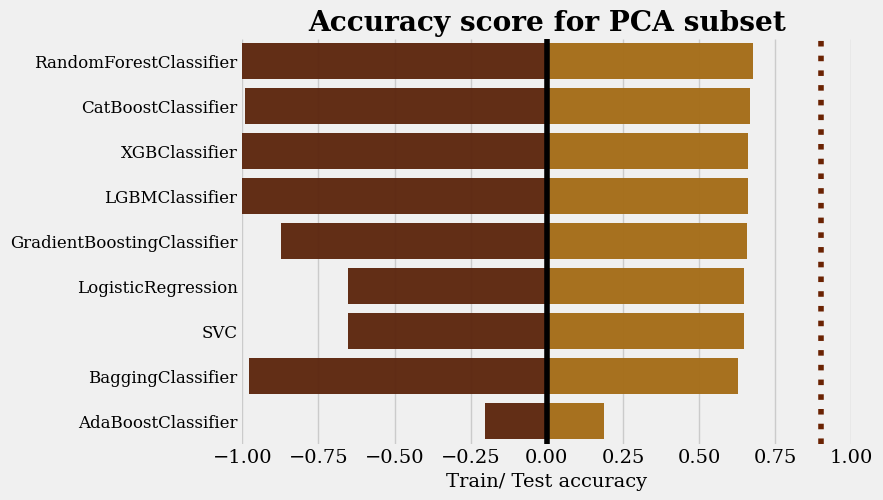

In [64]:
plotscoring(score_pca,'PCA subset',axvline=.9)

In [65]:
setpval

['year', 'precipitation', 'temp_avg', 'temp_max', 'wind']

In [66]:
score_pval,imp_pval=selectmoran(modellst,X[setpval])

Learning rate set to 0.080097
0:	learn: 1.4219626	total: 2.83ms	remaining: 2.83s
1:	learn: 1.2920165	total: 5.91ms	remaining: 2.95s
2:	learn: 1.1877612	total: 8.45ms	remaining: 2.81s
3:	learn: 1.0951216	total: 10.6ms	remaining: 2.63s
4:	learn: 1.0242671	total: 14.6ms	remaining: 2.9s
5:	learn: 0.9576131	total: 16.6ms	remaining: 2.76s
6:	learn: 0.9059209	total: 20.6ms	remaining: 2.92s
7:	learn: 0.8610740	total: 23.2ms	remaining: 2.88s
8:	learn: 0.8222612	total: 25.5ms	remaining: 2.8s
9:	learn: 0.7866100	total: 27.7ms	remaining: 2.74s
10:	learn: 0.7572589	total: 30.1ms	remaining: 2.7s
11:	learn: 0.7286137	total: 32.9ms	remaining: 2.71s
12:	learn: 0.6999035	total: 35.9ms	remaining: 2.72s
13:	learn: 0.6750093	total: 38.3ms	remaining: 2.7s
14:	learn: 0.6540858	total: 40.5ms	remaining: 2.66s
15:	learn: 0.6355816	total: 42.9ms	remaining: 2.64s
16:	learn: 0.6184798	total: 45.2ms	remaining: 2.61s
17:	learn: 0.6010860	total: 47.6ms	remaining: 2.59s
18:	learn: 0.5873499	total: 49.9ms	remaining: 2.

252:	learn: 0.2435398	total: 591ms	remaining: 1.74s
253:	learn: 0.2430319	total: 593ms	remaining: 1.74s
254:	learn: 0.2423909	total: 595ms	remaining: 1.74s
255:	learn: 0.2418958	total: 597ms	remaining: 1.74s
256:	learn: 0.2411680	total: 599ms	remaining: 1.73s
257:	learn: 0.2408205	total: 601ms	remaining: 1.73s
258:	learn: 0.2404804	total: 603ms	remaining: 1.73s
259:	learn: 0.2398748	total: 605ms	remaining: 1.72s
260:	learn: 0.2395248	total: 607ms	remaining: 1.72s
261:	learn: 0.2392132	total: 609ms	remaining: 1.72s
262:	learn: 0.2387565	total: 611ms	remaining: 1.71s
263:	learn: 0.2383032	total: 613ms	remaining: 1.71s
264:	learn: 0.2379110	total: 615ms	remaining: 1.71s
265:	learn: 0.2373641	total: 617ms	remaining: 1.7s
266:	learn: 0.2368158	total: 619ms	remaining: 1.7s
267:	learn: 0.2364653	total: 621ms	remaining: 1.7s
268:	learn: 0.2361252	total: 623ms	remaining: 1.69s
269:	learn: 0.2358089	total: 625ms	remaining: 1.69s
270:	learn: 0.2354557	total: 627ms	remaining: 1.69s
271:	learn: 0.2

438:	learn: 0.1807858	total: 979ms	remaining: 1.25s
439:	learn: 0.1805622	total: 981ms	remaining: 1.25s
440:	learn: 0.1802069	total: 983ms	remaining: 1.25s
441:	learn: 0.1798884	total: 986ms	remaining: 1.24s
442:	learn: 0.1794923	total: 988ms	remaining: 1.24s
443:	learn: 0.1792841	total: 990ms	remaining: 1.24s
444:	learn: 0.1789682	total: 993ms	remaining: 1.24s
445:	learn: 0.1787314	total: 995ms	remaining: 1.24s
446:	learn: 0.1784871	total: 997ms	remaining: 1.23s
447:	learn: 0.1783473	total: 999ms	remaining: 1.23s
448:	learn: 0.1780015	total: 1s	remaining: 1.23s
449:	learn: 0.1778014	total: 1s	remaining: 1.23s
450:	learn: 0.1774185	total: 1s	remaining: 1.22s
451:	learn: 0.1771460	total: 1.01s	remaining: 1.22s
452:	learn: 0.1769451	total: 1.01s	remaining: 1.22s
453:	learn: 0.1766095	total: 1.01s	remaining: 1.22s
454:	learn: 0.1762609	total: 1.01s	remaining: 1.21s
455:	learn: 0.1760094	total: 1.02s	remaining: 1.21s
456:	learn: 0.1756271	total: 1.02s	remaining: 1.21s
457:	learn: 0.1753530

626:	learn: 0.1416123	total: 1.38s	remaining: 819ms
627:	learn: 0.1413752	total: 1.38s	remaining: 816ms
628:	learn: 0.1411871	total: 1.38s	remaining: 814ms
629:	learn: 0.1410486	total: 1.38s	remaining: 812ms
630:	learn: 0.1408715	total: 1.38s	remaining: 809ms
631:	learn: 0.1406979	total: 1.39s	remaining: 807ms
632:	learn: 0.1405171	total: 1.39s	remaining: 805ms
633:	learn: 0.1402569	total: 1.39s	remaining: 803ms
634:	learn: 0.1401291	total: 1.39s	remaining: 800ms
635:	learn: 0.1398501	total: 1.39s	remaining: 798ms
636:	learn: 0.1396895	total: 1.4s	remaining: 796ms
637:	learn: 0.1396101	total: 1.4s	remaining: 793ms
638:	learn: 0.1395202	total: 1.4s	remaining: 791ms
639:	learn: 0.1393301	total: 1.4s	remaining: 789ms
640:	learn: 0.1391980	total: 1.4s	remaining: 786ms
641:	learn: 0.1389914	total: 1.41s	remaining: 784ms
642:	learn: 0.1388353	total: 1.41s	remaining: 782ms
643:	learn: 0.1385827	total: 1.41s	remaining: 779ms
644:	learn: 0.1382638	total: 1.41s	remaining: 777ms
645:	learn: 0.138

817:	learn: 0.1135771	total: 1.76s	remaining: 392ms
818:	learn: 0.1135195	total: 1.76s	remaining: 390ms
819:	learn: 0.1134100	total: 1.77s	remaining: 388ms
820:	learn: 0.1132573	total: 1.77s	remaining: 386ms
821:	learn: 0.1131026	total: 1.77s	remaining: 384ms
822:	learn: 0.1129955	total: 1.77s	remaining: 381ms
823:	learn: 0.1128783	total: 1.77s	remaining: 379ms
824:	learn: 0.1128187	total: 1.78s	remaining: 377ms
825:	learn: 0.1126679	total: 1.78s	remaining: 375ms
826:	learn: 0.1125653	total: 1.78s	remaining: 373ms
827:	learn: 0.1124484	total: 1.78s	remaining: 371ms
828:	learn: 0.1123637	total: 1.79s	remaining: 368ms
829:	learn: 0.1122689	total: 1.79s	remaining: 366ms
830:	learn: 0.1121432	total: 1.79s	remaining: 364ms
831:	learn: 0.1120144	total: 1.79s	remaining: 362ms
832:	learn: 0.1118565	total: 1.79s	remaining: 360ms
833:	learn: 0.1117623	total: 1.8s	remaining: 358ms
834:	learn: 0.1116530	total: 1.8s	remaining: 355ms
835:	learn: 0.1115684	total: 1.8s	remaining: 353ms
836:	learn: 0.1

Learning rate set to 0.080097
0:	learn: 1.4234778	total: 2.42ms	remaining: 2.42s
1:	learn: 1.2945609	total: 4.71ms	remaining: 2.35s
2:	learn: 1.1905861	total: 7.07ms	remaining: 2.35s
3:	learn: 1.0979565	total: 8.58ms	remaining: 2.14s
4:	learn: 1.0276951	total: 10.6ms	remaining: 2.11s
5:	learn: 0.9611630	total: 11.8ms	remaining: 1.95s
6:	learn: 0.9094050	total: 13.9ms	remaining: 1.98s
7:	learn: 0.8649724	total: 16ms	remaining: 1.98s
8:	learn: 0.8256879	total: 18.2ms	remaining: 2s
9:	learn: 0.7902397	total: 20.3ms	remaining: 2.01s
10:	learn: 0.7601716	total: 22.4ms	remaining: 2.02s
11:	learn: 0.7304046	total: 24.5ms	remaining: 2.02s
12:	learn: 0.7014924	total: 26.6ms	remaining: 2.02s
13:	learn: 0.6777242	total: 28.9ms	remaining: 2.04s
14:	learn: 0.6557287	total: 31.1ms	remaining: 2.04s
15:	learn: 0.6374117	total: 33.2ms	remaining: 2.04s
16:	learn: 0.6200306	total: 35.4ms	remaining: 2.04s
17:	learn: 0.6026687	total: 37.5ms	remaining: 2.04s
18:	learn: 0.5884050	total: 39.6ms	remaining: 2.0

189:	learn: 0.2724183	total: 390ms	remaining: 1.66s
190:	learn: 0.2716136	total: 392ms	remaining: 1.66s
191:	learn: 0.2708666	total: 395ms	remaining: 1.66s
192:	learn: 0.2701708	total: 397ms	remaining: 1.66s
193:	learn: 0.2694498	total: 399ms	remaining: 1.66s
194:	learn: 0.2688423	total: 400ms	remaining: 1.65s
195:	learn: 0.2684811	total: 402ms	remaining: 1.65s
196:	learn: 0.2678309	total: 404ms	remaining: 1.65s
197:	learn: 0.2671135	total: 406ms	remaining: 1.65s
198:	learn: 0.2667284	total: 408ms	remaining: 1.64s
199:	learn: 0.2660490	total: 410ms	remaining: 1.64s
200:	learn: 0.2656265	total: 412ms	remaining: 1.64s
201:	learn: 0.2650051	total: 414ms	remaining: 1.64s
202:	learn: 0.2646599	total: 416ms	remaining: 1.63s
203:	learn: 0.2638881	total: 418ms	remaining: 1.63s
204:	learn: 0.2635563	total: 420ms	remaining: 1.63s
205:	learn: 0.2630084	total: 422ms	remaining: 1.63s
206:	learn: 0.2623086	total: 424ms	remaining: 1.62s
207:	learn: 0.2618056	total: 426ms	remaining: 1.62s
208:	learn: 

369:	learn: 0.1972479	total: 773ms	remaining: 1.32s
370:	learn: 0.1969357	total: 776ms	remaining: 1.32s
371:	learn: 0.1967123	total: 778ms	remaining: 1.31s
372:	learn: 0.1964933	total: 780ms	remaining: 1.31s
373:	learn: 0.1961753	total: 783ms	remaining: 1.31s
374:	learn: 0.1959391	total: 785ms	remaining: 1.31s
375:	learn: 0.1955288	total: 788ms	remaining: 1.31s
376:	learn: 0.1954328	total: 791ms	remaining: 1.31s
377:	learn: 0.1950734	total: 793ms	remaining: 1.3s
378:	learn: 0.1947824	total: 795ms	remaining: 1.3s
379:	learn: 0.1942555	total: 797ms	remaining: 1.3s
380:	learn: 0.1939897	total: 800ms	remaining: 1.3s
381:	learn: 0.1937018	total: 802ms	remaining: 1.3s
382:	learn: 0.1934359	total: 804ms	remaining: 1.29s
383:	learn: 0.1931445	total: 807ms	remaining: 1.29s
384:	learn: 0.1926796	total: 809ms	remaining: 1.29s
385:	learn: 0.1924596	total: 811ms	remaining: 1.29s
386:	learn: 0.1922104	total: 814ms	remaining: 1.29s
387:	learn: 0.1919449	total: 816ms	remaining: 1.29s
388:	learn: 0.191

546:	learn: 0.1532232	total: 1.16s	remaining: 959ms
547:	learn: 0.1530601	total: 1.16s	remaining: 957ms
548:	learn: 0.1528587	total: 1.16s	remaining: 954ms
549:	learn: 0.1527185	total: 1.16s	remaining: 952ms
550:	learn: 0.1524400	total: 1.17s	remaining: 950ms
551:	learn: 0.1522540	total: 1.17s	remaining: 948ms
552:	learn: 0.1519624	total: 1.17s	remaining: 946ms
553:	learn: 0.1517954	total: 1.17s	remaining: 944ms
554:	learn: 0.1515449	total: 1.17s	remaining: 941ms
555:	learn: 0.1513438	total: 1.18s	remaining: 939ms
556:	learn: 0.1512066	total: 1.18s	remaining: 937ms
557:	learn: 0.1509288	total: 1.18s	remaining: 935ms
558:	learn: 0.1507726	total: 1.18s	remaining: 933ms
559:	learn: 0.1505449	total: 1.18s	remaining: 930ms
560:	learn: 0.1504280	total: 1.19s	remaining: 928ms
561:	learn: 0.1502122	total: 1.19s	remaining: 926ms
562:	learn: 0.1499987	total: 1.19s	remaining: 924ms
563:	learn: 0.1498360	total: 1.19s	remaining: 922ms
564:	learn: 0.1496872	total: 1.19s	remaining: 919ms
565:	learn: 

710:	learn: 0.1247285	total: 1.55s	remaining: 629ms
711:	learn: 0.1245620	total: 1.55s	remaining: 627ms
712:	learn: 0.1244528	total: 1.55s	remaining: 625ms
713:	learn: 0.1243179	total: 1.55s	remaining: 623ms
714:	learn: 0.1242045	total: 1.56s	remaining: 621ms
715:	learn: 0.1240876	total: 1.56s	remaining: 618ms
716:	learn: 0.1239762	total: 1.56s	remaining: 616ms
717:	learn: 0.1238443	total: 1.56s	remaining: 614ms
718:	learn: 0.1237184	total: 1.56s	remaining: 612ms
719:	learn: 0.1235492	total: 1.57s	remaining: 609ms
720:	learn: 0.1234214	total: 1.57s	remaining: 607ms
721:	learn: 0.1233021	total: 1.57s	remaining: 605ms
722:	learn: 0.1231730	total: 1.57s	remaining: 603ms
723:	learn: 0.1229921	total: 1.57s	remaining: 601ms
724:	learn: 0.1228218	total: 1.58s	remaining: 598ms
725:	learn: 0.1226538	total: 1.58s	remaining: 596ms
726:	learn: 0.1224810	total: 1.58s	remaining: 594ms
727:	learn: 0.1222794	total: 1.58s	remaining: 592ms
728:	learn: 0.1221599	total: 1.58s	remaining: 589ms
729:	learn: 

892:	learn: 0.1029378	total: 1.95s	remaining: 234ms
893:	learn: 0.1027983	total: 1.95s	remaining: 232ms
894:	learn: 0.1027073	total: 1.95s	remaining: 229ms
895:	learn: 0.1025344	total: 1.96s	remaining: 227ms
896:	learn: 0.1022842	total: 1.96s	remaining: 225ms
897:	learn: 0.1021675	total: 1.96s	remaining: 223ms
898:	learn: 0.1020781	total: 1.96s	remaining: 221ms
899:	learn: 0.1019814	total: 1.97s	remaining: 218ms
900:	learn: 0.1018537	total: 1.97s	remaining: 216ms
901:	learn: 0.1017327	total: 1.97s	remaining: 214ms
902:	learn: 0.1016471	total: 1.97s	remaining: 212ms
903:	learn: 0.1015983	total: 1.97s	remaining: 210ms
904:	learn: 0.1014342	total: 1.98s	remaining: 207ms
905:	learn: 0.1013219	total: 1.98s	remaining: 205ms
906:	learn: 0.1012497	total: 1.98s	remaining: 203ms
907:	learn: 0.1011513	total: 1.98s	remaining: 201ms
908:	learn: 0.1010525	total: 1.98s	remaining: 199ms
909:	learn: 0.1009294	total: 1.99s	remaining: 197ms
910:	learn: 0.1008757	total: 1.99s	remaining: 194ms
911:	learn: 

124:	learn: 0.3279210	total: 296ms	remaining: 2.08s
125:	learn: 0.3270648	total: 299ms	remaining: 2.07s
126:	learn: 0.3264127	total: 301ms	remaining: 2.07s
127:	learn: 0.3255399	total: 303ms	remaining: 2.06s
128:	learn: 0.3248003	total: 305ms	remaining: 2.06s
129:	learn: 0.3242537	total: 308ms	remaining: 2.06s
130:	learn: 0.3236497	total: 310ms	remaining: 2.06s
131:	learn: 0.3229187	total: 312ms	remaining: 2.05s
132:	learn: 0.3224444	total: 314ms	remaining: 2.05s
133:	learn: 0.3216464	total: 316ms	remaining: 2.04s
134:	learn: 0.3207093	total: 319ms	remaining: 2.04s
135:	learn: 0.3198094	total: 321ms	remaining: 2.04s
136:	learn: 0.3189931	total: 323ms	remaining: 2.03s
137:	learn: 0.3183891	total: 325ms	remaining: 2.03s
138:	learn: 0.3173275	total: 327ms	remaining: 2.02s
139:	learn: 0.3165581	total: 329ms	remaining: 2.02s
140:	learn: 0.3159775	total: 332ms	remaining: 2.02s
141:	learn: 0.3150393	total: 334ms	remaining: 2.02s
142:	learn: 0.3141573	total: 336ms	remaining: 2.02s
143:	learn: 

297:	learn: 0.2312286	total: 677ms	remaining: 1.59s
298:	learn: 0.2306700	total: 679ms	remaining: 1.59s
299:	learn: 0.2302677	total: 681ms	remaining: 1.59s
300:	learn: 0.2299692	total: 683ms	remaining: 1.59s
301:	learn: 0.2296119	total: 685ms	remaining: 1.58s
302:	learn: 0.2293221	total: 687ms	remaining: 1.58s
303:	learn: 0.2288100	total: 689ms	remaining: 1.58s
304:	learn: 0.2282933	total: 691ms	remaining: 1.57s
305:	learn: 0.2280684	total: 693ms	remaining: 1.57s
306:	learn: 0.2276885	total: 695ms	remaining: 1.57s
307:	learn: 0.2272746	total: 697ms	remaining: 1.56s
308:	learn: 0.2267211	total: 699ms	remaining: 1.56s
309:	learn: 0.2262455	total: 701ms	remaining: 1.56s
310:	learn: 0.2256622	total: 703ms	remaining: 1.56s
311:	learn: 0.2254431	total: 705ms	remaining: 1.55s
312:	learn: 0.2250012	total: 707ms	remaining: 1.55s
313:	learn: 0.2246279	total: 708ms	remaining: 1.55s
314:	learn: 0.2241711	total: 710ms	remaining: 1.54s
315:	learn: 0.2236965	total: 712ms	remaining: 1.54s
316:	learn: 

457:	learn: 0.1807348	total: 1.07s	remaining: 1.27s
458:	learn: 0.1804502	total: 1.08s	remaining: 1.27s
459:	learn: 0.1801232	total: 1.08s	remaining: 1.27s
460:	learn: 0.1798774	total: 1.08s	remaining: 1.27s
461:	learn: 0.1796330	total: 1.09s	remaining: 1.27s
462:	learn: 0.1792608	total: 1.09s	remaining: 1.26s
463:	learn: 0.1789527	total: 1.09s	remaining: 1.26s
464:	learn: 0.1786999	total: 1.1s	remaining: 1.26s
465:	learn: 0.1783468	total: 1.1s	remaining: 1.26s
466:	learn: 0.1781780	total: 1.1s	remaining: 1.26s
467:	learn: 0.1779206	total: 1.11s	remaining: 1.26s
468:	learn: 0.1777280	total: 1.11s	remaining: 1.26s
469:	learn: 0.1775459	total: 1.12s	remaining: 1.26s
470:	learn: 0.1774142	total: 1.12s	remaining: 1.26s
471:	learn: 0.1771168	total: 1.12s	remaining: 1.25s
472:	learn: 0.1769094	total: 1.12s	remaining: 1.25s
473:	learn: 0.1766291	total: 1.13s	remaining: 1.25s
474:	learn: 0.1763453	total: 1.13s	remaining: 1.25s
475:	learn: 0.1761938	total: 1.13s	remaining: 1.25s
476:	learn: 0.1

621:	learn: 0.1444005	total: 1.46s	remaining: 888ms
622:	learn: 0.1443165	total: 1.46s	remaining: 885ms
623:	learn: 0.1441992	total: 1.47s	remaining: 883ms
624:	learn: 0.1438264	total: 1.47s	remaining: 880ms
625:	learn: 0.1436845	total: 1.47s	remaining: 878ms
626:	learn: 0.1435498	total: 1.47s	remaining: 875ms
627:	learn: 0.1434102	total: 1.47s	remaining: 873ms
628:	learn: 0.1432003	total: 1.48s	remaining: 870ms
629:	learn: 0.1430299	total: 1.48s	remaining: 868ms
630:	learn: 0.1428915	total: 1.48s	remaining: 865ms
631:	learn: 0.1427688	total: 1.48s	remaining: 863ms
632:	learn: 0.1425757	total: 1.48s	remaining: 861ms
633:	learn: 0.1423307	total: 1.49s	remaining: 858ms
634:	learn: 0.1421349	total: 1.49s	remaining: 855ms
635:	learn: 0.1418960	total: 1.49s	remaining: 853ms
636:	learn: 0.1417173	total: 1.49s	remaining: 851ms
637:	learn: 0.1415494	total: 1.49s	remaining: 848ms
638:	learn: 0.1413125	total: 1.5s	remaining: 845ms
639:	learn: 0.1411996	total: 1.5s	remaining: 843ms
640:	learn: 0.

783:	learn: 0.1198625	total: 1.85s	remaining: 511ms
784:	learn: 0.1197376	total: 1.86s	remaining: 509ms
785:	learn: 0.1196680	total: 1.86s	remaining: 507ms
786:	learn: 0.1195583	total: 1.86s	remaining: 504ms
787:	learn: 0.1193734	total: 1.87s	remaining: 502ms
788:	learn: 0.1192500	total: 1.87s	remaining: 500ms
789:	learn: 0.1191342	total: 1.87s	remaining: 498ms
790:	learn: 0.1189579	total: 1.88s	remaining: 495ms
791:	learn: 0.1188219	total: 1.88s	remaining: 493ms
792:	learn: 0.1186478	total: 1.88s	remaining: 491ms
793:	learn: 0.1185032	total: 1.88s	remaining: 489ms
794:	learn: 0.1183747	total: 1.89s	remaining: 486ms
795:	learn: 0.1181716	total: 1.89s	remaining: 484ms
796:	learn: 0.1180145	total: 1.89s	remaining: 482ms
797:	learn: 0.1178482	total: 1.89s	remaining: 479ms
798:	learn: 0.1177012	total: 1.9s	remaining: 477ms
799:	learn: 0.1175468	total: 1.9s	remaining: 475ms
800:	learn: 0.1174082	total: 1.9s	remaining: 472ms
801:	learn: 0.1173141	total: 1.9s	remaining: 470ms
802:	learn: 0.11

0:	learn: 1.4231606	total: 5.47ms	remaining: 5.46s
1:	learn: 1.2934098	total: 11ms	remaining: 5.5s
2:	learn: 1.1970476	total: 15.6ms	remaining: 5.19s
3:	learn: 1.1034543	total: 17.6ms	remaining: 4.37s
4:	learn: 1.0315190	total: 21.4ms	remaining: 4.25s
5:	learn: 0.9646385	total: 23.3ms	remaining: 3.87s
6:	learn: 0.9110172	total: 28.7ms	remaining: 4.07s
7:	learn: 0.8663713	total: 32.2ms	remaining: 3.99s
8:	learn: 0.8279898	total: 36.7ms	remaining: 4.04s
9:	learn: 0.7924659	total: 40.7ms	remaining: 4.03s
10:	learn: 0.7592568	total: 45.7ms	remaining: 4.11s
11:	learn: 0.7285403	total: 49.9ms	remaining: 4.11s
12:	learn: 0.7002673	total: 53.4ms	remaining: 4.05s
13:	learn: 0.6759117	total: 57.2ms	remaining: 4.03s
14:	learn: 0.6547787	total: 62.5ms	remaining: 4.1s
15:	learn: 0.6362802	total: 67.6ms	remaining: 4.16s
16:	learn: 0.6187950	total: 72.3ms	remaining: 4.18s
17:	learn: 0.6010895	total: 76.7ms	remaining: 4.18s
18:	learn: 0.5860157	total: 79ms	remaining: 4.08s
19:	learn: 0.5730274	total: 

165:	learn: 0.2852818	total: 612ms	remaining: 3.07s
166:	learn: 0.2846155	total: 616ms	remaining: 3.07s
167:	learn: 0.2839296	total: 620ms	remaining: 3.07s
168:	learn: 0.2829914	total: 622ms	remaining: 3.06s
169:	learn: 0.2823385	total: 625ms	remaining: 3.05s
170:	learn: 0.2817922	total: 627ms	remaining: 3.04s
171:	learn: 0.2813688	total: 630ms	remaining: 3.03s
172:	learn: 0.2808090	total: 634ms	remaining: 3.03s
173:	learn: 0.2802665	total: 637ms	remaining: 3.02s
174:	learn: 0.2796763	total: 640ms	remaining: 3.02s
175:	learn: 0.2790475	total: 642ms	remaining: 3s
176:	learn: 0.2783942	total: 644ms	remaining: 2.99s
177:	learn: 0.2773911	total: 647ms	remaining: 2.99s
178:	learn: 0.2768870	total: 650ms	remaining: 2.98s
179:	learn: 0.2765522	total: 652ms	remaining: 2.97s
180:	learn: 0.2762754	total: 655ms	remaining: 2.96s
181:	learn: 0.2754094	total: 658ms	remaining: 2.96s
182:	learn: 0.2746484	total: 660ms	remaining: 2.95s
183:	learn: 0.2740893	total: 664ms	remaining: 2.94s
184:	learn: 0.2

340:	learn: 0.2068275	total: 1.02s	remaining: 1.97s
341:	learn: 0.2064204	total: 1.02s	remaining: 1.96s
342:	learn: 0.2058053	total: 1.02s	remaining: 1.96s
343:	learn: 0.2053927	total: 1.02s	remaining: 1.95s
344:	learn: 0.2051651	total: 1.03s	remaining: 1.95s
345:	learn: 0.2047707	total: 1.03s	remaining: 1.94s
346:	learn: 0.2044757	total: 1.03s	remaining: 1.94s
347:	learn: 0.2041145	total: 1.03s	remaining: 1.94s
348:	learn: 0.2036482	total: 1.03s	remaining: 1.93s
349:	learn: 0.2032141	total: 1.04s	remaining: 1.93s
350:	learn: 0.2028778	total: 1.04s	remaining: 1.92s
351:	learn: 0.2026159	total: 1.04s	remaining: 1.92s
352:	learn: 0.2024076	total: 1.04s	remaining: 1.91s
353:	learn: 0.2020523	total: 1.04s	remaining: 1.91s
354:	learn: 0.2016738	total: 1.05s	remaining: 1.9s
355:	learn: 0.2014594	total: 1.05s	remaining: 1.9s
356:	learn: 0.2011080	total: 1.05s	remaining: 1.9s
357:	learn: 0.2008491	total: 1.05s	remaining: 1.89s
358:	learn: 0.2003667	total: 1.06s	remaining: 1.89s
359:	learn: 0.2

531:	learn: 0.1556460	total: 1.61s	remaining: 1.41s
532:	learn: 0.1554760	total: 1.61s	remaining: 1.41s
533:	learn: 0.1553027	total: 1.61s	remaining: 1.41s
534:	learn: 0.1551852	total: 1.61s	remaining: 1.4s
535:	learn: 0.1550306	total: 1.62s	remaining: 1.4s
536:	learn: 0.1547858	total: 1.62s	remaining: 1.4s
537:	learn: 0.1545926	total: 1.62s	remaining: 1.39s
538:	learn: 0.1543916	total: 1.62s	remaining: 1.39s
539:	learn: 0.1541649	total: 1.62s	remaining: 1.38s
540:	learn: 0.1539627	total: 1.63s	remaining: 1.38s
541:	learn: 0.1537011	total: 1.63s	remaining: 1.38s
542:	learn: 0.1535739	total: 1.63s	remaining: 1.37s
543:	learn: 0.1534581	total: 1.63s	remaining: 1.37s
544:	learn: 0.1532629	total: 1.64s	remaining: 1.36s
545:	learn: 0.1531142	total: 1.64s	remaining: 1.36s
546:	learn: 0.1528350	total: 1.64s	remaining: 1.36s
547:	learn: 0.1526249	total: 1.64s	remaining: 1.35s
548:	learn: 0.1524837	total: 1.64s	remaining: 1.35s
549:	learn: 0.1523848	total: 1.65s	remaining: 1.35s
550:	learn: 0.1

704:	learn: 0.1273697	total: 1.99s	remaining: 834ms
705:	learn: 0.1272148	total: 1.99s	remaining: 831ms
706:	learn: 0.1270946	total: 2s	remaining: 828ms
707:	learn: 0.1269571	total: 2s	remaining: 824ms
708:	learn: 0.1268725	total: 2s	remaining: 821ms
709:	learn: 0.1267575	total: 2s	remaining: 818ms
710:	learn: 0.1265674	total: 2s	remaining: 815ms
711:	learn: 0.1264588	total: 2.01s	remaining: 812ms
712:	learn: 0.1262405	total: 2.01s	remaining: 809ms
713:	learn: 0.1261280	total: 2.01s	remaining: 806ms
714:	learn: 0.1259975	total: 2.01s	remaining: 803ms
715:	learn: 0.1258253	total: 2.02s	remaining: 800ms
716:	learn: 0.1257127	total: 2.02s	remaining: 797ms
717:	learn: 0.1255618	total: 2.02s	remaining: 794ms
718:	learn: 0.1254045	total: 2.02s	remaining: 791ms
719:	learn: 0.1250784	total: 2.02s	remaining: 787ms
720:	learn: 0.1248957	total: 2.03s	remaining: 784ms
721:	learn: 0.1246334	total: 2.03s	remaining: 781ms
722:	learn: 0.1245549	total: 2.03s	remaining: 778ms
723:	learn: 0.1243249	total

887:	learn: 0.1043448	total: 2.58s	remaining: 325ms
888:	learn: 0.1042253	total: 2.58s	remaining: 322ms
889:	learn: 0.1041503	total: 2.58s	remaining: 319ms
890:	learn: 0.1040941	total: 2.58s	remaining: 316ms
891:	learn: 0.1040731	total: 2.59s	remaining: 313ms
892:	learn: 0.1039949	total: 2.59s	remaining: 310ms
893:	learn: 0.1039096	total: 2.59s	remaining: 307ms
894:	learn: 0.1038285	total: 2.59s	remaining: 304ms
895:	learn: 0.1037541	total: 2.6s	remaining: 301ms
896:	learn: 0.1036423	total: 2.6s	remaining: 298ms
897:	learn: 0.1035540	total: 2.6s	remaining: 295ms
898:	learn: 0.1034176	total: 2.6s	remaining: 292ms
899:	learn: 0.1033318	total: 2.6s	remaining: 289ms
900:	learn: 0.1031903	total: 2.6s	remaining: 286ms
901:	learn: 0.1030361	total: 2.61s	remaining: 283ms
902:	learn: 0.1029793	total: 2.61s	remaining: 280ms
903:	learn: 0.1029174	total: 2.61s	remaining: 277ms
904:	learn: 0.1028435	total: 2.61s	remaining: 274ms
905:	learn: 0.1027468	total: 2.62s	remaining: 271ms
906:	learn: 0.1026

70:	learn: 0.3702350	total: 286ms	remaining: 3.75s
71:	learn: 0.3689642	total: 291ms	remaining: 3.75s
72:	learn: 0.3677822	total: 295ms	remaining: 3.75s
73:	learn: 0.3664947	total: 299ms	remaining: 3.74s
74:	learn: 0.3649081	total: 302ms	remaining: 3.73s
75:	learn: 0.3638330	total: 306ms	remaining: 3.73s
76:	learn: 0.3619869	total: 312ms	remaining: 3.73s
77:	learn: 0.3605270	total: 315ms	remaining: 3.73s
78:	learn: 0.3589062	total: 320ms	remaining: 3.73s
79:	learn: 0.3580692	total: 324ms	remaining: 3.72s
80:	learn: 0.3569742	total: 328ms	remaining: 3.73s
81:	learn: 0.3551901	total: 333ms	remaining: 3.73s
82:	learn: 0.3537494	total: 338ms	remaining: 3.73s
83:	learn: 0.3529125	total: 343ms	remaining: 3.74s
84:	learn: 0.3521644	total: 345ms	remaining: 3.72s
85:	learn: 0.3512603	total: 349ms	remaining: 3.71s
86:	learn: 0.3499070	total: 353ms	remaining: 3.71s
87:	learn: 0.3486890	total: 358ms	remaining: 3.71s
88:	learn: 0.3483899	total: 362ms	remaining: 3.71s
89:	learn: 0.3469848	total: 367

281:	learn: 0.2244585	total: 892ms	remaining: 2.27s
282:	learn: 0.2239439	total: 895ms	remaining: 2.27s
283:	learn: 0.2234741	total: 897ms	remaining: 2.26s
284:	learn: 0.2229693	total: 900ms	remaining: 2.26s
285:	learn: 0.2224619	total: 902ms	remaining: 2.25s
286:	learn: 0.2218543	total: 904ms	remaining: 2.25s
287:	learn: 0.2215318	total: 906ms	remaining: 2.24s
288:	learn: 0.2212823	total: 909ms	remaining: 2.24s
289:	learn: 0.2210481	total: 911ms	remaining: 2.23s
290:	learn: 0.2205886	total: 914ms	remaining: 2.23s
291:	learn: 0.2200463	total: 916ms	remaining: 2.22s
292:	learn: 0.2195703	total: 918ms	remaining: 2.21s
293:	learn: 0.2191362	total: 920ms	remaining: 2.21s
294:	learn: 0.2188137	total: 922ms	remaining: 2.2s
295:	learn: 0.2182638	total: 924ms	remaining: 2.2s
296:	learn: 0.2177554	total: 926ms	remaining: 2.19s
297:	learn: 0.2170975	total: 928ms	remaining: 2.19s
298:	learn: 0.2167328	total: 930ms	remaining: 2.18s
299:	learn: 0.2164241	total: 932ms	remaining: 2.17s
300:	learn: 0.

463:	learn: 0.1684483	total: 1.28s	remaining: 1.48s
464:	learn: 0.1682376	total: 1.28s	remaining: 1.48s
465:	learn: 0.1680531	total: 1.29s	remaining: 1.48s
466:	learn: 0.1677158	total: 1.29s	remaining: 1.47s
467:	learn: 0.1675875	total: 1.29s	remaining: 1.47s
468:	learn: 0.1672985	total: 1.29s	remaining: 1.46s
469:	learn: 0.1670365	total: 1.29s	remaining: 1.46s
470:	learn: 0.1667847	total: 1.3s	remaining: 1.46s
471:	learn: 0.1664586	total: 1.3s	remaining: 1.45s
472:	learn: 0.1663096	total: 1.3s	remaining: 1.45s
473:	learn: 0.1660503	total: 1.3s	remaining: 1.45s
474:	learn: 0.1658366	total: 1.3s	remaining: 1.44s
475:	learn: 0.1656366	total: 1.31s	remaining: 1.44s
476:	learn: 0.1653608	total: 1.31s	remaining: 1.44s
477:	learn: 0.1650836	total: 1.31s	remaining: 1.43s
478:	learn: 0.1647971	total: 1.31s	remaining: 1.43s
479:	learn: 0.1646004	total: 1.31s	remaining: 1.42s
480:	learn: 0.1643564	total: 1.32s	remaining: 1.42s
481:	learn: 0.1640426	total: 1.32s	remaining: 1.42s
482:	learn: 0.163

646:	learn: 0.1319209	total: 1.67s	remaining: 911ms
647:	learn: 0.1317452	total: 1.67s	remaining: 909ms
648:	learn: 0.1316115	total: 1.67s	remaining: 906ms
649:	learn: 0.1314734	total: 1.68s	remaining: 903ms
650:	learn: 0.1313443	total: 1.68s	remaining: 900ms
651:	learn: 0.1311841	total: 1.68s	remaining: 897ms
652:	learn: 0.1309872	total: 1.68s	remaining: 895ms
653:	learn: 0.1308092	total: 1.69s	remaining: 892ms
654:	learn: 0.1306065	total: 1.69s	remaining: 889ms
655:	learn: 0.1303505	total: 1.69s	remaining: 886ms
656:	learn: 0.1301574	total: 1.69s	remaining: 884ms
657:	learn: 0.1299378	total: 1.69s	remaining: 881ms
658:	learn: 0.1298212	total: 1.7s	remaining: 878ms
659:	learn: 0.1295868	total: 1.7s	remaining: 875ms
660:	learn: 0.1294430	total: 1.7s	remaining: 872ms
661:	learn: 0.1293094	total: 1.7s	remaining: 870ms
662:	learn: 0.1292339	total: 1.71s	remaining: 867ms
663:	learn: 0.1290187	total: 1.71s	remaining: 864ms
664:	learn: 0.1289367	total: 1.71s	remaining: 861ms
665:	learn: 0.12

827:	learn: 0.1073823	total: 2.06s	remaining: 427ms
828:	learn: 0.1072846	total: 2.06s	remaining: 425ms
829:	learn: 0.1071858	total: 2.06s	remaining: 422ms
830:	learn: 0.1070720	total: 2.06s	remaining: 420ms
831:	learn: 0.1068944	total: 2.07s	remaining: 417ms
832:	learn: 0.1068302	total: 2.07s	remaining: 415ms
833:	learn: 0.1066449	total: 2.07s	remaining: 412ms
834:	learn: 0.1065320	total: 2.07s	remaining: 410ms
835:	learn: 0.1064406	total: 2.07s	remaining: 407ms
836:	learn: 0.1063696	total: 2.08s	remaining: 404ms
837:	learn: 0.1062238	total: 2.08s	remaining: 402ms
838:	learn: 0.1060859	total: 2.08s	remaining: 399ms
839:	learn: 0.1060166	total: 2.08s	remaining: 397ms
840:	learn: 0.1059608	total: 2.08s	remaining: 394ms
841:	learn: 0.1058102	total: 2.08s	remaining: 391ms
842:	learn: 0.1056744	total: 2.09s	remaining: 389ms
843:	learn: 0.1055114	total: 2.09s	remaining: 386ms
844:	learn: 0.1053529	total: 2.09s	remaining: 384ms
845:	learn: 0.1052232	total: 2.09s	remaining: 381ms
846:	learn: 

Learning rate set to 0.0801
0:	learn: 1.4231920	total: 3.39ms	remaining: 3.38s
1:	learn: 1.2938769	total: 5.69ms	remaining: 2.84s
2:	learn: 1.1903015	total: 7.67ms	remaining: 2.55s
3:	learn: 1.0984782	total: 9.45ms	remaining: 2.35s
4:	learn: 1.0321597	total: 11.6ms	remaining: 2.3s
5:	learn: 0.9689076	total: 14ms	remaining: 2.32s
6:	learn: 0.9192263	total: 16.1ms	remaining: 2.29s
7:	learn: 0.8727284	total: 18.1ms	remaining: 2.24s
8:	learn: 0.8292861	total: 20.6ms	remaining: 2.26s
9:	learn: 0.7929177	total: 22.6ms	remaining: 2.23s
10:	learn: 0.7593312	total: 24.7ms	remaining: 2.22s
11:	learn: 0.7313059	total: 27.6ms	remaining: 2.27s
12:	learn: 0.7036327	total: 30.9ms	remaining: 2.35s
13:	learn: 0.6792838	total: 33ms	remaining: 2.33s
14:	learn: 0.6564978	total: 35.1ms	remaining: 2.31s
15:	learn: 0.6384636	total: 37.2ms	remaining: 2.29s
16:	learn: 0.6203361	total: 39.2ms	remaining: 2.26s
17:	learn: 0.6061043	total: 41.3ms	remaining: 2.25s
18:	learn: 0.5892815	total: 43.3ms	remaining: 2.23s

167:	learn: 0.2824609	total: 381ms	remaining: 1.89s
168:	learn: 0.2818254	total: 386ms	remaining: 1.9s
169:	learn: 0.2814147	total: 389ms	remaining: 1.9s
170:	learn: 0.2807179	total: 392ms	remaining: 1.9s
171:	learn: 0.2801231	total: 395ms	remaining: 1.9s
172:	learn: 0.2794958	total: 398ms	remaining: 1.9s
173:	learn: 0.2787282	total: 402ms	remaining: 1.91s
174:	learn: 0.2781411	total: 405ms	remaining: 1.91s
175:	learn: 0.2778117	total: 409ms	remaining: 1.91s
176:	learn: 0.2770948	total: 412ms	remaining: 1.92s
177:	learn: 0.2765826	total: 425ms	remaining: 1.96s
178:	learn: 0.2761568	total: 427ms	remaining: 1.96s
179:	learn: 0.2755675	total: 430ms	remaining: 1.96s
180:	learn: 0.2750300	total: 432ms	remaining: 1.95s
181:	learn: 0.2744825	total: 434ms	remaining: 1.95s
182:	learn: 0.2740321	total: 436ms	remaining: 1.95s
183:	learn: 0.2732147	total: 438ms	remaining: 1.94s
184:	learn: 0.2728315	total: 440ms	remaining: 1.94s
185:	learn: 0.2722299	total: 442ms	remaining: 1.94s
186:	learn: 0.271

336:	learn: 0.2051949	total: 774ms	remaining: 1.52s
337:	learn: 0.2049289	total: 776ms	remaining: 1.52s
338:	learn: 0.2046163	total: 779ms	remaining: 1.52s
339:	learn: 0.2041624	total: 782ms	remaining: 1.52s
340:	learn: 0.2036797	total: 783ms	remaining: 1.51s
341:	learn: 0.2034292	total: 786ms	remaining: 1.51s
342:	learn: 0.2032626	total: 788ms	remaining: 1.51s
343:	learn: 0.2030691	total: 789ms	remaining: 1.5s
344:	learn: 0.2028975	total: 792ms	remaining: 1.5s
345:	learn: 0.2025906	total: 794ms	remaining: 1.5s
346:	learn: 0.2022795	total: 796ms	remaining: 1.5s
347:	learn: 0.2021752	total: 798ms	remaining: 1.5s
348:	learn: 0.2016741	total: 800ms	remaining: 1.49s
349:	learn: 0.2013347	total: 803ms	remaining: 1.49s
350:	learn: 0.2011300	total: 805ms	remaining: 1.49s
351:	learn: 0.2008530	total: 807ms	remaining: 1.49s
352:	learn: 0.2005343	total: 810ms	remaining: 1.48s
353:	learn: 0.2002502	total: 812ms	remaining: 1.48s
354:	learn: 0.1999904	total: 814ms	remaining: 1.48s
355:	learn: 0.199

507:	learn: 0.1608837	total: 1.16s	remaining: 1.13s
508:	learn: 0.1606597	total: 1.17s	remaining: 1.12s
509:	learn: 0.1604203	total: 1.17s	remaining: 1.12s
510:	learn: 0.1603332	total: 1.17s	remaining: 1.12s
511:	learn: 0.1601193	total: 1.17s	remaining: 1.12s
512:	learn: 0.1599292	total: 1.17s	remaining: 1.11s
513:	learn: 0.1596835	total: 1.18s	remaining: 1.11s
514:	learn: 0.1594424	total: 1.18s	remaining: 1.11s
515:	learn: 0.1592034	total: 1.18s	remaining: 1.11s
516:	learn: 0.1588756	total: 1.18s	remaining: 1.1s
517:	learn: 0.1585463	total: 1.18s	remaining: 1.1s
518:	learn: 0.1583192	total: 1.19s	remaining: 1.1s
519:	learn: 0.1580699	total: 1.19s	remaining: 1.1s
520:	learn: 0.1578258	total: 1.19s	remaining: 1.09s
521:	learn: 0.1576814	total: 1.19s	remaining: 1.09s
522:	learn: 0.1573152	total: 1.19s	remaining: 1.09s
523:	learn: 0.1571749	total: 1.2s	remaining: 1.09s
524:	learn: 0.1570085	total: 1.2s	remaining: 1.08s
525:	learn: 0.1567912	total: 1.2s	remaining: 1.08s
526:	learn: 0.15661

682:	learn: 0.1290292	total: 1.55s	remaining: 719ms
683:	learn: 0.1289068	total: 1.55s	remaining: 717ms
684:	learn: 0.1287113	total: 1.55s	remaining: 715ms
685:	learn: 0.1285671	total: 1.56s	remaining: 712ms
686:	learn: 0.1284657	total: 1.56s	remaining: 710ms
687:	learn: 0.1283060	total: 1.56s	remaining: 708ms
688:	learn: 0.1281574	total: 1.56s	remaining: 706ms
689:	learn: 0.1280247	total: 1.57s	remaining: 704ms
690:	learn: 0.1278582	total: 1.57s	remaining: 701ms
691:	learn: 0.1277642	total: 1.57s	remaining: 699ms
692:	learn: 0.1275871	total: 1.57s	remaining: 696ms
693:	learn: 0.1274161	total: 1.57s	remaining: 694ms
694:	learn: 0.1272938	total: 1.57s	remaining: 692ms
695:	learn: 0.1272166	total: 1.58s	remaining: 689ms
696:	learn: 0.1270391	total: 1.58s	remaining: 687ms
697:	learn: 0.1269557	total: 1.58s	remaining: 684ms
698:	learn: 0.1268192	total: 1.58s	remaining: 682ms
699:	learn: 0.1265933	total: 1.58s	remaining: 679ms
700:	learn: 0.1264143	total: 1.59s	remaining: 677ms
701:	learn: 

853:	learn: 0.1065633	total: 1.95s	remaining: 333ms
854:	learn: 0.1064689	total: 1.95s	remaining: 330ms
855:	learn: 0.1063558	total: 1.95s	remaining: 328ms
856:	learn: 0.1062041	total: 1.95s	remaining: 326ms
857:	learn: 0.1061105	total: 1.95s	remaining: 323ms
858:	learn: 0.1059854	total: 1.96s	remaining: 321ms
859:	learn: 0.1059113	total: 1.96s	remaining: 319ms
860:	learn: 0.1058173	total: 1.96s	remaining: 316ms
861:	learn: 0.1057428	total: 1.96s	remaining: 314ms
862:	learn: 0.1056048	total: 1.96s	remaining: 312ms
863:	learn: 0.1054563	total: 1.97s	remaining: 309ms
864:	learn: 0.1053346	total: 1.97s	remaining: 307ms
865:	learn: 0.1052332	total: 1.97s	remaining: 305ms
866:	learn: 0.1051321	total: 1.97s	remaining: 303ms
867:	learn: 0.1050043	total: 1.97s	remaining: 300ms
868:	learn: 0.1048997	total: 1.98s	remaining: 298ms
869:	learn: 0.1048153	total: 1.98s	remaining: 296ms
870:	learn: 0.1047675	total: 1.98s	remaining: 293ms
871:	learn: 0.1047120	total: 1.98s	remaining: 291ms
872:	learn: 

13:	learn: 0.6790019	total: 36.4ms	remaining: 2.56s
14:	learn: 0.6576614	total: 38.9ms	remaining: 2.55s
15:	learn: 0.6399076	total: 41.5ms	remaining: 2.55s
16:	learn: 0.6232415	total: 44.1ms	remaining: 2.55s
17:	learn: 0.6063296	total: 46.2ms	remaining: 2.52s
18:	learn: 0.5904998	total: 48.2ms	remaining: 2.49s
19:	learn: 0.5772633	total: 50.6ms	remaining: 2.48s
20:	learn: 0.5653073	total: 52.7ms	remaining: 2.46s
21:	learn: 0.5529940	total: 54.9ms	remaining: 2.44s
22:	learn: 0.5427338	total: 57.1ms	remaining: 2.42s
23:	learn: 0.5342106	total: 59.2ms	remaining: 2.41s
24:	learn: 0.5257970	total: 61.2ms	remaining: 2.39s
25:	learn: 0.5176100	total: 63.3ms	remaining: 2.37s
26:	learn: 0.5094106	total: 65.3ms	remaining: 2.35s
27:	learn: 0.5021221	total: 67.2ms	remaining: 2.33s
28:	learn: 0.4966357	total: 69.4ms	remaining: 2.32s
29:	learn: 0.4900957	total: 71.4ms	remaining: 2.31s
30:	learn: 0.4839438	total: 73.4ms	remaining: 2.29s
31:	learn: 0.4788003	total: 75.6ms	remaining: 2.29s
32:	learn: 0

188:	learn: 0.2715338	total: 433ms	remaining: 1.86s
189:	learn: 0.2704486	total: 435ms	remaining: 1.85s
190:	learn: 0.2696988	total: 437ms	remaining: 1.85s
191:	learn: 0.2692382	total: 439ms	remaining: 1.85s
192:	learn: 0.2682358	total: 441ms	remaining: 1.84s
193:	learn: 0.2677905	total: 443ms	remaining: 1.84s
194:	learn: 0.2673566	total: 446ms	remaining: 1.84s
195:	learn: 0.2666958	total: 448ms	remaining: 1.84s
196:	learn: 0.2660761	total: 450ms	remaining: 1.83s
197:	learn: 0.2657213	total: 452ms	remaining: 1.83s
198:	learn: 0.2649288	total: 455ms	remaining: 1.83s
199:	learn: 0.2645341	total: 456ms	remaining: 1.82s
200:	learn: 0.2637923	total: 459ms	remaining: 1.82s
201:	learn: 0.2629577	total: 461ms	remaining: 1.82s
202:	learn: 0.2624917	total: 463ms	remaining: 1.82s
203:	learn: 0.2619756	total: 465ms	remaining: 1.81s
204:	learn: 0.2615730	total: 467ms	remaining: 1.81s
205:	learn: 0.2607631	total: 469ms	remaining: 1.81s
206:	learn: 0.2603938	total: 471ms	remaining: 1.8s
207:	learn: 0

369:	learn: 0.1943705	total: 821ms	remaining: 1.4s
370:	learn: 0.1940615	total: 824ms	remaining: 1.4s
371:	learn: 0.1937972	total: 826ms	remaining: 1.39s
372:	learn: 0.1934683	total: 828ms	remaining: 1.39s
373:	learn: 0.1930268	total: 830ms	remaining: 1.39s
374:	learn: 0.1927474	total: 832ms	remaining: 1.39s
375:	learn: 0.1923583	total: 834ms	remaining: 1.38s
376:	learn: 0.1920445	total: 836ms	remaining: 1.38s
377:	learn: 0.1916996	total: 838ms	remaining: 1.38s
378:	learn: 0.1913075	total: 840ms	remaining: 1.38s
379:	learn: 0.1911297	total: 842ms	remaining: 1.37s
380:	learn: 0.1907433	total: 844ms	remaining: 1.37s
381:	learn: 0.1904232	total: 847ms	remaining: 1.37s
382:	learn: 0.1901602	total: 849ms	remaining: 1.37s
383:	learn: 0.1899364	total: 850ms	remaining: 1.36s
384:	learn: 0.1894393	total: 852ms	remaining: 1.36s
385:	learn: 0.1891934	total: 855ms	remaining: 1.36s
386:	learn: 0.1888997	total: 857ms	remaining: 1.36s
387:	learn: 0.1884998	total: 859ms	remaining: 1.35s
388:	learn: 0.

539:	learn: 0.1521007	total: 1.21s	remaining: 1.03s
540:	learn: 0.1519375	total: 1.21s	remaining: 1.03s
541:	learn: 0.1517685	total: 1.22s	remaining: 1.03s
542:	learn: 0.1516336	total: 1.22s	remaining: 1.03s
543:	learn: 0.1514575	total: 1.22s	remaining: 1.02s
544:	learn: 0.1513737	total: 1.22s	remaining: 1.02s
545:	learn: 0.1509914	total: 1.23s	remaining: 1.02s
546:	learn: 0.1507526	total: 1.23s	remaining: 1.02s
547:	learn: 0.1506040	total: 1.23s	remaining: 1.01s
548:	learn: 0.1504577	total: 1.24s	remaining: 1.01s
549:	learn: 0.1503292	total: 1.24s	remaining: 1.01s
550:	learn: 0.1498783	total: 1.24s	remaining: 1.01s
551:	learn: 0.1494564	total: 1.24s	remaining: 1.01s
552:	learn: 0.1493187	total: 1.25s	remaining: 1.01s
553:	learn: 0.1490188	total: 1.25s	remaining: 1.01s
554:	learn: 0.1488376	total: 1.25s	remaining: 1s
555:	learn: 0.1486221	total: 1.26s	remaining: 1s
556:	learn: 0.1484076	total: 1.26s	remaining: 1s
557:	learn: 0.1480462	total: 1.26s	remaining: 999ms
558:	learn: 0.1478563

721:	learn: 0.1213384	total: 1.61s	remaining: 620ms
722:	learn: 0.1212270	total: 1.61s	remaining: 618ms
723:	learn: 0.1210870	total: 1.61s	remaining: 615ms
724:	learn: 0.1209115	total: 1.62s	remaining: 613ms
725:	learn: 0.1206844	total: 1.62s	remaining: 611ms
726:	learn: 0.1205871	total: 1.62s	remaining: 609ms
727:	learn: 0.1204670	total: 1.63s	remaining: 607ms
728:	learn: 0.1203581	total: 1.63s	remaining: 605ms
729:	learn: 0.1202216	total: 1.63s	remaining: 603ms
730:	learn: 0.1200402	total: 1.63s	remaining: 601ms
731:	learn: 0.1199225	total: 1.63s	remaining: 598ms
732:	learn: 0.1197993	total: 1.64s	remaining: 596ms
733:	learn: 0.1197088	total: 1.64s	remaining: 594ms
734:	learn: 0.1195890	total: 1.64s	remaining: 592ms
735:	learn: 0.1194116	total: 1.64s	remaining: 589ms
736:	learn: 0.1192791	total: 1.65s	remaining: 587ms
737:	learn: 0.1191826	total: 1.65s	remaining: 585ms
738:	learn: 0.1190339	total: 1.65s	remaining: 583ms
739:	learn: 0.1189676	total: 1.65s	remaining: 581ms
740:	learn: 

893:	learn: 0.1005447	total: 1.99s	remaining: 236ms
894:	learn: 0.1004314	total: 1.99s	remaining: 234ms
895:	learn: 0.1003360	total: 2s	remaining: 232ms
896:	learn: 0.1002020	total: 2s	remaining: 229ms
897:	learn: 0.1000924	total: 2s	remaining: 227ms
898:	learn: 0.0999889	total: 2s	remaining: 225ms
899:	learn: 0.0999163	total: 2s	remaining: 223ms
900:	learn: 0.0998247	total: 2.01s	remaining: 220ms
901:	learn: 0.0997782	total: 2.01s	remaining: 218ms
902:	learn: 0.0996832	total: 2.01s	remaining: 216ms
903:	learn: 0.0996102	total: 2.01s	remaining: 214ms
904:	learn: 0.0994909	total: 2.01s	remaining: 211ms
905:	learn: 0.0993921	total: 2.02s	remaining: 209ms
906:	learn: 0.0993041	total: 2.02s	remaining: 207ms
907:	learn: 0.0992074	total: 2.02s	remaining: 205ms
908:	learn: 0.0991137	total: 2.02s	remaining: 203ms
909:	learn: 0.0990051	total: 2.02s	remaining: 200ms
910:	learn: 0.0989440	total: 2.03s	remaining: 198ms
911:	learn: 0.0988843	total: 2.03s	remaining: 196ms
912:	learn: 0.0988003	total

55:	learn: 0.4013878	total: 112ms	remaining: 1.89s
56:	learn: 0.3989309	total: 115ms	remaining: 1.9s
57:	learn: 0.3966801	total: 116ms	remaining: 1.88s
58:	learn: 0.3949746	total: 118ms	remaining: 1.89s
59:	learn: 0.3939245	total: 123ms	remaining: 1.93s
60:	learn: 0.3924641	total: 126ms	remaining: 1.94s
61:	learn: 0.3899758	total: 129ms	remaining: 1.95s
62:	learn: 0.3879203	total: 131ms	remaining: 1.94s
63:	learn: 0.3861330	total: 133ms	remaining: 1.94s
64:	learn: 0.3847760	total: 136ms	remaining: 1.95s
65:	learn: 0.3832997	total: 138ms	remaining: 1.96s
66:	learn: 0.3816321	total: 141ms	remaining: 1.96s
67:	learn: 0.3801840	total: 144ms	remaining: 1.97s
68:	learn: 0.3784937	total: 146ms	remaining: 1.97s
69:	learn: 0.3763834	total: 148ms	remaining: 1.97s
70:	learn: 0.3748384	total: 151ms	remaining: 1.97s
71:	learn: 0.3728532	total: 154ms	remaining: 1.99s
72:	learn: 0.3715625	total: 164ms	remaining: 2.08s
73:	learn: 0.3700369	total: 166ms	remaining: 2.08s
74:	learn: 0.3687024	total: 169m

228:	learn: 0.2519734	total: 496ms	remaining: 1.67s
229:	learn: 0.2515846	total: 498ms	remaining: 1.67s
230:	learn: 0.2509005	total: 500ms	remaining: 1.67s
231:	learn: 0.2506056	total: 503ms	remaining: 1.66s
232:	learn: 0.2501177	total: 505ms	remaining: 1.66s
233:	learn: 0.2498163	total: 507ms	remaining: 1.66s
234:	learn: 0.2493574	total: 510ms	remaining: 1.66s
235:	learn: 0.2490469	total: 512ms	remaining: 1.66s
236:	learn: 0.2485987	total: 514ms	remaining: 1.65s
237:	learn: 0.2481277	total: 516ms	remaining: 1.65s
238:	learn: 0.2476218	total: 518ms	remaining: 1.65s
239:	learn: 0.2473897	total: 520ms	remaining: 1.65s
240:	learn: 0.2469789	total: 522ms	remaining: 1.65s
241:	learn: 0.2466670	total: 525ms	remaining: 1.64s
242:	learn: 0.2460666	total: 527ms	remaining: 1.64s
243:	learn: 0.2456945	total: 529ms	remaining: 1.64s
244:	learn: 0.2451202	total: 531ms	remaining: 1.64s
245:	learn: 0.2448201	total: 533ms	remaining: 1.64s
246:	learn: 0.2445483	total: 536ms	remaining: 1.63s
247:	learn: 

419:	learn: 0.1843877	total: 892ms	remaining: 1.23s
420:	learn: 0.1842014	total: 894ms	remaining: 1.23s
421:	learn: 0.1838620	total: 897ms	remaining: 1.23s
422:	learn: 0.1836106	total: 898ms	remaining: 1.23s
423:	learn: 0.1834041	total: 900ms	remaining: 1.22s
424:	learn: 0.1831129	total: 902ms	remaining: 1.22s
425:	learn: 0.1829103	total: 904ms	remaining: 1.22s
426:	learn: 0.1825560	total: 906ms	remaining: 1.22s
427:	learn: 0.1822718	total: 908ms	remaining: 1.21s
428:	learn: 0.1821028	total: 910ms	remaining: 1.21s
429:	learn: 0.1817364	total: 912ms	remaining: 1.21s
430:	learn: 0.1813637	total: 914ms	remaining: 1.21s
431:	learn: 0.1810896	total: 916ms	remaining: 1.2s
432:	learn: 0.1808065	total: 918ms	remaining: 1.2s
433:	learn: 0.1804967	total: 920ms	remaining: 1.2s
434:	learn: 0.1803825	total: 922ms	remaining: 1.2s
435:	learn: 0.1799136	total: 924ms	remaining: 1.2s
436:	learn: 0.1796580	total: 926ms	remaining: 1.19s
437:	learn: 0.1795351	total: 928ms	remaining: 1.19s
438:	learn: 0.179

610:	learn: 0.1422582	total: 1.28s	remaining: 814ms
611:	learn: 0.1421440	total: 1.28s	remaining: 812ms
612:	learn: 0.1419366	total: 1.28s	remaining: 810ms
613:	learn: 0.1417894	total: 1.28s	remaining: 808ms
614:	learn: 0.1416264	total: 1.29s	remaining: 806ms
615:	learn: 0.1413695	total: 1.29s	remaining: 804ms
616:	learn: 0.1411708	total: 1.29s	remaining: 801ms
617:	learn: 0.1410331	total: 1.29s	remaining: 799ms
618:	learn: 0.1408689	total: 1.29s	remaining: 797ms
619:	learn: 0.1407455	total: 1.3s	remaining: 795ms
620:	learn: 0.1406241	total: 1.3s	remaining: 793ms
621:	learn: 0.1404242	total: 1.3s	remaining: 791ms
622:	learn: 0.1402707	total: 1.3s	remaining: 789ms
623:	learn: 0.1401021	total: 1.3s	remaining: 787ms
624:	learn: 0.1399541	total: 1.31s	remaining: 785ms
625:	learn: 0.1397798	total: 1.31s	remaining: 783ms
626:	learn: 0.1396669	total: 1.31s	remaining: 780ms
627:	learn: 0.1394359	total: 1.31s	remaining: 778ms
628:	learn: 0.1392670	total: 1.32s	remaining: 776ms
629:	learn: 0.139

799:	learn: 0.1150791	total: 1.68s	remaining: 419ms
800:	learn: 0.1149973	total: 1.68s	remaining: 417ms
801:	learn: 0.1148965	total: 1.68s	remaining: 415ms
802:	learn: 0.1148316	total: 1.68s	remaining: 413ms
803:	learn: 0.1147070	total: 1.69s	remaining: 411ms
804:	learn: 0.1145618	total: 1.69s	remaining: 409ms
805:	learn: 0.1144158	total: 1.69s	remaining: 407ms
806:	learn: 0.1142962	total: 1.69s	remaining: 405ms
807:	learn: 0.1141933	total: 1.69s	remaining: 403ms
808:	learn: 0.1140478	total: 1.7s	remaining: 400ms
809:	learn: 0.1139775	total: 1.7s	remaining: 398ms
810:	learn: 0.1138271	total: 1.7s	remaining: 396ms
811:	learn: 0.1136565	total: 1.7s	remaining: 394ms
812:	learn: 0.1135211	total: 1.7s	remaining: 392ms
813:	learn: 0.1134333	total: 1.71s	remaining: 390ms
814:	learn: 0.1132868	total: 1.71s	remaining: 388ms
815:	learn: 0.1131906	total: 1.71s	remaining: 386ms
816:	learn: 0.1130665	total: 1.71s	remaining: 384ms
817:	learn: 0.1129612	total: 1.71s	remaining: 381ms
818:	learn: 0.112

982:	learn: 0.0963878	total: 2.06s	remaining: 35.7ms
983:	learn: 0.0963100	total: 2.06s	remaining: 33.6ms
984:	learn: 0.0962113	total: 2.07s	remaining: 31.5ms
985:	learn: 0.0961347	total: 2.07s	remaining: 29.4ms
986:	learn: 0.0960409	total: 2.07s	remaining: 27.3ms
987:	learn: 0.0959527	total: 2.08s	remaining: 25.2ms
988:	learn: 0.0958656	total: 2.08s	remaining: 23.1ms
989:	learn: 0.0958019	total: 2.08s	remaining: 21ms
990:	learn: 0.0956665	total: 2.08s	remaining: 18.9ms
991:	learn: 0.0955470	total: 2.08s	remaining: 16.8ms
992:	learn: 0.0954480	total: 2.09s	remaining: 14.7ms
993:	learn: 0.0952327	total: 2.09s	remaining: 12.6ms
994:	learn: 0.0951934	total: 2.09s	remaining: 10.5ms
995:	learn: 0.0951498	total: 2.09s	remaining: 8.41ms
996:	learn: 0.0950898	total: 2.1s	remaining: 6.31ms
997:	learn: 0.0950112	total: 2.1s	remaining: 4.21ms
998:	learn: 0.0949215	total: 2.1s	remaining: 2.1ms
999:	learn: 0.0948255	total: 2.1s	remaining: 0us
Learning rate set to 0.0801
0:	learn: 1.4213493	total: 2

220:	learn: 0.2522472	total: 491ms	remaining: 1.73s
221:	learn: 0.2517228	total: 493ms	remaining: 1.73s
222:	learn: 0.2512856	total: 495ms	remaining: 1.73s
223:	learn: 0.2507953	total: 497ms	remaining: 1.72s
224:	learn: 0.2503437	total: 499ms	remaining: 1.72s
225:	learn: 0.2499888	total: 501ms	remaining: 1.72s
226:	learn: 0.2494089	total: 503ms	remaining: 1.71s
227:	learn: 0.2490124	total: 505ms	remaining: 1.71s
228:	learn: 0.2483518	total: 507ms	remaining: 1.71s
229:	learn: 0.2477315	total: 509ms	remaining: 1.7s
230:	learn: 0.2472435	total: 511ms	remaining: 1.7s
231:	learn: 0.2466809	total: 513ms	remaining: 1.7s
232:	learn: 0.2462679	total: 515ms	remaining: 1.69s
233:	learn: 0.2459290	total: 517ms	remaining: 1.69s
234:	learn: 0.2454856	total: 519ms	remaining: 1.69s
235:	learn: 0.2451428	total: 521ms	remaining: 1.69s
236:	learn: 0.2444455	total: 524ms	remaining: 1.69s
237:	learn: 0.2440821	total: 526ms	remaining: 1.68s
238:	learn: 0.2436487	total: 528ms	remaining: 1.68s
239:	learn: 0.2

399:	learn: 0.1854582	total: 874ms	remaining: 1.31s
400:	learn: 0.1851808	total: 876ms	remaining: 1.31s
401:	learn: 0.1847194	total: 879ms	remaining: 1.31s
402:	learn: 0.1843952	total: 881ms	remaining: 1.3s
403:	learn: 0.1839454	total: 883ms	remaining: 1.3s
404:	learn: 0.1837214	total: 885ms	remaining: 1.3s
405:	learn: 0.1833734	total: 888ms	remaining: 1.3s
406:	learn: 0.1831371	total: 890ms	remaining: 1.3s
407:	learn: 0.1827378	total: 892ms	remaining: 1.29s
408:	learn: 0.1823905	total: 894ms	remaining: 1.29s
409:	learn: 0.1820640	total: 896ms	remaining: 1.29s
410:	learn: 0.1818582	total: 898ms	remaining: 1.29s
411:	learn: 0.1815208	total: 901ms	remaining: 1.28s
412:	learn: 0.1813014	total: 903ms	remaining: 1.28s
413:	learn: 0.1808636	total: 905ms	remaining: 1.28s
414:	learn: 0.1806843	total: 907ms	remaining: 1.28s
415:	learn: 0.1804598	total: 909ms	remaining: 1.28s
416:	learn: 0.1802425	total: 911ms	remaining: 1.27s
417:	learn: 0.1799219	total: 913ms	remaining: 1.27s
418:	learn: 0.179

579:	learn: 0.1432970	total: 1.26s	remaining: 911ms
580:	learn: 0.1430302	total: 1.26s	remaining: 909ms
581:	learn: 0.1428888	total: 1.26s	remaining: 907ms
582:	learn: 0.1427167	total: 1.26s	remaining: 905ms
583:	learn: 0.1425376	total: 1.27s	remaining: 902ms
584:	learn: 0.1422984	total: 1.27s	remaining: 900ms
585:	learn: 0.1421372	total: 1.27s	remaining: 898ms
586:	learn: 0.1419662	total: 1.27s	remaining: 896ms
587:	learn: 0.1417875	total: 1.27s	remaining: 893ms
588:	learn: 0.1416327	total: 1.28s	remaining: 891ms
589:	learn: 0.1414563	total: 1.28s	remaining: 889ms
590:	learn: 0.1413460	total: 1.28s	remaining: 887ms
591:	learn: 0.1411968	total: 1.28s	remaining: 885ms
592:	learn: 0.1410039	total: 1.29s	remaining: 883ms
593:	learn: 0.1409119	total: 1.29s	remaining: 881ms
594:	learn: 0.1407559	total: 1.29s	remaining: 878ms
595:	learn: 0.1405846	total: 1.29s	remaining: 876ms
596:	learn: 0.1404379	total: 1.29s	remaining: 874ms
597:	learn: 0.1403329	total: 1.3s	remaining: 872ms
598:	learn: 0

770:	learn: 0.1141809	total: 1.65s	remaining: 490ms
771:	learn: 0.1139291	total: 1.65s	remaining: 488ms
772:	learn: 0.1138032	total: 1.65s	remaining: 486ms
773:	learn: 0.1136728	total: 1.66s	remaining: 484ms
774:	learn: 0.1135849	total: 1.66s	remaining: 481ms
775:	learn: 0.1135025	total: 1.66s	remaining: 479ms
776:	learn: 0.1134054	total: 1.66s	remaining: 477ms
777:	learn: 0.1133386	total: 1.66s	remaining: 475ms
778:	learn: 0.1132083	total: 1.67s	remaining: 473ms
779:	learn: 0.1130708	total: 1.67s	remaining: 470ms
780:	learn: 0.1129496	total: 1.67s	remaining: 468ms
781:	learn: 0.1128724	total: 1.67s	remaining: 466ms
782:	learn: 0.1127095	total: 1.67s	remaining: 464ms
783:	learn: 0.1126614	total: 1.68s	remaining: 462ms
784:	learn: 0.1125549	total: 1.68s	remaining: 460ms
785:	learn: 0.1124711	total: 1.68s	remaining: 457ms
786:	learn: 0.1123855	total: 1.68s	remaining: 455ms
787:	learn: 0.1122629	total: 1.68s	remaining: 453ms
788:	learn: 0.1121660	total: 1.69s	remaining: 451ms
789:	learn: 

945:	learn: 0.0962222	total: 2.04s	remaining: 116ms
946:	learn: 0.0961652	total: 2.04s	remaining: 114ms
947:	learn: 0.0960616	total: 2.04s	remaining: 112ms
948:	learn: 0.0959621	total: 2.05s	remaining: 110ms
949:	learn: 0.0959116	total: 2.05s	remaining: 108ms
950:	learn: 0.0958542	total: 2.05s	remaining: 106ms
951:	learn: 0.0957552	total: 2.05s	remaining: 104ms
952:	learn: 0.0956721	total: 2.06s	remaining: 101ms
953:	learn: 0.0956307	total: 2.06s	remaining: 99.2ms
954:	learn: 0.0954832	total: 2.06s	remaining: 97ms
955:	learn: 0.0954189	total: 2.06s	remaining: 94.9ms
956:	learn: 0.0953244	total: 2.06s	remaining: 92.7ms
957:	learn: 0.0952549	total: 2.06s	remaining: 90.6ms
958:	learn: 0.0951153	total: 2.07s	remaining: 88.4ms
959:	learn: 0.0949823	total: 2.07s	remaining: 86.2ms
960:	learn: 0.0948559	total: 2.07s	remaining: 84.1ms
961:	learn: 0.0947626	total: 2.07s	remaining: 81.9ms
962:	learn: 0.0946867	total: 2.08s	remaining: 79.8ms
963:	learn: 0.0945675	total: 2.08s	remaining: 77.6ms
964

174:	learn: 0.2854306	total: 430ms	remaining: 2.03s
175:	learn: 0.2849205	total: 433ms	remaining: 2.02s
176:	learn: 0.2842435	total: 435ms	remaining: 2.02s
177:	learn: 0.2833306	total: 437ms	remaining: 2.02s
178:	learn: 0.2828528	total: 440ms	remaining: 2.02s
179:	learn: 0.2821947	total: 441ms	remaining: 2.01s
180:	learn: 0.2813943	total: 443ms	remaining: 2s
181:	learn: 0.2807673	total: 445ms	remaining: 2s
182:	learn: 0.2801769	total: 447ms	remaining: 1.99s
183:	learn: 0.2796862	total: 448ms	remaining: 1.99s
184:	learn: 0.2790249	total: 450ms	remaining: 1.98s
185:	learn: 0.2785950	total: 452ms	remaining: 1.98s
186:	learn: 0.2778420	total: 454ms	remaining: 1.97s
187:	learn: 0.2772413	total: 456ms	remaining: 1.97s
188:	learn: 0.2767467	total: 458ms	remaining: 1.97s
189:	learn: 0.2760439	total: 460ms	remaining: 1.96s
190:	learn: 0.2755750	total: 462ms	remaining: 1.96s
191:	learn: 0.2750286	total: 464ms	remaining: 1.95s
192:	learn: 0.2745548	total: 466ms	remaining: 1.95s
193:	learn: 0.2739

354:	learn: 0.2052968	total: 824ms	remaining: 1.5s
355:	learn: 0.2050913	total: 826ms	remaining: 1.49s
356:	learn: 0.2049060	total: 829ms	remaining: 1.49s
357:	learn: 0.2043851	total: 831ms	remaining: 1.49s
358:	learn: 0.2040890	total: 834ms	remaining: 1.49s
359:	learn: 0.2038149	total: 836ms	remaining: 1.49s
360:	learn: 0.2035478	total: 839ms	remaining: 1.48s
361:	learn: 0.2031777	total: 841ms	remaining: 1.48s
362:	learn: 0.2026332	total: 843ms	remaining: 1.48s
363:	learn: 0.2024577	total: 846ms	remaining: 1.48s
364:	learn: 0.2022024	total: 848ms	remaining: 1.48s
365:	learn: 0.2018004	total: 850ms	remaining: 1.47s
366:	learn: 0.2013521	total: 853ms	remaining: 1.47s
367:	learn: 0.2010997	total: 855ms	remaining: 1.47s
368:	learn: 0.2009946	total: 858ms	remaining: 1.47s
369:	learn: 0.2006705	total: 860ms	remaining: 1.46s
370:	learn: 0.2003586	total: 862ms	remaining: 1.46s
371:	learn: 0.2001102	total: 864ms	remaining: 1.46s
372:	learn: 0.1997585	total: 866ms	remaining: 1.46s
373:	learn: 0

537:	learn: 0.1599882	total: 1.22s	remaining: 1.05s
538:	learn: 0.1596679	total: 1.23s	remaining: 1.05s
539:	learn: 0.1595208	total: 1.23s	remaining: 1.04s
540:	learn: 0.1593931	total: 1.23s	remaining: 1.04s
541:	learn: 0.1591573	total: 1.23s	remaining: 1.04s
542:	learn: 0.1589579	total: 1.23s	remaining: 1.04s
543:	learn: 0.1586923	total: 1.24s	remaining: 1.04s
544:	learn: 0.1584504	total: 1.24s	remaining: 1.03s
545:	learn: 0.1582701	total: 1.24s	remaining: 1.03s
546:	learn: 0.1580177	total: 1.24s	remaining: 1.03s
547:	learn: 0.1578527	total: 1.24s	remaining: 1.03s
548:	learn: 0.1576493	total: 1.25s	remaining: 1.02s
549:	learn: 0.1573905	total: 1.25s	remaining: 1.02s
550:	learn: 0.1571588	total: 1.25s	remaining: 1.02s
551:	learn: 0.1569638	total: 1.25s	remaining: 1.02s
552:	learn: 0.1566539	total: 1.25s	remaining: 1.01s
553:	learn: 0.1563650	total: 1.26s	remaining: 1.01s
554:	learn: 0.1562098	total: 1.26s	remaining: 1.01s
555:	learn: 0.1560158	total: 1.26s	remaining: 1.01s
556:	learn: 

719:	learn: 0.1283587	total: 1.61s	remaining: 626ms
720:	learn: 0.1282253	total: 1.61s	remaining: 624ms
721:	learn: 0.1281444	total: 1.61s	remaining: 621ms
722:	learn: 0.1280351	total: 1.61s	remaining: 619ms
723:	learn: 0.1278847	total: 1.62s	remaining: 617ms
724:	learn: 0.1276762	total: 1.62s	remaining: 615ms
725:	learn: 0.1275836	total: 1.62s	remaining: 612ms
726:	learn: 0.1274381	total: 1.62s	remaining: 610ms
727:	learn: 0.1272111	total: 1.63s	remaining: 608ms
728:	learn: 0.1271166	total: 1.63s	remaining: 605ms
729:	learn: 0.1269203	total: 1.63s	remaining: 603ms
730:	learn: 0.1268620	total: 1.63s	remaining: 601ms
731:	learn: 0.1266108	total: 1.64s	remaining: 599ms
732:	learn: 0.1264160	total: 1.64s	remaining: 597ms
733:	learn: 0.1263007	total: 1.64s	remaining: 595ms
734:	learn: 0.1261814	total: 1.64s	remaining: 593ms
735:	learn: 0.1260972	total: 1.65s	remaining: 591ms
736:	learn: 0.1259602	total: 1.65s	remaining: 589ms
737:	learn: 0.1258299	total: 1.65s	remaining: 586ms
738:	learn: 

900:	learn: 0.1066356	total: 2s	remaining: 220ms
901:	learn: 0.1065518	total: 2s	remaining: 218ms
902:	learn: 0.1063849	total: 2s	remaining: 215ms
903:	learn: 0.1062898	total: 2.01s	remaining: 213ms
904:	learn: 0.1061872	total: 2.01s	remaining: 211ms
905:	learn: 0.1060644	total: 2.01s	remaining: 209ms
906:	learn: 0.1059285	total: 2.01s	remaining: 206ms
907:	learn: 0.1058545	total: 2.02s	remaining: 204ms
908:	learn: 0.1057266	total: 2.02s	remaining: 202ms
909:	learn: 0.1055729	total: 2.02s	remaining: 200ms
910:	learn: 0.1054968	total: 2.02s	remaining: 198ms
911:	learn: 0.1053951	total: 2.02s	remaining: 195ms
912:	learn: 0.1053463	total: 2.03s	remaining: 193ms
913:	learn: 0.1052508	total: 2.03s	remaining: 191ms
914:	learn: 0.1051154	total: 2.03s	remaining: 189ms
915:	learn: 0.1049872	total: 2.03s	remaining: 186ms
916:	learn: 0.1048571	total: 2.04s	remaining: 184ms
917:	learn: 0.1047150	total: 2.04s	remaining: 182ms
918:	learn: 0.1046254	total: 2.04s	remaining: 180ms
919:	learn: 0.1044558

Mean accuracy for all models: 0.745271867612293

                        Model  Train_accuracy  Test_accuracy
1      RandomForestClassifier        0.999292       0.845615
5          CatBoostClassifier        0.992446       0.841355
2  GradientBoostingClassifier        0.927919       0.831425
7              LGBMClassifier        0.999370       0.822930
6               XGBClassifier        0.999370       0.820108
3           BaggingClassifier        0.987331       0.809475
4          AdaBoostClassifier        0.659981       0.650135
0          LogisticRegression        0.643926       0.643767
8                         SVC        0.442635       0.442638


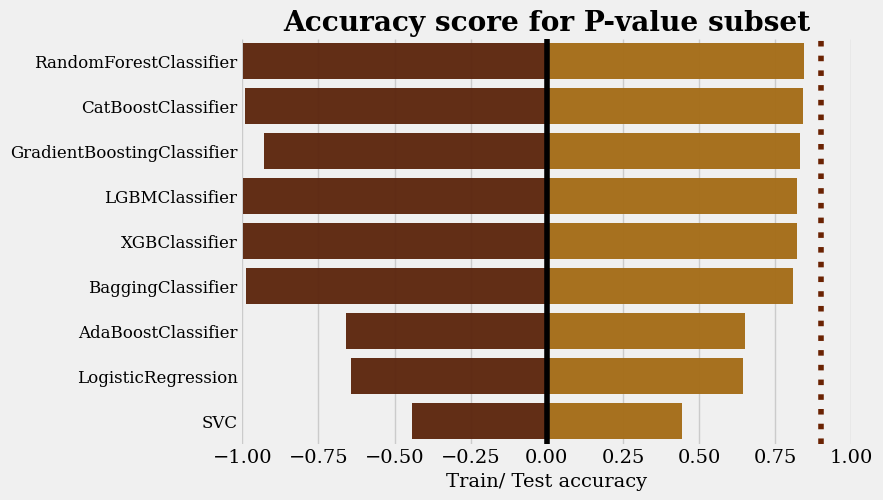

In [67]:
plotscoring(score_pval,'P-value subset',axvline=.9)

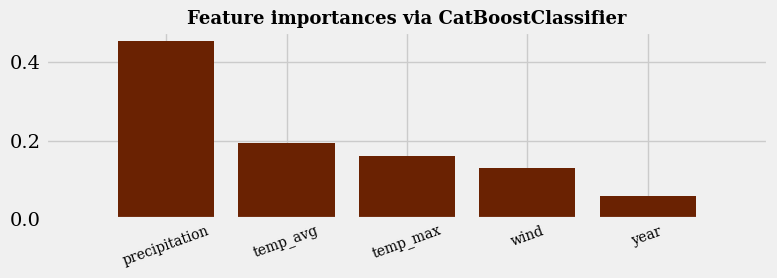

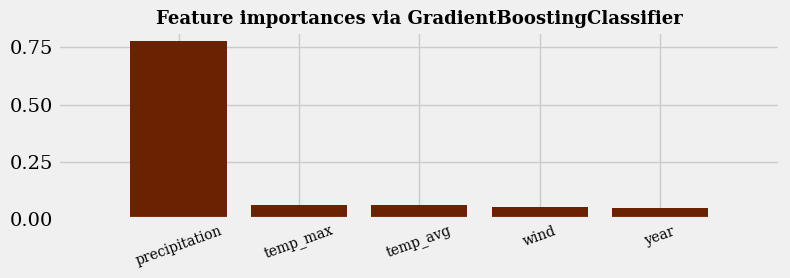

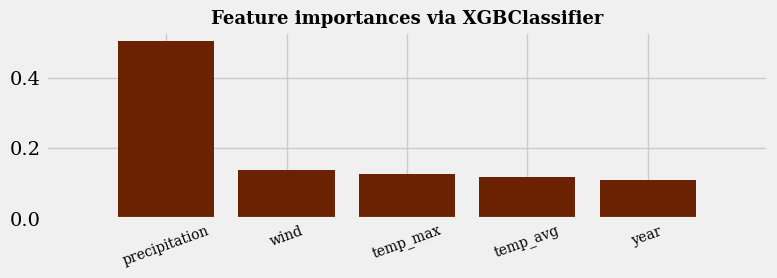

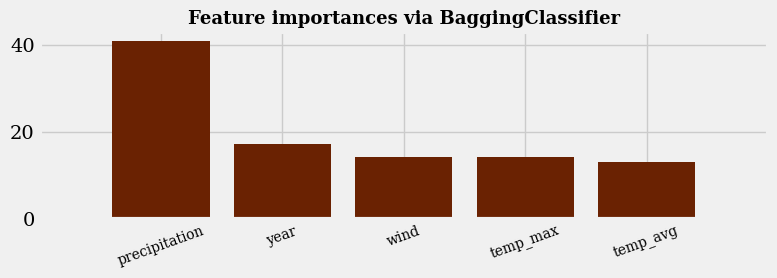

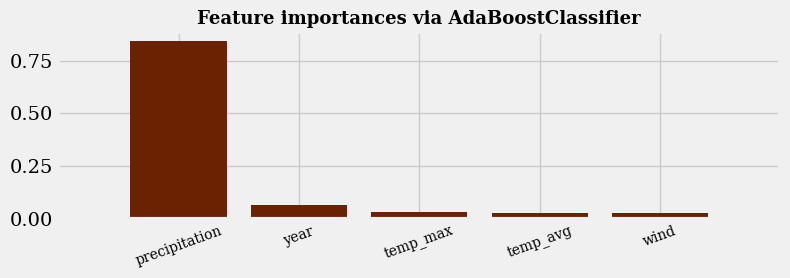

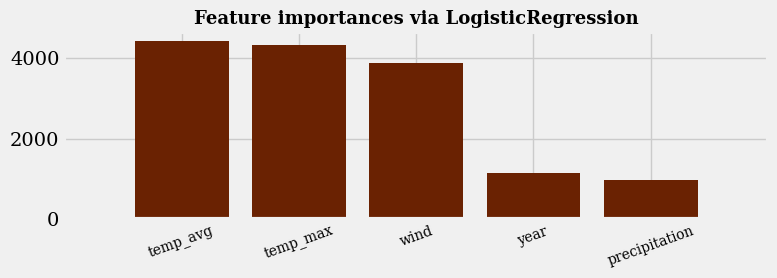

In [68]:
plotting_importances(score_pval,imp_pval,X[setpval],rotation=20)

In [69]:
edaset=["precipitation","temp_avg","month","wind","year"]
score_eda,imp_eda=selectmoran(modellst,X[edaset])

Learning rate set to 0.080097
0:	learn: 1.4220597	total: 2.19ms	remaining: 2.19s
1:	learn: 1.3021185	total: 5.23ms	remaining: 2.61s
2:	learn: 1.1974579	total: 7.63ms	remaining: 2.53s
3:	learn: 1.1131894	total: 10.3ms	remaining: 2.58s
4:	learn: 1.0320751	total: 12.2ms	remaining: 2.44s
5:	learn: 0.9648522	total: 14ms	remaining: 2.32s
6:	learn: 0.9153179	total: 17.1ms	remaining: 2.42s
7:	learn: 0.8728787	total: 19.4ms	remaining: 2.4s
8:	learn: 0.8316815	total: 22.2ms	remaining: 2.45s
9:	learn: 0.7946982	total: 24.7ms	remaining: 2.45s
10:	learn: 0.7622515	total: 26.9ms	remaining: 2.42s
11:	learn: 0.7316548	total: 29.2ms	remaining: 2.4s
12:	learn: 0.7040677	total: 31.3ms	remaining: 2.37s
13:	learn: 0.6809531	total: 33.3ms	remaining: 2.35s
14:	learn: 0.6592918	total: 35.3ms	remaining: 2.32s
15:	learn: 0.6381536	total: 37.9ms	remaining: 2.33s
16:	learn: 0.6205553	total: 40ms	remaining: 2.31s
17:	learn: 0.6036801	total: 42ms	remaining: 2.29s
18:	learn: 0.5887566	total: 44.6ms	remaining: 2.3s
1

232:	learn: 0.2490720	total: 586ms	remaining: 1.93s
233:	learn: 0.2486434	total: 588ms	remaining: 1.92s
234:	learn: 0.2483102	total: 589ms	remaining: 1.92s
235:	learn: 0.2478038	total: 591ms	remaining: 1.91s
236:	learn: 0.2472295	total: 594ms	remaining: 1.91s
237:	learn: 0.2469173	total: 596ms	remaining: 1.91s
238:	learn: 0.2462155	total: 599ms	remaining: 1.91s
239:	learn: 0.2457726	total: 602ms	remaining: 1.91s
240:	learn: 0.2454222	total: 605ms	remaining: 1.91s
241:	learn: 0.2450847	total: 607ms	remaining: 1.9s
242:	learn: 0.2446247	total: 608ms	remaining: 1.9s
243:	learn: 0.2443139	total: 610ms	remaining: 1.89s
244:	learn: 0.2439989	total: 612ms	remaining: 1.89s
245:	learn: 0.2435526	total: 614ms	remaining: 1.88s
246:	learn: 0.2430699	total: 616ms	remaining: 1.88s
247:	learn: 0.2424119	total: 618ms	remaining: 1.87s
248:	learn: 0.2421556	total: 620ms	remaining: 1.87s
249:	learn: 0.2414976	total: 623ms	remaining: 1.87s
250:	learn: 0.2410130	total: 625ms	remaining: 1.86s
251:	learn: 0.

402:	learn: 0.1890879	total: 979ms	remaining: 1.45s
403:	learn: 0.1888162	total: 981ms	remaining: 1.45s
404:	learn: 0.1885439	total: 983ms	remaining: 1.44s
405:	learn: 0.1881820	total: 985ms	remaining: 1.44s
406:	learn: 0.1877843	total: 988ms	remaining: 1.44s
407:	learn: 0.1875630	total: 990ms	remaining: 1.44s
408:	learn: 0.1874296	total: 992ms	remaining: 1.43s
409:	learn: 0.1872295	total: 994ms	remaining: 1.43s
410:	learn: 0.1869444	total: 996ms	remaining: 1.43s
411:	learn: 0.1867087	total: 999ms	remaining: 1.43s
412:	learn: 0.1864773	total: 1s	remaining: 1.42s
413:	learn: 0.1860909	total: 1s	remaining: 1.42s
414:	learn: 0.1857895	total: 1.01s	remaining: 1.42s
415:	learn: 0.1854404	total: 1.01s	remaining: 1.42s
416:	learn: 0.1849684	total: 1.01s	remaining: 1.41s
417:	learn: 0.1848677	total: 1.01s	remaining: 1.41s
418:	learn: 0.1846885	total: 1.01s	remaining: 1.41s
419:	learn: 0.1845257	total: 1.02s	remaining: 1.41s
420:	learn: 0.1842502	total: 1.02s	remaining: 1.4s
421:	learn: 0.18411

574:	learn: 0.1498064	total: 1.36s	remaining: 1.01s
575:	learn: 0.1496347	total: 1.37s	remaining: 1.01s
576:	learn: 0.1494301	total: 1.37s	remaining: 1s
577:	learn: 0.1492555	total: 1.37s	remaining: 1s
578:	learn: 0.1490655	total: 1.37s	remaining: 998ms
579:	learn: 0.1488613	total: 1.37s	remaining: 995ms
580:	learn: 0.1487072	total: 1.38s	remaining: 993ms
581:	learn: 0.1485498	total: 1.38s	remaining: 990ms
582:	learn: 0.1484095	total: 1.38s	remaining: 988ms
583:	learn: 0.1482305	total: 1.38s	remaining: 985ms
584:	learn: 0.1480528	total: 1.39s	remaining: 983ms
585:	learn: 0.1478475	total: 1.39s	remaining: 980ms
586:	learn: 0.1476299	total: 1.39s	remaining: 978ms
587:	learn: 0.1474712	total: 1.39s	remaining: 975ms
588:	learn: 0.1473585	total: 1.39s	remaining: 973ms
589:	learn: 0.1471287	total: 1.4s	remaining: 970ms
590:	learn: 0.1468448	total: 1.4s	remaining: 968ms
591:	learn: 0.1466548	total: 1.4s	remaining: 965ms
592:	learn: 0.1464112	total: 1.4s	remaining: 962ms
593:	learn: 0.1462107	

754:	learn: 0.1215651	total: 1.75s	remaining: 567ms
755:	learn: 0.1214003	total: 1.75s	remaining: 565ms
756:	learn: 0.1212565	total: 1.75s	remaining: 563ms
757:	learn: 0.1211622	total: 1.75s	remaining: 561ms
758:	learn: 0.1210010	total: 1.76s	remaining: 558ms
759:	learn: 0.1208353	total: 1.76s	remaining: 556ms
760:	learn: 0.1206769	total: 1.76s	remaining: 554ms
761:	learn: 0.1205750	total: 1.77s	remaining: 552ms
762:	learn: 0.1204536	total: 1.77s	remaining: 549ms
763:	learn: 0.1203562	total: 1.77s	remaining: 547ms
764:	learn: 0.1202776	total: 1.77s	remaining: 545ms
765:	learn: 0.1201859	total: 1.78s	remaining: 543ms
766:	learn: 0.1200882	total: 1.78s	remaining: 540ms
767:	learn: 0.1199825	total: 1.78s	remaining: 538ms
768:	learn: 0.1198572	total: 1.78s	remaining: 536ms
769:	learn: 0.1197208	total: 1.78s	remaining: 533ms
770:	learn: 0.1196141	total: 1.79s	remaining: 531ms
771:	learn: 0.1195090	total: 1.79s	remaining: 529ms
772:	learn: 0.1193816	total: 1.79s	remaining: 527ms
773:	learn: 

921:	learn: 0.1028337	total: 2.15s	remaining: 181ms
922:	learn: 0.1027294	total: 2.15s	remaining: 179ms
923:	learn: 0.1026389	total: 2.15s	remaining: 177ms
924:	learn: 0.1025466	total: 2.15s	remaining: 175ms
925:	learn: 0.1024599	total: 2.16s	remaining: 172ms
926:	learn: 0.1023143	total: 2.16s	remaining: 170ms
927:	learn: 0.1022463	total: 2.16s	remaining: 168ms
928:	learn: 0.1021749	total: 2.17s	remaining: 166ms
929:	learn: 0.1020384	total: 2.17s	remaining: 163ms
930:	learn: 0.1019289	total: 2.17s	remaining: 161ms
931:	learn: 0.1018830	total: 2.18s	remaining: 159ms
932:	learn: 0.1017947	total: 2.18s	remaining: 157ms
933:	learn: 0.1017259	total: 2.18s	remaining: 154ms
934:	learn: 0.1016303	total: 2.19s	remaining: 152ms
935:	learn: 0.1015934	total: 2.19s	remaining: 150ms
936:	learn: 0.1014762	total: 2.19s	remaining: 147ms
937:	learn: 0.1013833	total: 2.19s	remaining: 145ms
938:	learn: 0.1012930	total: 2.2s	remaining: 143ms
939:	learn: 0.1012002	total: 2.2s	remaining: 141ms
940:	learn: 0.

155:	learn: 0.2937339	total: 311ms	remaining: 1.68s
156:	learn: 0.2931134	total: 313ms	remaining: 1.68s
157:	learn: 0.2925167	total: 315ms	remaining: 1.68s
158:	learn: 0.2917832	total: 318ms	remaining: 1.68s
159:	learn: 0.2909580	total: 320ms	remaining: 1.68s
160:	learn: 0.2902304	total: 322ms	remaining: 1.68s
161:	learn: 0.2898104	total: 324ms	remaining: 1.68s
162:	learn: 0.2890828	total: 327ms	remaining: 1.68s
163:	learn: 0.2886566	total: 329ms	remaining: 1.67s
164:	learn: 0.2879125	total: 331ms	remaining: 1.67s
165:	learn: 0.2871570	total: 333ms	remaining: 1.67s
166:	learn: 0.2866821	total: 335ms	remaining: 1.67s
167:	learn: 0.2859477	total: 337ms	remaining: 1.67s
168:	learn: 0.2854630	total: 339ms	remaining: 1.67s
169:	learn: 0.2851300	total: 341ms	remaining: 1.67s
170:	learn: 0.2848103	total: 343ms	remaining: 1.66s
171:	learn: 0.2842961	total: 345ms	remaining: 1.66s
172:	learn: 0.2838272	total: 347ms	remaining: 1.66s
173:	learn: 0.2830463	total: 350ms	remaining: 1.66s
174:	learn: 

329:	learn: 0.2120180	total: 693ms	remaining: 1.41s
330:	learn: 0.2117150	total: 695ms	remaining: 1.41s
331:	learn: 0.2114894	total: 697ms	remaining: 1.4s
332:	learn: 0.2110985	total: 700ms	remaining: 1.4s
333:	learn: 0.2108440	total: 702ms	remaining: 1.4s
334:	learn: 0.2105692	total: 704ms	remaining: 1.4s
335:	learn: 0.2103778	total: 706ms	remaining: 1.4s
336:	learn: 0.2101678	total: 709ms	remaining: 1.39s
337:	learn: 0.2098484	total: 711ms	remaining: 1.39s
338:	learn: 0.2095990	total: 713ms	remaining: 1.39s
339:	learn: 0.2091789	total: 715ms	remaining: 1.39s
340:	learn: 0.2088594	total: 717ms	remaining: 1.39s
341:	learn: 0.2085825	total: 719ms	remaining: 1.38s
342:	learn: 0.2081450	total: 721ms	remaining: 1.38s
343:	learn: 0.2078134	total: 724ms	remaining: 1.38s
344:	learn: 0.2074732	total: 726ms	remaining: 1.38s
345:	learn: 0.2072542	total: 728ms	remaining: 1.38s
346:	learn: 0.2069145	total: 730ms	remaining: 1.37s
347:	learn: 0.2067317	total: 732ms	remaining: 1.37s
348:	learn: 0.206

550:	learn: 0.1560723	total: 1.27s	remaining: 1.04s
551:	learn: 0.1558757	total: 1.28s	remaining: 1.04s
552:	learn: 0.1556443	total: 1.28s	remaining: 1.03s
553:	learn: 0.1553594	total: 1.28s	remaining: 1.03s
554:	learn: 0.1552473	total: 1.28s	remaining: 1.03s
555:	learn: 0.1550581	total: 1.29s	remaining: 1.03s
556:	learn: 0.1548341	total: 1.29s	remaining: 1.03s
557:	learn: 0.1546942	total: 1.29s	remaining: 1.02s
558:	learn: 0.1545506	total: 1.29s	remaining: 1.02s
559:	learn: 0.1544145	total: 1.3s	remaining: 1.02s
560:	learn: 0.1540654	total: 1.3s	remaining: 1.02s
561:	learn: 0.1539523	total: 1.3s	remaining: 1.01s
562:	learn: 0.1536532	total: 1.3s	remaining: 1.01s
563:	learn: 0.1534689	total: 1.3s	remaining: 1.01s
564:	learn: 0.1533217	total: 1.31s	remaining: 1.01s
565:	learn: 0.1529964	total: 1.31s	remaining: 1s
566:	learn: 0.1528859	total: 1.31s	remaining: 1s
567:	learn: 0.1526747	total: 1.31s	remaining: 999ms
568:	learn: 0.1523020	total: 1.31s	remaining: 997ms
569:	learn: 0.1521636	t

720:	learn: 0.1277394	total: 1.66s	remaining: 643ms
721:	learn: 0.1276485	total: 1.66s	remaining: 641ms
722:	learn: 0.1275788	total: 1.67s	remaining: 639ms
723:	learn: 0.1274072	total: 1.67s	remaining: 636ms
724:	learn: 0.1273230	total: 1.67s	remaining: 634ms
725:	learn: 0.1271540	total: 1.67s	remaining: 631ms
726:	learn: 0.1270648	total: 1.68s	remaining: 629ms
727:	learn: 0.1268914	total: 1.68s	remaining: 627ms
728:	learn: 0.1267223	total: 1.68s	remaining: 624ms
729:	learn: 0.1266070	total: 1.68s	remaining: 622ms
730:	learn: 0.1264219	total: 1.68s	remaining: 620ms
731:	learn: 0.1263020	total: 1.69s	remaining: 617ms
732:	learn: 0.1261585	total: 1.69s	remaining: 615ms
733:	learn: 0.1259604	total: 1.69s	remaining: 613ms
734:	learn: 0.1258530	total: 1.69s	remaining: 610ms
735:	learn: 0.1257022	total: 1.69s	remaining: 608ms
736:	learn: 0.1255495	total: 1.7s	remaining: 606ms
737:	learn: 0.1254355	total: 1.7s	remaining: 603ms
738:	learn: 0.1253375	total: 1.7s	remaining: 601ms
739:	learn: 0.1

927:	learn: 0.1037404	total: 2.25s	remaining: 174ms
928:	learn: 0.1036321	total: 2.25s	remaining: 172ms
929:	learn: 0.1035474	total: 2.25s	remaining: 170ms
930:	learn: 0.1034047	total: 2.25s	remaining: 167ms
931:	learn: 0.1033025	total: 2.26s	remaining: 165ms
932:	learn: 0.1032489	total: 2.26s	remaining: 162ms
933:	learn: 0.1031434	total: 2.26s	remaining: 160ms
934:	learn: 0.1030492	total: 2.26s	remaining: 157ms
935:	learn: 0.1030119	total: 2.27s	remaining: 155ms
936:	learn: 0.1029411	total: 2.27s	remaining: 153ms
937:	learn: 0.1028570	total: 2.27s	remaining: 150ms
938:	learn: 0.1027081	total: 2.27s	remaining: 148ms
939:	learn: 0.1025773	total: 2.28s	remaining: 145ms
940:	learn: 0.1025009	total: 2.28s	remaining: 143ms
941:	learn: 0.1024295	total: 2.28s	remaining: 140ms
942:	learn: 0.1023706	total: 2.28s	remaining: 138ms
943:	learn: 0.1022656	total: 2.29s	remaining: 136ms
944:	learn: 0.1022053	total: 2.29s	remaining: 133ms
945:	learn: 0.1020912	total: 2.29s	remaining: 131ms
946:	learn: 

93:	learn: 0.3574240	total: 198ms	remaining: 1.91s
94:	learn: 0.3562954	total: 200ms	remaining: 1.9s
95:	learn: 0.3551221	total: 202ms	remaining: 1.9s
96:	learn: 0.3544678	total: 205ms	remaining: 1.91s
97:	learn: 0.3534988	total: 207ms	remaining: 1.9s
98:	learn: 0.3521358	total: 210ms	remaining: 1.91s
99:	learn: 0.3511054	total: 212ms	remaining: 1.91s
100:	learn: 0.3498597	total: 214ms	remaining: 1.91s
101:	learn: 0.3487641	total: 217ms	remaining: 1.91s
102:	learn: 0.3475819	total: 219ms	remaining: 1.91s
103:	learn: 0.3464323	total: 221ms	remaining: 1.91s
104:	learn: 0.3459479	total: 223ms	remaining: 1.9s
105:	learn: 0.3450381	total: 225ms	remaining: 1.9s
106:	learn: 0.3436439	total: 227ms	remaining: 1.9s
107:	learn: 0.3427027	total: 229ms	remaining: 1.89s
108:	learn: 0.3416754	total: 231ms	remaining: 1.89s
109:	learn: 0.3406451	total: 233ms	remaining: 1.89s
110:	learn: 0.3400338	total: 235ms	remaining: 1.89s
111:	learn: 0.3393331	total: 238ms	remaining: 1.88s
112:	learn: 0.3382579	tot

261:	learn: 0.2442898	total: 589ms	remaining: 1.66s
262:	learn: 0.2436353	total: 591ms	remaining: 1.66s
263:	learn: 0.2432823	total: 593ms	remaining: 1.65s
264:	learn: 0.2428423	total: 595ms	remaining: 1.65s
265:	learn: 0.2423637	total: 596ms	remaining: 1.65s
266:	learn: 0.2418900	total: 598ms	remaining: 1.64s
267:	learn: 0.2413419	total: 600ms	remaining: 1.64s
268:	learn: 0.2411994	total: 602ms	remaining: 1.63s
269:	learn: 0.2406288	total: 603ms	remaining: 1.63s
270:	learn: 0.2402125	total: 605ms	remaining: 1.63s
271:	learn: 0.2401143	total: 607ms	remaining: 1.62s
272:	learn: 0.2396763	total: 608ms	remaining: 1.62s
273:	learn: 0.2391316	total: 610ms	remaining: 1.62s
274:	learn: 0.2384486	total: 612ms	remaining: 1.61s
275:	learn: 0.2379272	total: 614ms	remaining: 1.61s
276:	learn: 0.2375711	total: 616ms	remaining: 1.61s
277:	learn: 0.2370398	total: 617ms	remaining: 1.6s
278:	learn: 0.2367125	total: 619ms	remaining: 1.6s
279:	learn: 0.2363691	total: 621ms	remaining: 1.6s
280:	learn: 0.2

422:	learn: 0.1887121	total: 978ms	remaining: 1.33s
423:	learn: 0.1884552	total: 981ms	remaining: 1.33s
424:	learn: 0.1881692	total: 983ms	remaining: 1.33s
425:	learn: 0.1878471	total: 985ms	remaining: 1.33s
426:	learn: 0.1875592	total: 987ms	remaining: 1.32s
427:	learn: 0.1872542	total: 989ms	remaining: 1.32s
428:	learn: 0.1870349	total: 992ms	remaining: 1.32s
429:	learn: 0.1867829	total: 994ms	remaining: 1.32s
430:	learn: 0.1865072	total: 996ms	remaining: 1.31s
431:	learn: 0.1861922	total: 998ms	remaining: 1.31s
432:	learn: 0.1859957	total: 1s	remaining: 1.31s
433:	learn: 0.1856689	total: 1s	remaining: 1.31s
434:	learn: 0.1853336	total: 1s	remaining: 1.3s
435:	learn: 0.1852320	total: 1s	remaining: 1.3s
436:	learn: 0.1849204	total: 1.01s	remaining: 1.3s
437:	learn: 0.1846637	total: 1.01s	remaining: 1.3s
438:	learn: 0.1843726	total: 1.01s	remaining: 1.29s
439:	learn: 0.1841820	total: 1.01s	remaining: 1.29s
440:	learn: 0.1839806	total: 1.02s	remaining: 1.29s
441:	learn: 0.1838049	total:

609:	learn: 0.1473829	total: 1.36s	remaining: 870ms
610:	learn: 0.1472723	total: 1.36s	remaining: 868ms
611:	learn: 0.1470323	total: 1.36s	remaining: 865ms
612:	learn: 0.1468819	total: 1.37s	remaining: 863ms
613:	learn: 0.1467115	total: 1.37s	remaining: 861ms
614:	learn: 0.1465355	total: 1.37s	remaining: 858ms
615:	learn: 0.1462776	total: 1.37s	remaining: 855ms
616:	learn: 0.1460726	total: 1.37s	remaining: 853ms
617:	learn: 0.1459401	total: 1.38s	remaining: 851ms
618:	learn: 0.1457668	total: 1.38s	remaining: 848ms
619:	learn: 0.1455335	total: 1.38s	remaining: 846ms
620:	learn: 0.1453908	total: 1.38s	remaining: 844ms
621:	learn: 0.1452190	total: 1.38s	remaining: 841ms
622:	learn: 0.1450415	total: 1.39s	remaining: 839ms
623:	learn: 0.1449274	total: 1.39s	remaining: 836ms
624:	learn: 0.1447244	total: 1.39s	remaining: 834ms
625:	learn: 0.1446074	total: 1.39s	remaining: 832ms
626:	learn: 0.1444078	total: 1.39s	remaining: 829ms
627:	learn: 0.1441935	total: 1.4s	remaining: 827ms
628:	learn: 0

789:	learn: 0.1184482	total: 1.75s	remaining: 466ms
790:	learn: 0.1183122	total: 1.75s	remaining: 464ms
791:	learn: 0.1181881	total: 1.76s	remaining: 462ms
792:	learn: 0.1180930	total: 1.76s	remaining: 459ms
793:	learn: 0.1179429	total: 1.76s	remaining: 457ms
794:	learn: 0.1178439	total: 1.76s	remaining: 455ms
795:	learn: 0.1177539	total: 1.77s	remaining: 453ms
796:	learn: 0.1176887	total: 1.77s	remaining: 450ms
797:	learn: 0.1175687	total: 1.77s	remaining: 448ms
798:	learn: 0.1174984	total: 1.77s	remaining: 446ms
799:	learn: 0.1173083	total: 1.77s	remaining: 444ms
800:	learn: 0.1172023	total: 1.78s	remaining: 441ms
801:	learn: 0.1171028	total: 1.78s	remaining: 439ms
802:	learn: 0.1169522	total: 1.78s	remaining: 437ms
803:	learn: 0.1168308	total: 1.78s	remaining: 434ms
804:	learn: 0.1167177	total: 1.78s	remaining: 432ms
805:	learn: 0.1165386	total: 1.78s	remaining: 430ms
806:	learn: 0.1163684	total: 1.79s	remaining: 428ms
807:	learn: 0.1162931	total: 1.79s	remaining: 425ms
808:	learn: 

980:	learn: 0.0985834	total: 2.15s	remaining: 41.7ms
981:	learn: 0.0984952	total: 2.16s	remaining: 39.5ms
982:	learn: 0.0983443	total: 2.16s	remaining: 37.3ms
983:	learn: 0.0982935	total: 2.16s	remaining: 35.1ms
984:	learn: 0.0981860	total: 2.16s	remaining: 32.9ms
985:	learn: 0.0980279	total: 2.16s	remaining: 30.7ms
986:	learn: 0.0979422	total: 2.17s	remaining: 28.5ms
987:	learn: 0.0978743	total: 2.17s	remaining: 26.3ms
988:	learn: 0.0978326	total: 2.17s	remaining: 24.1ms
989:	learn: 0.0977548	total: 2.17s	remaining: 21.9ms
990:	learn: 0.0976486	total: 2.17s	remaining: 19.7ms
991:	learn: 0.0975585	total: 2.18s	remaining: 17.5ms
992:	learn: 0.0974687	total: 2.18s	remaining: 15.4ms
993:	learn: 0.0973595	total: 2.18s	remaining: 13.2ms
994:	learn: 0.0973213	total: 2.18s	remaining: 11ms
995:	learn: 0.0972061	total: 2.18s	remaining: 8.77ms
996:	learn: 0.0971202	total: 2.19s	remaining: 6.58ms
997:	learn: 0.0970074	total: 2.19s	remaining: 4.38ms
998:	learn: 0.0968955	total: 2.19s	remaining: 2.

228:	learn: 0.2514401	total: 501ms	remaining: 1.69s
229:	learn: 0.2510052	total: 504ms	remaining: 1.69s
230:	learn: 0.2506767	total: 506ms	remaining: 1.68s
231:	learn: 0.2504831	total: 507ms	remaining: 1.68s
232:	learn: 0.2497438	total: 510ms	remaining: 1.68s
233:	learn: 0.2492342	total: 512ms	remaining: 1.68s
234:	learn: 0.2487392	total: 514ms	remaining: 1.67s
235:	learn: 0.2482810	total: 516ms	remaining: 1.67s
236:	learn: 0.2479628	total: 518ms	remaining: 1.67s
237:	learn: 0.2475379	total: 520ms	remaining: 1.67s
238:	learn: 0.2470420	total: 522ms	remaining: 1.66s
239:	learn: 0.2465271	total: 524ms	remaining: 1.66s
240:	learn: 0.2462192	total: 526ms	remaining: 1.66s
241:	learn: 0.2457139	total: 528ms	remaining: 1.66s
242:	learn: 0.2451570	total: 530ms	remaining: 1.65s
243:	learn: 0.2447611	total: 532ms	remaining: 1.65s
244:	learn: 0.2443715	total: 534ms	remaining: 1.65s
245:	learn: 0.2439023	total: 536ms	remaining: 1.64s
246:	learn: 0.2435899	total: 538ms	remaining: 1.64s
247:	learn: 

418:	learn: 0.1861259	total: 892ms	remaining: 1.24s
419:	learn: 0.1859545	total: 894ms	remaining: 1.23s
420:	learn: 0.1856934	total: 896ms	remaining: 1.23s
421:	learn: 0.1853050	total: 898ms	remaining: 1.23s
422:	learn: 0.1850112	total: 901ms	remaining: 1.23s
423:	learn: 0.1847359	total: 903ms	remaining: 1.23s
424:	learn: 0.1844868	total: 905ms	remaining: 1.22s
425:	learn: 0.1842458	total: 907ms	remaining: 1.22s
426:	learn: 0.1840570	total: 910ms	remaining: 1.22s
427:	learn: 0.1839595	total: 913ms	remaining: 1.22s
428:	learn: 0.1836519	total: 915ms	remaining: 1.22s
429:	learn: 0.1833797	total: 916ms	remaining: 1.21s
430:	learn: 0.1830740	total: 918ms	remaining: 1.21s
431:	learn: 0.1827929	total: 920ms	remaining: 1.21s
432:	learn: 0.1824649	total: 922ms	remaining: 1.21s
433:	learn: 0.1821266	total: 923ms	remaining: 1.2s
434:	learn: 0.1818058	total: 925ms	remaining: 1.2s
435:	learn: 0.1815813	total: 927ms	remaining: 1.2s
436:	learn: 0.1813674	total: 929ms	remaining: 1.2s
437:	learn: 0.18

622:	learn: 0.1434418	total: 1.28s	remaining: 777ms
623:	learn: 0.1432650	total: 1.28s	remaining: 775ms
624:	learn: 0.1429918	total: 1.29s	remaining: 773ms
625:	learn: 0.1428650	total: 1.29s	remaining: 771ms
626:	learn: 0.1426810	total: 1.29s	remaining: 769ms
627:	learn: 0.1423977	total: 1.29s	remaining: 767ms
628:	learn: 0.1422763	total: 1.3s	remaining: 765ms
629:	learn: 0.1421056	total: 1.3s	remaining: 763ms
630:	learn: 0.1419009	total: 1.3s	remaining: 760ms
631:	learn: 0.1417805	total: 1.3s	remaining: 758ms
632:	learn: 0.1416761	total: 1.3s	remaining: 756ms
633:	learn: 0.1415167	total: 1.31s	remaining: 754ms
634:	learn: 0.1413762	total: 1.31s	remaining: 752ms
635:	learn: 0.1413021	total: 1.31s	remaining: 750ms
636:	learn: 0.1411869	total: 1.31s	remaining: 748ms
637:	learn: 0.1410774	total: 1.31s	remaining: 746ms
638:	learn: 0.1409067	total: 1.32s	remaining: 744ms
639:	learn: 0.1407886	total: 1.32s	remaining: 742ms
640:	learn: 0.1406753	total: 1.32s	remaining: 740ms
641:	learn: 0.140

805:	learn: 0.1175480	total: 1.66s	remaining: 401ms
806:	learn: 0.1174882	total: 1.67s	remaining: 399ms
807:	learn: 0.1173959	total: 1.67s	remaining: 397ms
808:	learn: 0.1172757	total: 1.67s	remaining: 395ms
809:	learn: 0.1171924	total: 1.67s	remaining: 393ms
810:	learn: 0.1171191	total: 1.68s	remaining: 391ms
811:	learn: 0.1170202	total: 1.68s	remaining: 389ms
812:	learn: 0.1169360	total: 1.68s	remaining: 387ms
813:	learn: 0.1167819	total: 1.68s	remaining: 384ms
814:	learn: 0.1166664	total: 1.68s	remaining: 382ms
815:	learn: 0.1165977	total: 1.69s	remaining: 380ms
816:	learn: 0.1164587	total: 1.69s	remaining: 378ms
817:	learn: 0.1163911	total: 1.69s	remaining: 376ms
818:	learn: 0.1162522	total: 1.69s	remaining: 374ms
819:	learn: 0.1161612	total: 1.7s	remaining: 372ms
820:	learn: 0.1160768	total: 1.7s	remaining: 370ms
821:	learn: 0.1159320	total: 1.7s	remaining: 368ms
822:	learn: 0.1158061	total: 1.7s	remaining: 366ms
823:	learn: 0.1156459	total: 1.7s	remaining: 364ms
824:	learn: 0.115

Learning rate set to 0.0801
0:	learn: 1.4258508	total: 2.19ms	remaining: 2.19s
1:	learn: 1.3005765	total: 4.02ms	remaining: 2s
2:	learn: 1.1922664	total: 5.83ms	remaining: 1.94s
3:	learn: 1.1106950	total: 7.59ms	remaining: 1.89s
4:	learn: 1.0307426	total: 8.8ms	remaining: 1.75s
5:	learn: 0.9676506	total: 10.7ms	remaining: 1.77s
6:	learn: 0.9125785	total: 12.7ms	remaining: 1.8s
7:	learn: 0.8652442	total: 14.3ms	remaining: 1.78s
8:	learn: 0.8243683	total: 16.2ms	remaining: 1.79s
9:	learn: 0.7887856	total: 17.9ms	remaining: 1.78s
10:	learn: 0.7583396	total: 19.6ms	remaining: 1.76s
11:	learn: 0.7304714	total: 21.2ms	remaining: 1.75s
12:	learn: 0.7046262	total: 23ms	remaining: 1.75s
13:	learn: 0.6783822	total: 24.8ms	remaining: 1.75s
14:	learn: 0.6587478	total: 26.9ms	remaining: 1.77s
15:	learn: 0.6402653	total: 28.9ms	remaining: 1.78s
16:	learn: 0.6228338	total: 31ms	remaining: 1.79s
17:	learn: 0.6073211	total: 32.7ms	remaining: 1.79s
18:	learn: 0.5919695	total: 34.3ms	remaining: 1.77s
19:

181:	learn: 0.2777529	total: 389ms	remaining: 1.75s
182:	learn: 0.2771052	total: 392ms	remaining: 1.75s
183:	learn: 0.2763245	total: 394ms	remaining: 1.75s
184:	learn: 0.2759128	total: 396ms	remaining: 1.74s
185:	learn: 0.2750829	total: 399ms	remaining: 1.75s
186:	learn: 0.2744792	total: 402ms	remaining: 1.75s
187:	learn: 0.2739151	total: 404ms	remaining: 1.75s
188:	learn: 0.2731174	total: 406ms	remaining: 1.74s
189:	learn: 0.2725837	total: 408ms	remaining: 1.74s
190:	learn: 0.2719442	total: 410ms	remaining: 1.74s
191:	learn: 0.2713452	total: 412ms	remaining: 1.73s
192:	learn: 0.2708216	total: 414ms	remaining: 1.73s
193:	learn: 0.2704287	total: 416ms	remaining: 1.73s
194:	learn: 0.2699929	total: 419ms	remaining: 1.73s
195:	learn: 0.2695212	total: 421ms	remaining: 1.73s
196:	learn: 0.2691669	total: 423ms	remaining: 1.72s
197:	learn: 0.2687287	total: 425ms	remaining: 1.72s
198:	learn: 0.2682434	total: 427ms	remaining: 1.72s
199:	learn: 0.2676797	total: 429ms	remaining: 1.71s
200:	learn: 

366:	learn: 0.1984180	total: 772ms	remaining: 1.33s
367:	learn: 0.1981149	total: 774ms	remaining: 1.33s
368:	learn: 0.1978140	total: 776ms	remaining: 1.33s
369:	learn: 0.1975983	total: 778ms	remaining: 1.32s
370:	learn: 0.1971646	total: 780ms	remaining: 1.32s
371:	learn: 0.1968137	total: 782ms	remaining: 1.32s
372:	learn: 0.1965037	total: 783ms	remaining: 1.32s
373:	learn: 0.1964238	total: 785ms	remaining: 1.31s
374:	learn: 0.1961284	total: 787ms	remaining: 1.31s
375:	learn: 0.1957862	total: 789ms	remaining: 1.31s
376:	learn: 0.1956378	total: 791ms	remaining: 1.31s
377:	learn: 0.1953256	total: 793ms	remaining: 1.3s
378:	learn: 0.1951213	total: 794ms	remaining: 1.3s
379:	learn: 0.1946850	total: 796ms	remaining: 1.3s
380:	learn: 0.1944745	total: 798ms	remaining: 1.3s
381:	learn: 0.1941987	total: 800ms	remaining: 1.29s
382:	learn: 0.1938994	total: 802ms	remaining: 1.29s
383:	learn: 0.1935257	total: 804ms	remaining: 1.29s
384:	learn: 0.1932578	total: 805ms	remaining: 1.29s
385:	learn: 0.19

554:	learn: 0.1512385	total: 1.16s	remaining: 930ms
555:	learn: 0.1509770	total: 1.16s	remaining: 928ms
556:	learn: 0.1507514	total: 1.16s	remaining: 926ms
557:	learn: 0.1505438	total: 1.17s	remaining: 924ms
558:	learn: 0.1503908	total: 1.17s	remaining: 922ms
559:	learn: 0.1502887	total: 1.17s	remaining: 920ms
560:	learn: 0.1501893	total: 1.17s	remaining: 918ms
561:	learn: 0.1500402	total: 1.18s	remaining: 916ms
562:	learn: 0.1498732	total: 1.18s	remaining: 914ms
563:	learn: 0.1497291	total: 1.18s	remaining: 912ms
564:	learn: 0.1495023	total: 1.18s	remaining: 910ms
565:	learn: 0.1492043	total: 1.18s	remaining: 908ms
566:	learn: 0.1490311	total: 1.19s	remaining: 906ms
567:	learn: 0.1488603	total: 1.19s	remaining: 903ms
568:	learn: 0.1486704	total: 1.19s	remaining: 901ms
569:	learn: 0.1485205	total: 1.19s	remaining: 899ms
570:	learn: 0.1482776	total: 1.19s	remaining: 897ms
571:	learn: 0.1480894	total: 1.2s	remaining: 895ms
572:	learn: 0.1479672	total: 1.2s	remaining: 892ms
573:	learn: 0.

731:	learn: 0.1225832	total: 1.54s	remaining: 565ms
732:	learn: 0.1223522	total: 1.54s	remaining: 563ms
733:	learn: 0.1221920	total: 1.55s	remaining: 561ms
734:	learn: 0.1220508	total: 1.55s	remaining: 559ms
735:	learn: 0.1218542	total: 1.55s	remaining: 557ms
736:	learn: 0.1216735	total: 1.55s	remaining: 555ms
737:	learn: 0.1215257	total: 1.56s	remaining: 553ms
738:	learn: 0.1214366	total: 1.56s	remaining: 550ms
739:	learn: 0.1213370	total: 1.56s	remaining: 548ms
740:	learn: 0.1211984	total: 1.56s	remaining: 546ms
741:	learn: 0.1210738	total: 1.56s	remaining: 544ms
742:	learn: 0.1209892	total: 1.57s	remaining: 542ms
743:	learn: 0.1207473	total: 1.57s	remaining: 540ms
744:	learn: 0.1206400	total: 1.57s	remaining: 538ms
745:	learn: 0.1204423	total: 1.57s	remaining: 536ms
746:	learn: 0.1202308	total: 1.57s	remaining: 533ms
747:	learn: 0.1201267	total: 1.58s	remaining: 531ms
748:	learn: 0.1200389	total: 1.58s	remaining: 529ms
749:	learn: 0.1199434	total: 1.58s	remaining: 527ms
750:	learn: 

916:	learn: 0.1010183	total: 1.94s	remaining: 175ms
917:	learn: 0.1009019	total: 1.94s	remaining: 173ms
918:	learn: 0.1007651	total: 1.94s	remaining: 171ms
919:	learn: 0.1006932	total: 1.94s	remaining: 169ms
920:	learn: 0.1006379	total: 1.95s	remaining: 167ms
921:	learn: 0.1005499	total: 1.95s	remaining: 165ms
922:	learn: 0.1004570	total: 1.95s	remaining: 163ms
923:	learn: 0.1003665	total: 1.95s	remaining: 161ms
924:	learn: 0.1002479	total: 1.96s	remaining: 159ms
925:	learn: 0.1001918	total: 1.96s	remaining: 156ms
926:	learn: 0.1001257	total: 1.96s	remaining: 154ms
927:	learn: 0.0999803	total: 1.96s	remaining: 152ms
928:	learn: 0.0998661	total: 1.96s	remaining: 150ms
929:	learn: 0.0997720	total: 1.96s	remaining: 148ms
930:	learn: 0.0996546	total: 1.97s	remaining: 146ms
931:	learn: 0.0995286	total: 1.97s	remaining: 144ms
932:	learn: 0.0994306	total: 1.97s	remaining: 142ms
933:	learn: 0.0993034	total: 1.97s	remaining: 139ms
934:	learn: 0.0992308	total: 1.98s	remaining: 137ms
935:	learn: 

93:	learn: 0.3537303	total: 190ms	remaining: 1.83s
94:	learn: 0.3526529	total: 193ms	remaining: 1.84s
95:	learn: 0.3519256	total: 195ms	remaining: 1.83s
96:	learn: 0.3506066	total: 197ms	remaining: 1.83s
97:	learn: 0.3498437	total: 200ms	remaining: 1.84s
98:	learn: 0.3492939	total: 202ms	remaining: 1.84s
99:	learn: 0.3481589	total: 205ms	remaining: 1.84s
100:	learn: 0.3476348	total: 207ms	remaining: 1.84s
101:	learn: 0.3463433	total: 209ms	remaining: 1.84s
102:	learn: 0.3453224	total: 211ms	remaining: 1.83s
103:	learn: 0.3440312	total: 213ms	remaining: 1.84s
104:	learn: 0.3427934	total: 215ms	remaining: 1.83s
105:	learn: 0.3417717	total: 217ms	remaining: 1.83s
106:	learn: 0.3406505	total: 219ms	remaining: 1.83s
107:	learn: 0.3397073	total: 222ms	remaining: 1.83s
108:	learn: 0.3386119	total: 224ms	remaining: 1.83s
109:	learn: 0.3375024	total: 226ms	remaining: 1.83s
110:	learn: 0.3364163	total: 229ms	remaining: 1.83s
111:	learn: 0.3356130	total: 231ms	remaining: 1.83s
112:	learn: 0.33454

275:	learn: 0.2355210	total: 569ms	remaining: 1.49s
276:	learn: 0.2348969	total: 571ms	remaining: 1.49s
277:	learn: 0.2343719	total: 573ms	remaining: 1.49s
278:	learn: 0.2338438	total: 575ms	remaining: 1.49s
279:	learn: 0.2332151	total: 577ms	remaining: 1.48s
280:	learn: 0.2329052	total: 579ms	remaining: 1.48s
281:	learn: 0.2325720	total: 581ms	remaining: 1.48s
282:	learn: 0.2321619	total: 583ms	remaining: 1.48s
283:	learn: 0.2317732	total: 585ms	remaining: 1.48s
284:	learn: 0.2313988	total: 587ms	remaining: 1.47s
285:	learn: 0.2308834	total: 589ms	remaining: 1.47s
286:	learn: 0.2305885	total: 591ms	remaining: 1.47s
287:	learn: 0.2299866	total: 593ms	remaining: 1.47s
288:	learn: 0.2296174	total: 595ms	remaining: 1.46s
289:	learn: 0.2293626	total: 597ms	remaining: 1.46s
290:	learn: 0.2286710	total: 599ms	remaining: 1.46s
291:	learn: 0.2283742	total: 601ms	remaining: 1.46s
292:	learn: 0.2280291	total: 602ms	remaining: 1.45s
293:	learn: 0.2275365	total: 604ms	remaining: 1.45s
294:	learn: 

465:	learn: 0.1745796	total: 952ms	remaining: 1.09s
466:	learn: 0.1743634	total: 955ms	remaining: 1.09s
467:	learn: 0.1740964	total: 957ms	remaining: 1.09s
468:	learn: 0.1737316	total: 959ms	remaining: 1.08s
469:	learn: 0.1735892	total: 961ms	remaining: 1.08s
470:	learn: 0.1734347	total: 963ms	remaining: 1.08s
471:	learn: 0.1731910	total: 965ms	remaining: 1.08s
472:	learn: 0.1730410	total: 968ms	remaining: 1.08s
473:	learn: 0.1726976	total: 970ms	remaining: 1.08s
474:	learn: 0.1725403	total: 972ms	remaining: 1.07s
475:	learn: 0.1723360	total: 974ms	remaining: 1.07s
476:	learn: 0.1721470	total: 976ms	remaining: 1.07s
477:	learn: 0.1719675	total: 978ms	remaining: 1.07s
478:	learn: 0.1716755	total: 980ms	remaining: 1.07s
479:	learn: 0.1714762	total: 982ms	remaining: 1.06s
480:	learn: 0.1713338	total: 984ms	remaining: 1.06s
481:	learn: 0.1711600	total: 986ms	remaining: 1.06s
482:	learn: 0.1709548	total: 988ms	remaining: 1.06s
483:	learn: 0.1707828	total: 990ms	remaining: 1.05s
484:	learn: 

644:	learn: 0.1399750	total: 1.33s	remaining: 735ms
645:	learn: 0.1397904	total: 1.34s	remaining: 733ms
646:	learn: 0.1396088	total: 1.34s	remaining: 731ms
647:	learn: 0.1393777	total: 1.34s	remaining: 729ms
648:	learn: 0.1392879	total: 1.34s	remaining: 727ms
649:	learn: 0.1391300	total: 1.34s	remaining: 725ms
650:	learn: 0.1388473	total: 1.35s	remaining: 723ms
651:	learn: 0.1387048	total: 1.35s	remaining: 721ms
652:	learn: 0.1385767	total: 1.35s	remaining: 719ms
653:	learn: 0.1383935	total: 1.35s	remaining: 716ms
654:	learn: 0.1382553	total: 1.36s	remaining: 714ms
655:	learn: 0.1381119	total: 1.36s	remaining: 712ms
656:	learn: 0.1380143	total: 1.36s	remaining: 710ms
657:	learn: 0.1377595	total: 1.36s	remaining: 708ms
658:	learn: 0.1376099	total: 1.36s	remaining: 706ms
659:	learn: 0.1374620	total: 1.36s	remaining: 704ms
660:	learn: 0.1373419	total: 1.37s	remaining: 701ms
661:	learn: 0.1372155	total: 1.37s	remaining: 699ms
662:	learn: 0.1370338	total: 1.37s	remaining: 697ms
663:	learn: 

847:	learn: 0.1125641	total: 1.75s	remaining: 313ms
848:	learn: 0.1124529	total: 1.75s	remaining: 311ms
849:	learn: 0.1123559	total: 1.75s	remaining: 309ms
850:	learn: 0.1122735	total: 1.75s	remaining: 307ms
851:	learn: 0.1121780	total: 1.75s	remaining: 305ms
852:	learn: 0.1120659	total: 1.76s	remaining: 303ms
853:	learn: 0.1119793	total: 1.76s	remaining: 301ms
854:	learn: 0.1118509	total: 1.76s	remaining: 299ms
855:	learn: 0.1117683	total: 1.76s	remaining: 297ms
856:	learn: 0.1116420	total: 1.77s	remaining: 295ms
857:	learn: 0.1115005	total: 1.77s	remaining: 293ms
858:	learn: 0.1114066	total: 1.77s	remaining: 291ms
859:	learn: 0.1113383	total: 1.77s	remaining: 289ms
860:	learn: 0.1112106	total: 1.78s	remaining: 287ms
861:	learn: 0.1111216	total: 1.78s	remaining: 285ms
862:	learn: 0.1109608	total: 1.78s	remaining: 283ms
863:	learn: 0.1109191	total: 1.78s	remaining: 281ms
864:	learn: 0.1107971	total: 1.78s	remaining: 279ms
865:	learn: 0.1106950	total: 1.79s	remaining: 276ms
866:	learn: 

19:	learn: 0.5838907	total: 43.3ms	remaining: 2.12s
20:	learn: 0.5726493	total: 45.6ms	remaining: 2.13s
21:	learn: 0.5618978	total: 47.8ms	remaining: 2.12s
22:	learn: 0.5510223	total: 50.1ms	remaining: 2.13s
23:	learn: 0.5411976	total: 52.1ms	remaining: 2.12s
24:	learn: 0.5311367	total: 54ms	remaining: 2.1s
25:	learn: 0.5236947	total: 56ms	remaining: 2.1s
26:	learn: 0.5146899	total: 58ms	remaining: 2.09s
27:	learn: 0.5070209	total: 60ms	remaining: 2.08s
28:	learn: 0.4989671	total: 61.9ms	remaining: 2.07s
29:	learn: 0.4926830	total: 63.9ms	remaining: 2.07s
30:	learn: 0.4842703	total: 66.1ms	remaining: 2.07s
31:	learn: 0.4778711	total: 68.1ms	remaining: 2.06s
32:	learn: 0.4715882	total: 70.1ms	remaining: 2.05s
33:	learn: 0.4661874	total: 72.2ms	remaining: 2.05s
34:	learn: 0.4625578	total: 74.1ms	remaining: 2.04s
35:	learn: 0.4585396	total: 76.2ms	remaining: 2.04s
36:	learn: 0.4543488	total: 78.1ms	remaining: 2.03s
37:	learn: 0.4505460	total: 80.1ms	remaining: 2.03s
38:	learn: 0.4472505	t

212:	learn: 0.2662566	total: 435ms	remaining: 1.61s
213:	learn: 0.2657242	total: 437ms	remaining: 1.6s
214:	learn: 0.2651303	total: 439ms	remaining: 1.6s
215:	learn: 0.2647421	total: 441ms	remaining: 1.6s
216:	learn: 0.2645327	total: 443ms	remaining: 1.6s
217:	learn: 0.2640983	total: 445ms	remaining: 1.6s
218:	learn: 0.2635569	total: 447ms	remaining: 1.59s
219:	learn: 0.2628586	total: 449ms	remaining: 1.59s
220:	learn: 0.2625372	total: 451ms	remaining: 1.59s
221:	learn: 0.2620774	total: 453ms	remaining: 1.59s
222:	learn: 0.2615118	total: 455ms	remaining: 1.58s
223:	learn: 0.2610284	total: 456ms	remaining: 1.58s
224:	learn: 0.2607130	total: 458ms	remaining: 1.58s
225:	learn: 0.2599371	total: 460ms	remaining: 1.58s
226:	learn: 0.2594335	total: 462ms	remaining: 1.57s
227:	learn: 0.2589368	total: 464ms	remaining: 1.57s
228:	learn: 0.2582045	total: 467ms	remaining: 1.57s
229:	learn: 0.2577581	total: 469ms	remaining: 1.57s
230:	learn: 0.2573292	total: 470ms	remaining: 1.56s
231:	learn: 0.256

400:	learn: 0.1922345	total: 835ms	remaining: 1.25s
401:	learn: 0.1919552	total: 837ms	remaining: 1.25s
402:	learn: 0.1917907	total: 839ms	remaining: 1.24s
403:	learn: 0.1916155	total: 841ms	remaining: 1.24s
404:	learn: 0.1914220	total: 843ms	remaining: 1.24s
405:	learn: 0.1911711	total: 845ms	remaining: 1.24s
406:	learn: 0.1909221	total: 847ms	remaining: 1.23s
407:	learn: 0.1906321	total: 849ms	remaining: 1.23s
408:	learn: 0.1904186	total: 851ms	remaining: 1.23s
409:	learn: 0.1900859	total: 853ms	remaining: 1.23s
410:	learn: 0.1898455	total: 855ms	remaining: 1.23s
411:	learn: 0.1895427	total: 857ms	remaining: 1.22s
412:	learn: 0.1889699	total: 859ms	remaining: 1.22s
413:	learn: 0.1887208	total: 861ms	remaining: 1.22s
414:	learn: 0.1884613	total: 863ms	remaining: 1.22s
415:	learn: 0.1880964	total: 865ms	remaining: 1.21s
416:	learn: 0.1878365	total: 867ms	remaining: 1.21s
417:	learn: 0.1875296	total: 869ms	remaining: 1.21s
418:	learn: 0.1873168	total: 871ms	remaining: 1.21s
419:	learn: 

589:	learn: 0.1495254	total: 1.22s	remaining: 847ms
590:	learn: 0.1492710	total: 1.22s	remaining: 845ms
591:	learn: 0.1490727	total: 1.22s	remaining: 843ms
592:	learn: 0.1488117	total: 1.23s	remaining: 841ms
593:	learn: 0.1486489	total: 1.23s	remaining: 839ms
594:	learn: 0.1485290	total: 1.23s	remaining: 837ms
595:	learn: 0.1483280	total: 1.23s	remaining: 835ms
596:	learn: 0.1482054	total: 1.23s	remaining: 833ms
597:	learn: 0.1480849	total: 1.24s	remaining: 830ms
598:	learn: 0.1479532	total: 1.24s	remaining: 828ms
599:	learn: 0.1478383	total: 1.24s	remaining: 826ms
600:	learn: 0.1475904	total: 1.24s	remaining: 824ms
601:	learn: 0.1472524	total: 1.24s	remaining: 822ms
602:	learn: 0.1471700	total: 1.25s	remaining: 820ms
603:	learn: 0.1469910	total: 1.25s	remaining: 818ms
604:	learn: 0.1467457	total: 1.25s	remaining: 815ms
605:	learn: 0.1465497	total: 1.25s	remaining: 813ms
606:	learn: 0.1463791	total: 1.25s	remaining: 811ms
607:	learn: 0.1461356	total: 1.25s	remaining: 809ms
608:	learn: 

782:	learn: 0.1193901	total: 1.61s	remaining: 446ms
783:	learn: 0.1191967	total: 1.61s	remaining: 444ms
784:	learn: 0.1190436	total: 1.61s	remaining: 442ms
785:	learn: 0.1189675	total: 1.61s	remaining: 440ms
786:	learn: 0.1188686	total: 1.62s	remaining: 438ms
787:	learn: 0.1187313	total: 1.62s	remaining: 435ms
788:	learn: 0.1185807	total: 1.62s	remaining: 433ms
789:	learn: 0.1184292	total: 1.62s	remaining: 431ms
790:	learn: 0.1182419	total: 1.62s	remaining: 429ms
791:	learn: 0.1181026	total: 1.63s	remaining: 427ms
792:	learn: 0.1179817	total: 1.63s	remaining: 425ms
793:	learn: 0.1178275	total: 1.63s	remaining: 423ms
794:	learn: 0.1177047	total: 1.63s	remaining: 421ms
795:	learn: 0.1175538	total: 1.63s	remaining: 419ms
796:	learn: 0.1174614	total: 1.64s	remaining: 417ms
797:	learn: 0.1173225	total: 1.64s	remaining: 415ms
798:	learn: 0.1171543	total: 1.64s	remaining: 413ms
799:	learn: 0.1170631	total: 1.64s	remaining: 411ms
800:	learn: 0.1169312	total: 1.65s	remaining: 409ms
801:	learn: 

961:	learn: 0.0998958	total: 2s	remaining: 79.2ms
962:	learn: 0.0998432	total: 2.01s	remaining: 77.1ms
963:	learn: 0.0997026	total: 2.01s	remaining: 75.1ms
964:	learn: 0.0996063	total: 2.01s	remaining: 73ms
965:	learn: 0.0995166	total: 2.01s	remaining: 70.9ms
966:	learn: 0.0994192	total: 2.02s	remaining: 68.8ms
967:	learn: 0.0993380	total: 2.02s	remaining: 66.7ms
968:	learn: 0.0992185	total: 2.02s	remaining: 64.6ms
969:	learn: 0.0991230	total: 2.02s	remaining: 62.6ms
970:	learn: 0.0990180	total: 2.02s	remaining: 60.5ms
971:	learn: 0.0989096	total: 2.03s	remaining: 58.4ms
972:	learn: 0.0988159	total: 2.03s	remaining: 56.3ms
973:	learn: 0.0987343	total: 2.03s	remaining: 54.2ms
974:	learn: 0.0986661	total: 2.03s	remaining: 52.1ms
975:	learn: 0.0985777	total: 2.04s	remaining: 50.1ms
976:	learn: 0.0984725	total: 2.04s	remaining: 48ms
977:	learn: 0.0983854	total: 2.04s	remaining: 45.9ms
978:	learn: 0.0983105	total: 2.04s	remaining: 43.8ms
979:	learn: 0.0981376	total: 2.04s	remaining: 41.7ms


176:	learn: 0.2810372	total: 450ms	remaining: 2.09s
177:	learn: 0.2805867	total: 452ms	remaining: 2.09s
178:	learn: 0.2801061	total: 454ms	remaining: 2.08s
179:	learn: 0.2793055	total: 456ms	remaining: 2.08s
180:	learn: 0.2789399	total: 459ms	remaining: 2.07s
181:	learn: 0.2783368	total: 461ms	remaining: 2.07s
182:	learn: 0.2779012	total: 463ms	remaining: 2.07s
183:	learn: 0.2772189	total: 465ms	remaining: 2.06s
184:	learn: 0.2766338	total: 467ms	remaining: 2.06s
185:	learn: 0.2760208	total: 469ms	remaining: 2.05s
186:	learn: 0.2753661	total: 471ms	remaining: 2.05s
187:	learn: 0.2746747	total: 473ms	remaining: 2.04s
188:	learn: 0.2740506	total: 475ms	remaining: 2.04s
189:	learn: 0.2736653	total: 477ms	remaining: 2.03s
190:	learn: 0.2730347	total: 479ms	remaining: 2.03s
191:	learn: 0.2725141	total: 481ms	remaining: 2.02s
192:	learn: 0.2720888	total: 483ms	remaining: 2.02s
193:	learn: 0.2715542	total: 484ms	remaining: 2.01s
194:	learn: 0.2710665	total: 486ms	remaining: 2.01s
195:	learn: 

357:	learn: 0.2041619	total: 839ms	remaining: 1.5s
358:	learn: 0.2038580	total: 841ms	remaining: 1.5s
359:	learn: 0.2034798	total: 843ms	remaining: 1.5s
360:	learn: 0.2030278	total: 845ms	remaining: 1.5s
361:	learn: 0.2026735	total: 848ms	remaining: 1.49s
362:	learn: 0.2023704	total: 850ms	remaining: 1.49s
363:	learn: 0.2018503	total: 853ms	remaining: 1.49s
364:	learn: 0.2016044	total: 854ms	remaining: 1.49s
365:	learn: 0.2012767	total: 857ms	remaining: 1.48s
366:	learn: 0.2007152	total: 859ms	remaining: 1.48s
367:	learn: 0.2002459	total: 861ms	remaining: 1.48s
368:	learn: 0.2000171	total: 863ms	remaining: 1.48s
369:	learn: 0.1997602	total: 865ms	remaining: 1.47s
370:	learn: 0.1994857	total: 867ms	remaining: 1.47s
371:	learn: 0.1991847	total: 869ms	remaining: 1.47s
372:	learn: 0.1987666	total: 871ms	remaining: 1.46s
373:	learn: 0.1983834	total: 873ms	remaining: 1.46s
374:	learn: 0.1982068	total: 874ms	remaining: 1.46s
375:	learn: 0.1980191	total: 876ms	remaining: 1.45s
376:	learn: 0.19

566:	learn: 0.1519083	total: 1.23s	remaining: 941ms
567:	learn: 0.1516838	total: 1.23s	remaining: 938ms
568:	learn: 0.1515752	total: 1.24s	remaining: 936ms
569:	learn: 0.1514331	total: 1.24s	remaining: 933ms
570:	learn: 0.1513236	total: 1.24s	remaining: 931ms
571:	learn: 0.1511201	total: 1.24s	remaining: 928ms
572:	learn: 0.1509782	total: 1.24s	remaining: 926ms
573:	learn: 0.1507845	total: 1.24s	remaining: 923ms
574:	learn: 0.1506641	total: 1.25s	remaining: 921ms
575:	learn: 0.1504515	total: 1.25s	remaining: 919ms
576:	learn: 0.1501483	total: 1.25s	remaining: 916ms
577:	learn: 0.1498947	total: 1.25s	remaining: 914ms
578:	learn: 0.1497108	total: 1.25s	remaining: 911ms
579:	learn: 0.1495260	total: 1.25s	remaining: 909ms
580:	learn: 0.1493976	total: 1.26s	remaining: 907ms
581:	learn: 0.1492485	total: 1.26s	remaining: 904ms
582:	learn: 0.1491211	total: 1.26s	remaining: 902ms
583:	learn: 0.1490268	total: 1.26s	remaining: 899ms
584:	learn: 0.1488724	total: 1.26s	remaining: 897ms
585:	learn: 

761:	learn: 0.1202639	total: 1.62s	remaining: 505ms
762:	learn: 0.1201236	total: 1.62s	remaining: 503ms
763:	learn: 0.1199693	total: 1.62s	remaining: 501ms
764:	learn: 0.1197517	total: 1.62s	remaining: 499ms
765:	learn: 0.1196461	total: 1.62s	remaining: 496ms
766:	learn: 0.1195055	total: 1.63s	remaining: 494ms
767:	learn: 0.1193842	total: 1.63s	remaining: 492ms
768:	learn: 0.1192769	total: 1.63s	remaining: 490ms
769:	learn: 0.1191845	total: 1.63s	remaining: 488ms
770:	learn: 0.1190712	total: 1.63s	remaining: 486ms
771:	learn: 0.1188769	total: 1.64s	remaining: 483ms
772:	learn: 0.1187393	total: 1.64s	remaining: 481ms
773:	learn: 0.1186015	total: 1.64s	remaining: 479ms
774:	learn: 0.1185017	total: 1.64s	remaining: 477ms
775:	learn: 0.1183813	total: 1.64s	remaining: 475ms
776:	learn: 0.1182175	total: 1.65s	remaining: 473ms
777:	learn: 0.1180743	total: 1.65s	remaining: 470ms
778:	learn: 0.1178674	total: 1.65s	remaining: 468ms
779:	learn: 0.1177661	total: 1.65s	remaining: 466ms
780:	learn: 

964:	learn: 0.0982022	total: 2s	remaining: 72.7ms
965:	learn: 0.0981101	total: 2.01s	remaining: 70.7ms
966:	learn: 0.0980228	total: 2.01s	remaining: 68.6ms
967:	learn: 0.0979521	total: 2.01s	remaining: 66.5ms
968:	learn: 0.0977742	total: 2.01s	remaining: 64.4ms
969:	learn: 0.0977146	total: 2.02s	remaining: 62.3ms
970:	learn: 0.0976081	total: 2.02s	remaining: 60.3ms
971:	learn: 0.0975113	total: 2.02s	remaining: 58.2ms
972:	learn: 0.0974325	total: 2.02s	remaining: 56.1ms
973:	learn: 0.0973479	total: 2.02s	remaining: 54ms
974:	learn: 0.0972694	total: 2.02s	remaining: 51.9ms
975:	learn: 0.0972144	total: 2.03s	remaining: 49.8ms
976:	learn: 0.0970698	total: 2.03s	remaining: 47.7ms
977:	learn: 0.0969730	total: 2.03s	remaining: 45.7ms
978:	learn: 0.0968448	total: 2.03s	remaining: 43.6ms
979:	learn: 0.0967673	total: 2.03s	remaining: 41.5ms
980:	learn: 0.0966826	total: 2.04s	remaining: 39.4ms
981:	learn: 0.0965857	total: 2.04s	remaining: 37.3ms
982:	learn: 0.0965122	total: 2.04s	remaining: 35.3m

211:	learn: 0.2663931	total: 470ms	remaining: 1.75s
212:	learn: 0.2658398	total: 472ms	remaining: 1.75s
213:	learn: 0.2653502	total: 475ms	remaining: 1.74s
214:	learn: 0.2650569	total: 476ms	remaining: 1.74s
215:	learn: 0.2646109	total: 478ms	remaining: 1.74s
216:	learn: 0.2642243	total: 480ms	remaining: 1.73s
217:	learn: 0.2636146	total: 482ms	remaining: 1.73s
218:	learn: 0.2632699	total: 484ms	remaining: 1.73s
219:	learn: 0.2629871	total: 486ms	remaining: 1.72s
220:	learn: 0.2624421	total: 488ms	remaining: 1.72s
221:	learn: 0.2620200	total: 490ms	remaining: 1.72s
222:	learn: 0.2613849	total: 492ms	remaining: 1.71s
223:	learn: 0.2608962	total: 494ms	remaining: 1.71s
224:	learn: 0.2602812	total: 496ms	remaining: 1.71s
225:	learn: 0.2596370	total: 498ms	remaining: 1.71s
226:	learn: 0.2592203	total: 500ms	remaining: 1.7s
227:	learn: 0.2588799	total: 502ms	remaining: 1.7s
228:	learn: 0.2585955	total: 504ms	remaining: 1.7s
229:	learn: 0.2582328	total: 506ms	remaining: 1.69s
230:	learn: 0.2

400:	learn: 0.1972162	total: 857ms	remaining: 1.28s
401:	learn: 0.1966773	total: 859ms	remaining: 1.28s
402:	learn: 0.1964344	total: 861ms	remaining: 1.27s
403:	learn: 0.1962412	total: 864ms	remaining: 1.27s
404:	learn: 0.1956693	total: 867ms	remaining: 1.27s
405:	learn: 0.1952904	total: 871ms	remaining: 1.27s
406:	learn: 0.1948584	total: 874ms	remaining: 1.27s
407:	learn: 0.1945231	total: 877ms	remaining: 1.27s
408:	learn: 0.1942341	total: 879ms	remaining: 1.27s
409:	learn: 0.1938922	total: 881ms	remaining: 1.27s
410:	learn: 0.1937704	total: 884ms	remaining: 1.27s
411:	learn: 0.1933392	total: 886ms	remaining: 1.26s
412:	learn: 0.1930636	total: 888ms	remaining: 1.26s
413:	learn: 0.1926270	total: 891ms	remaining: 1.26s
414:	learn: 0.1923319	total: 892ms	remaining: 1.26s
415:	learn: 0.1920682	total: 894ms	remaining: 1.25s
416:	learn: 0.1918182	total: 896ms	remaining: 1.25s
417:	learn: 0.1914976	total: 897ms	remaining: 1.25s
418:	learn: 0.1912790	total: 899ms	remaining: 1.25s
419:	learn: 

596:	learn: 0.1523827	total: 1.26s	remaining: 850ms
597:	learn: 0.1522504	total: 1.26s	remaining: 848ms
598:	learn: 0.1521475	total: 1.26s	remaining: 847ms
599:	learn: 0.1518498	total: 1.27s	remaining: 845ms
600:	learn: 0.1516244	total: 1.27s	remaining: 843ms
601:	learn: 0.1514856	total: 1.27s	remaining: 841ms
602:	learn: 0.1513123	total: 1.27s	remaining: 839ms
603:	learn: 0.1510625	total: 1.27s	remaining: 837ms
604:	learn: 0.1508921	total: 1.28s	remaining: 834ms
605:	learn: 0.1507504	total: 1.28s	remaining: 832ms
606:	learn: 0.1506181	total: 1.28s	remaining: 830ms
607:	learn: 0.1503539	total: 1.28s	remaining: 828ms
608:	learn: 0.1501580	total: 1.28s	remaining: 825ms
609:	learn: 0.1500210	total: 1.29s	remaining: 823ms
610:	learn: 0.1498382	total: 1.29s	remaining: 821ms
611:	learn: 0.1496765	total: 1.29s	remaining: 819ms
612:	learn: 0.1495082	total: 1.29s	remaining: 816ms
613:	learn: 0.1492992	total: 1.29s	remaining: 814ms
614:	learn: 0.1491865	total: 1.3s	remaining: 812ms
615:	learn: 0

775:	learn: 0.1258564	total: 1.65s	remaining: 477ms
776:	learn: 0.1257722	total: 1.66s	remaining: 476ms
777:	learn: 0.1256552	total: 1.66s	remaining: 474ms
778:	learn: 0.1255497	total: 1.66s	remaining: 472ms
779:	learn: 0.1254055	total: 1.67s	remaining: 471ms
780:	learn: 0.1252847	total: 1.67s	remaining: 469ms
781:	learn: 0.1251467	total: 1.68s	remaining: 468ms
782:	learn: 0.1249285	total: 1.68s	remaining: 466ms
783:	learn: 0.1247852	total: 1.68s	remaining: 464ms
784:	learn: 0.1245910	total: 1.69s	remaining: 462ms
785:	learn: 0.1244832	total: 1.69s	remaining: 460ms
786:	learn: 0.1243171	total: 1.69s	remaining: 458ms
787:	learn: 0.1241733	total: 1.69s	remaining: 456ms
788:	learn: 0.1241312	total: 1.7s	remaining: 454ms
789:	learn: 0.1240352	total: 1.7s	remaining: 452ms
790:	learn: 0.1239141	total: 1.7s	remaining: 449ms
791:	learn: 0.1238481	total: 1.7s	remaining: 447ms
792:	learn: 0.1237611	total: 1.71s	remaining: 445ms
793:	learn: 0.1236818	total: 1.71s	remaining: 443ms
794:	learn: 0.12

951:	learn: 0.1065154	total: 2.04s	remaining: 103ms
952:	learn: 0.1064076	total: 2.04s	remaining: 101ms
953:	learn: 0.1062924	total: 2.05s	remaining: 98.7ms
954:	learn: 0.1062423	total: 2.05s	remaining: 96.6ms
955:	learn: 0.1061350	total: 2.05s	remaining: 94.4ms
956:	learn: 0.1059944	total: 2.05s	remaining: 92.3ms
957:	learn: 0.1059289	total: 2.06s	remaining: 90.1ms
958:	learn: 0.1058583	total: 2.06s	remaining: 88ms
959:	learn: 0.1056901	total: 2.06s	remaining: 85.8ms
960:	learn: 0.1055828	total: 2.06s	remaining: 83.7ms
961:	learn: 0.1054552	total: 2.06s	remaining: 81.5ms
962:	learn: 0.1053506	total: 2.06s	remaining: 79.3ms
963:	learn: 0.1052330	total: 2.07s	remaining: 77.2ms
964:	learn: 0.1051517	total: 2.07s	remaining: 75ms
965:	learn: 0.1050131	total: 2.07s	remaining: 72.9ms
966:	learn: 0.1048767	total: 2.07s	remaining: 70.7ms
967:	learn: 0.1047226	total: 2.08s	remaining: 68.6ms
968:	learn: 0.1045676	total: 2.08s	remaining: 66.4ms
969:	learn: 0.1045033	total: 2.08s	remaining: 64.3ms

124:	learn: 0.3283879	total: 249ms	remaining: 1.74s
125:	learn: 0.3275015	total: 251ms	remaining: 1.74s
126:	learn: 0.3265603	total: 252ms	remaining: 1.73s
127:	learn: 0.3259321	total: 255ms	remaining: 1.74s
128:	learn: 0.3251903	total: 256ms	remaining: 1.73s
129:	learn: 0.3239950	total: 258ms	remaining: 1.73s
130:	learn: 0.3227647	total: 261ms	remaining: 1.73s
131:	learn: 0.3220869	total: 264ms	remaining: 1.73s
132:	learn: 0.3208854	total: 265ms	remaining: 1.73s
133:	learn: 0.3198664	total: 267ms	remaining: 1.72s
134:	learn: 0.3191046	total: 269ms	remaining: 1.72s
135:	learn: 0.3182837	total: 270ms	remaining: 1.72s
136:	learn: 0.3175660	total: 272ms	remaining: 1.71s
137:	learn: 0.3164022	total: 274ms	remaining: 1.71s
138:	learn: 0.3156526	total: 276ms	remaining: 1.71s
139:	learn: 0.3145126	total: 278ms	remaining: 1.71s
140:	learn: 0.3138621	total: 280ms	remaining: 1.7s
141:	learn: 0.3133510	total: 281ms	remaining: 1.7s
142:	learn: 0.3129525	total: 283ms	remaining: 1.7s
143:	learn: 0.3

336:	learn: 0.2149945	total: 642ms	remaining: 1.26s
337:	learn: 0.2144638	total: 644ms	remaining: 1.26s
338:	learn: 0.2143213	total: 646ms	remaining: 1.26s
339:	learn: 0.2140823	total: 648ms	remaining: 1.26s
340:	learn: 0.2135517	total: 650ms	remaining: 1.26s
341:	learn: 0.2131750	total: 653ms	remaining: 1.25s
342:	learn: 0.2128123	total: 655ms	remaining: 1.25s
343:	learn: 0.2126331	total: 656ms	remaining: 1.25s
344:	learn: 0.2122486	total: 658ms	remaining: 1.25s
345:	learn: 0.2120462	total: 660ms	remaining: 1.25s
346:	learn: 0.2118308	total: 662ms	remaining: 1.25s
347:	learn: 0.2115999	total: 663ms	remaining: 1.24s
348:	learn: 0.2112836	total: 665ms	remaining: 1.24s
349:	learn: 0.2109849	total: 667ms	remaining: 1.24s
350:	learn: 0.2107428	total: 669ms	remaining: 1.24s
351:	learn: 0.2103939	total: 671ms	remaining: 1.23s
352:	learn: 0.2100612	total: 673ms	remaining: 1.23s
353:	learn: 0.2097413	total: 674ms	remaining: 1.23s
354:	learn: 0.2094082	total: 676ms	remaining: 1.23s
355:	learn: 

543:	learn: 0.1620629	total: 1.03s	remaining: 865ms
544:	learn: 0.1618357	total: 1.03s	remaining: 863ms
545:	learn: 0.1616725	total: 1.03s	remaining: 861ms
546:	learn: 0.1614977	total: 1.04s	remaining: 859ms
547:	learn: 0.1614002	total: 1.04s	remaining: 857ms
548:	learn: 0.1611156	total: 1.04s	remaining: 856ms
549:	learn: 0.1609895	total: 1.04s	remaining: 854ms
550:	learn: 0.1607901	total: 1.04s	remaining: 852ms
551:	learn: 0.1605369	total: 1.05s	remaining: 850ms
552:	learn: 0.1603598	total: 1.05s	remaining: 848ms
553:	learn: 0.1601466	total: 1.05s	remaining: 846ms
554:	learn: 0.1599784	total: 1.05s	remaining: 844ms
555:	learn: 0.1598570	total: 1.05s	remaining: 842ms
556:	learn: 0.1597201	total: 1.05s	remaining: 840ms
557:	learn: 0.1594595	total: 1.06s	remaining: 838ms
558:	learn: 0.1592259	total: 1.06s	remaining: 836ms
559:	learn: 0.1588509	total: 1.06s	remaining: 834ms
560:	learn: 0.1587248	total: 1.06s	remaining: 832ms
561:	learn: 0.1585365	total: 1.06s	remaining: 830ms
562:	learn: 

759:	learn: 0.1264897	total: 1.43s	remaining: 453ms
760:	learn: 0.1263139	total: 1.44s	remaining: 451ms
761:	learn: 0.1261955	total: 1.44s	remaining: 449ms
762:	learn: 0.1260789	total: 1.44s	remaining: 447ms
763:	learn: 0.1259595	total: 1.44s	remaining: 445ms
764:	learn: 0.1258483	total: 1.44s	remaining: 443ms
765:	learn: 0.1256651	total: 1.45s	remaining: 442ms
766:	learn: 0.1255273	total: 1.45s	remaining: 440ms
767:	learn: 0.1253642	total: 1.45s	remaining: 438ms
768:	learn: 0.1252988	total: 1.45s	remaining: 436ms
769:	learn: 0.1251640	total: 1.45s	remaining: 434ms
770:	learn: 0.1249759	total: 1.45s	remaining: 432ms
771:	learn: 0.1248522	total: 1.46s	remaining: 430ms
772:	learn: 0.1246549	total: 1.46s	remaining: 428ms
773:	learn: 0.1244767	total: 1.46s	remaining: 426ms
774:	learn: 0.1243396	total: 1.46s	remaining: 424ms
775:	learn: 0.1241798	total: 1.46s	remaining: 422ms
776:	learn: 0.1240447	total: 1.47s	remaining: 420ms
777:	learn: 0.1239012	total: 1.47s	remaining: 419ms
778:	learn: 

971:	learn: 0.1024652	total: 1.82s	remaining: 52.5ms
972:	learn: 0.1023926	total: 1.83s	remaining: 50.7ms
973:	learn: 0.1023174	total: 1.83s	remaining: 48.8ms
974:	learn: 0.1022636	total: 1.83s	remaining: 46.9ms
975:	learn: 0.1021754	total: 1.83s	remaining: 45.1ms
976:	learn: 0.1020943	total: 1.83s	remaining: 43.2ms
977:	learn: 0.1019473	total: 1.84s	remaining: 41.3ms
978:	learn: 0.1018301	total: 1.84s	remaining: 39.4ms
979:	learn: 0.1017477	total: 1.84s	remaining: 37.6ms
980:	learn: 0.1016651	total: 1.84s	remaining: 35.7ms
981:	learn: 0.1015949	total: 1.84s	remaining: 33.8ms
982:	learn: 0.1015321	total: 1.84s	remaining: 31.9ms
983:	learn: 0.1014573	total: 1.85s	remaining: 30ms
984:	learn: 0.1013589	total: 1.85s	remaining: 28.2ms
985:	learn: 0.1012771	total: 1.85s	remaining: 26.3ms
986:	learn: 0.1012087	total: 1.85s	remaining: 24.4ms
987:	learn: 0.1011298	total: 1.85s	remaining: 22.5ms
988:	learn: 0.1010675	total: 1.86s	remaining: 20.7ms
989:	learn: 0.1009856	total: 1.86s	remaining: 18

Mean accuracy for all models: 0.7396153120456387

                        Model  Train_accuracy  Test_accuracy
1      RandomForestClassifier        0.997954       0.842783
5          CatBoostClassifier        0.989849       0.836400
2  GradientBoostingClassifier        0.922411       0.832854
7              LGBMClassifier        0.998662       0.825072
6               XGBClassifier        0.998033       0.817281
3           BaggingClassifier        0.982845       0.814449
4          AdaBoostClassifier        0.654313       0.649411
0          LogisticRegression        0.597420       0.595650
8                         SVC        0.442635       0.442638


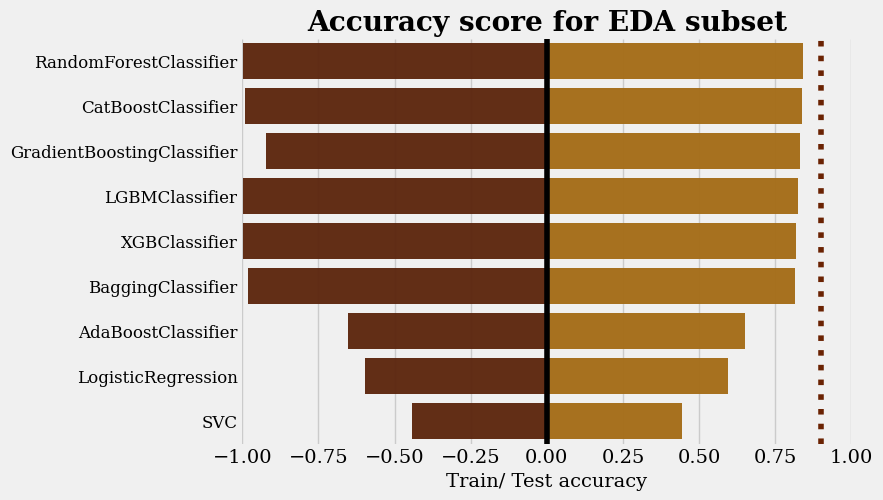

In [70]:
plotscoring(score_eda,'EDA subset',axvline=.9)

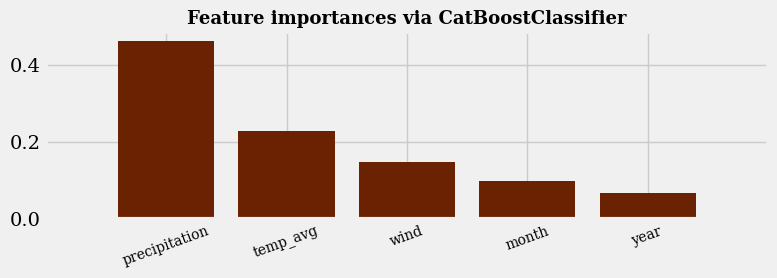

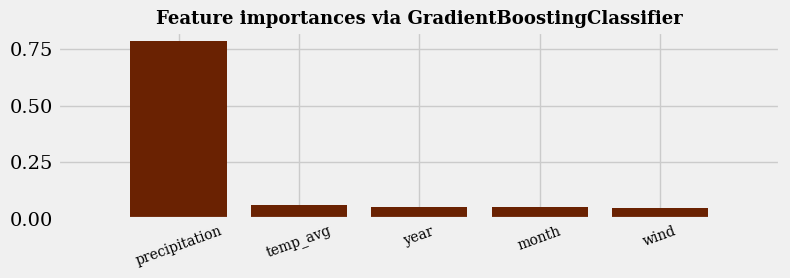

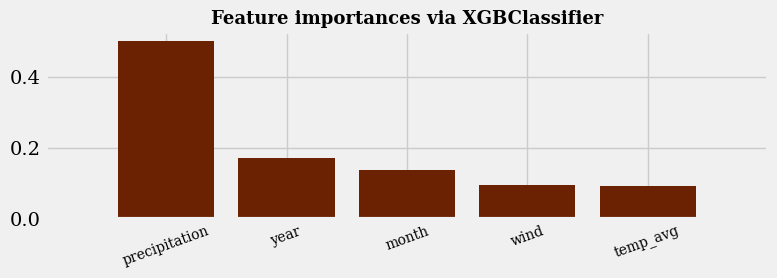

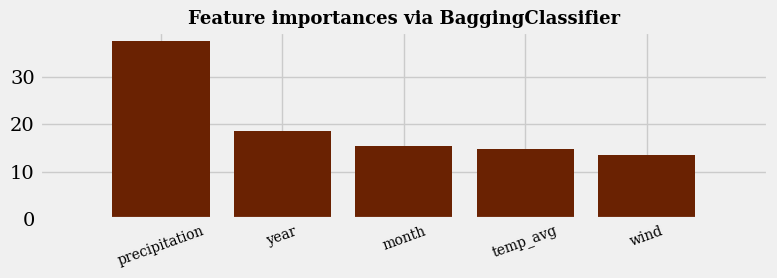

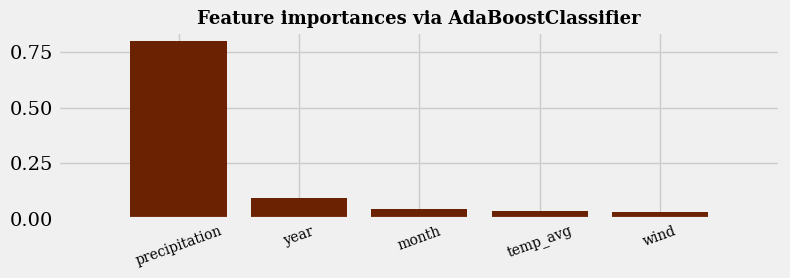

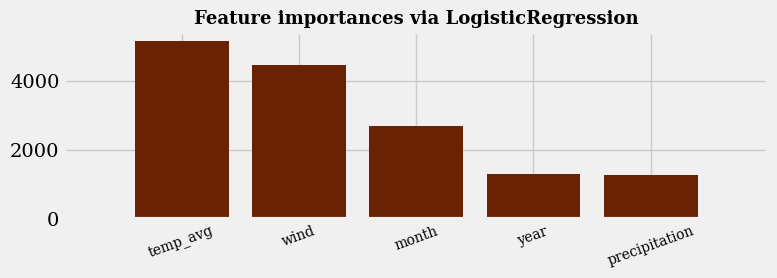

In [71]:
plotting_importances(score_eda,imp_eda,X[edaset],rotation=20)

In [72]:
meanscore=pd.DataFrame({'Test_accuracy':[np.mean(i.Test_accuracy) for i in [score_all,score_orgset,score_eda,score_pca,score_pval]],
             'Train_accuracy':[np.mean(i.Train_accuracy) for i in [score_all,score_orgset,score_eda,score_pca,score_pval]]},
             index=['All features','Initial features','EDA subset','PCA subset','P-value subset']).sort_values('Test_accuracy',ascending=False)

mxscore=pd.DataFrame({'Test_accuracy':[np.max(i.Test_accuracy) for i in [score_all,score_orgset,score_eda,score_pca,score_pval]],
             'Train_accuracy':[np.max(i.Train_accuracy) for i in [score_all,score_orgset,score_eda,score_pca,score_pval]]},
             index=['All features','Initial features','EDA subset','PCA subset','P-value subset']).sort_values('Test_accuracy',ascending=False)

                  Test_accuracy  Train_accuracy
Initial features       0.787321        0.892182
P-value subset         0.745272        0.850252
All features           0.744655        0.840844
EDA subset             0.739615        0.842680
PCA subset             0.603971        0.817228


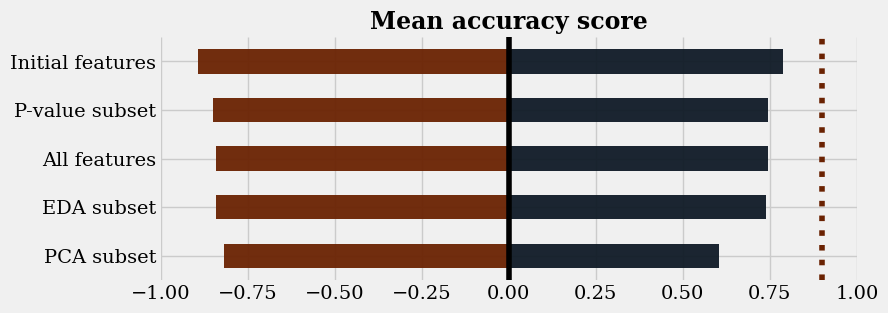

In [73]:
plot_meanscore(meanscore)
title('Mean accuracy score',fontsize=17)
plt.axvline(x=.9,ls=':')

                  Test_accuracy  Train_accuracy
All features           0.861203        1.000000
P-value subset         0.845615        0.999370
EDA subset             0.842783        0.998662
Initial features       0.834972        0.997403
PCA subset             0.677090        1.000000


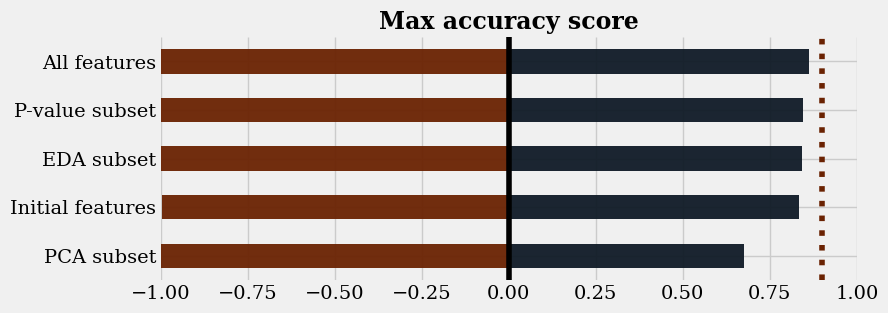

In [74]:
plot_meanscore(mxscore)
title('Max accuracy score',fontsize=17)
plt.axvline(x=.9,ls=':')

Mean accuracy for all models: 0.7241668608974572

                        Model  Train_accuracy  Test_accuracy
0      RandomForestClassifier        0.998930       0.810213
1          CatBoostClassifier        0.985474       0.805802
2  GradientBoostingClassifier        0.916258       0.800418
3              LGBMClassifier        0.999024       0.791922
4               XGBClassifier        0.998001       0.789513
5           BaggingClassifier        0.984183       0.779453
6          LogisticRegression        0.631320       0.629766
7          AdaBoostClassifier        0.585028       0.574851
8                         SVC        0.539518       0.535566


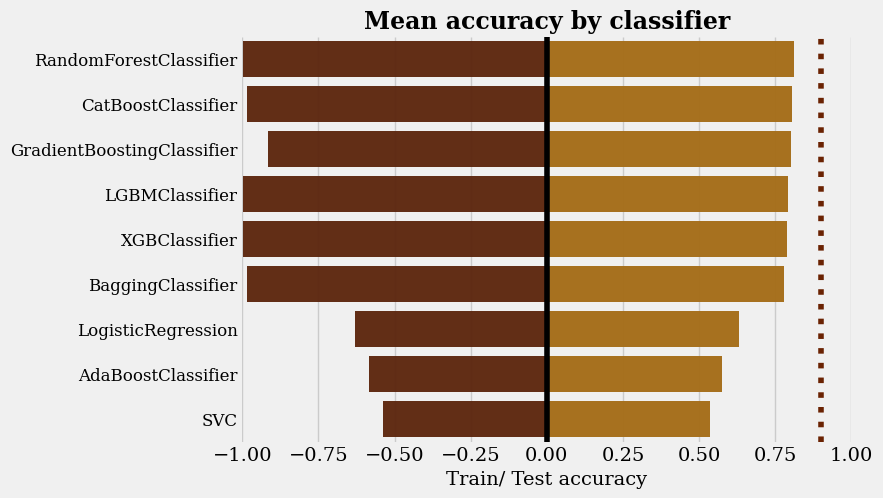

In [75]:
plotscoring(pd.concat([score_all,score_orgset,score_eda,score_pca,score_pval]).groupby('Model').aggregate(np.mean).sort_values('Test_accuracy',ascending=False).reset_index(),'by Classifier',axvline=.9)
title('Mean accuracy by classifier',fontsize=17)

Mean accuracy for all models: 0.7873211689363921

                        Model  Train_accuracy  Test_accuracy
2  GradientBoostingClassifier        0.903053       0.834972
5          CatBoostClassifier        0.953258       0.829313
1      RandomForestClassifier        0.997403       0.824373
6               XGBClassifier        0.992682       0.807347
7              LGBMClassifier        0.997088       0.805948
3           BaggingClassifier        0.982924       0.805199
4          AdaBoostClassifier        0.780823       0.768649
0          LogisticRegression        0.707350       0.707532
8                         SVC        0.715061       0.702557


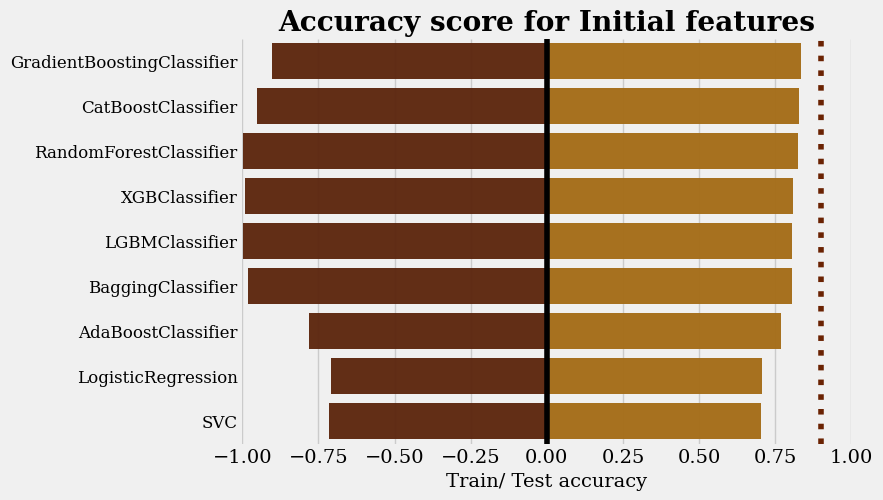

In [76]:
plotscoring(score_orgset,'Initial features',axvline=.9)

In [77]:
tuning_org=[AdaBoostClassifier(learning_rate=0.1, random_state=1),
             LGBMClassifier(boosting_type='dart', learning_rate=0.05, max_depth=5, n_estimators=50),
             RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, n_estimators=200),
             BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=77),
             GradientBoostingClassifier(learning_rate=0.005, max_depth=5, max_features='sqrt', min_samples_leaf=60, min_samples_split=111, n_estimators=900, random_state=10, subsample=0.85, warm_start=True),
             CatBoostClassifier(**{'depth': 6, 'learning_rate': 0.05, 'n_estimators': 200},leaf_estimation_method='Gradient'),
             XGBClassifier(**{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 50},booster='dart',subsample=.8)]
score_tuorg,imp_tunorg=selectmoran(tuning_org,X[orgset])

0:	learn: 1.5118911	total: 4.71ms	remaining: 937ms
1:	learn: 1.4210996	total: 9.87ms	remaining: 977ms
2:	learn: 1.3398123	total: 14.2ms	remaining: 935ms
3:	learn: 1.2666790	total: 18.6ms	remaining: 912ms
4:	learn: 1.1961717	total: 23.4ms	remaining: 913ms
5:	learn: 1.1323951	total: 27.9ms	remaining: 901ms
6:	learn: 1.0770880	total: 32.7ms	remaining: 902ms
7:	learn: 1.0264459	total: 37.1ms	remaining: 891ms
8:	learn: 0.9794439	total: 42.7ms	remaining: 907ms
9:	learn: 0.9365411	total: 47.6ms	remaining: 904ms
10:	learn: 0.9017451	total: 52.1ms	remaining: 895ms
11:	learn: 0.8714088	total: 57.3ms	remaining: 897ms
12:	learn: 0.8388401	total: 61.4ms	remaining: 883ms
13:	learn: 0.8097269	total: 66.4ms	remaining: 882ms
14:	learn: 0.7835274	total: 70.8ms	remaining: 873ms
15:	learn: 0.7593847	total: 75.3ms	remaining: 866ms
16:	learn: 0.7359402	total: 80.2ms	remaining: 863ms
17:	learn: 0.7167970	total: 84.3ms	remaining: 853ms
18:	learn: 0.6992118	total: 88.2ms	remaining: 840ms
19:	learn: 0.6815961	t

161:	learn: 0.3917507	total: 817ms	remaining: 192ms
162:	learn: 0.3912978	total: 822ms	remaining: 187ms
163:	learn: 0.3903224	total: 828ms	remaining: 182ms
164:	learn: 0.3898138	total: 833ms	remaining: 177ms
165:	learn: 0.3892266	total: 838ms	remaining: 172ms
166:	learn: 0.3888311	total: 843ms	remaining: 167ms
167:	learn: 0.3880298	total: 847ms	remaining: 161ms
168:	learn: 0.3871374	total: 851ms	remaining: 156ms
169:	learn: 0.3862200	total: 856ms	remaining: 151ms
170:	learn: 0.3855812	total: 860ms	remaining: 146ms
171:	learn: 0.3850618	total: 864ms	remaining: 141ms
172:	learn: 0.3843964	total: 868ms	remaining: 135ms
173:	learn: 0.3835213	total: 873ms	remaining: 130ms
174:	learn: 0.3829770	total: 881ms	remaining: 126ms
175:	learn: 0.3825961	total: 889ms	remaining: 121ms
176:	learn: 0.3814204	total: 893ms	remaining: 116ms
177:	learn: 0.3805841	total: 898ms	remaining: 111ms
178:	learn: 0.3797689	total: 902ms	remaining: 106ms
179:	learn: 0.3795248	total: 906ms	remaining: 101ms
180:	learn: 

157:	learn: 0.4053047	total: 782ms	remaining: 208ms
158:	learn: 0.4047300	total: 790ms	remaining: 204ms
159:	learn: 0.4042506	total: 797ms	remaining: 199ms
160:	learn: 0.4031574	total: 803ms	remaining: 194ms
161:	learn: 0.4023688	total: 809ms	remaining: 190ms
162:	learn: 0.4014808	total: 814ms	remaining: 185ms
163:	learn: 0.4008917	total: 818ms	remaining: 180ms
164:	learn: 0.4003385	total: 823ms	remaining: 175ms
165:	learn: 0.3998029	total: 827ms	remaining: 169ms
166:	learn: 0.3989856	total: 831ms	remaining: 164ms
167:	learn: 0.3982418	total: 836ms	remaining: 159ms
168:	learn: 0.3975062	total: 841ms	remaining: 154ms
169:	learn: 0.3968807	total: 845ms	remaining: 149ms
170:	learn: 0.3964968	total: 849ms	remaining: 144ms
171:	learn: 0.3955868	total: 854ms	remaining: 139ms
172:	learn: 0.3947774	total: 859ms	remaining: 134ms
173:	learn: 0.3942969	total: 864ms	remaining: 129ms
174:	learn: 0.3935264	total: 870ms	remaining: 124ms
175:	learn: 0.3926467	total: 875ms	remaining: 119ms
176:	learn: 

148:	learn: 0.4132290	total: 780ms	remaining: 267ms
149:	learn: 0.4116590	total: 785ms	remaining: 262ms
150:	learn: 0.4107727	total: 790ms	remaining: 256ms
151:	learn: 0.4103717	total: 796ms	remaining: 251ms
152:	learn: 0.4097226	total: 801ms	remaining: 246ms
153:	learn: 0.4093438	total: 805ms	remaining: 241ms
154:	learn: 0.4081978	total: 810ms	remaining: 235ms
155:	learn: 0.4077925	total: 815ms	remaining: 230ms
156:	learn: 0.4071276	total: 819ms	remaining: 224ms
157:	learn: 0.4064593	total: 824ms	remaining: 219ms
158:	learn: 0.4058700	total: 829ms	remaining: 214ms
159:	learn: 0.4052506	total: 834ms	remaining: 208ms
160:	learn: 0.4046000	total: 839ms	remaining: 203ms
161:	learn: 0.4036656	total: 843ms	remaining: 198ms
162:	learn: 0.4030170	total: 848ms	remaining: 193ms
163:	learn: 0.4023274	total: 853ms	remaining: 187ms
164:	learn: 0.4016590	total: 858ms	remaining: 182ms
165:	learn: 0.4010325	total: 864ms	remaining: 177ms
166:	learn: 0.3999965	total: 870ms	remaining: 172ms
167:	learn: 

146:	learn: 0.4069889	total: 733ms	remaining: 264ms
147:	learn: 0.4064041	total: 740ms	remaining: 260ms
148:	learn: 0.4053786	total: 746ms	remaining: 255ms
149:	learn: 0.4044249	total: 751ms	remaining: 250ms
150:	learn: 0.4038165	total: 756ms	remaining: 245ms
151:	learn: 0.4032007	total: 761ms	remaining: 240ms
152:	learn: 0.4025369	total: 768ms	remaining: 236ms
153:	learn: 0.4015352	total: 774ms	remaining: 231ms
154:	learn: 0.4007740	total: 781ms	remaining: 227ms
155:	learn: 0.4002179	total: 787ms	remaining: 222ms
156:	learn: 0.3995226	total: 793ms	remaining: 217ms
157:	learn: 0.3990506	total: 798ms	remaining: 212ms
158:	learn: 0.3985570	total: 803ms	remaining: 207ms
159:	learn: 0.3975472	total: 809ms	remaining: 202ms
160:	learn: 0.3968504	total: 815ms	remaining: 197ms
161:	learn: 0.3964597	total: 820ms	remaining: 192ms
162:	learn: 0.3957759	total: 827ms	remaining: 188ms
163:	learn: 0.3950039	total: 833ms	remaining: 183ms
164:	learn: 0.3943959	total: 839ms	remaining: 178ms
165:	learn: 

118:	learn: 0.4218014	total: 707ms	remaining: 481ms
119:	learn: 0.4211506	total: 713ms	remaining: 475ms
120:	learn: 0.4205114	total: 718ms	remaining: 469ms
121:	learn: 0.4199624	total: 723ms	remaining: 462ms
122:	learn: 0.4192149	total: 728ms	remaining: 456ms
123:	learn: 0.4183643	total: 734ms	remaining: 450ms
124:	learn: 0.4171842	total: 740ms	remaining: 444ms
125:	learn: 0.4166465	total: 744ms	remaining: 437ms
126:	learn: 0.4159197	total: 749ms	remaining: 431ms
127:	learn: 0.4153068	total: 754ms	remaining: 424ms
128:	learn: 0.4147160	total: 759ms	remaining: 418ms
129:	learn: 0.4141358	total: 766ms	remaining: 412ms
130:	learn: 0.4138399	total: 771ms	remaining: 406ms
131:	learn: 0.4133980	total: 776ms	remaining: 400ms
132:	learn: 0.4126301	total: 783ms	remaining: 394ms
133:	learn: 0.4121885	total: 788ms	remaining: 388ms
134:	learn: 0.4111960	total: 794ms	remaining: 382ms
135:	learn: 0.4107269	total: 799ms	remaining: 376ms
136:	learn: 0.4097827	total: 805ms	remaining: 370ms
137:	learn: 

113:	learn: 0.4294769	total: 589ms	remaining: 444ms
114:	learn: 0.4286425	total: 594ms	remaining: 439ms
115:	learn: 0.4279654	total: 600ms	remaining: 434ms
116:	learn: 0.4273788	total: 604ms	remaining: 429ms
117:	learn: 0.4268826	total: 609ms	remaining: 424ms
118:	learn: 0.4258031	total: 614ms	remaining: 418ms
119:	learn: 0.4251476	total: 618ms	remaining: 412ms
120:	learn: 0.4238046	total: 622ms	remaining: 406ms
121:	learn: 0.4230304	total: 627ms	remaining: 401ms
122:	learn: 0.4227698	total: 630ms	remaining: 394ms
123:	learn: 0.4222458	total: 634ms	remaining: 389ms
124:	learn: 0.4217719	total: 639ms	remaining: 383ms
125:	learn: 0.4207758	total: 643ms	remaining: 378ms
126:	learn: 0.4204518	total: 647ms	remaining: 372ms
127:	learn: 0.4198732	total: 652ms	remaining: 367ms
128:	learn: 0.4194199	total: 656ms	remaining: 361ms
129:	learn: 0.4188973	total: 661ms	remaining: 356ms
130:	learn: 0.4182088	total: 666ms	remaining: 351ms
131:	learn: 0.4171969	total: 671ms	remaining: 346ms
132:	learn: 

98:	learn: 0.4436691	total: 528ms	remaining: 539ms
99:	learn: 0.4428730	total: 534ms	remaining: 534ms
100:	learn: 0.4419722	total: 539ms	remaining: 528ms
101:	learn: 0.4416510	total: 543ms	remaining: 522ms
102:	learn: 0.4411674	total: 548ms	remaining: 516ms
103:	learn: 0.4398679	total: 552ms	remaining: 510ms
104:	learn: 0.4393954	total: 557ms	remaining: 504ms
105:	learn: 0.4387338	total: 561ms	remaining: 498ms
106:	learn: 0.4373958	total: 566ms	remaining: 492ms
107:	learn: 0.4359274	total: 571ms	remaining: 486ms
108:	learn: 0.4347683	total: 575ms	remaining: 480ms
109:	learn: 0.4340544	total: 580ms	remaining: 474ms
110:	learn: 0.4334580	total: 585ms	remaining: 469ms
111:	learn: 0.4329179	total: 589ms	remaining: 463ms
112:	learn: 0.4322507	total: 593ms	remaining: 457ms
113:	learn: 0.4309039	total: 598ms	remaining: 451ms
114:	learn: 0.4304508	total: 602ms	remaining: 445ms
115:	learn: 0.4296152	total: 606ms	remaining: 439ms
116:	learn: 0.4287763	total: 611ms	remaining: 433ms
117:	learn: 0.

75:	learn: 0.4679738	total: 436ms	remaining: 711ms
76:	learn: 0.4668148	total: 441ms	remaining: 704ms
77:	learn: 0.4650632	total: 446ms	remaining: 698ms
78:	learn: 0.4637213	total: 451ms	remaining: 691ms
79:	learn: 0.4624803	total: 456ms	remaining: 685ms
80:	learn: 0.4617366	total: 461ms	remaining: 678ms
81:	learn: 0.4610349	total: 466ms	remaining: 671ms
82:	learn: 0.4601746	total: 471ms	remaining: 664ms
83:	learn: 0.4589843	total: 476ms	remaining: 657ms
84:	learn: 0.4582089	total: 481ms	remaining: 651ms
85:	learn: 0.4574922	total: 486ms	remaining: 645ms
86:	learn: 0.4564305	total: 491ms	remaining: 638ms
87:	learn: 0.4550291	total: 497ms	remaining: 633ms
88:	learn: 0.4541130	total: 503ms	remaining: 627ms
89:	learn: 0.4527709	total: 508ms	remaining: 621ms
90:	learn: 0.4523739	total: 514ms	remaining: 616ms
91:	learn: 0.4516675	total: 520ms	remaining: 611ms
92:	learn: 0.4508723	total: 526ms	remaining: 605ms
93:	learn: 0.4504719	total: 531ms	remaining: 599ms
94:	learn: 0.4494966	total: 536

47:	learn: 0.5000360	total: 317ms	remaining: 1s
48:	learn: 0.4981805	total: 324ms	remaining: 999ms
49:	learn: 0.4952748	total: 332ms	remaining: 997ms
50:	learn: 0.4930280	total: 341ms	remaining: 996ms
51:	learn: 0.4906353	total: 349ms	remaining: 994ms
52:	learn: 0.4890007	total: 359ms	remaining: 996ms
53:	learn: 0.4863261	total: 369ms	remaining: 997ms
54:	learn: 0.4842388	total: 374ms	remaining: 987ms
55:	learn: 0.4826825	total: 380ms	remaining: 977ms
56:	learn: 0.4798385	total: 385ms	remaining: 967ms
57:	learn: 0.4774888	total: 391ms	remaining: 957ms
58:	learn: 0.4755048	total: 396ms	remaining: 946ms
59:	learn: 0.4739028	total: 401ms	remaining: 935ms
60:	learn: 0.4726624	total: 407ms	remaining: 927ms
61:	learn: 0.4708917	total: 417ms	remaining: 928ms
62:	learn: 0.4697288	total: 425ms	remaining: 924ms
63:	learn: 0.4681381	total: 435ms	remaining: 924ms
64:	learn: 0.4667288	total: 445ms	remaining: 924ms
65:	learn: 0.4659045	total: 454ms	remaining: 922ms
66:	learn: 0.4648606	total: 465ms	

25:	learn: 0.6250361	total: 215ms	remaining: 1.44s
26:	learn: 0.6172359	total: 218ms	remaining: 1.4s
27:	learn: 0.6084804	total: 223ms	remaining: 1.37s
28:	learn: 0.5996771	total: 227ms	remaining: 1.34s
29:	learn: 0.5920797	total: 232ms	remaining: 1.31s
30:	learn: 0.5859554	total: 238ms	remaining: 1.3s
31:	learn: 0.5792878	total: 244ms	remaining: 1.28s
32:	learn: 0.5732385	total: 248ms	remaining: 1.25s
33:	learn: 0.5676941	total: 252ms	remaining: 1.23s
34:	learn: 0.5622679	total: 257ms	remaining: 1.21s
35:	learn: 0.5573746	total: 262ms	remaining: 1.19s
36:	learn: 0.5531922	total: 265ms	remaining: 1.17s
37:	learn: 0.5484994	total: 270ms	remaining: 1.15s
38:	learn: 0.5434244	total: 276ms	remaining: 1.14s
39:	learn: 0.5399563	total: 280ms	remaining: 1.12s
40:	learn: 0.5362149	total: 285ms	remaining: 1.1s
41:	learn: 0.5330679	total: 289ms	remaining: 1.09s
42:	learn: 0.5302073	total: 293ms	remaining: 1.07s
43:	learn: 0.5272658	total: 298ms	remaining: 1.05s
44:	learn: 0.5245994	total: 302ms	

195:	learn: 0.3773179	total: 1.06s	remaining: 21.6ms
196:	learn: 0.3767889	total: 1.06s	remaining: 16.2ms
197:	learn: 0.3758244	total: 1.07s	remaining: 10.8ms
198:	learn: 0.3752981	total: 1.07s	remaining: 5.39ms
199:	learn: 0.3745793	total: 1.08s	remaining: 0us


Mean accuracy for all models: 0.844808567718367

                        Model  Train_accuracy  Test_accuracy
4  GradientBoostingClassifier        0.856941       0.856952
6               XGBClassifier        0.860954       0.851993
5          CatBoostClassifier        0.871577       0.849865
2      RandomForestClassifier        0.852534       0.849161
1              LGBMClassifier        0.861662       0.847732
0          AdaBoostClassifier        0.843091       0.842798
3           BaggingClassifier        0.997403       0.815158


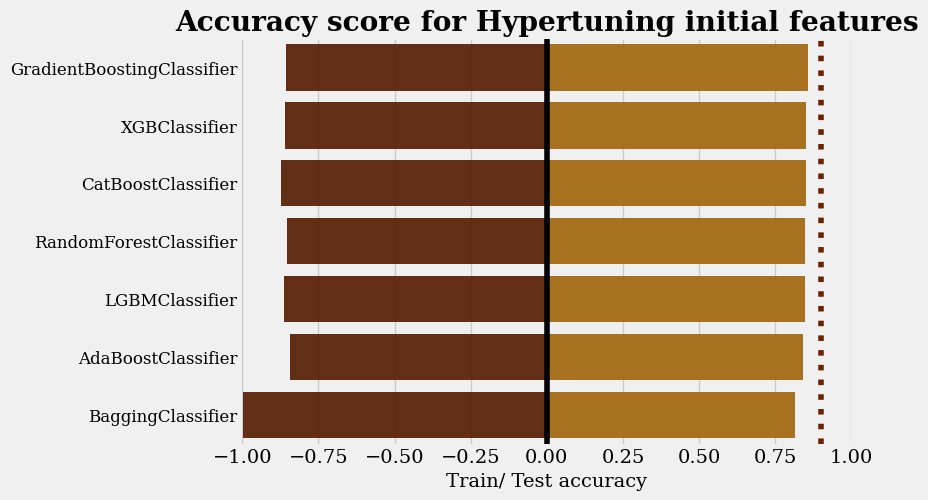

In [78]:
plotscoring(score_tuorg,'Hypertuning initial features',axvline=.9)

Mean accuracy for all models: 0.7446547686433812

                        Model  Train_accuracy  Test_accuracy
1      RandomForestClassifier        1.000000       0.861203
5          CatBoostClassifier        1.000000       0.854100
7              LGBMClassifier        1.000000       0.845605
2  GradientBoostingClassifier        0.953416       0.844886
6               XGBClassifier        1.000000       0.842064
3           BaggingClassifier        0.988511       0.839956
4          AdaBoostClassifier        0.626766       0.617621
0          LogisticRegression        0.556266       0.553821
8                         SVC        0.442635       0.442638


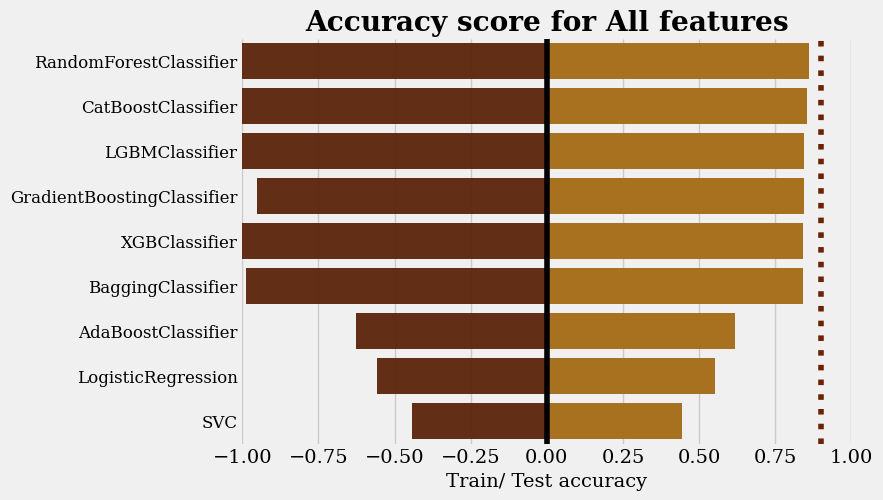

In [79]:
plotscoring(score_all,'All features',axvline=.9)

In [80]:
tuningall=[LGBMClassifier(boosting_type='dart', learning_rate=0.05, max_depth=3),
          BaggingClassifier(base_estimator=ExtraTreesClassifier(), n_estimators=80,random_state=1),
          XGBRFClassifier(**{'booster': 'dart', 'learning_rate': .8, 'max_depth': 4}),
          GradientBoostingClassifier(learning_rate=0.03, min_samples_leaf=2,subsample=0.8)]

In [81]:
score_tuall,_=selectmoran(tuningall,X)

Mean accuracy for all models: 0.8564104485066428

                        Model  Train_accuracy  Test_accuracy
1           BaggingClassifier        1.000000       0.865453
3  GradientBoostingClassifier        0.891092       0.856228
2             XGBRFClassifier        0.869138       0.853401
0              LGBMClassifier        0.871184       0.850559


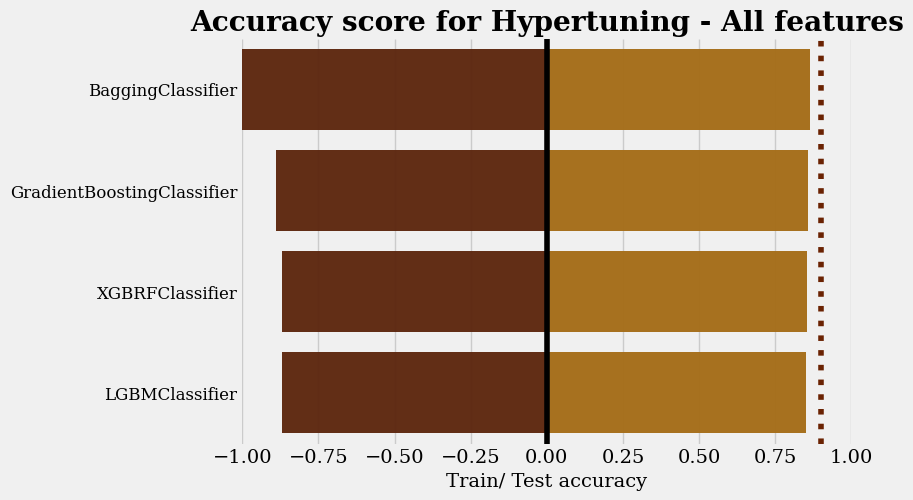

In [82]:
plotscoring(score_tuall,'Hypertuning - All features',axvline=.9)

In [83]:
tuning_pca=[GaussianNB(var_smoothing=0.004328761281083057),
           LGBMClassifier(learning_rate=.05, random_state=0, max_depth=5, n_estimators=50),
           XGBClassifier(learning_rate=.1, max_depth=2, n_estimators=50, random_state=0),
           CatBoostClassifier(depth=2, learning_rate=.05, n_estimators=50, random_state=0),
           RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=2, random_state=0),
           AdaBoostClassifier(base_estimator=ExtraTreesClassifier(random_state=1),learning_rate=0.05, n_estimators=221)]
score_tuningpca,_=selectmoran(tuning_pca,Xpca)

0:	learn: 1.5405584	total: 1.34ms	remaining: 65.8ms
1:	learn: 1.4812832	total: 3.1ms	remaining: 74.4ms
2:	learn: 1.4323092	total: 4.05ms	remaining: 63.4ms
3:	learn: 1.3898583	total: 5.04ms	remaining: 58ms
4:	learn: 1.3506460	total: 5.96ms	remaining: 53.6ms
5:	learn: 1.3161681	total: 6.72ms	remaining: 49.3ms
6:	learn: 1.2859007	total: 7.55ms	remaining: 46.4ms
7:	learn: 1.2563096	total: 8.4ms	remaining: 44.1ms
8:	learn: 1.2308710	total: 9.21ms	remaining: 42ms
9:	learn: 1.2084670	total: 10.1ms	remaining: 40.5ms
10:	learn: 1.1899902	total: 11ms	remaining: 39ms
11:	learn: 1.1704168	total: 12ms	remaining: 37.9ms
12:	learn: 1.1514708	total: 12.8ms	remaining: 36.6ms
13:	learn: 1.1350260	total: 13.6ms	remaining: 35.1ms
14:	learn: 1.1187597	total: 14.5ms	remaining: 33.8ms
15:	learn: 1.1054006	total: 15.3ms	remaining: 32.6ms
16:	learn: 1.0918646	total: 16.1ms	remaining: 31.3ms
17:	learn: 1.0800297	total: 16.9ms	remaining: 30ms
18:	learn: 1.0696069	total: 17.8ms	remaining: 29ms
19:	learn: 1.059305

0:	learn: 1.5410992	total: 1.6ms	remaining: 78.4ms
1:	learn: 1.4830151	total: 9.56ms	remaining: 229ms
2:	learn: 1.4332062	total: 10.9ms	remaining: 171ms
3:	learn: 1.3914748	total: 12.8ms	remaining: 147ms
4:	learn: 1.3533790	total: 14.1ms	remaining: 127ms
5:	learn: 1.3193016	total: 15.4ms	remaining: 113ms
6:	learn: 1.2889366	total: 17.2ms	remaining: 105ms
7:	learn: 1.2596977	total: 18.3ms	remaining: 96.3ms
8:	learn: 1.2349350	total: 19.7ms	remaining: 89.8ms
9:	learn: 1.2129198	total: 21.3ms	remaining: 85.1ms
10:	learn: 1.1920838	total: 22.7ms	remaining: 80.3ms
11:	learn: 1.1714771	total: 24ms	remaining: 75.9ms
12:	learn: 1.1529339	total: 24.9ms	remaining: 70.8ms
13:	learn: 1.1363950	total: 25.6ms	remaining: 65.9ms
14:	learn: 1.1205998	total: 26.4ms	remaining: 61.5ms
15:	learn: 1.1073668	total: 27.1ms	remaining: 57.7ms
16:	learn: 1.0940023	total: 27.9ms	remaining: 54.2ms
17:	learn: 1.0825535	total: 28.7ms	remaining: 50.9ms
18:	learn: 1.0724358	total: 29.4ms	remaining: 48ms
19:	learn: 1.0

0:	learn: 1.5426317	total: 1.42ms	remaining: 69.5ms
1:	learn: 1.4862134	total: 7.17ms	remaining: 172ms
2:	learn: 1.4384310	total: 8.52ms	remaining: 133ms
3:	learn: 1.3967880	total: 9.62ms	remaining: 111ms
4:	learn: 1.3582927	total: 10.9ms	remaining: 98.5ms
5:	learn: 1.3237629	total: 13.2ms	remaining: 96.4ms
6:	learn: 1.2926760	total: 15.4ms	remaining: 94.5ms
7:	learn: 1.2632430	total: 17.5ms	remaining: 91.8ms
8:	learn: 1.2383261	total: 19.6ms	remaining: 89.4ms
9:	learn: 1.2165202	total: 21.7ms	remaining: 86.8ms
10:	learn: 1.1988253	total: 22.9ms	remaining: 81.1ms
11:	learn: 1.1779410	total: 23.8ms	remaining: 75.3ms
12:	learn: 1.1594592	total: 24.7ms	remaining: 70.3ms
13:	learn: 1.1439363	total: 25.7ms	remaining: 66.2ms
14:	learn: 1.1276683	total: 26.8ms	remaining: 62.5ms
15:	learn: 1.1145447	total: 27.8ms	remaining: 59.1ms
16:	learn: 1.1012652	total: 29ms	remaining: 56.3ms
17:	learn: 1.0897000	total: 30.1ms	remaining: 53.5ms
18:	learn: 1.0793795	total: 31.1ms	remaining: 50.8ms
19:	lear

Mean accuracy for all models: 0.6616072320447508

                    Model  Train_accuracy  Test_accuracy
5      AdaBoostClassifier        1.000000       0.682729
1          LGBMClassifier        0.780689       0.669244
2           XGBClassifier        0.699166       0.665033
0              GaussianNB        0.654627       0.654425
3      CatBoostClassifier        0.658011       0.649466
4  RandomForestClassifier        0.652345       0.648746


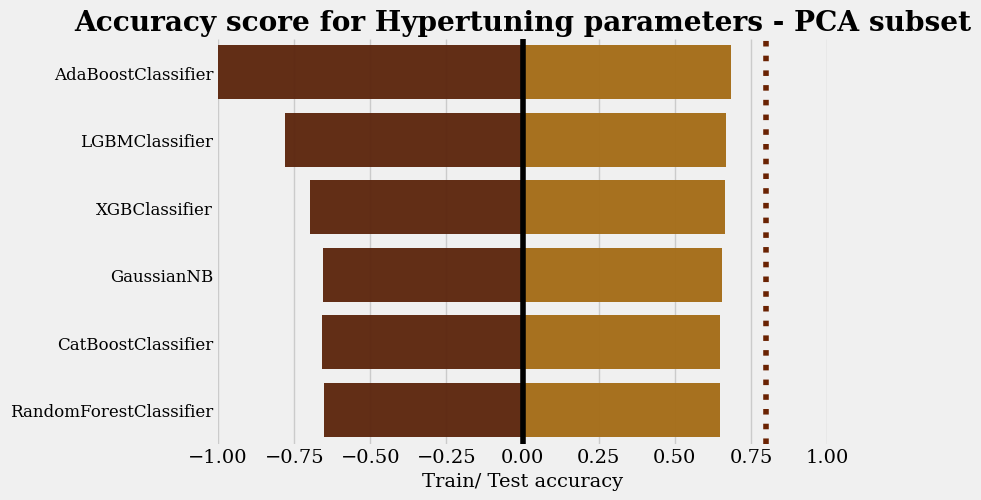

In [84]:
plotscoring(score_tuningpca,'Hypertuning parameters - PCA subset')

In [85]:
meanscoretu=pd.DataFrame({'Test_accuracy':[np.mean(i.Test_accuracy) for i in [score_tuall,score_tuningpca,score_tuorg]],
             'Train_accuracy':[np.mean(i.Train_accuracy) for i in [score_tuall,score_tuningpca,score_tuorg]]},
             index=['All features','PCA subset','Initial features']).sort_values('Test_accuracy',ascending=False)

mxscoretu=pd.DataFrame({'Test_accuracy':[np.max(i.Test_accuracy) for i in [score_tuall,score_tuningpca,score_tuorg]],
             'Train_accuracy':[np.max(i.Train_accuracy) for i in [score_tuall,score_tuningpca,score_tuorg]]},
             index=['All features','PCA subset','Initial features']).sort_values('Test_accuracy',ascending=False)

                  Test_accuracy  Train_accuracy
All features           0.856410        0.907853
Initial features       0.844809        0.877737
PCA subset             0.661607        0.740806


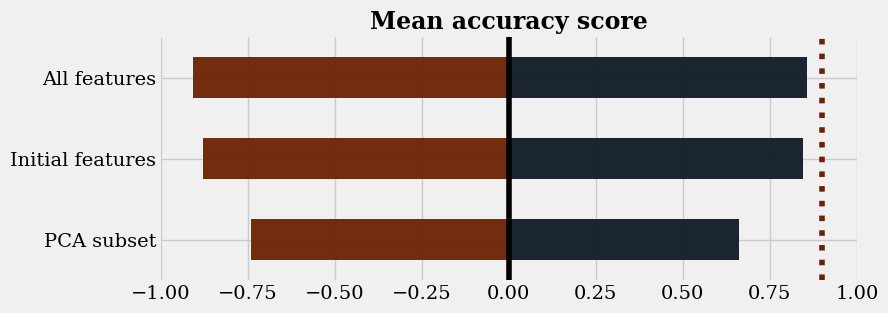

In [86]:
plot_meanscore(meanscoretu)
title('Mean accuracy score',fontsize=17)
plt.axvline(x=.9,ls=':')

                  Test_accuracy  Train_accuracy
All features           0.865453        1.000000
Initial features       0.856952        0.997403
PCA subset             0.682729        1.000000


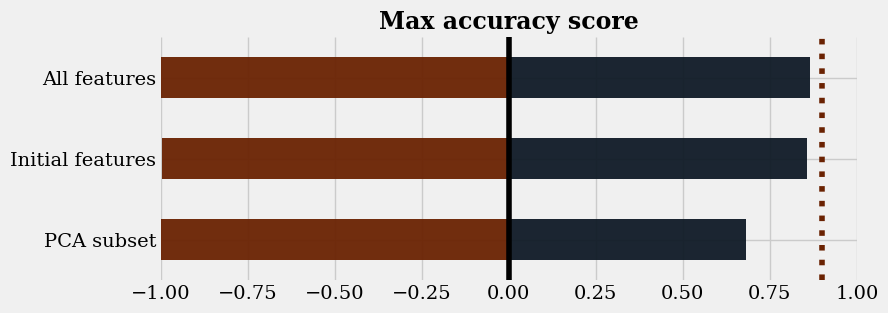

In [87]:
plot_meanscore(mxscoretu)
title('Max accuracy score',fontsize=17)
plt.axvline(x=.9,ls=':')